___
<img style="float: left; margin: 30px 15px 15px 15px;" src="https://d33wubrfki0l68.cloudfront.net/4ec62c1c925a380c912ddad740d18554c6822a11/fabe4/img/sponsors/iteso-university.png" width="300" height="500" />
    
    
### <font color='navy'> Modelado de pronóstico de series de tiempo.

**Nombres:** #############.

**Fecha:** XX de octubre del 202X.

**Expediente** : XXX.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: Link con el enlace del repositorio del creador del proyecto

# Proyecto Final

In [ ]:
!git clone https://github.com/PacoTinoco/Proyecto_modelado_TS.git

Cloning into 'Proyecto_modelado_TS'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (4/4), done.


In [1]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 17.6 MB/s eta 0:00:00


In [2]:
pip install dagshub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 109.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 7.0 MB/s eta 0:00:00


In [3]:
pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 120.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 700.2/700.2 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.7 MB/s eta 0:00:00


In [86]:
# Bibliotecas estándar
import os
import time
import warnings
import itertools
from datetime import date, datetime, timedelta
from typing import Dict, Tuple, List


# Análisis de datos y visualización
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

# Statsmodels para análisis de series temporales
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

# TensorFlow y Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import (
    EarlyStopping,
    ModelCheckpoint,
    ReduceLROnPlateau
)
from tensorflow.keras.layers import (
    Dense, LSTM, GRU, Bidirectional, Conv1D, ConvLSTM2D,
    MaxPooling1D, Dropout, BatchNormalization, Flatten,
    Reshape, SpatialDropout1D, GlobalAveragePooling1D
)


## Experimentación
import mlflow
import mlflow.tensorflow
import dagshub
import optuna


# Configuraciones
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Manejo de valores nulos en la serie :

In [ ]:
missing_values = df.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

# Para el caso univariado con Global_active_power
missing_percentage = (df['Global_active_power'].isnull().sum() / len(df)) * 100
print(f"\nPorcentaje de valores faltantes en Global_active_power: {missing_percentage:.2f}%")

Valores faltantes por columna:
Datetime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

Porcentaje de valores faltantes en Global_active_power: 1.25%


In [ ]:
nans = df[df['Global_active_power'].isna()]

# Agrupar por rangos de fechas
if not nans.empty:
    # Por fechas (día)
    print("VALORES NULOS POR DÍA:")
    nulos_por_dia = nans.groupby(nans['Datetime'].dt.date).size()
    for fecha, cantidad in nulos_por_dia.items():
        print(f"{fecha}: {cantidad} valores nulos")

    print("\n" + "="*40 + "\n")

VALORES NULOS POR DÍA:
2006-12-21: 2 valores nulos
2006-12-30: 2 valores nulos
2007-01-14: 1 valores nulos
2007-01-28: 1 valores nulos
2007-02-22: 2 valores nulos
2007-03-25: 1 valores nulos
2007-04-28: 1419 valores nulos
2007-04-29: 1440 valores nulos
2007-04-30: 864 valores nulos
2007-06-01: 1 valores nulos
2007-06-06: 1 valores nulos
2007-06-09: 38 valores nulos
2007-06-19: 2 valores nulos
2007-06-29: 1 valores nulos
2007-07-15: 130 valores nulos
2007-07-22: 1 valores nulos
2007-08-01: 21 valores nulos
2007-08-24: 1 valores nulos
2007-09-26: 2 valores nulos
2007-10-23: 2 valores nulos
2007-11-21: 1 valores nulos
2007-11-29: 1 valores nulos
2007-12-17: 1 valores nulos
2008-01-13: 1 valores nulos
2008-02-02: 1 valores nulos
2008-02-23: 2 valores nulos
2008-03-24: 1 valores nulos
2008-05-16: 2 valores nulos
2008-06-13: 1 valores nulos
2008-07-13: 2 valores nulos
2008-08-04: 1 valores nulos
2008-08-31: 1 valores nulos
2008-10-25: 43 valores nulos
2008-11-10: 6 valores nulos
2008-11-12: 

En total hay 82 días con al menos 1 valor nulo.

In [ ]:
# Ver exactamente cuántos valores tienes por día
daily_count = df.groupby(df['Datetime'].dt.date).agg({
    'Global_active_power': ['count', 'mean', lambda x: x.isna().sum()]
})
daily_count.columns = ['valores_validos', 'promedio', 'valores_nulos']
daily_count['porcentaje_completo'] = (daily_count['valores_validos'] / 1440) * 100

# Ver días problemáticos
dias_problematicos = daily_count[daily_count['porcentaje_completo'] < 50]
print("DÍAS CON MENOS DEL 50% DE DATOS:")
dias_problematicos

DÍAS CON MENOS DEL 50% DE DATOS:


valores_validos  promedio  valores_nulos  porcentaje_completo
Datetime                                                                 
2006-12-16              396  3.053475              0            27.500000
2007-04-28               21  1.082762           1419             1.458333
2007-04-29                0       NaN           1440             0.000000
2007-04-30              576  0.730594            864            40.000000
2009-06-13               30  0.473933           1410             2.083333
2009-06-14                0       NaN           1440             0.000000
2009-08-13              549  1.105359            891            38.125000
2010-01-13                0       NaN           1440             0.000000
2010-01-14              298  2.075463           1142            20.694444
2010-03-20              232  0.567810           1208            16.111111
2010-03-21              621  1.477105            819            43.125000
2010-08-18                0       NaN           1440             0.000000
2010-08-19                0       NaN           1440             0.000000
2010-08-20                0       NaN           1440             0.000000
2010-08-21                0       NaN           1440             0.000000
2010-08-22              152  0.614066           1288            10.555556
2010-09-25              236  0.449178           1204            16.388889
2010-09-26                0       NaN           1440             0.000000
2010-09-27                0       NaN           1440             0.000000
2010-09-28              287  1.639115           1153            19.930556

En este caso tenemos,  Días completamente perdidos (0% de datos):

9 días con 0 valores válidos

Días parcialmente perdidos:

Varios días con menos del 50% de datos (1.4%, 2%, 10%, 16%, etc.)
Algunos días "casi completos" con 80-90% de datos

### Resumen de la función :

 Para cada día:

+ Si tenía > 30% de datos válidos → Calculamos el promedio

+ Si tenía < 30% de datos válidos → Marcamos ese día como NaN

In [ ]:
def prepare_daily_data(df, threshold=30):
    # Asegurarse de que Datetime sea el índice
    if 'Datetime' in df.columns:
        df = df.set_index('Datetime')

    # Identificar columnas numéricas (excluyendo Datetime si está como columna)
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    # Calcular estadísticas diarias para cada columna
    daily_stats = {}

    for col in numeric_columns:
        daily_col = df.groupby(df.index.date).agg({
            col: ['mean', 'count', lambda x: x.isna().sum()]
        })
        daily_col.columns = ['promedio', 'valores_validos', 'valores_nulos']
        daily_col['porcentaje_completo'] = (daily_col['valores_validos'] / 1440) * 100
        daily_stats[col] = daily_col

    # Crear el DataFrame diario final
    daily_data = pd.DataFrame(index=daily_stats[numeric_columns[0]].index)

    # Para cada columna, aplicar el threshold
    for col in numeric_columns:
        daily_data[col] = daily_stats[col]['promedio']
        # Marcar como NaN los días con menos del threshold% de datos
        mask = daily_stats[col]['porcentaje_completo'] < threshold
        daily_data.loc[mask, col] = np.nan

    # Eliminar días que tienen NaN en TODAS las columnas
    rows_before = len(daily_data)
    daily_data_clean = daily_data.dropna(how='all')
    rows_after = len(daily_data_clean)

    print(f"Días originales: {rows_before}")
    print(f"Días después de limpieza: {rows_after}")
    print(f"Días eliminados completamente: {rows_before - rows_after}")

    # Mostrar resumen por columna
    print("\nResumen por columna:")
    for col in numeric_columns:
        nan_count = daily_data_clean[col].isna().sum()
        valid_count = daily_data_clean[col].notna().sum()
        print(f"{col}: {valid_count} días válidos, {nan_count} días NaN")

    return daily_data_clean

# Aplicar la función
df_daily = prepare_daily_data(df, threshold=30)

# Ver las primeras filas
print("\nPrimeras filas del DataFrame diario:")
df_daily.head()

Días originales: 1442
Días después de limpieza: 1425
Días eliminados completamente: 17

Resumen por columna:
Global_active_power: 1425 días válidos, 0 días NaN
Global_reactive_power: 1425 días válidos, 0 días NaN
Voltage: 1425 días válidos, 0 días NaN
Global_intensity: 1425 días válidos, 0 días NaN
Sub_metering_1: 1425 días válidos, 0 días NaN
Sub_metering_2: 1425 días válidos, 0 días NaN
Sub_metering_3: 1425 días válidos, 0 días NaN

Primeras filas del DataFrame diario:


Global_active_power  Global_reactive_power     Voltage  \
2006-12-17             2.354486               0.156949  240.087028   
2006-12-18             1.530435               0.112356  241.231694   
2006-12-19             1.157079               0.104821  241.999313   
2006-12-20             1.545658               0.111804  242.308062   
2006-12-21             1.193758               0.100255  241.040549   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
2006-12-17          9.999028        1.411806        2.907639        9.264583  
2006-12-18          6.421667        0.738194        1.820139        9.734722  
2006-12-19          4.926389        0.582639        5.279167        4.303472  
2006-12-20          6.467361        0.000000        1.838889        9.765972  
2006-12-21          5.033797        1.227399        1.824061        7.246871

Procesa TODAS las columnas numéricas

Aplica el threshold del 30% a cada columna individualmente

Mantiene días que tengan al menos una columna con datos válidos

Después al final lo guardamos como csv para poder usarlo todos en diferetnes modelos.

### 1. Análisis y pronóstico de series de tiempo

- Seleccionar una base de datos con al menos una serie de tiempo univariada (se sugiere además considerar variables adicionales para generar un enfoque multivariado que se usará posteriormente).
- Aplicar un modelo de pronóstico **lineal clásico** (por ejemplo, SARIMAX) **solo para el caso univariado**. Recuerda usar y argumentar todo el análisis que debe ser realizado para este tipo de modelos.
- Evaluar el desempeño del modelo lineal como línea base (Usar métricas como MAPE, MSE y $R^2$).


In [68]:
ruta = '/content/household_power_consumption_daily_v2.csv'
df = pd.read_csv(ruta)
df

Date  Global_active_power  Global_reactive_power     Voltage  \
0     2006-12-17             2.354486               0.156949  240.087028   
1     2006-12-18             1.530435               0.112356  241.231694   
2     2006-12-19             1.157079               0.104821  241.999313   
3     2006-12-20             1.545658               0.111804  242.308063   
4     2006-12-21             1.193758               0.100255  241.040549   
...          ...                  ...                    ...         ...   
1420  2010-11-22             1.417733               0.098857  240.197118   
1421  2010-11-23             1.095511               0.095451  240.575528   
1422  2010-11-24             1.247394               0.091986  240.030965   
1423  2010-11-25             0.993864               0.080644  241.536257   
1424  2010-11-26             1.178230               0.095666  240.291029   

      Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0             9.999028        1.411806        2.907639        9.264583  
1             6.421667        0.738194        1.820139        9.734722  
2             4.926389        0.582639        5.279167        4.303472  
3             6.467361        0.000000        1.838889        9.765972  
4             5.033797        1.227399        1.824061        7.246871  
...                ...             ...             ...             ...  
1420          6.014167        3.371528        1.465278        7.038889  
1421          4.674444        1.299306        0.318056        5.285417  
1422          5.249583        0.761111        1.977778        8.488889  
1423          4.169444        0.747222        0.295833        3.522222  
1424          4.956295        0.855107        0.304830        7.908947  

[1425 rows x 8 columns]

In [73]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [59]:
# Set MLflow experiment for SARIMAX
mlflow.set_experiment("SARIMAX_Baseline")

<Experiment: artifact_location='mlflow-artifacts:/6cc8835fa83f492e8a22d9eefe68fc92', creation_time=1747260914923, experiment_id='27', last_update_time=1747260914923, lifecycle_stage='active', name='SARIMAX_Baseline', tags={}>

In [60]:
def perform_stationarity_tests(series, series_name="Series"):
    """Perform ADF and KPSS tests for stationarity"""
    results = {}

    # ADF Test
    adf_result = adfuller(series, autolag='AIC')
    results['ADF_statistic'] = adf_result[0]
    results['ADF_p_value'] = adf_result[1]
    results['ADF_critical_values'] = adf_result[4]

    # KPSS Test
    kpss_result = kpss(series, regression='c', nlags="auto")
    results['KPSS_statistic'] = kpss_result[0]
    results['KPSS_p_value'] = kpss_result[1]
    results['KPSS_critical_values'] = kpss_result[3]

    print(f"\nStationarity Tests for {series_name}:")
    print(f"ADF Test: statistic={adf_result[0]:.4f}, p-value={adf_result[1]:.4f}")
    print(f"KPSS Test: statistic={kpss_result[0]:.4f}, p-value={kpss_result[1]:.4f}")

    return results

In [61]:
def perform_stationarity_tests(series, series_name="Series"):
    """Perform ADF and KPSS tests for stationarity"""
    results = {}

    # ADF Test
    adf_result = adfuller(series, autolag='AIC')
    results['ADF_statistic'] = adf_result[0]
    results['ADF_p_value'] = adf_result[1]
    results['ADF_critical_values'] = adf_result[4]

    # KPSS Test
    kpss_result = kpss(series, regression='c', nlags="auto")
    results['KPSS_statistic'] = kpss_result[0]
    results['KPSS_p_value'] = kpss_result[1]
    results['KPSS_critical_values'] = kpss_result[3]

    print(f"\nStationarity Tests for {series_name}:")
    print(f"ADF Test: statistic={adf_result[0]:.4f}, p-value={adf_result[1]:.4f}")
    print(f"KPSS Test: statistic={kpss_result[0]:.4f}, p-value={kpss_result[1]:.4f}")

    return results

In [82]:
def plot_time_series_analysis(series, series_name="Series"):
    """Plot time series decomposition and ACF/PACF"""
    fig = plt.figure(figsize=(15, 12))

    # Original series
    ax1 = plt.subplot(4, 1, 1)
    series.plot(ax=ax1)
    ax1.set_title(f'{series_name} - Original Series')
    ax1.grid(True, alpha=0.3)

    # Seasonal decomposition
    try:
        decomposition = seasonal_decompose(series, model='additive', period=365)

        ax2 = plt.subplot(4, 1, 2)
        decomposition.trend.plot(ax=ax2)
        ax2.set_title('Trend Component')
        ax2.grid(True, alpha=0.3)

        ax3 = plt.subplot(4, 1, 3)
        decomposition.seasonal.plot(ax=ax3)
        ax3.set_title('Seasonal Component')
        ax3.grid(True, alpha=0.3)

        ax4 = plt.subplot(4, 1, 4)
        decomposition.resid.plot(ax=ax4)
        ax4.set_title('Residual Component')
        ax4.grid(True, alpha=0.3)
    except:
        print("Could not perform seasonal decomposition")

    plt.tight_layout()
    return fig

In [62]:
def plot_acf_pacf(series, lags=40):
    """Plot ACF and PACF for the series"""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

    plot_acf(series.dropna(), lags=lags, ax=ax1)
    ax1.set_title('Autocorrelation Function (ACF)')

    plot_pacf(series.dropna(), lags=lags, ax=ax2)
    ax2.set_title('Partial Autocorrelation Function (PACF)')

    plt.tight_layout()
    return fig

In [63]:
def train_and_evaluate_sarimax(train_data, test_data, order, seasonal_order, series_name="Global_active_power"):
    """Train and evaluate SARIMAX model with MLflow logging"""

    with mlflow.start_run(run_name=f"SARIMAX_{order}_{seasonal_order}_juanplv04"):
        # Log parameters
        mlflow.log_param("model_type", "SARIMAX")
        mlflow.log_param("order", str(order))
        mlflow.log_param("seasonal_order", str(seasonal_order))
        mlflow.log_param("train_size", len(train_data))
        mlflow.log_param("test_size", len(test_data))
        mlflow.log_param("student", "juanplv04")

        # Train SARIMAX model
        print(f"Training SARIMAX{order}x{seasonal_order}...")
        start_time = time.time()

        try:
            model = SARIMAX(train_data,
                           order=order,
                           seasonal_order=seasonal_order,
                           enforce_stationarity=False,
                           enforce_invertibility=False)

            model_fit = model.fit(disp=False)
            training_time = time.time() - start_time

            # Log training time
            mlflow.log_metric("training_time_seconds", training_time)

            # Model summary
            model_summary = str(model_fit.summary())
            mlflow.log_text(model_summary, "model_summary.txt")

            # Log AIC and BIC
            mlflow.log_metric("AIC", model_fit.aic)
            mlflow.log_metric("BIC", model_fit.bic)

            # Make predictions
            predictions = model_fit.forecast(steps=len(test_data))

            # Ensure predictions and test_data are aligned
            if isinstance(predictions, pd.Series):
                predictions = predictions.values
            if isinstance(test_data, pd.Series):
                test_values = test_data.values
            else:
                test_values = test_data

            # Calculate metrics
            mse = mean_squared_error(test_values, predictions)
            mae = mean_absolute_error(test_values, predictions)
            rmse = np.sqrt(mse)
            r2 = r2_score(test_values, predictions)

            # MAPE calculation
            mape = np.mean(np.abs((test_values - predictions) / test_values)) * 100

            # Log metrics
            mlflow.log_metric("test_mse", mse)
            mlflow.log_metric("test_mae", mae)
            mlflow.log_metric("test_rmse", rmse)
            mlflow.log_metric("test_r2", r2)
            mlflow.log_metric("test_mape", mape)

            # Plot results
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

            # Plot predictions vs actual
            ax1.plot(test_data.index, test_values, label='Actual', marker='o', alpha=0.7)
            ax1.plot(test_data.index, predictions, label='Predicted', marker='s', alpha=0.7)
            ax1.set_title('SARIMAX Predictions vs Actual')
            ax1.set_xlabel('Date')
            ax1.set_ylabel(series_name)
            ax1.legend()
            ax1.grid(True, alpha=0.3)

            # Plot residuals
            residuals = test_values - predictions
            ax2.plot(test_data.index, residuals, marker='o', alpha=0.7)
            ax2.axhline(y=0, color='r', linestyle='--')
            ax2.set_title('Residuals')
            ax2.set_xlabel('Date')
            ax2.set_ylabel('Residual')
            ax2.grid(True, alpha=0.3)

            plt.tight_layout()
            mlflow.log_figure(fig, "predictions_and_residuals.png")
            plt.show()

            # Residual diagnostics
            fig2 = plt.figure(figsize=(12, 8))
            model_fit.plot_diagnostics(fig=fig2)
            plt.tight_layout()
            mlflow.log_figure(fig2, "residual_diagnostics.png")
            plt.show()

            # Save predictions
            predictions_df = pd.DataFrame({
                'date': test_data.index,
                'actual': test_values,
                'predicted': predictions,
                'residual': residuals
            })
            predictions_df.to_csv('sarimax_predictions.csv', index=False)
            mlflow.log_artifact('sarimax_predictions.csv')

            results = {
                'model_name': f'SARIMAX{order}x{seasonal_order}',
                'mse': mse,
                'mae': mae,
                'rmse': rmse,
                'r2': r2,
                'mape': mape,
                'aic': model_fit.aic,
                'bic': model_fit.bic,
                'training_time': training_time
            }

            print(f"\nSARIMAX Results:")
            print(f"RMSE: {rmse:.4f}")
            print(f"MAE: {mae:.4f}")
            print(f"R2: {r2:.4f}")
            print(f"MAPE: {mape:.2f}%")
            print(f"AIC: {model_fit.aic:.2f}")
            print(f"BIC: {model_fit.bic:.2f}")

            return results, model_fit

        except Exception as e:
            print(f"Error training model: {e}")
            mlflow.log_param("error", str(e))
            return None, None

In [80]:
# Reload the original data for SARIMAX
df_sarimax = pd.read_csv('household_power_consumption_daily_v2.csv')
df_sarimax['Date'] = pd.to_datetime(df_sarimax['Date'])
df_sarimax = df_sarimax.set_index('Date').sort_index()

# Focus on the target variable
target_series = df_sarimax['Global_active_power']

# Create train/test split (same as before: last 60 days for test)
test_days = 60
train_series = target_series[:-test_days]
test_series = target_series[-test_days:]

print(f"Train size: {len(train_series)}")
print(f"Test size: {len(test_series)}")

Train size: 1365
Test size: 60



=== STATIONARITY ANALYSIS ===

Stationarity Tests for Global Active Power:
ADF Test: statistic=-3.3711, p-value=0.0120
KPSS Test: statistic=0.2605, p-value=0.1000

=== TIME SERIES DECOMPOSITION ===


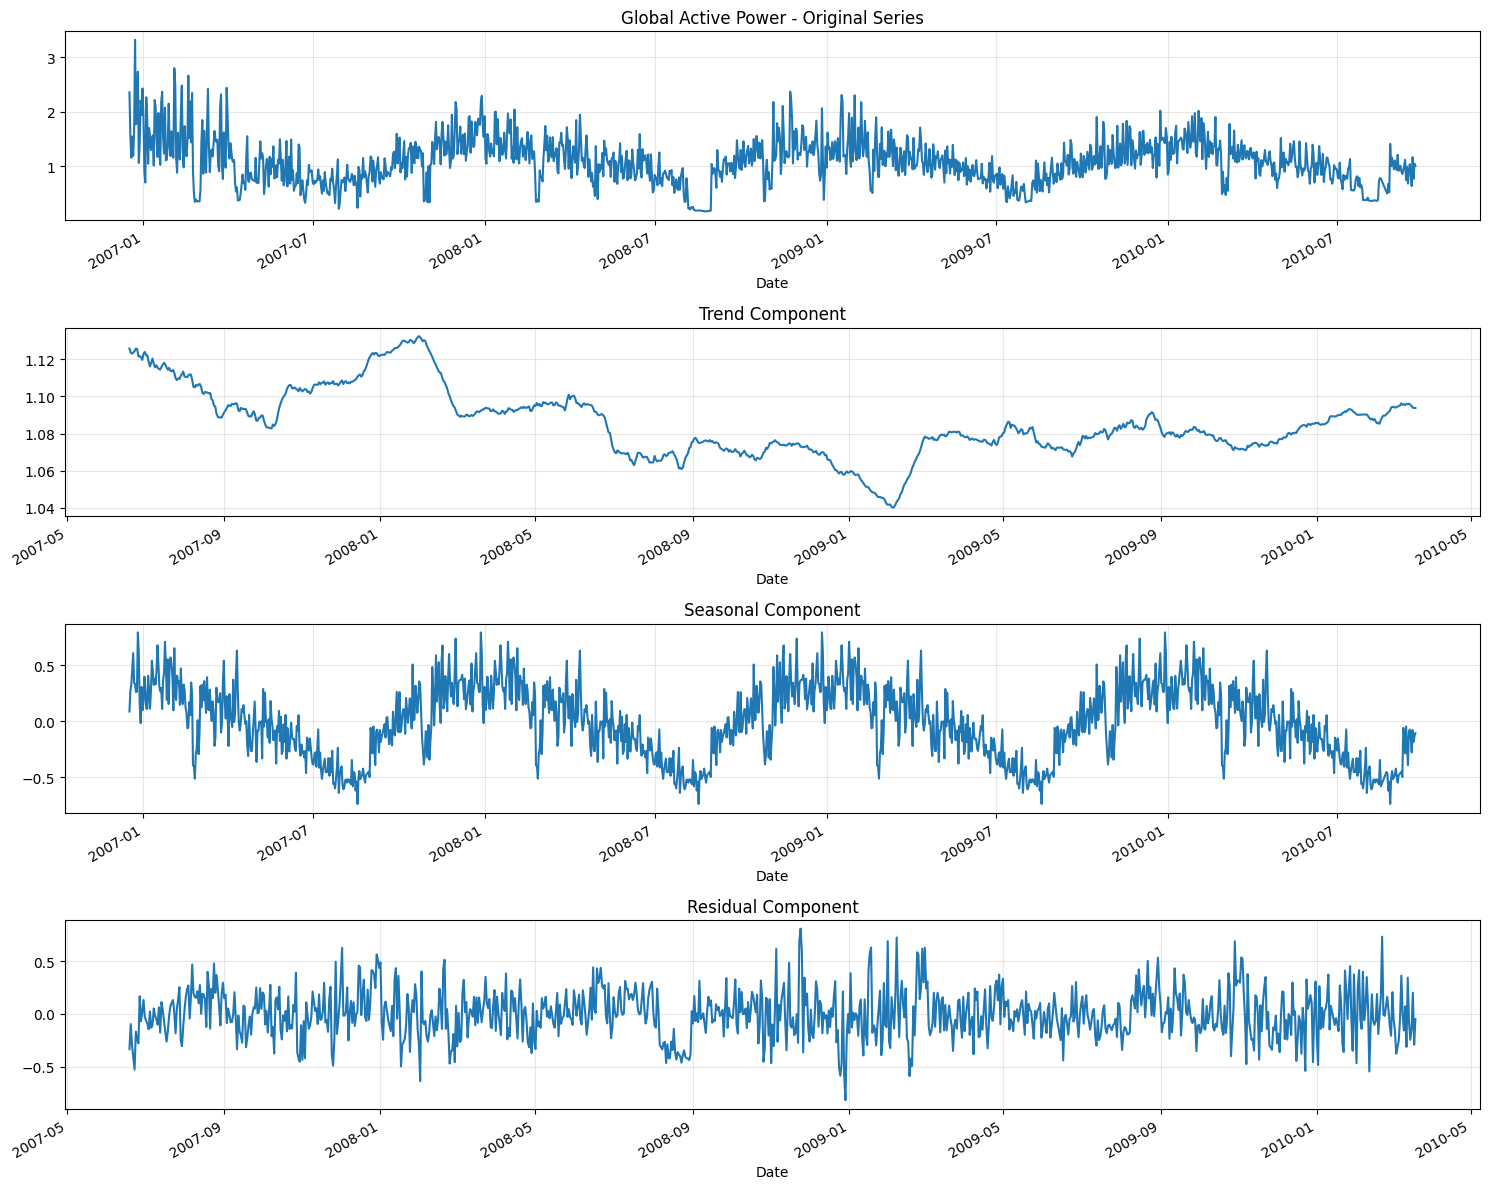


=== ACF AND PACF ANALYSIS ===


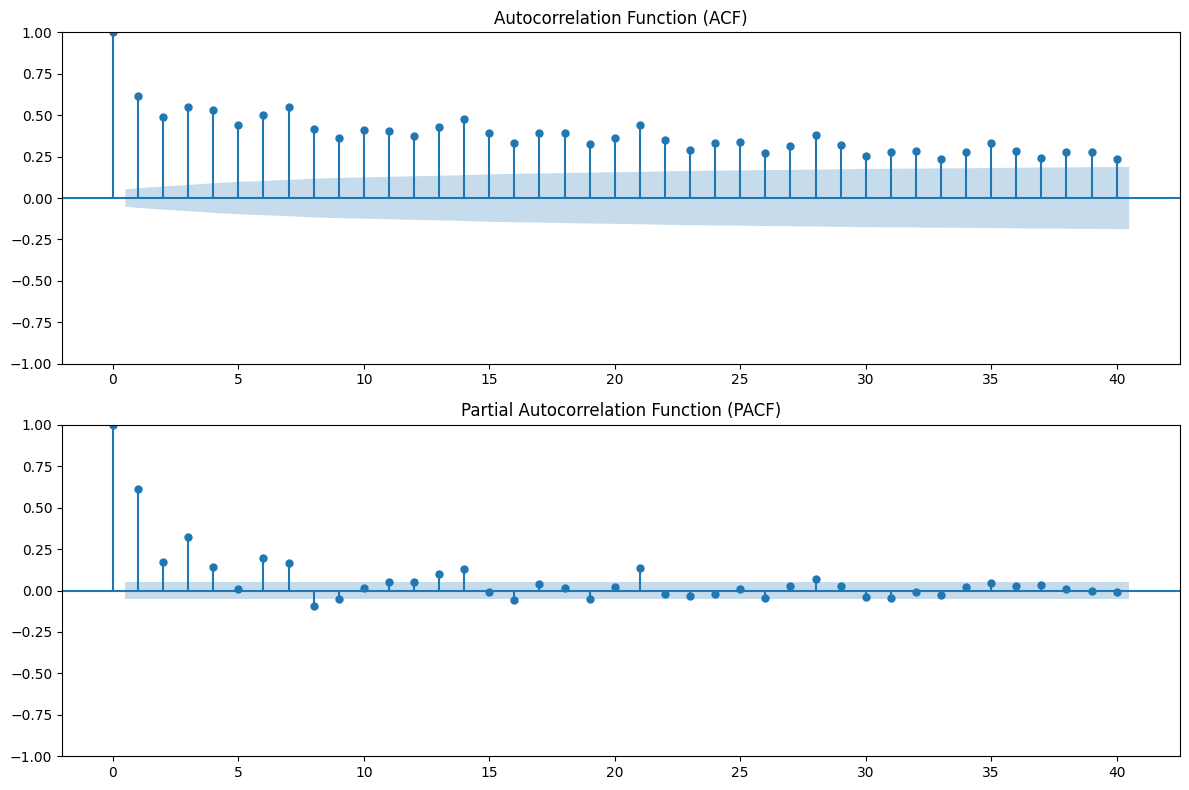


Training SARIMAX(1, 0, 1)x(1, 1, 1, 7)
Training SARIMAX(1, 0, 1)x(1, 1, 1, 7)...


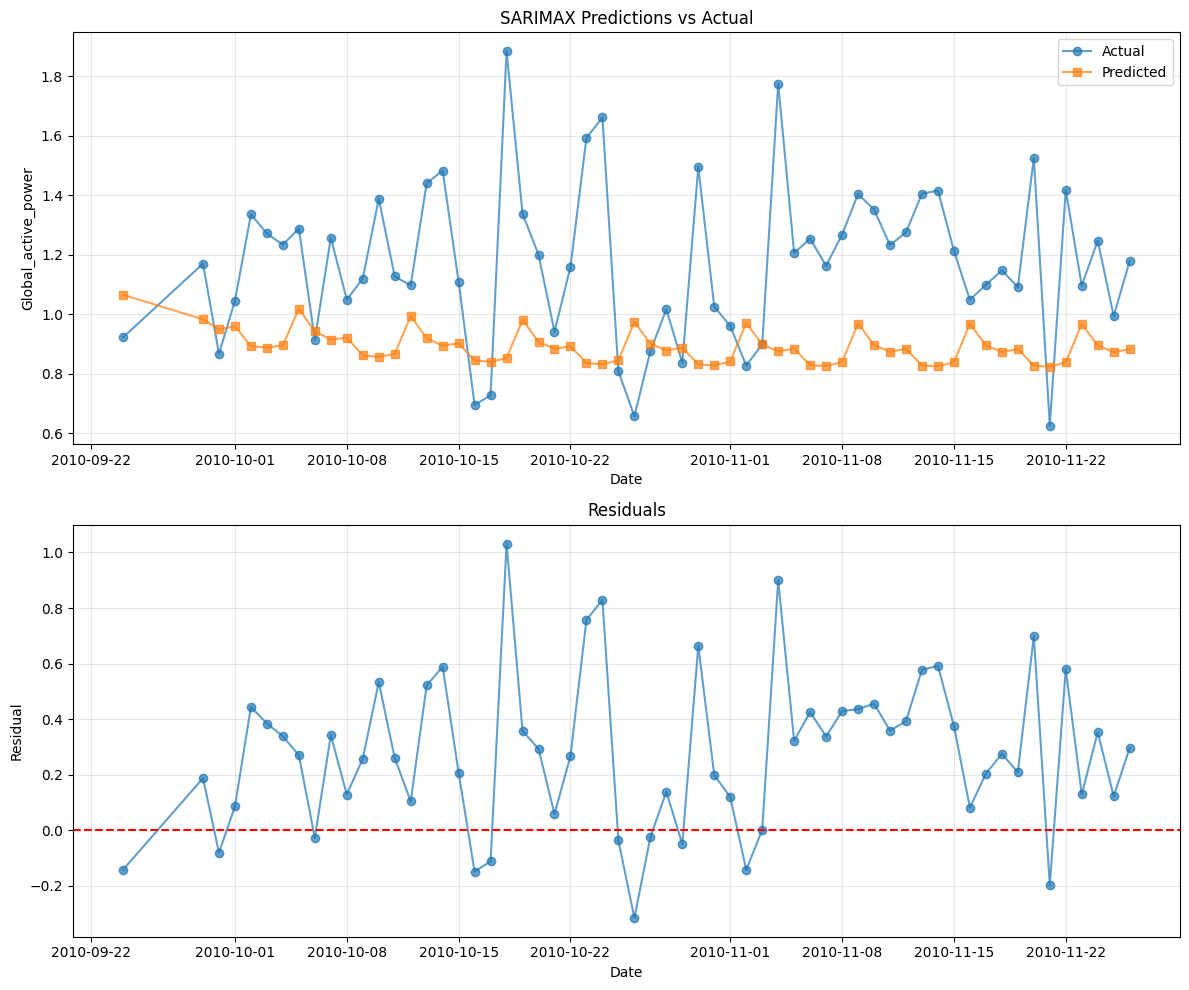

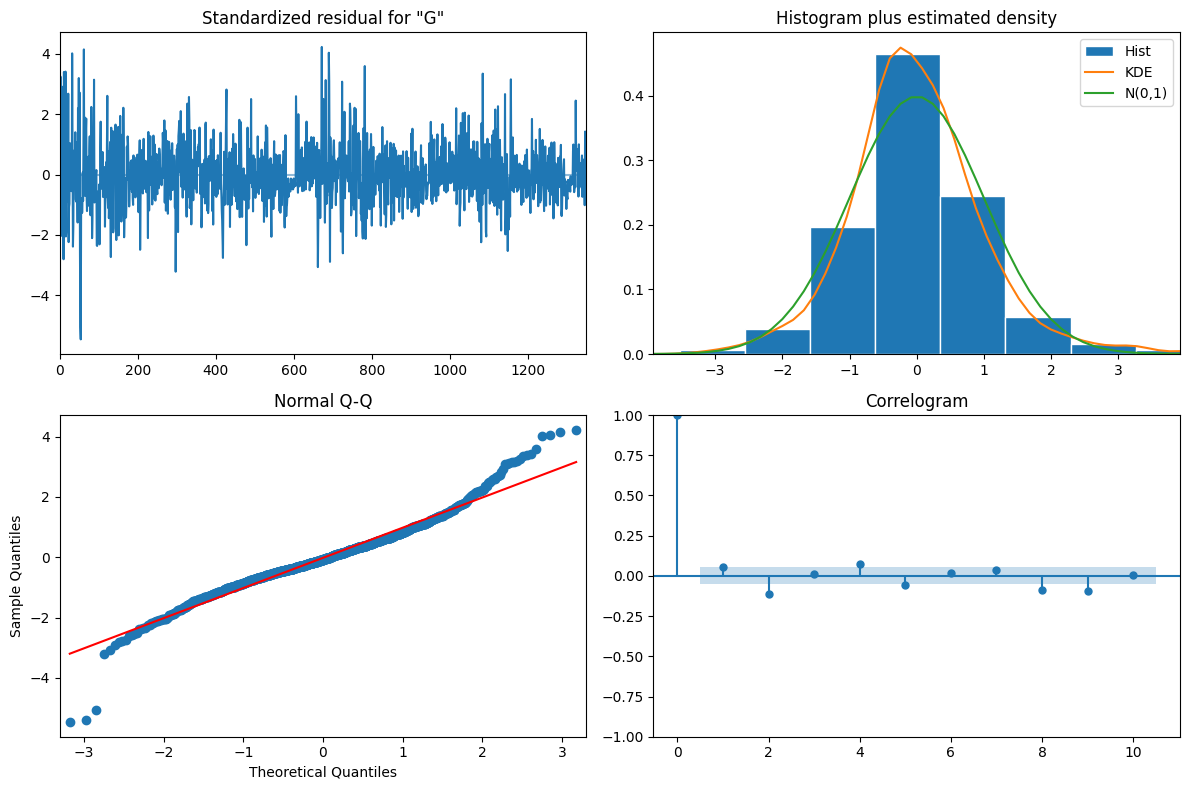


SARIMAX Results:
RMSE: 0.3933
MAE: 0.3198
R2: -1.2559
MAPE: 25.13%
AIC: 486.26
BIC: 512.29
🏃 View run SARIMAX_(1, 0, 1)_(1, 1, 1, 7)_juanplv04 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/27/runs/adb943ce0762492faca12c15c2691c62
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/27

Training SARIMAX(2, 0, 1)x(1, 1, 1, 7)
Training SARIMAX(2, 0, 1)x(1, 1, 1, 7)...


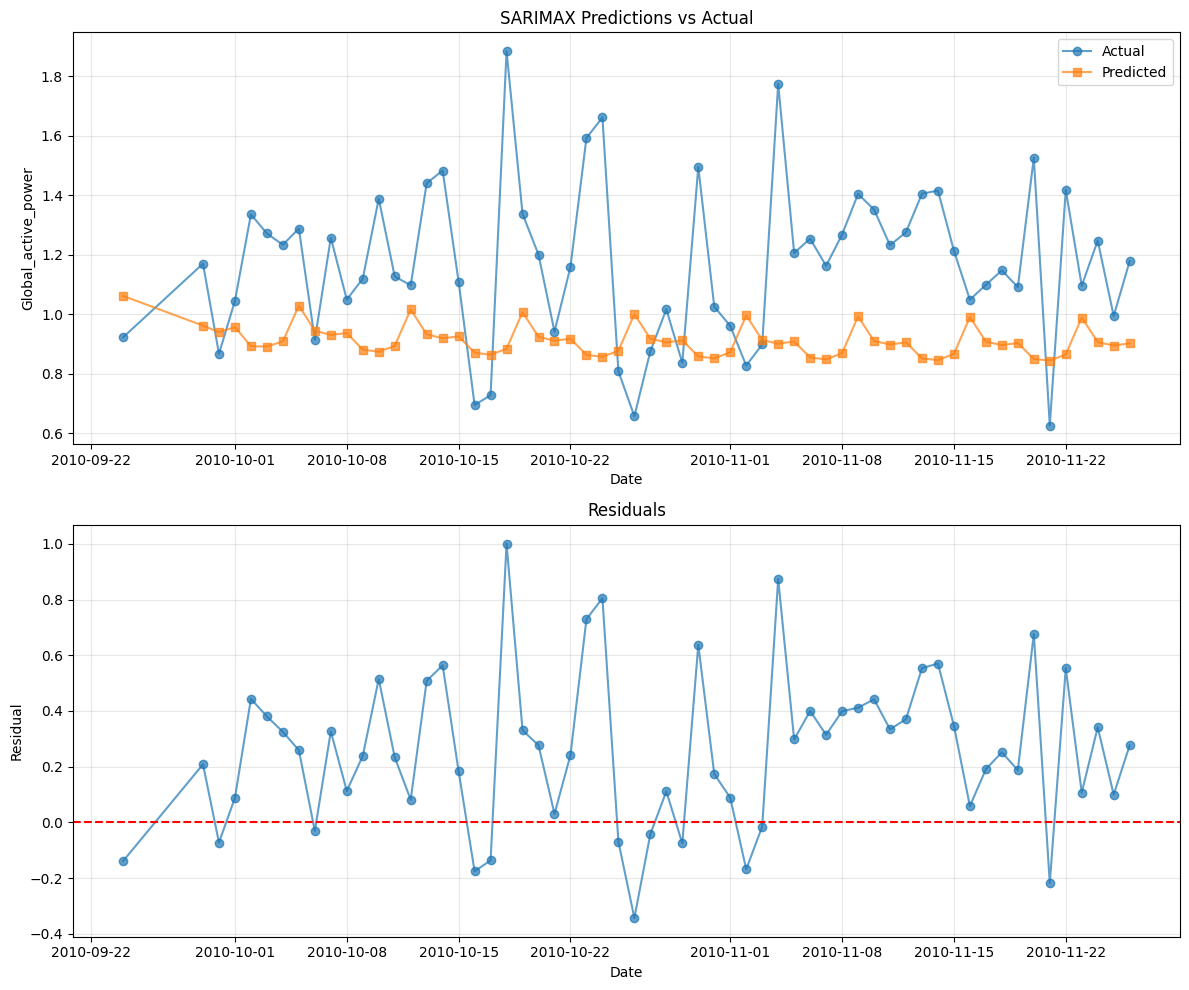

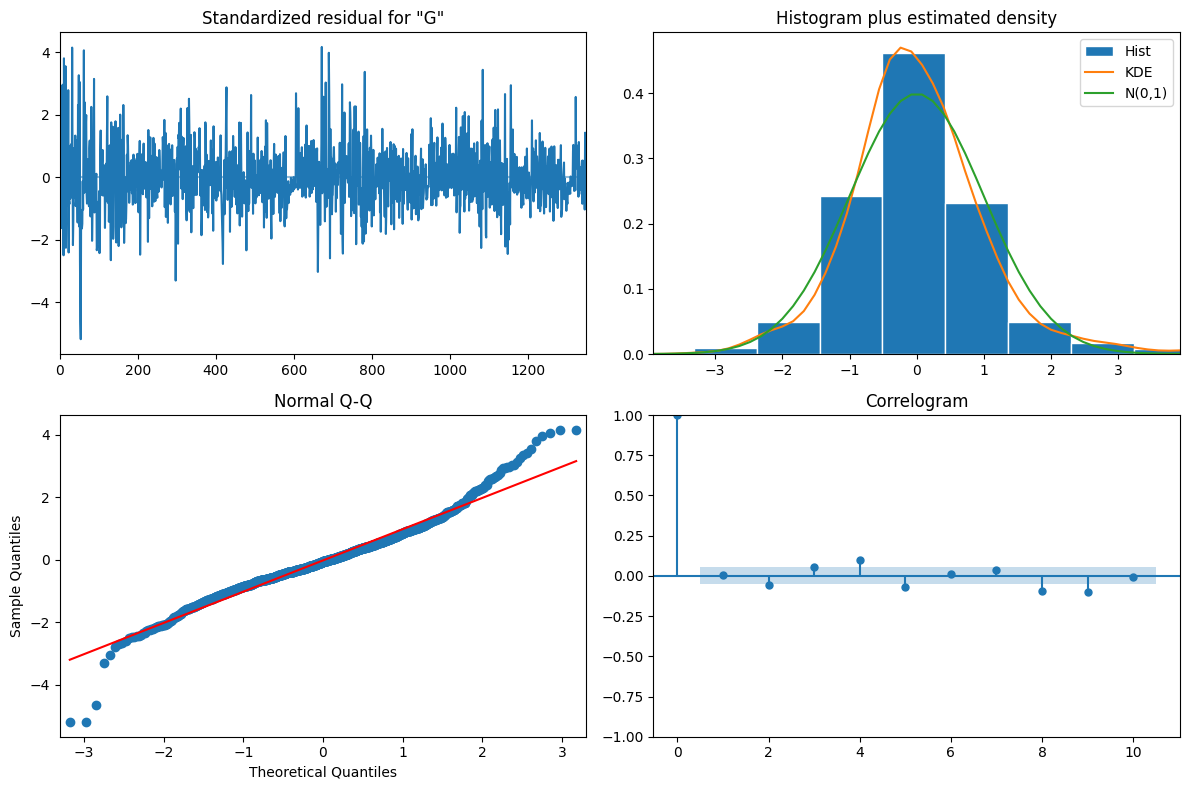


SARIMAX Results:
RMSE: 0.3784
MAE: 0.3072
R2: -1.0884
MAPE: 24.28%
AIC: 473.13
BIC: 504.37
🏃 View run SARIMAX_(2, 0, 1)_(1, 1, 1, 7)_juanplv04 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/27/runs/e87f3ff32e9741c8893b79a88dfa115b
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/27

Training SARIMAX(1, 0, 2)x(1, 1, 1, 7)
Training SARIMAX(1, 0, 2)x(1, 1, 1, 7)...


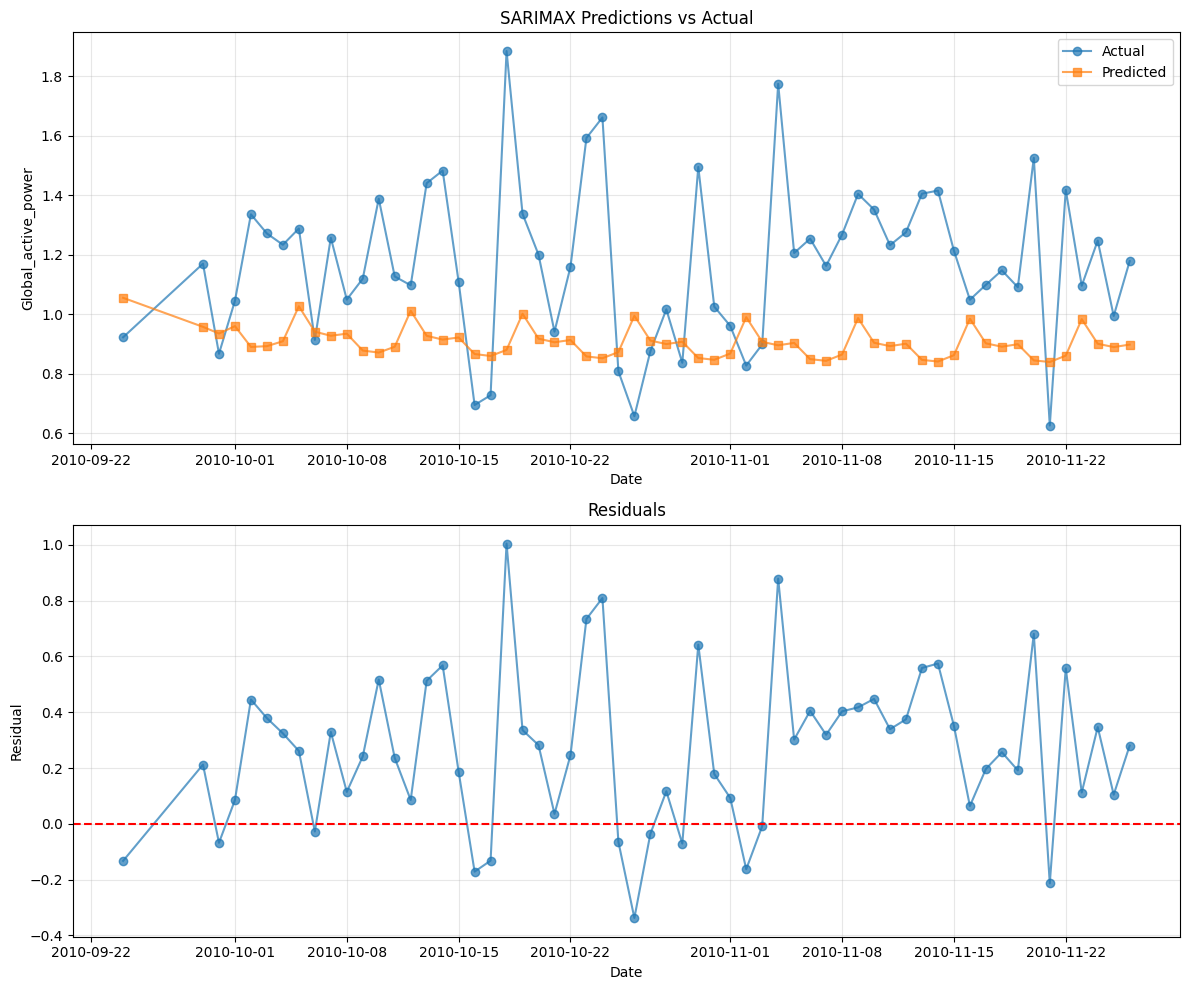

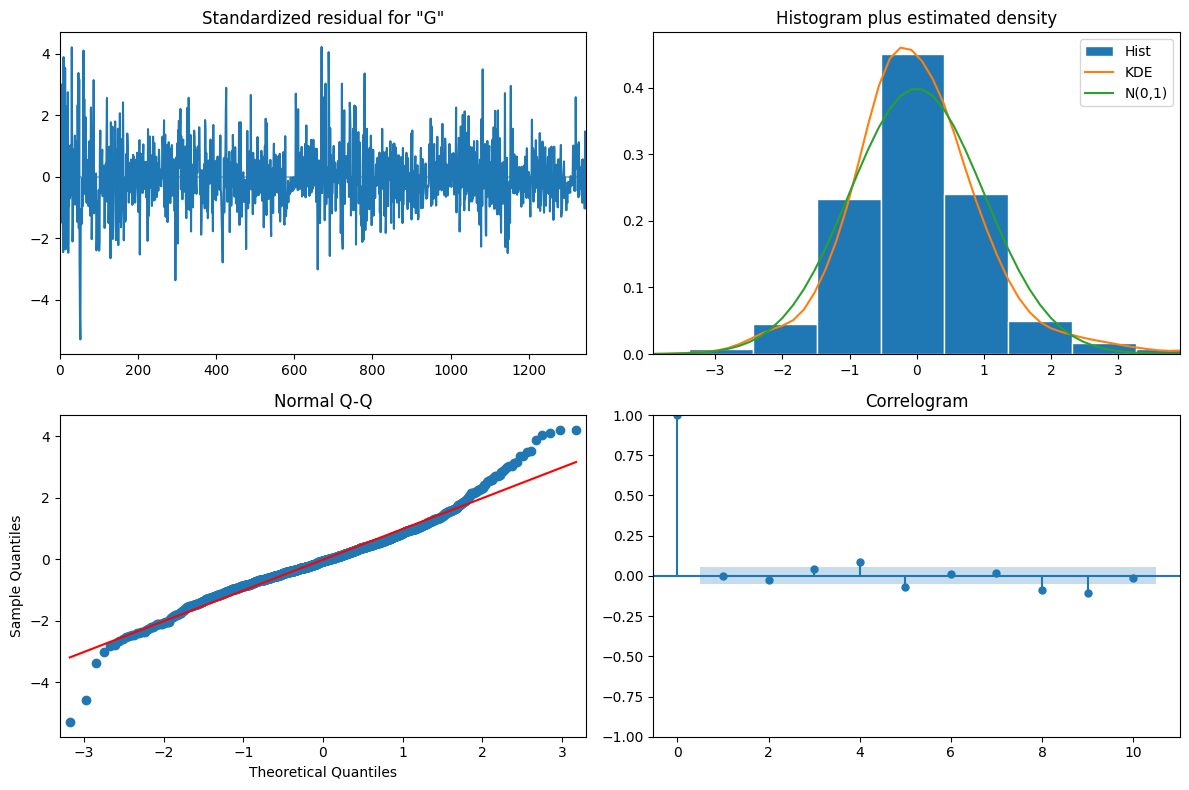


SARIMAX Results:
RMSE: 0.3813
MAE: 0.3095
R2: -1.1210
MAPE: 24.43%
AIC: 441.78
BIC: 473.02
🏃 View run SARIMAX_(1, 0, 2)_(1, 1, 1, 7)_juanplv04 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/27/runs/cd02de16d20b4748a2583e318109bdcc
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/27

=== SARIMAX MODEL COMPARISON ===
                      model_name       mse       mae      rmse        r2       mape         aic         bic  training_time
0  SARIMAX(1, 0, 1)x(1, 1, 1, 7)  0.154664  0.319822  0.393273 -1.255854  25.127015  486.258939  512.294533       1.199054
1  SARIMAX(2, 0, 1)x(1, 1, 1, 7)  0.143182  0.307181  0.378394 -1.088385  24.281790  473.128303  504.371016       1.824155
2  SARIMAX(1, 0, 2)x(1, 1, 1, 7)  0.145415  0.309540  0.381333 -1.120956  24.426493  441.777374  473.015638       1.538964


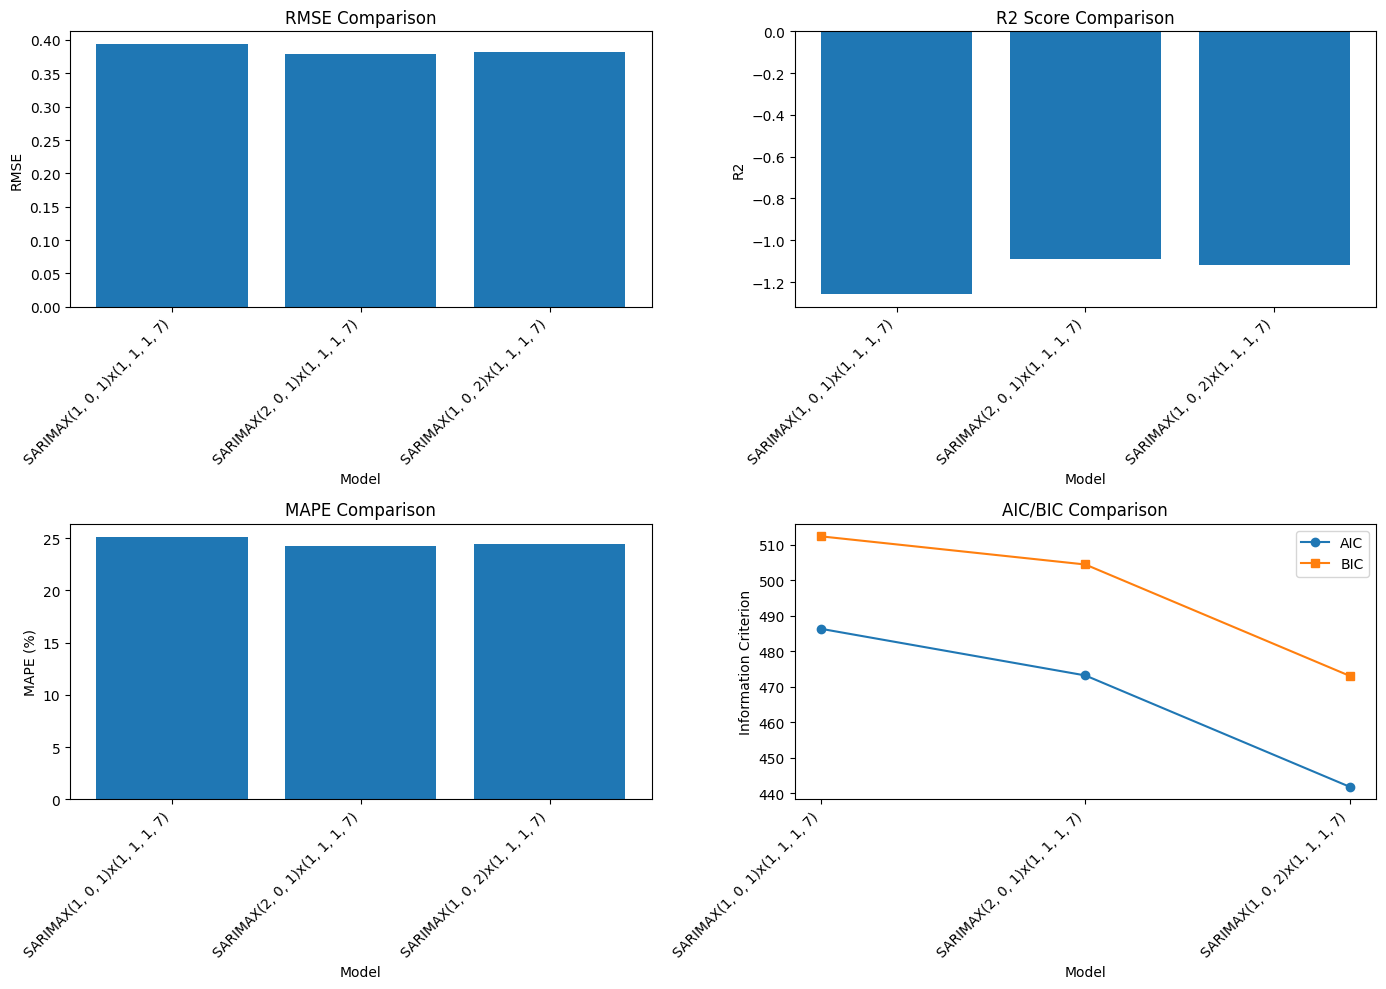

🏃 View run SARIMAX_Comparison_juanplv04 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/27/runs/d7718e29fe924851a8529a0e24bfb63e
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/27

Best SARIMAX model based on MAPE: SARIMAX(2, 0, 1)x(1, 1, 1, 7)
MAPE: 24.28%
R2: -1.0884


In [83]:
# 1. Stationarity Analysis
print("\n=== STATIONARITY ANALYSIS ===")
stationarity_results = perform_stationarity_tests(train_series, "Global Active Power")

# 2. Plot time series analysis
print("\n=== TIME SERIES DECOMPOSITION ===")
decomp_fig = plot_time_series_analysis(train_series, "Global Active Power")
plt.show()

# 3. Plot ACF and PACF
print("\n=== ACF AND PACF ANALYSIS ===")
acf_pacf_fig = plot_acf_pacf(train_series)
plt.show()

# 4. Difference the series if needed
d = 0
if stationarity_results['ADF_p_value'] > 0.05:
    print("\nSeries is not stationary. Applying first difference...")
    train_series_diff = train_series.diff().dropna()
    diff_stationarity = perform_stationarity_tests(train_series_diff, "Differenced Series")
    d = 1

    # Plot differenced series ACF/PACF
    diff_acf_pacf_fig = plot_acf_pacf(train_series_diff)
    plt.show()

# 5. Define SARIMAX parameters based on analysis
# You can try different combinations based on ACF/PACF plots
orders_to_try = [
    ((1, d, 1), (1, 1, 1, 7)),  # Weekly seasonality
    ((2, d, 1), (1, 1, 1, 7)),  # More AR terms
    ((1, d, 2), (1, 1, 1, 7)),  # More MA terms
]

# 6. Train models with different parameters
all_results = []

for order, seasonal_order in orders_to_try:
    print(f"\n{'='*50}")
    print(f"Training SARIMAX{order}x{seasonal_order}")
    print('='*50)

    results, model_fit = train_and_evaluate_sarimax(
        train_series,
        test_series,
        order,
        seasonal_order
    )

    if results is not None:
        all_results.append(results)

# 7. Compare results
if all_results:
    results_df = pd.DataFrame(all_results)
    print("\n=== SARIMAX MODEL COMPARISON ===")
    print(results_df.to_string())

    # Log comparison
    with mlflow.start_run(run_name="SARIMAX_Comparison_juanplv04"):
        # Fix: Use log_table with DataFrame directly
        mlflow.log_table(results_df, "model_comparison.json")

        # Alternative if that doesn't work: Save as artifact
        # results_df.to_json("model_comparison.json", orient='records')
        # mlflow.log_artifact("model_comparison.json")

        # Create comparison plot
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

        # RMSE comparison
        ax1.bar(range(len(results_df)), results_df['rmse'])
        ax1.set_xlabel('Model')
        ax1.set_ylabel('RMSE')
        ax1.set_title('RMSE Comparison')
        ax1.set_xticks(range(len(results_df)))
        ax1.set_xticklabels(results_df['model_name'], rotation=45, ha='right')

        # R2 comparison
        ax2.bar(range(len(results_df)), results_df['r2'])
        ax2.set_xlabel('Model')
        ax2.set_ylabel('R2')
        ax2.set_title('R2 Score Comparison')
        ax2.set_xticks(range(len(results_df)))
        ax2.set_xticklabels(results_df['model_name'], rotation=45, ha='right')

        # MAPE comparison
        ax3.bar(range(len(results_df)), results_df['mape'])
        ax3.set_xlabel('Model')
        ax3.set_ylabel('MAPE (%)')
        ax3.set_title('MAPE Comparison')
        ax3.set_xticks(range(len(results_df)))
        ax3.set_xticklabels(results_df['model_name'], rotation=45, ha='right')

        # AIC/BIC comparison
        ax4.plot(range(len(results_df)), results_df['aic'], marker='o', label='AIC')
        ax4.plot(range(len(results_df)), results_df['bic'], marker='s', label='BIC')
        ax4.set_xlabel('Model')
        ax4.set_ylabel('Information Criterion')
        ax4.set_title('AIC/BIC Comparison')
        ax4.set_xticks(range(len(results_df)))
        ax4.set_xticklabels(results_df['model_name'], rotation=45, ha='right')
        ax4.legend()

        plt.tight_layout()
        mlflow.log_figure(fig, "sarimax_comparison.png")
        plt.show()

    # Best model based on MAPE
    best_idx = results_df['mape'].idxmin()
    best_model = results_df.iloc[best_idx]
    print(f"\nBest SARIMAX model based on MAPE: {best_model['model_name']}")
    print(f"MAPE: {best_model['mape']:.2f}%")
    print(f"R2: {best_model['r2']:.4f}")

# 2. Modelos neuronales para series de tiempo

- Desarrollar e implementar los siguientes modelos para el pronóstico de la serie:
  - **Multilayer Perceptron (MLP)**
  - **Convolutional Neural Network (CNN)**
  - **Long Short-Term Memory (LSTM)**
  - **Conv-LSTM**

- Implementar cada uno de los modelos anteriores **tanto para el caso univariado como multivariado**.
- Comparar el desempeño de los modelos neuronales **univariados vs. multivariados**.
- Comparar el desempeño de los modelos neuronales **univariados** con el modelo **lineal clásico**. Crear gráficas donde se evidencie la predicción en el conjunto de test tanto del modelo lineal como no lineal

> Seleccionar al menos 3 estructuras de cada modelo. De todo el conjunto de modelos entrenados, seleccionar el modelo que obtuvo mejor rendimiento. A dicho modelo hacer una optimización parámetrica usando optuna. Recuerde que si usa callbacks como `EarlyStopping`, debe configurarse apropiadamente para permitir que el modelo se entrene una cantidad de épocas apropiadas.

## Configurar MLflow

In [6]:
dagshub.init(url="https://dagshub.com/PacoTinoco/Proyecto_modelado_TS", mlflow=True)
MLFLOW_TRACKING_URI = mlflow.get_tracking_uri()
print(MLFLOW_TRACKING_URI)
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
mlflow.set_experiment(experiment_name="univariados")

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=d6ccd2c8-395b-4b72-869a-ee497871674d&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=582b17ae8b5baf23f5eaa7f25b636331426bd9500975a15985fbb75745208946




Accessing as PacoTinoco

Initialized MLflow to track repo "PacoTinoco/Proyecto_modelado_TS"

Repository PacoTinoco/Proyecto_modelado_TS initialized!

https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow


2025/05/14 15:59:18 INFO mlflow.tracking.fluent: Experiment with name 'univariados' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/90fcb3e641a34a9aa527c544a5b4be72', creation_time=1747238358405, experiment_id='19', last_update_time=1747238358405, lifecycle_stage='active', name='univariados', tags={}>

In [7]:
df = df.set_index('Date')

In [8]:
df_uni = df[['Global_active_power']]

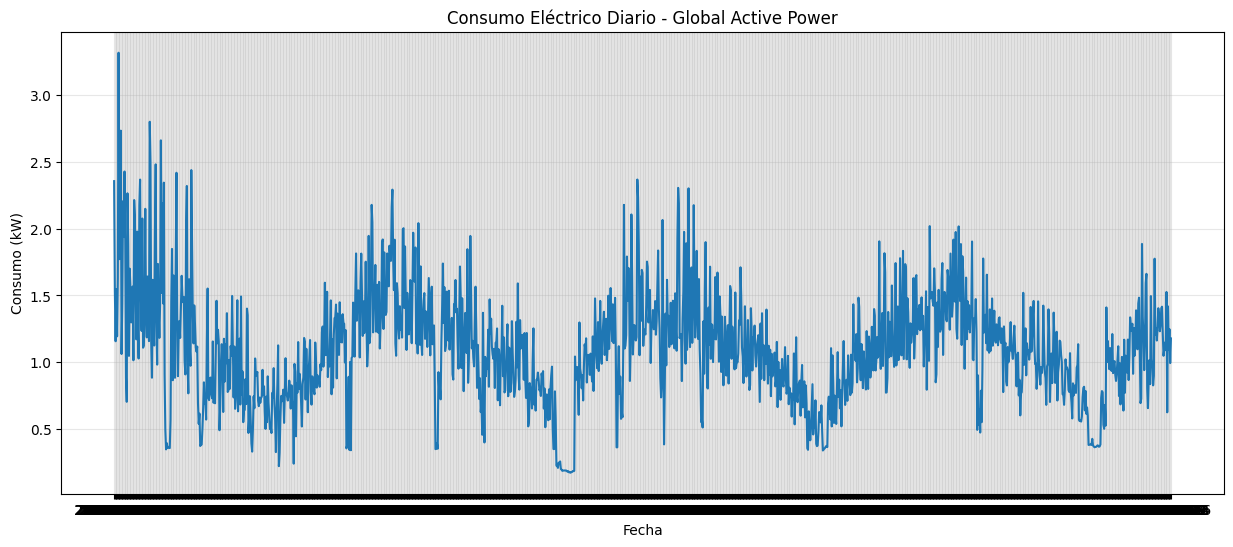

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(df_uni.index, df_uni['Global_active_power'])
plt.title('Consumo Eléctrico Diario - Global Active Power')
plt.xlabel('Fecha')
plt.ylabel('Consumo (kW)')
plt.grid(True, alpha=0.3)
plt.show()

## Funciones para preparar datos y secuencias para los modelos :

In [9]:
# 1. Preparar datos base una sola vez
def prepare_base_data(df_uni):
    """
    Prepara datos base una sola vez antes de Optuna
    """
    data = df_uni['Global_active_power'].values

    # Eliminar NaNs si existen
    if np.any(np.isnan(data)):
        data = data[~np.isnan(data)]

    # División temporal
    n = len(data)
    train_size = int(n * 0.7)
    val_size = int(n * 0.15)

    train_data = data[:train_size]
    val_data = data[train_size:train_size + val_size]
    test_data = data[train_size + val_size:]

    # Escalar una sola vez
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train_data.reshape(-1, 1)).flatten()
    val_scaled = scaler.transform(val_data.reshape(-1, 1)).flatten()
    test_scaled = scaler.transform(test_data.reshape(-1, 1)).flatten()

    return {
        'train_scaled': train_scaled,
        'val_scaled': val_scaled,
        'test_scaled': test_scaled,
        'scaler': scaler
    }


    # Crear secuencias
    def create_sequences(data, n_lag, n_ahead):
        X, y = [], []
        for i in range(len(data) - n_lag - n_ahead + 1):
            X.append(data[i:i + n_lag])
            y.append(data[i + n_lag:i + n_lag + n_ahead])
        return np.array(X), np.array(y)

    X_train, y_train = create_sequences(train_scaled, n_lag, n_ahead)
    X_val, y_val = create_sequences(val_scaled, n_lag, n_ahead)
    X_test, y_test = create_sequences(test_scaled, n_lag, n_ahead)

    # Reshape para MLP
    X_train = X_train.reshape(X_train.shape[0], n_lag)
    X_val = X_val.reshape(X_val.shape[0], n_lag)
    X_test = X_test.reshape(X_test.shape[0], n_lag)

    if n_ahead == 1:
        y_train = y_train.reshape(-1, 1)
        y_val = y_val.reshape(-1, 1)
        y_test = y_test.reshape(-1, 1)

    print(f"Datos preparados:")
    print(f"  Train: X={X_train.shape}, y={y_train.shape}")
    print(f"  Val:   X={X_val.shape}, y={y_val.shape}")
    print(f"  Test:  X={X_test.shape}, y={y_test.shape}")

    return {
        'X_train': X_train, 'y_train': y_train,
        'X_val': X_val, 'y_val': y_val,
        'X_test': X_test, 'y_test': y_test,
        'scaler': scaler, 'n_lag': n_lag, 'n_ahead': n_ahead
    }

## MLP :

In [ ]:
# Función mejorada para crear arquitecturas MLP
def create_mlp_architectures(n_lag, n_ahead):
    """
    Crea 3 arquitecturas MLP optimizadas para datos de consumo eléctrico diario
    """
    models = []

    # Arquitectura 1: MLP Ligero (sin cambios)
    model1 = keras.Sequential([
        layers.Input(shape=(n_lag,)),
        layers.Dense(50, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(25, activation='relu'),
        layers.Dense(n_ahead)
    ], name='MLP_Light')

    # Arquitectura 2: MLP Regularizado (MEJORADO)
    model2 = keras.Sequential([
        layers.Input(shape=(n_lag,)),
        # Primera capa con regularización L1+L2
        layers.Dense(128, activation='relu',
                    kernel_regularizer=keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        # Segunda capa con neuronas decrecientes
        layers.Dense(64, activation='relu',
                    kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.25),
        # Tercera capa
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        # Capa de salida con inicialización específica
        layers.Dense(n_ahead, kernel_initializer='glorot_uniform')
    ], name='MLP_Regularized')

    # Arquitectura 3: MLP con Skip Connections (sin cambios)
    input_layer = layers.Input(shape=(n_lag,))

    # Primera rama
    x1 = layers.Dense(128, activation='relu')(input_layer)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.Dropout(0.4)(x1)

    # Segunda rama (skip connection)
    x2 = layers.Dense(64, activation='relu')(input_layer)

    # Combinar
    concat = layers.Concatenate()([x1, x2])
    x = layers.Dense(64, activation='relu')(concat)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(32, activation='relu')(x)
    output = layers.Dense(n_ahead)(x)

    model3 = keras.Model(inputs=input_layer, outputs=output, name='MLP_SkipConnection')

    models.extend([model1, model2, model3])

    return models

# Función actualizada para entrenar con MLflow
def train_and_evaluate_model_with_mlflow(model, data_dict, model_name, n_lag, n_ahead, epochs=150, batch_size=32):
    """
    Entrena y evalúa un modelo MLP con logging en MLflow
    """
    with mlflow.start_run(run_name=f"{model_name}_lag{n_lag}_ahead{n_ahead}_{datetime.now().strftime('%Y%m%d_%H%M%S')}"):
        # Log parámetros del modelo
        mlflow.log_param("model_name", model_name)
        mlflow.log_param("n_lag", n_lag)
        mlflow.log_param("n_ahead", n_ahead)
        mlflow.log_param("epochs", epochs)
        mlflow.log_param("batch_size", batch_size)
        mlflow.log_param("total_params", model.count_params())
        mlflow.log_param("optimizer", "Adam")
        mlflow.log_param("initial_learning_rate", 0.001)

        # Registrar arquitectura
        model_summary = []
        model.summary(print_fn=lambda x: model_summary.append(x))
        mlflow.log_text("\n".join(model_summary), "model_architecture.txt")

        # Compilar modelo
        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=0.001),
            loss='mse',
            metrics=['mae']
        )

        # Callbacks
        early_stopping = keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=30,
            restore_best_weights=True
        )

        reduce_lr = keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=10,
            min_lr=1e-5
        )

        # Entrenar
        history = model.fit(
            data_dict['X_train'], data_dict['y_train'],
            validation_data=(data_dict['X_val'], data_dict['y_val']),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )

        # Log métricas de entrenamiento
        for epoch in range(len(history.history['loss'])):
            mlflow.log_metric("train_loss", history.history['loss'][epoch], step=epoch)
            mlflow.log_metric("val_loss", history.history['val_loss'][epoch], step=epoch)
            mlflow.log_metric("train_mae", history.history['mae'][epoch], step=epoch)
            mlflow.log_metric("val_mae", history.history['val_mae'][epoch], step=epoch)

        # Predicciones
        y_pred_train = model.predict(data_dict['X_train'], verbose=0)
        y_pred_val = model.predict(data_dict['X_val'], verbose=0)
        y_pred_test = model.predict(data_dict['X_test'], verbose=0)

        # Desescalar predicciones
        scaler = data_dict['scaler']

        y_train_true = scaler.inverse_transform(data_dict['y_train'])
        y_val_true = scaler.inverse_transform(data_dict['y_val'])
        y_test_true = scaler.inverse_transform(data_dict['y_test'])

        y_train_pred = scaler.inverse_transform(y_pred_train)
        y_val_pred = scaler.inverse_transform(y_pred_val)
        y_test_pred = scaler.inverse_transform(y_pred_test)

        # Calcular métricas
        def calculate_metrics(y_true, y_pred):
            rmse = np.sqrt(mean_squared_error(y_true, y_pred))
            mae = mean_absolute_error(y_true, y_pred)
            mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
            r2 = r2_score(y_true, y_pred)
            return {'rmse': rmse, 'mae': mae, 'mape': mape, 'r2': r2}

        metrics = {
            'train': calculate_metrics(y_train_true, y_train_pred),
            'val': calculate_metrics(y_val_true, y_val_pred),
            'test': calculate_metrics(y_test_true, y_test_pred)
        }

        # Log métricas finales
        for dataset in ['train', 'val', 'test']:
            for metric_name, metric_value in metrics[dataset].items():
                mlflow.log_metric(f"{dataset}_{metric_name}", metric_value)

        # Guardar modelo en MLflow
        mlflow.keras.log_model(model, "model")

        # Crear y guardar visualizaciones
        create_and_log_mlp_visualizations(model_name, history, metrics,
                                    {'y_test_true': y_test_true, 'y_test_pred': y_test_pred})

        # Guardar modelo localmente
        model_path = f'models/{model_name}_lag{n_lag}_ahead{n_ahead}.h5'
        os.makedirs('models', exist_ok=True)
        model.save(model_path)
        mlflow.log_artifact(model_path)

        print(f"\n{model_name} - Métricas finales:")
        print(f"  Test RMSE: {metrics['test']['rmse']:.4f}")
        print(f"  Test MAE:  {metrics['test']['mae']:.4f}")
        print(f"  Test MAPE: {metrics['test']['mape']:.2f}%")
        print(f"  Test R²:   {metrics['test']['r2']:.4f}")

    return model, history, metrics, {
        'y_test_true': y_test_true,
        'y_test_pred': y_test_pred
    }

# Función para visualizaciones simplificadas de MLP
def create_and_log_mlp_visualizations(model_name, history, metrics, predictions, n_lag):
    """
    Crea visualizaciones simplificadas para MLP y las guarda en MLflow
    Solo incluye: pérdida de entrenamiento, MAE durante entrenamiento, y últimos 60 días
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Resultados de {model_name} (MLP)', fontsize=16)

    # 1. Historia del entrenamiento - Pérdida
    axes[0].plot(history.history['loss'], label='Train Loss', linewidth=2)
    axes[0].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
    axes[0].set_title('Pérdida durante entrenamiento')
    axes[0].set_xlabel('Época')
    axes[0].set_ylabel('MSE')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # 2. MAE durante entrenamiento
    axes[1].plot(history.history['mae'], label='Train MAE', linewidth=2)
    axes[1].plot(history.history['val_mae'], label='Val MAE', linewidth=2)
    axes[1].set_title('MAE durante entrenamiento')
    axes[1].set_xlabel('Época')
    axes[1].set_ylabel('MAE')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    # 3. Predicciones vs Reales (últimos 60 días)
    n_points = min(60, len(predictions['y_test_true']))
    axes[2].plot(predictions['y_test_true'][-n_points:],
                label='Real', alpha=0.8, linewidth=2, color='blue')
    axes[2].plot(predictions['y_test_pred'][-n_points:],
                label='Predicción MLP', alpha=0.8, linewidth=2,
                color='red', linestyle='--')
    axes[2].set_title(f'Últimos {n_points} días del test')
    axes[2].set_xlabel('Días')
    axes[2].set_ylabel('Consumo (kW)')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()

    # Guardar y loggear en MLflow
    plot_path = f'{model_name}_results.png'
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    mlflow.log_artifact(plot_path)
    plt.show()

    # Cleanup
    if os.path.exists(plot_path):
        os.remove(plot_path)

# FUNCIÓN PRINCIPAL ACTUALIZADA
def run_mlp_experiment_with_mlflow(df_uni, n_lag=30, n_ahead=1):
    """
    Ejecuta el experimento completo con las 3 arquitecturas MLP usando MLflow
    """
    # Configurar MLflow
    dagshub.init(url="https://dagshub.com/PacoTinoco/Proyecto_modelado_TS", mlflow=True)
    MLFLOW_TRACKING_URI = mlflow.get_tracking_uri()
    print(f"MLflow Tracking URI: {MLFLOW_TRACKING_URI}")
    mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
    mlflow.set_experiment(experiment_name="MLP_univariate")

    print("=== Experimento MLP para Consumo Eléctrico Diario ===\n")

    # Preparar datos
    print("1. Preparando datos...")
    data_dict = prepare_data(df_uni, n_lag=n_lag, n_ahead=n_ahead)

    # Crear arquitecturas
    print("\n2. Creando arquitecturas MLP...")
    models = create_mlp_architectures(n_lag=n_lag, n_ahead=n_ahead)

    # Entrenar y evaluar cada modelo
    results = {}

    for i, model in enumerate(models):
        model_name = model.name
        print(f"\n3.{i+1} Entrenando {model_name}...")
        print(f"    Parámetros totales: {model.count_params()}")

        # Entrenar con MLflow
        model, history, metrics, predictions = train_and_evaluate_model_with_mlflow(
            model, data_dict, model_name, n_lag, n_ahead, epochs=150, batch_size=32
        )

        # Guardar resultados
        results[model_name] = {
            'model': model,
            'history': history,
            'metrics': metrics,
            'predictions': predictions
        }

    # Encontrar mejor modelo
    best_model = min(results.items(),
                     key=lambda x: x[1]['metrics']['val']['rmse'])

    print(f"\n=== MEJOR MODELO: {best_model[0]} ===")
    print(f"Val RMSE: {best_model[1]['metrics']['val']['rmse']:.4f}")

    return results

In [ ]:
mlp_uni = run_mlp_experiment_with_mlflow(df_uni, n_lag=30, n_ahead=1)

Initialized MLflow to track repo "PacoTinoco/Proyecto_modelado_TS"

Repository PacoTinoco/Proyecto_modelado_TS initialized!

MLflow Tracking URI: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow
=== Experimento MLP para Consumo Eléctrico Diario ===

1. Preparando datos...
Datos preparados:
  Train: X=(967, 30), y=(967, 1)
  Val:   X=(183, 30), y=(183, 1)
  Test:  X=(185, 30), y=(185, 1)

2. Creando arquitecturas MLP...

3.1 Entrenando MLP_Light...
    Parámetros totales: 2851


Epoch 1/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0929 - mae: 0.2367 - val_loss: 0.0173 - val_mae: 0.1057 - learning_rate: 0.0010
Epoch 2/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0210 - mae: 0.1098 - val_loss: 0.0111 - val_mae: 0.0816 - learning_rate: 0.0010
Epoch 3/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0176 - mae: 0.1009 - val_loss: 0.0114 - val_mae: 0.0830 - learning_rate: 0.0010
Epoch 4/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mae: 0.0878 - val_loss: 0.0095 - val_mae: 0.0748 - learning_rate: 0.0010
Epoch 5/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mae: 0.0814 - val_loss: 0.0088 - val_mae: 0.0724 - learning_rate: 0.0010
Epoch 6/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mae: 0.0802 - val_loss: 0.0093 - val_mae: 0.0755 - learning_rate: 0.0010
Epoch 7/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mae: 0.0803 - val_loss: 0.0087 - val_mae: 0.0723 - learning_rate: 0.0010
Epoch 8/150


2025/05/14 07:39:53 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/05/14 07:40:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



MLP_Light - Métricas finales:
  Test RMSE: 0.2315
  Test MAE:  0.1733
  Test MAPE: 20.05%
  Test R²:   0.4300
🏃 View run MLP_Light_lag30_ahead1_20250514_073627 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/14/runs/873bc34c6d474fe4a400731296bdc93d
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/14

3.2 Entrenando MLP_Regularized...
    Parámetros totales: 15105


Epoch 1/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - loss: 1.5988 - mae: 0.8073 - val_loss: 0.6900 - val_mae: 0.4314 - learning_rate: 0.0010
Epoch 2/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1816 - mae: 0.6418 - val_loss: 0.6065 - val_mae: 0.3322 - learning_rate: 0.0010
Epoch 3/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8917 - mae: 0.4886 - val_loss: 0.5482 - val_mae: 0.2460 - learning_rate: 0.0010
Epoch 4/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8136 - mae: 0.4556 - val_loss: 0.5139 - val_mae: 0.1854 - learning_rate: 0.0010
Epoch 5/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7150 - mae: 0.3859 - val_loss: 0.4904 - val_mae: 0.1338 - learning_rate: 0.0010
Epoch 6/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6671 - mae: 0.3572 - val_loss: 0.4833 - val_mae: 0.1257 - learning_rate: 0.0010
Epoch 7/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6576 - mae: 0.3436 - val_loss: 0.4761 - val_mae: 0.1169 - learning_rate: 0.0010
Epoch 8/150


2025/05/14 07:50:46 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/05/14 07:50:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



MLP_Regularized - Métricas finales:
  Test RMSE: 0.2504
  Test MAE:  0.2028
  Test MAPE: 26.85%
  Test R²:   0.3330
🏃 View run MLP_Regularized_lag30_ahead1_20250514_074005 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/14/runs/dd281828c77e493a8ffff4188c403174
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/14

3.3 Entrenando MLP_SkipConnection...
    Parámetros totales: 20929


Epoch 1/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.8344 - mae: 0.6579 - val_loss: 0.0859 - val_mae: 0.2780 - learning_rate: 0.0010
Epoch 2/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1591 - mae: 0.3069 - val_loss: 0.0879 - val_mae: 0.2810 - learning_rate: 0.0010
Epoch 3/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1082 - mae: 0.2477 - val_loss: 0.0842 - val_mae: 0.2748 - learning_rate: 0.0010
Epoch 4/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0643 - mae: 0.1943 - val_loss: 0.0634 - val_mae: 0.2351 - learning_rate: 0.0010
Epoch 5/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0576 - mae: 0.1845 - val_loss: 0.0497 - val_mae: 0.2053 - learning_rate: 0.0010
Epoch 6/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0403 - mae: 0.1538 - val_loss: 0.0504 - val_mae: 0.2064 - learning_rate: 0.0010
Epoch 7/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0394 - mae: 0.1516 - val_loss: 0.0396 - val_mae: 0.1794 - learning_rate: 0.0010
Epoch 8/150


2025/05/14 07:56:14 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/05/14 07:56:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



MLP_SkipConnection - Métricas finales:
  Test RMSE: 0.2533
  Test MAE:  0.1973
  Test MAPE: 24.79%
  Test R²:   0.3173
🏃 View run MLP_SkipConnection_lag30_ahead1_20250514_075059 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/14/runs/7ae5e64ee9c2432a86b788d80c814ee3
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/14

=== MEJOR MODELO: MLP_Light ===
Val RMSE: 0.2711


1. MLP Light (Simple)

Arquitectura: Input → 50 neuronas → 25 neuronas → Output
Características: 2 capas ocultas, dropout ligero (0.2)
Ideal para: Patrones simples y directos
Ventaja: Rápido y evita sobreajuste

2. MLP Regularized (Mejorado)

Arquitectura: Input → 128 → 64 → 32 → Output
Características:

3 capas ocultas con BatchNorm
Regularización L1+L2
Dropout moderado (0.25)
Activaciones mixtas (ReLU y ELU)


Ideal para: Balance entre capacidad y generalización
Ventaja: Evita overfitting mientras captura patrones complejos

3. MLP Skip Connection (Complejo)

Arquitectura:

Rama principal: Input → 128 → Concat → 64 → 32 → Output
Rama secundaria: Input → 64 → Concat


Características:

Conexiones de salto (skip connections)
Concatenación de características
Dropout fuerte (0.4)


Ideal para: Patrones muy complejos
Ventaja: Captura relaciones no lineales sofisticadas

# CNN

In [ ]:
# Función para crear arquitecturas CNN
def create_cnn_architectures(n_lag, n_ahead):
    """
    Crea 3 arquitecturas CNN optimizadas para series temporales de consumo eléctrico
    """
    models = []

    # Arquitectura 1: CNN Simple
    model1 = keras.Sequential([
        layers.Input(shape=(n_lag, 1)),
        layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(filters=16, kernel_size=3, activation='relu', padding='same'),
        layers.Flatten(),
        layers.Dense(25, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(n_ahead)
    ], name='CNN_Simple')

    # Arquitectura 2: CNN con múltiples filtros de diferentes tamaños
    model2 = keras.Sequential([
        layers.Input(shape=(n_lag, 1)),
        # Primera capa convolucional
        layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        # Segunda capa convolucional
        layers.Conv1D(filters=32, kernel_size=5, activation='relu', padding='same'),
        layers.BatchNormalization(),
        # Capa global
        layers.GlobalAveragePooling1D(),
        # Capas densas
        layers.Dense(50, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(25, activation='relu'),
        layers.Dense(n_ahead)
    ], name='CNN_MultiFilter')

    # Arquitectura 3: CNN con conexiones residuales
    input_layer = layers.Input(shape=(n_lag, 1))

    # Primera rama convolucional
    conv1 = layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
    conv1 = layers.BatchNormalization()(conv1)
    pool1 = layers.MaxPooling1D(pool_size=2)(conv1)

    # Segunda rama convolucional paralela
    conv2 = layers.Conv1D(filters=32, kernel_size=5, activation='relu', padding='same')(input_layer)
    conv2 = layers.BatchNormalization()(conv2)
    pool2 = layers.MaxPooling1D(pool_size=2)(conv2)

    # Concatenar ramas
    concat = layers.Concatenate()([pool1, pool2])

    # Más capas convolucionales
    conv3 = layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(concat)

    # Global pooling
    global_pool = layers.GlobalAveragePooling1D()(conv3)

    # Capas densas finales
    dense1 = layers.Dense(64, activation='relu')(global_pool)
    dense1 = layers.Dropout(0.3)(dense1)
    dense2 = layers.Dense(32, activation='relu')(dense1)
    output = layers.Dense(n_ahead)(dense2)

    model3 = keras.Model(inputs=input_layer, outputs=output, name='CNN_Residual')

    models.extend([model1, model2, model3])

    return models

# Función para entrenar CNN con MLflow
def train_and_evaluate_cnn_with_mlflow(model, data_dict, model_name, n_lag, n_ahead, epochs=150, batch_size=32):
    """
    Entrena y evalúa un modelo CNN con logging en MLflow
    """
    with mlflow.start_run(run_name=f"{model_name}_lag{n_lag}_ahead{n_ahead}_{datetime.now().strftime('%Y%m%d_%H%M%S')}"):
        # Log parámetros del modelo
        mlflow.log_param("model_name", model_name)
        mlflow.log_param("model_type", "CNN")
        mlflow.log_param("n_lag", n_lag)
        mlflow.log_param("n_ahead", n_ahead)
        mlflow.log_param("epochs", epochs)
        mlflow.log_param("batch_size", batch_size)
        mlflow.log_param("total_params", model.count_params())
        mlflow.log_param("optimizer", "Adam")
        mlflow.log_param("initial_learning_rate", 0.001)

        # Registrar arquitectura
        model_summary = []
        model.summary(print_fn=lambda x: model_summary.append(x))
        mlflow.log_text("\n".join(model_summary), "model_architecture.txt")

        # Compilar modelo
        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=0.001),
            loss='mse',
            metrics=['mae']
        )

        # Callbacks
        early_stopping = keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=25,
            restore_best_weights=True
        )

        reduce_lr = keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=10,
            min_lr=1e-5
        )

        # Entrenar
        history = model.fit(
            data_dict['X_train'], data_dict['y_train'],
            validation_data=(data_dict['X_val'], data_dict['y_val']),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )

        # Log métricas de entrenamiento
        for epoch in range(len(history.history['loss'])):
            mlflow.log_metric("train_loss", history.history['loss'][epoch], step=epoch)
            mlflow.log_metric("val_loss", history.history['val_loss'][epoch], step=epoch)
            mlflow.log_metric("train_mae", history.history['mae'][epoch], step=epoch)
            mlflow.log_metric("val_mae", history.history['val_mae'][epoch], step=epoch)

        # Predicciones
        y_pred_train = model.predict(data_dict['X_train'], verbose=0)
        y_pred_val = model.predict(data_dict['X_val'], verbose=0)
        y_pred_test = model.predict(data_dict['X_test'], verbose=0)

        # Desescalar predicciones
        scaler = data_dict['scaler']

        y_train_true = scaler.inverse_transform(data_dict['y_train'])
        y_val_true = scaler.inverse_transform(data_dict['y_val'])
        y_test_true = scaler.inverse_transform(data_dict['y_test'])

        y_train_pred = scaler.inverse_transform(y_pred_train)
        y_val_pred = scaler.inverse_transform(y_pred_val)
        y_test_pred = scaler.inverse_transform(y_pred_test)

        # Calcular métricas
        def calculate_metrics(y_true, y_pred):
            rmse = np.sqrt(mean_squared_error(y_true, y_pred))
            mae = mean_absolute_error(y_true, y_pred)
            mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
            r2 = r2_score(y_true, y_pred)
            return {'rmse': rmse, 'mae': mae, 'mape': mape, 'r2': r2}

        metrics = {
            'train': calculate_metrics(y_train_true, y_train_pred),
            'val': calculate_metrics(y_val_true, y_val_pred),
            'test': calculate_metrics(y_test_true, y_test_pred)
        }

        # Log métricas finales
        for dataset in ['train', 'val', 'test']:
            for metric_name, metric_value in metrics[dataset].items():
                mlflow.log_metric(f"{dataset}_{metric_name}", metric_value)

        # Guardar modelo en MLflow
        mlflow.keras.log_model(model, "model")

        # Crear y guardar visualizaciones
        create_and_log_cnn_visualizations(model_name, history, metrics,
                                         {'y_test_true': y_test_true, 'y_test_pred': y_test_pred})

        # Guardar modelo localmente
        model_path = f'models/{model_name}_lag{n_lag}_ahead{n_ahead}.h5'
        os.makedirs('models', exist_ok=True)
        model.save(model_path)
        mlflow.log_artifact(model_path)

        print(f"\n{model_name} - Métricas finales:")
        print(f"  Test RMSE: {metrics['test']['rmse']:.4f}")
        print(f"  Test MAE:  {metrics['test']['mae']:.4f}")
        print(f"  Test MAPE: {metrics['test']['mape']:.2f}%")
        print(f"  Test R²:   {metrics['test']['r2']:.4f}")

    return model, history, metrics, {
        'y_test_true': y_test_true,
        'y_test_pred': y_test_pred
    }

# Función para visualizaciones simplificadas de CNN
def create_and_log_cnn_visualizations(model_name, history, metrics, predictions, n_lag):
    """
    Crea visualizaciones simplificadas para CNN y las guarda en MLflow
    Solo incluye: pérdida de entrenamiento, MAE durante entrenamiento, y últimos 60 días
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Resultados de {model_name} (CNN)', fontsize=16)

    # 1. Historia del entrenamiento - Pérdida
    axes[0].plot(history.history['loss'], label='Train Loss', linewidth=2)
    axes[0].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
    axes[0].set_title('Pérdida durante entrenamiento')
    axes[0].set_xlabel('Época')
    axes[0].set_ylabel('MSE')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # 2. MAE durante entrenamiento
    axes[1].plot(history.history['mae'], label='Train MAE', linewidth=2)
    axes[1].plot(history.history['val_mae'], label='Val MAE', linewidth=2)
    axes[1].set_title('MAE durante entrenamiento')
    axes[1].set_xlabel('Época')
    axes[1].set_ylabel('MAE')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    # 3. Predicciones vs Reales (últimos 60 días)
    n_points = min(60, len(predictions['y_test_true']))
    axes[2].plot(predictions['y_test_true'][-n_points:],
                label='Real', alpha=0.8, linewidth=2, color='blue')
    axes[2].plot(predictions['y_test_pred'][-n_points:],
                label='Predicción CNN', alpha=0.8, linewidth=2,
                color='red', linestyle='--')
    axes[2].set_title(f'Últimos {n_points} días del test')
    axes[2].set_xlabel('Días')
    axes[2].set_ylabel('Consumo (kW)')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()

    # Guardar y loggear en MLflow
    plot_path = f'{model_name}_results.png'
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    mlflow.log_artifact(plot_path)
    plt.show()

    # Cleanup
    if os.path.exists(plot_path):
        os.remove(plot_path)

# FUNCIÓN PRINCIPAL PARA CNN
def run_cnn_experiment_with_mlflow(df_uni, n_lag=30, n_ahead=1):
    """
    Ejecuta el experimento completo con las 3 arquitecturas CNN usando MLflow
    """
    # Configurar MLflow
    dagshub.init(url="https://dagshub.com/PacoTinoco/Proyecto_modelado_TS", mlflow=True)
    MLFLOW_TRACKING_URI = mlflow.get_tracking_uri()
    print(f"MLflow Tracking URI: {MLFLOW_TRACKING_URI}")
    mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
    mlflow.set_experiment(experiment_name="CNN_univariate")

    print("=== Experimento CNN para Consumo Eléctrico Diario ===\n")

    # Preparar datos
    print("1. Preparando datos para CNN...")
    data_dict = prepare_data(df_uni, n_lag=n_lag, n_ahead=n_ahead)

    # Crear arquitecturas
    print("\n2. Creando arquitecturas CNN...")
    models = create_cnn_architectures(n_lag=n_lag, n_ahead=n_ahead)

    # Entrenar y evaluar cada modelo
    results = {}

    for i, model in enumerate(models):
        model_name = model.name
        print(f"\n3.{i+1} Entrenando {model_name}...")
        print(f"    Parámetros totales: {model.count_params()}")

        # Entrenar con MLflow
        model, history, metrics, predictions = train_and_evaluate_cnn_with_mlflow(
            model, data_dict, model_name, n_lag, n_ahead, epochs=150, batch_size=32
        )

        # Guardar resultados
        results[model_name] = {
            'model': model,
            'history': history,
            'metrics': metrics,
            'predictions': predictions
        }

    # Encontrar mejor modelo
    best_model = min(results.items(),
                     key=lambda x: x[1]['metrics']['val']['rmse'])

    print(f"\n=== MEJOR MODELO CNN: {best_model[0]} ===")
    print(f"Val RMSE: {best_model[1]['metrics']['val']['rmse']:.4f}")

    return results

In [ ]:
cnn_uni = run_cnn_experiment_with_mlflow(df_uni, n_lag=30, n_ahead=1)

Initialized MLflow to track repo "PacoTinoco/Proyecto_modelado_TS"

Repository PacoTinoco/Proyecto_modelado_TS initialized!

MLflow Tracking URI: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow
=== Experimento CNN para Consumo Eléctrico Diario ===

1. Preparando datos para CNN...
Datos preparados:
  Train: X=(967, 30), y=(967, 1)
  Val:   X=(183, 30), y=(183, 1)
  Test:  X=(185, 30), y=(185, 1)

2. Creando arquitecturas CNN...

3.1 Entrenando CNN_Simple...
    Parámetros totales: 7731


Epoch 1/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0399 - mae: 0.1579 - val_loss: 0.0090 - val_mae: 0.0717 - learning_rate: 0.0010
Epoch 2/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0174 - mae: 0.1021 - val_loss: 0.0102 - val_mae: 0.0767 - learning_rate: 0.0010
Epoch 3/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0156 - mae: 0.0947 - val_loss: 0.0103 - val_mae: 0.0783 - learning_rate: 0.0010
Epoch 4/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 - mae: 0.0876 - val_loss: 0.0096 - val_mae: 0.0754 - learning_rate: 0.0010
Epoch 5/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - mae: 0.0829 - val_loss: 0.0078 - val_mae: 0.0667 - learning_rate: 0.0010
Epoch 6/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - mae: 0.0861 - val_loss: 0.0083 - val_mae: 0.0683 - learning_rate: 0.0010
Epoch 7/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mae: 0.0829 - val_loss: 0.0125 - val_mae: 0.0898 - learning_rate: 0.0010
Epoch 8/150


2025/05/14 07:25:50 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/05/14 07:26:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



CNN_Simple - Métricas finales:
  Test RMSE: 0.2347
  Test MAE:  0.1805
  Test MAPE: 21.93%
  Test R²:   0.4140
🏃 View run CNN_Simple_lag30_ahead1_20250514_072218 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/15/runs/fe5fac1c3f2c4b6ba29580aed7576a51
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/15

3.2 Entrenando CNN_MultiFilter...
    Parámetros totales: 13863


Epoch 1/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.1378 - mae: 0.2919 - val_loss: 0.0481 - val_mae: 0.2001 - learning_rate: 0.0010
Epoch 2/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0286 - mae: 0.1294 - val_loss: 0.0346 - val_mae: 0.1646 - learning_rate: 0.0010
Epoch 3/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0225 - mae: 0.1109 - val_loss: 0.0279 - val_mae: 0.1444 - learning_rate: 0.0010
Epoch 4/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0180 - mae: 0.1022 - val_loss: 0.0205 - val_mae: 0.1192 - learning_rate: 0.0010
Epoch 5/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0161 - mae: 0.0987 - val_loss: 0.0205 - val_mae: 0.1188 - learning_rate: 0.0010
Epoch 6/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0139 - mae: 0.0899 - val_loss: 0.0164 - val_mae: 0.1032 - learning_rate: 0.0010
Epoch 7/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0145 - mae: 0.0916 - val_loss: 0.0138 - val_mae: 0.0925 - learning_rate: 0.0010
Epoch 8/150


2025/05/14 07:30:02 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/05/14 07:30:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



CNN_MultiFilter - Métricas finales:
  Test RMSE: 0.2400
  Test MAE:  0.1839
  Test MAPE: 21.65%
  Test R²:   0.3870
🏃 View run CNN_MultiFilter_lag30_ahead1_20250514_072607 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/15/runs/6e3845a5da9548a7bffb9260199ac570
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/15

3.3 Entrenando CNN_Residual...
    Parámetros totales: 14305


Epoch 1/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - loss: 0.0319 - mae: 0.1392 - val_loss: 0.0855 - val_mae: 0.2768 - learning_rate: 0.0010
Epoch 2/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0155 - mae: 0.0952 - val_loss: 0.0746 - val_mae: 0.2562 - learning_rate: 0.0010
Epoch 3/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0157 - mae: 0.0923 - val_loss: 0.0536 - val_mae: 0.2127 - learning_rate: 0.0010
Epoch 4/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mae: 0.0833 - val_loss: 0.0571 - val_mae: 0.2207 - learning_rate: 0.0010
Epoch 5/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0122 - mae: 0.0840 - val_loss: 0.0493 - val_mae: 0.2032 - learning_rate: 0.0010
Epoch 6/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0110 - mae: 0.0810 - val_loss: 0.0485 - val_mae: 0.2012 - learning_rate: 0.0010
Epoch 7/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0118 - mae: 0.0816 - val_loss: 0.0406 - val_mae: 0.1818 - learning_rate: 0.0010
Epoch 8/150


2025/05/14 07:34:10 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/05/14 07:34:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



CNN_Residual - Métricas finales:
  Test RMSE: 0.2358
  Test MAE:  0.1758
  Test MAPE: 19.59%
  Test R²:   0.4083
🏃 View run CNN_Residual_lag30_ahead1_20250514_073015 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/15/runs/8214217a32794e56b46fef7e30163bd6
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/15

=== MEJOR MODELO CNN: CNN_Simple ===
Val RMSE: 0.2672


1.  CNN Simple

Arquitectura: Conv1D(32) → MaxPool → Conv1D(16) → GlobalAvgPool → Dense
Características: 2 capas convolucionales básicas
Ideal para: Capturar patrones temporales simples

2. CNN MultiFilter

Arquitectura: Conv1D(64,k=7) → Conv1D(32,k=5) → Conv1D(16,k=3) → Dense
Características:

Múltiples tamaños de kernel (7, 5, 3)
BatchNormalization y Dropout


Ideal para: Capturar patrones en diferentes escalas temporales

3. CNN Residual

Arquitectura: Dos ramas paralelas con conexiones residuales
Características:

Conexiones residuales
Concatenación de features
Arquitectura más profunda


Ideal para: Patrones complejos y relaciones no lineales

# LSTM

### Entrenamiento :

In [14]:
# Función para crear arquitecturas LSTM
def create_lstm_architectures(n_lag, n_ahead):
    """
    Crea 3 arquitecturas LSTM optimizadas para series temporales de consumo eléctrico
    """
    models = []

    # Arquitectura 1: LSTM Simple
    model1 = keras.Sequential([
        layers.Input(shape=(n_lag, 1)),
        layers.LSTM(50, activation='tanh', return_sequences=False),
        layers.Dropout(0.2),
        layers.Dense(25, activation='relu'),
        layers.Dense(n_ahead)
    ], name='LSTM_Simple')

    # Arquitectura 2: LSTM Apilado (Stacked)
    model2 = keras.Sequential([
        layers.Input(shape=(n_lag, 1)),
        layers.LSTM(64, activation='tanh', return_sequences=True),
        layers.Dropout(0.2),
        layers.LSTM(32, activation='tanh', return_sequences=False),
        layers.Dropout(0.2),
        layers.Dense(50, activation='relu'),
        layers.Dense(25, activation='relu'),
        layers.Dense(n_ahead)
    ], name='LSTM_Stacked')

    # Arquitectura 3: LSTM Bidireccional
    model3 = keras.Sequential([
        layers.Input(shape=(n_lag, 1)),
        layers.Bidirectional(layers.LSTM(64, activation='tanh', return_sequences=True)),
        layers.Dropout(0.3),
        layers.Bidirectional(layers.LSTM(32, activation='tanh', return_sequences=False)),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(32, activation='relu'),
        layers.Dense(n_ahead)
    ], name='LSTM_Bidirectional')

    models.extend([model1, model2, model3])

    return models

# Función para entrenar LSTM con MLflow
def train_and_evaluate_lstm_with_mlflow(model, data_dict, model_name, n_lag, n_ahead, epochs=150, batch_size=32):
    """
    Entrena y evalúa un modelo LSTM con logging en MLflow
    """
    with mlflow.start_run(run_name=f"{model_name}_lag{n_lag}_ahead{n_ahead}_{datetime.now().strftime('%Y%m%d_%H%M%S')}"):
        # Log parámetros del modelo
        mlflow.log_param("model_name", model_name)
        mlflow.log_param("model_type", "LSTM")
        mlflow.log_param("n_lag", n_lag)
        mlflow.log_param("n_ahead", n_ahead)
        mlflow.log_param("epochs", epochs)
        mlflow.log_param("batch_size", batch_size)
        mlflow.log_param("total_params", model.count_params())
        mlflow.log_param("optimizer", "Adam")
        mlflow.log_param("initial_learning_rate", 0.001)

        # Registrar arquitectura
        model_summary = []
        model.summary(print_fn=lambda x: model_summary.append(x))
        mlflow.log_text("\n".join(model_summary), "model_architecture.txt")

        # Compilar modelo
        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=0.001),
            loss='mse',
            metrics=['mae']
        )

        # Callbacks específicos para LSTM
        early_stopping = keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=30,  # Más paciencia para LSTM
            restore_best_weights=True
        )

        reduce_lr = keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=10,
            min_lr=1e-6
        )

        # Callback para monitorear el gradiente (útil para LSTM)
        class GradientMonitor(keras.callbacks.Callback):
            def on_epoch_end(self, epoch, logs=None):
                if epoch % 10 == 0:  # Cada 10 épocas
                    for layer in self.model.layers:
                        if hasattr(layer, 'kernel'):
                            weights = layer.get_weights()[0]
                            mlflow.log_metric(f"weight_mean_{layer.name}",
                                            np.mean(np.abs(weights)), step=epoch)

        gradient_monitor = GradientMonitor()

        # Entrenar
        history = model.fit(
            data_dict['X_train'], data_dict['y_train'],
            validation_data=(data_dict['X_val'], data_dict['y_val']),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr, gradient_monitor],
            verbose=1
        )

        # Log métricas de entrenamiento
        for epoch in range(len(history.history['loss'])):
            mlflow.log_metric("train_loss", history.history['loss'][epoch], step=epoch)
            mlflow.log_metric("val_loss", history.history['val_loss'][epoch], step=epoch)
            mlflow.log_metric("train_mae", history.history['mae'][epoch], step=epoch)
            mlflow.log_metric("val_mae", history.history['val_mae'][epoch], step=epoch)

        # Predicciones
        y_pred_train = model.predict(data_dict['X_train'], verbose=0)
        y_pred_val = model.predict(data_dict['X_val'], verbose=0)
        y_pred_test = model.predict(data_dict['X_test'], verbose=0)

        # Desescalar predicciones
        scaler = data_dict['scaler']

        y_train_true = scaler.inverse_transform(data_dict['y_train'])
        y_val_true = scaler.inverse_transform(data_dict['y_val'])
        y_test_true = scaler.inverse_transform(data_dict['y_test'])

        y_train_pred = scaler.inverse_transform(y_pred_train)
        y_val_pred = scaler.inverse_transform(y_pred_val)
        y_test_pred = scaler.inverse_transform(y_pred_test)

        # Calcular métricas
        def calculate_metrics(y_true, y_pred):
            rmse = np.sqrt(mean_squared_error(y_true, y_pred))
            mae = mean_absolute_error(y_true, y_pred)
            mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
            r2 = r2_score(y_true, y_pred)
            return {'rmse': rmse, 'mae': mae, 'mape': mape, 'r2': r2}

        metrics = {
            'train': calculate_metrics(y_train_true, y_train_pred),
            'val': calculate_metrics(y_val_true, y_val_pred),
            'test': calculate_metrics(y_test_true, y_test_pred)
        }

        # Log métricas finales
        for dataset in ['train', 'val', 'test']:
            for metric_name, metric_value in metrics[dataset].items():
                mlflow.log_metric(f"{dataset}_{metric_name}", metric_value)

        # Guardar modelo en MLflow
        mlflow.keras.log_model(model, "model")

        # Crear y guardar visualizaciones
        create_and_log_lstm_visualizations(model_name, history, metrics,
                                          {'y_test_true': y_test_true, 'y_test_pred': y_test_pred},
                                          n_lag)

        # Guardar modelo localmente
        model_path = f'models/{model_name}_lag{n_lag}_ahead{n_ahead}.h5'
        os.makedirs('models', exist_ok=True)
        model.save(model_path)
        mlflow.log_artifact(model_path)

        print(f"\n{model_name} - Métricas finales:")
        print(f"  Test RMSE: {metrics['test']['rmse']:.4f}")
        print(f"  Test MAE:  {metrics['test']['mae']:.4f}")
        print(f"  Test MAPE: {metrics['test']['mape']:.2f}%")
        print(f"  Test R²:   {metrics['test']['r2']:.4f}")

    return model, history, metrics, {
        'y_test_true': y_test_true,
        'y_test_pred': y_test_pred
    }

# Función para visualizaciones simplificadas de LSTM
def create_and_log_lstm_visualizations(model_name, history, metrics, predictions, n_lag):
    """
    Crea visualizaciones simplificadas para LSTM y las guarda en MLflow
    Solo incluye: pérdida de entrenamiento, MAE durante entrenamiento, y últimos 60 días
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Resultados de {model_name} (LSTM)', fontsize=16)

    # 1. Historia del entrenamiento - Pérdida
    axes[0].plot(history.history['loss'], label='Train Loss', linewidth=2)
    axes[0].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
    axes[0].set_title('Pérdida durante entrenamiento')
    axes[0].set_xlabel('Época')
    axes[0].set_ylabel('MSE')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # 2. MAE durante entrenamiento
    axes[1].plot(history.history['mae'], label='Train MAE', linewidth=2)
    axes[1].plot(history.history['val_mae'], label='Val MAE', linewidth=2)
    axes[1].set_title('MAE durante entrenamiento')
    axes[1].set_xlabel('Época')
    axes[1].set_ylabel('MAE')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    # 3. Predicciones vs Reales (últimos 60 días)
    n_points = min(60, len(predictions['y_test_true']))
    axes[2].plot(predictions['y_test_true'][-n_points:],
                label='Real', alpha=0.8, linewidth=2, color='blue')
    axes[2].plot(predictions['y_test_pred'][-n_points:],
                label='Predicción LSTM', alpha=0.8, linewidth=2,
                color='red', linestyle='--')
    axes[2].set_title(f'Últimos {n_points} días del test')
    axes[2].set_xlabel('Días')
    axes[2].set_ylabel('Consumo (kW)')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()

    # Guardar y loggear en MLflow
    plot_path = f'{model_name}_results.png'
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    mlflow.log_artifact(plot_path)
    plt.show()

    # Cleanup
    if os.path.exists(plot_path):
        os.remove(plot_path)

# FUNCIÓN PRINCIPAL PARA LSTM
def run_lstm_experiment_with_mlflow(df_uni, n_lag=30, n_ahead=1):
    """
    Ejecuta el experimento completo con las 3 arquitecturas LSTM usando MLflow
    """
    # Configurar MLflow
    dagshub.init(url="https://dagshub.com/PacoTinoco/Proyecto_modelado_TS", mlflow=True)
    MLFLOW_TRACKING_URI = mlflow.get_tracking_uri()
    print(f"MLflow Tracking URI: {MLFLOW_TRACKING_URI}")
    mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
    mlflow.set_experiment(experiment_name="LSTM_univariate")

    print("=== Experimento LSTM para Consumo Eléctrico Diario ===\n")

    # Preparar datos
    print("1. Preparando datos para LSTM...")
    data_dict = prepare_data(df_uni, n_lag=n_lag, n_ahead=n_ahead)

    # Crear arquitecturas
    print("\n2. Creando arquitecturas LSTM...")
    models = create_lstm_architectures(n_lag=n_lag, n_ahead=n_ahead)

    # Entrenar y evaluar cada modelo
    results = {}

    for i, model in enumerate(models):
        model_name = model.name
        print(f"\n3.{i+1} Entrenando {model_name}...")
        print(f"    Parámetros totales: {model.count_params()}")

        # Entrenar con MLflow
        model, history, metrics, predictions = train_and_evaluate_lstm_with_mlflow(
            model, data_dict, model_name, n_lag, n_ahead, epochs=150, batch_size=32
        )

        # Guardar resultados
        results[model_name] = {
            'model': model,
            'history': history,
            'metrics': metrics,
            'predictions': predictions
        }

    # Encontrar mejor modelo
    best_model = min(results.items(),
                     key=lambda x: x[1]['metrics']['val']['rmse'])

    print(f"\n=== MEJOR MODELO LSTM: {best_model[0]} ===")
    print(f"Val RMSE: {best_model[1]['metrics']['val']['rmse']:.4f}")

    return results

Initialized MLflow to track repo "PacoTinoco/Proyecto_modelado_TS"

Repository PacoTinoco/Proyecto_modelado_TS initialized!

MLflow Tracking URI: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow
=== Experimento LSTM para Consumo Eléctrico Diario ===

1. Preparando datos para LSTM...
Datos preparados:
  Train: X=(967, 30), y=(967, 1)
  Val:   X=(183, 30), y=(183, 1)
  Test:  X=(185, 30), y=(185, 1)

2. Creando arquitecturas LSTM...

3.1 Entrenando LSTM_Simple...
    Parámetros totales: 11701


Epoch 1/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0443 - mae: 0.1699 - val_loss: 0.0123 - val_mae: 0.0876 - learning_rate: 0.0010
Epoch 2/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0109 - mae: 0.0785 - val_loss: 0.0081 - val_mae: 0.0677 - learning_rate: 0.0010
Epoch 3/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0113 - mae: 0.0809 - val_loss: 0.0080 - val_mae: 0.0679 - learning_rate: 0.0010
Epoch 4/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0120 - mae: 0.0823 - val_loss: 0.0079 - val_mae: 0.0674 - learning_rate: 0.0010
Epoch 5/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0121 - mae: 0.0815 - val_loss: 0.0085 - val_mae: 0.0689 - learning_rate: 0.0010
Epoch 6/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0114 - mae: 0.0793 - val_loss: 0.0082 - val_mae: 0.0690 - learning_rate: 0.0010
Epoch 7/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0110 - mae: 0.0785 - val_loss: 0.0086 - val_mae: 0.0692 - learning_rate: 0.0010
Epoch 8/150


2025/05/14 16:15:05 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/05/14 16:15:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


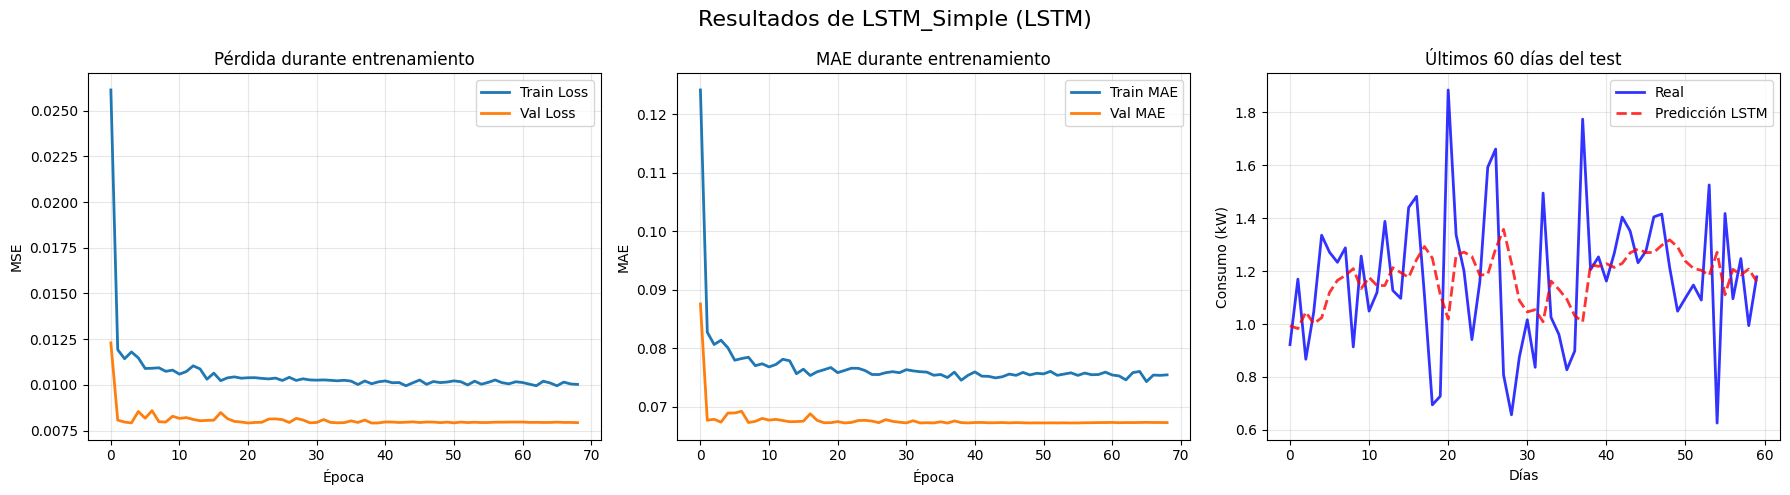


LSTM_Simple - Métricas finales:
  Test RMSE: 0.2278
  Test MAE:  0.1719
  Test MAPE: 20.38%
  Test R²:   0.4479
🏃 View run LSTM_Simple_lag30_ahead1_20250514_161001 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/16/runs/0c98f07474d942c790fc797dcd22894a
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/16

3.2 Entrenando LSTM_Stacked...
    Parámetros totales: 32263


Epoch 1/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0417 - mae: 0.1629 - val_loss: 0.0082 - val_mae: 0.0688 - learning_rate: 0.0010
Epoch 2/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0135 - mae: 0.0914 - val_loss: 0.0085 - val_mae: 0.0691 - learning_rate: 0.0010
Epoch 3/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0129 - mae: 0.0844 - val_loss: 0.0086 - val_mae: 0.0691 - learning_rate: 0.0010
Epoch 4/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0122 - mae: 0.0824 - val_loss: 0.0082 - val_mae: 0.0679 - learning_rate: 0.0010
Epoch 5/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0122 - mae: 0.0845 - val_loss: 0.0084 - val_mae: 0.0681 - learning_rate: 0.0010
Epoch 6/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0122 - mae: 0.0829 - val_loss: 0.0081 - val_mae: 0.0677 - learning_rate: 0.0010
Epoch 7/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0120 - mae: 0.0818 - val_loss: 0.0081 - val_mae: 0.0676 - learning_rate: 0.0010
Epoch 8/150


2025/05/14 16:20:52 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/05/14 16:20:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


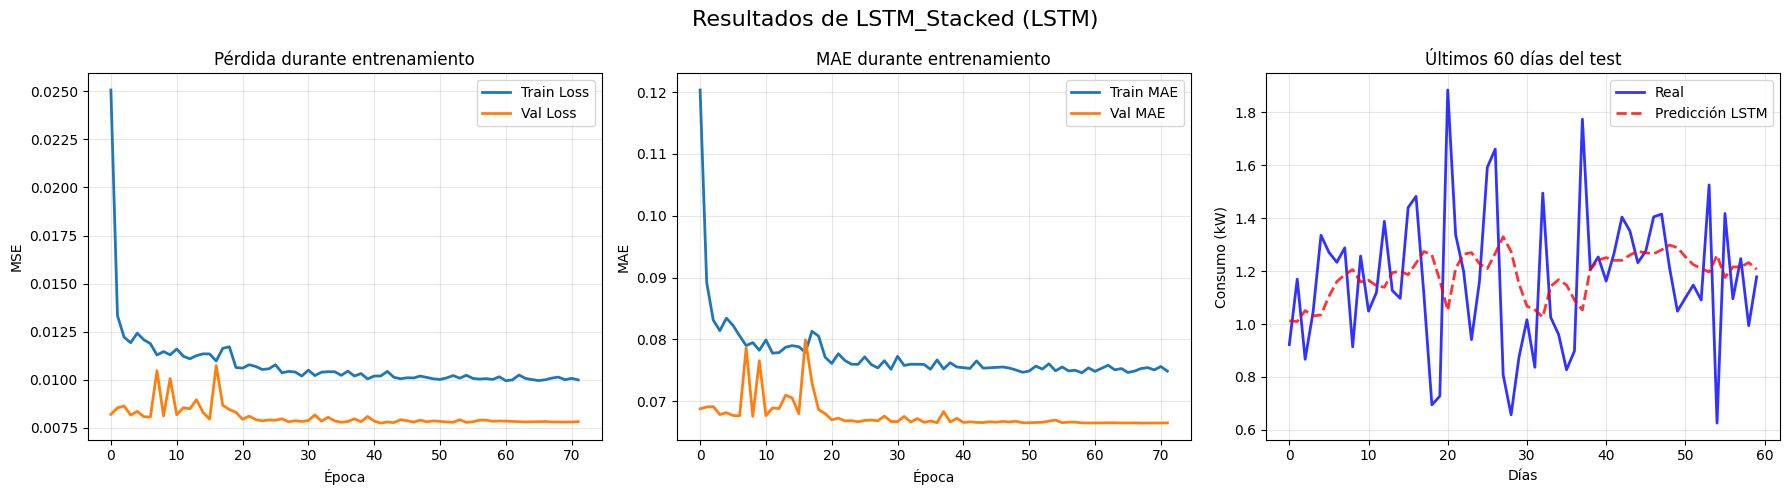


LSTM_Stacked - Métricas finales:
  Test RMSE: 0.2324
  Test MAE:  0.1770
  Test MAPE: 21.29%
  Test R²:   0.4254
🏃 View run LSTM_Stacked_lag30_ahead1_20250514_161519 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/16/runs/6a1b8900db3e4ac3b38256269f86ac50
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/16

3.3 Entrenando LSTM_Bidirectional...
    Parámetros totales: 81537


Epoch 1/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0404 - mae: 0.1516 - val_loss: 0.0770 - val_mae: 0.2612 - learning_rate: 0.0010
Epoch 2/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0171 - mae: 0.1013 - val_loss: 0.0586 - val_mae: 0.2240 - learning_rate: 0.0010
Epoch 3/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0166 - mae: 0.0979 - val_loss: 0.0400 - val_mae: 0.1798 - learning_rate: 0.0010
Epoch 4/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0137 - mae: 0.0901 - val_loss: 0.0250 - val_mae: 0.1353 - learning_rate: 0.0010
Epoch 5/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0142 - mae: 0.0896 - val_loss: 0.0243 - val_mae: 0.1326 - learning_rate: 0.0010
Epoch 6/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0131 - mae: 0.0861 - val_loss: 0.0180 - val_mae: 0.1098 - learning_rate: 0.0010
Epoch 7/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0134 - mae: 0.0866 - val_loss: 0.0147 - val_mae: 0.0969 - learning_rate: 0.0010
Epoch 

2025/05/14 16:27:32 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/05/14 16:27:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


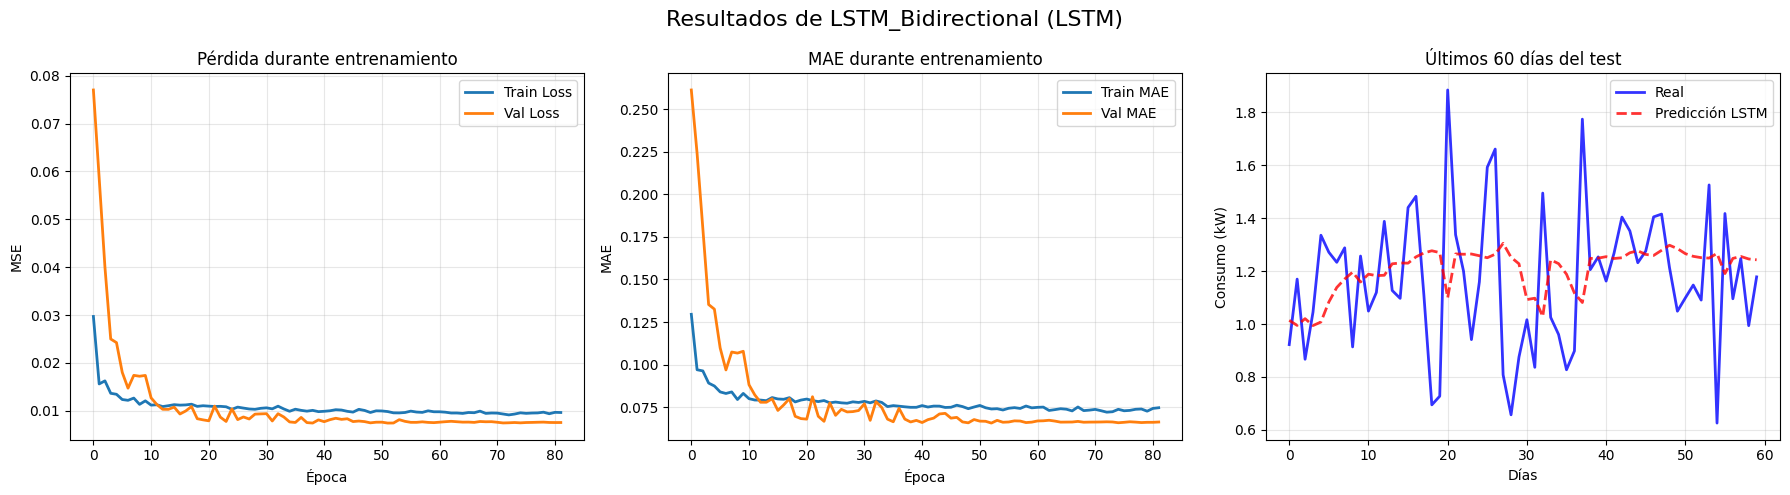


LSTM_Bidirectional - Métricas finales:
  Test RMSE: 0.2340
  Test MAE:  0.1792
  Test MAPE: 20.76%
  Test R²:   0.4175
🏃 View run LSTM_Bidirectional_lag30_ahead1_20250514_162106 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/16/runs/8df4ba0f46584ba8abfdb85432766723
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/16

=== MEJOR MODELO LSTM: LSTM_Bidirectional ===
Val RMSE: 0.2711


In [15]:
lstm_uni = run_lstm_experiment_with_mlflow(df_uni, n_lag=30, n_ahead=1)

1. LSTM Simple

Arquitectura: Input → LSTM(50) → Dense(25) → Output
Características:

Una sola capa LSTM
50 unidades LSTM
Activación tanh (estándar para LSTM)


Ideal para: Patrones temporales básicos, entrenamiento rápido

2. LSTM Stacked (Apilado)

Arquitectura: Input → LSTM(100) → LSTM(50) → Dense(25) → Output
Características:

Dos capas LSTM apiladas
100 y 50 unidades respectivamente
return_sequences=True en la primera capa


Ideal para: Capturar dependencias temporales más complejas

3. LSTM Bidireccional

Arquitectura: Input → Bi-LSTM(64) → Bi-LSTM(32) → Dense(50) → Output
Características:

Dos capas LSTM bidireccionales
Procesa la secuencia en ambas direcciones
Más parámetros pero mejor capacidad de aprendizaje


Ideal para: Capturar contexto completo de la serie temporal

# CONV-LSTM :

### Preparar datos correctamente para CONV-LSTM :

In [ ]:
# Función para crear secuencias para ConvLSTM
def prepare_sequences_for_convlstm(base_data, n_lag, n_ahead=1):
    """
    Crea secuencias con el formato correcto para ConvLSTM
    ConvLSTM espera: (samples, timesteps, rows, cols, channels)
    """
    # Crear secuencias básicas
    def create_sequences(data, n_lag, n_ahead):
        X, y = [], []
        for i in range(len(data) - n_lag - n_ahead + 1):
            X.append(data[i:i + n_lag])
            y.append(data[i + n_lag:i + n_lag + n_ahead])
        return np.array(X), np.array(y)

    X_train, y_train = create_sequences(base_data['train_scaled'], n_lag, n_ahead)
    X_val, y_val = create_sequences(base_data['val_scaled'], n_lag, n_ahead)
    X_test, y_test = create_sequences(base_data['test_scaled'], n_lag, n_ahead)

    # Reshape para ConvLSTM: (samples, timesteps, rows, cols, channels)
    # Para series temporales 1D, tratamos cada punto como una imagen 1x1
    X_train = X_train.reshape(X_train.shape[0], n_lag, 1, 1, 1)
    X_val = X_val.reshape(X_val.shape[0], n_lag, 1, 1, 1)
    X_test = X_test.reshape(X_test.shape[0], n_lag, 1, 1, 1)

    if n_ahead == 1:
        y_train = y_train.reshape(-1, 1)
        y_val = y_val.reshape(-1, 1)
        y_test = y_test.reshape(-1, 1)

    print(f"Datos preparados para ConvLSTM:")
    print(f"  Train: X={X_train.shape}, y={y_train.shape}")
    print(f"  Val:   X={X_val.shape}, y={y_val.shape}")
    print(f"  Test:  X={X_test.shape}, y={y_test.shape}")
    print(f"  Formato: (samples, timesteps, rows, cols, channels)")

    return {
        'X_train': X_train, 'y_train': y_train,
        'X_val': X_val, 'y_val': y_val,
        'X_test': X_test, 'y_test': y_test,
        'n_lag': n_lag, 'n_ahead': n_ahead
    }

In [ ]:
# Arquitecturas ConvLSTM

def create_convlstm_architectures(n_lag, n_ahead):
    """
    Crea 3 arquitecturas ConvLSTM para series temporales
    """
    models = []

    # Forma de entrada para ConvLSTM2D
    input_shape = (n_lag, 1, 1, 1)  # (timesteps, rows, cols, channels)

    # Arquitectura 1: ConvLSTM Simple
    model1 = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.ConvLSTM2D(
            filters=32,
            kernel_size=(1, 1),
            activation='tanh',
            return_sequences=False
        ),
        layers.Flatten(),
        layers.Dense(25, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(n_ahead)
    ], name='ConvLSTM_Simple')

    # Arquitectura 2: ConvLSTM con más filtros
    model2 = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.ConvLSTM2D(
            filters=64,
            kernel_size=(1, 1),
            activation='tanh',
            return_sequences=False
        ),
        layers.Flatten(),
        layers.Dense(50, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(25, activation='relu'),
        layers.Dense(n_ahead)
    ], name='ConvLSTM_Medium')

    # Arquitectura 3: ConvLSTM Apilado
    model3 = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.ConvLSTM2D(
            filters=64,
            kernel_size=(1, 1),
            activation='tanh',
            return_sequences=True
        ),
        layers.ConvLSTM2D(
            filters=32,
            kernel_size=(1, 1),
            activation='tanh',
            return_sequences=False
        ),
        layers.Flatten(),
        layers.Dense(50, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(n_ahead)
    ], name='ConvLSTM_Stacked')

    models.extend([model1, model2, model3])

    return models

# Función de entrenamiento simplificada (reutilizando la lógica existente)
def train_and_evaluate_convlstm_with_mlflow(model, data_dict, model_name, n_lag, n_ahead, epochs=150, batch_size=32):
    """
    Entrena y evalúa un modelo ConvLSTM con logging en MLflow
    """
    with mlflow.start_run(run_name=f"{model_name}_lag{n_lag}_ahead{n_ahead}_{datetime.now().strftime('%Y%m%d_%H%M%S')}"):
        # Log parámetros
        mlflow.log_param("model_name", model_name)
        mlflow.log_param("model_type", "ConvLSTM")
        mlflow.log_param("n_lag", n_lag)
        mlflow.log_param("n_ahead", n_ahead)
        mlflow.log_param("epochs", epochs)
        mlflow.log_param("batch_size", batch_size)
        mlflow.log_param("total_params", model.count_params())

        # Compilar modelo
        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=0.001),
            loss='mse',
            metrics=['mae']
        )

        # Callbacks
        early_stopping = keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=30,
            restore_best_weights=True
        )

        reduce_lr = keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=10,
            min_lr=1e-5
        )

        # Entrenar
        history = model.fit(
            data_dict['X_train'], data_dict['y_train'],
            validation_data=(data_dict['X_val'], data_dict['y_val']),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )

        # Log métricas de entrenamiento
        for epoch in range(len(history.history['loss'])):
            mlflow.log_metric("train_loss", history.history['loss'][epoch], step=epoch)
            mlflow.log_metric("val_loss", history.history['val_loss'][epoch], step=epoch)

        # Predicciones
        y_pred_train = model.predict(data_dict['X_train'], verbose=0)
        y_pred_val = model.predict(data_dict['X_val'], verbose=0)
        y_pred_test = model.predict(data_dict['X_test'], verbose=0)

        # Desescalar
        scaler = data_dict['scaler']

        y_train_true = scaler.inverse_transform(data_dict['y_train'])
        y_val_true = scaler.inverse_transform(data_dict['y_val'])
        y_test_true = scaler.inverse_transform(data_dict['y_test'])

        y_train_pred = scaler.inverse_transform(y_pred_train)
        y_val_pred = scaler.inverse_transform(y_pred_val)
        y_test_pred = scaler.inverse_transform(y_pred_test)

        # Calcular métricas (usando las mismas funciones)
        def calculate_metrics(y_true, y_pred):
            rmse = np.sqrt(mean_squared_error(y_true, y_pred))
            mae = mean_absolute_error(y_true, y_pred)
            mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
            r2 = r2_score(y_true, y_pred)
            return {'rmse': rmse, 'mae': mae, 'mape': mape, 'r2': r2}

        metrics = {
            'train': calculate_metrics(y_train_true, y_train_pred),
            'val': calculate_metrics(y_val_true, y_val_pred),
            'test': calculate_metrics(y_test_true, y_test_pred)
        }

        # Log métricas finales
        for dataset in ['train', 'val', 'test']:
            for metric_name, metric_value in metrics[dataset].items():
                mlflow.log_metric(f"{dataset}_{metric_name}", metric_value)

        # Guardar modelo
        mlflow.keras.log_model(model, "model")

        # Crear visualizaciones simples
        create_simple_visualizations(model_name, history, metrics,
                                   {'y_test_true': y_test_true, 'y_test_pred': y_test_pred})

        print(f"\n{model_name} - Métricas finales:")
        print(f"  Test RMSE: {metrics['test']['rmse']:.4f}")
        print(f"  Test MAE:  {metrics['test']['mae']:.4f}")
        print(f"  Test MAPE: {metrics['test']['mape']:.2f}%")
        print(f"  Test R²:   {metrics['test']['r2']:.4f}")

    return model, history, metrics, {
        'y_test_true': y_test_true,
        'y_test_pred': y_test_pred
    }

# Visualizaciones simples
def create_simple_visualizations(model_name, history, metrics, predictions):
    """
    Crea visualizaciones básicas para ConvLSTM
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'Resultados de {model_name} (ConvLSTM)', fontsize=16)

    # 1. Historia del entrenamiento
    axes[0, 0].plot(history.history['loss'], label='Train Loss')
    axes[0, 0].plot(history.history['val_loss'], label='Val Loss')
    axes[0, 0].set_title('Pérdida durante entrenamiento')
    axes[0, 0].set_xlabel('Época')
    axes[0, 0].set_ylabel('MSE')
    axes[0, 0].legend()
    axes[0, 0].grid(True)

    # 2. Métricas comparativas
    metrics_names = ['RMSE', 'MAE', 'MAPE', 'R²']
    test_values = list(metrics['test'].values())

    axes[0, 1].bar(metrics_names, test_values, color='skyblue')
    axes[0, 1].set_title('Métricas de Test')
    axes[0, 1].set_ylabel('Valor')
    axes[0, 1].grid(True, axis='y')

    # 3. Predicciones vs Reales
    n_points = min(100, len(predictions['y_test_true']))
    axes[1, 0].plot(predictions['y_test_true'][-n_points:], label='Real', alpha=0.7)
    axes[1, 0].plot(predictions['y_test_pred'][-n_points:], label='Predicción', alpha=0.7)
    axes[1, 0].set_title(f'Últimos {n_points} días')
    axes[1, 0].set_xlabel('Días')
    axes[1, 0].set_ylabel('Consumo (kW)')
    axes[1, 0].legend()
    axes[1, 0].grid(True)

    # 4. Scatter plot
    axes[1, 1].scatter(predictions['y_test_true'], predictions['y_test_pred'], alpha=0.5)
    min_val = predictions['y_test_true'].min()
    max_val = predictions['y_test_true'].max()
    axes[1, 1].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    axes[1, 1].set_title('Predicciones vs Valores Reales')
    axes[1, 1].set_xlabel('Valores Reales')
    axes[1, 1].set_ylabel('Predicciones')
    axes[1, 1].grid(True)

    plt.tight_layout()
    plot_path = f'{model_name}_results.png'
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    mlflow.log_artifact(plot_path)
    plt.close()

    if os.path.exists(plot_path):
        os.remove(plot_path)

# Función principal simplificada
def run_convlstm_experiment_with_mlflow(df_uni, n_lag=30, n_ahead=1):
    """
    Ejecuta el experimento ConvLSTM con MLflow
    """
    # Configurar MLflow
    dagshub.init(url="https://dagshub.com/PacoTinoco/Proyecto_modelado_TS", mlflow=True)
    MLFLOW_TRACKING_URI = mlflow.get_tracking_uri()
    print(f"MLflow Tracking URI: {MLFLOW_TRACKING_URI}")
    mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
    mlflow.set_experiment(experiment_name="ConvLSTM_univariate")

    print("=== Experimento ConvLSTM para Consumo Eléctrico Diario ===\n")

    # Preparar datos
    print("1. Preparando datos para ConvLSTM...")
    data_dict = prepare_base_data(df_uni, n_lag=n_lag, n_ahead=n_ahead)

    # Crear arquitecturas
    print("\n2. Creando arquitecturas ConvLSTM...")
    models = create_convlstm_architectures(n_lag=n_lag, n_ahead=n_ahead)

    # Entrenar y evaluar cada modelo
    results = {}

    for i, model in enumerate(models):
        model_name = model.name
        print(f"\n3.{i+1} Entrenando {model_name}...")
        print(f"    Parámetros totales: {model.count_params()}")

        # Entrenar con MLflow
        model, history, metrics, predictions = train_and_evaluate_convlstm_with_mlflow(
            model, data_dict, model_name, n_lag, n_ahead, epochs=150, batch_size=32
        )

        # Guardar resultados
        results[model_name] = {
            'model': model,
            'history': history,
            'metrics': metrics,
            'predictions': predictions
        }

    # Encontrar mejor modelo
    best_model = min(results.items(),
                     key=lambda x: x[1]['metrics']['val']['rmse'])

    print(f"\n=== MEJOR MODELO ConvLSTM: {best_model[0]} ===")
    print(f"Val RMSE: {best_model[1]['metrics']['val']['rmse']:.4f}")

    return results

In [ ]:
convlstm_uni = run_convlstm_experiment_with_mlflow(df_uni, n_lag=30, n_ahead=1)

Initialized MLflow to track repo "PacoTinoco/Proyecto_modelado_TS"

Repository PacoTinoco/Proyecto_modelado_TS initialized!

MLflow Tracking URI: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow
=== Experimento ConvLSTM para Consumo Eléctrico Diario ===

1. Preparando datos para ConvLSTM...
Datos preparados para ConvLSTM:
  Train: X=(967, 30, 1, 1, 1), y=(967, 1)
  Val:   X=(183, 30, 1, 1, 1), y=(183, 1)
  Test:  X=(185, 30, 1, 1, 1), y=(185, 1)
  Forma esperada: (samples, timesteps, rows, cols, channels)

2. Creando arquitecturas ConvLSTM...

3.1 Entrenando ConvLSTM_Simple...
    Parámetros totales: 5203
Epoch 1/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 0.0616 - mae: 0.2069 - val_loss: 0.0102 - val_mae: 0.0772 - learning_rate: 0.0010
Epoch 2/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0156 - mae: 0.0926 - val_loss: 0.0086 - val_mae: 0.0696 - learning_rate: 0.0010
Epoch 3/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0143 - mae: 0.0909 - val_loss: 0.0090 - val_mae: 0.0709 - learning_rate: 0.0010
Epoch 4/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0133 - mae: 0

2025/05/14 08:44:25 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/05/14 08:44:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



ConvLSTM_Simple - Métricas finales:
  Test RMSE: 0.2300
  Test MAE:  0.1754
  Test MAPE: 21.27%
  Test R²:   0.4373
🏃 View run ConvLSTM_Simple_lag30_ahead1_20250514_084150 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/17/runs/dca64b1fbabb432e88420c2df186e117
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/17

3.2 Entrenando ConvLSTM_Medium...
    Parámetros totales: 21447
Epoch 1/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - loss: 0.0671 - mae: 0.2162 - val_loss: 0.0120 - val_mae: 0.0858 - learning_rate: 0.0010
Epoch 2/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0158 - mae: 0.0929 - val_loss: 0.0094 - val_mae: 0.0737 - learning_rate: 0.0010
Epoch 3/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0148 - mae: 0.0924 - val_loss: 0.0080 - val_mae: 0.0674 - learning_rate: 0.0010
Epoch 4/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0125 - mae: 0.0837 - val_loss: 0.0096 - val_mae: 0.0743 -

2025/05/14 08:48:10 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/05/14 08:48:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



ConvLSTM_Medium - Métricas finales:
  Test RMSE: 0.2297
  Test MAE:  0.1756
  Test MAPE: 21.15%
  Test R²:   0.4387
🏃 View run ConvLSTM_Medium_lag30_ahead1_20250514_084438 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/17/runs/c47ab29d65ad4395840be0f3aff8dfea
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/17

3.3 Entrenando ConvLSTM_Stacked...
    Parámetros totales: 31013
Epoch 1/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - loss: 0.0322 - mae: 0.1419 - val_loss: 0.0093 - val_mae: 0.0724 - learning_rate: 0.0010
Epoch 2/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0140 - mae: 0.0884 - val_loss: 0.0086 - val_mae: 0.0691 - learning_rate: 0.0010
Epoch 3/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0135 - mae: 0.0870 - val_loss: 0.0082 - val_mae: 0.0688 - learning_rate: 0.0010
Epoch 4/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0122 - mae: 0.0837 - val_loss: 0.0083 - val_mae: 0.0680

2025/05/14 08:52:55 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/05/14 08:53:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



ConvLSTM_Stacked - Métricas finales:
  Test RMSE: 0.2295
  Test MAE:  0.1727
  Test MAPE: 20.34%
  Test R²:   0.4398
🏃 View run ConvLSTM_Stacked_lag30_ahead1_20250514_084822 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/17/runs/1e7b955db8f14ecaaaa74716a406ea4f
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/17

=== MEJOR MODELO ConvLSTM: ConvLSTM_Medium ===
Val RMSE: 0.2731


1. ConvLSTM Simple

Arquitectura: Conv1D → MaxPool → Conv1D → LSTM(50) → Dense
Características:

2 capas CNN para extracción de features
1 capa LSTM para modelado temporal
Arquitectura directa y eficiente


Ideal para: Patrones espacio-temporales básicos

2. ConvLSTM Deep

Arquitectura: DeepCNN → LSTM Apilado → Dense
Características:

CNN más profundo con BatchNorm
2 capas LSTM apiladas
Mayor capacidad de aprendizaje


Ideal para: Patrones complejos que requieren extracción profunda de features

3. ConvLSTM con Atención

Arquitectura: Multi-Scale CNN → BiLSTM → MultiHead Attention → Dense
Características:

CNN con 3 tamaños de kernel diferentes (3, 5, 7)
LSTM bidireccional
Mecanismo de atención multi-cabeza
Arquitectura más sofisticada


Ideal para: Capturar patrones en múltiples escalas temporales con atención selectiva

## Comparación :

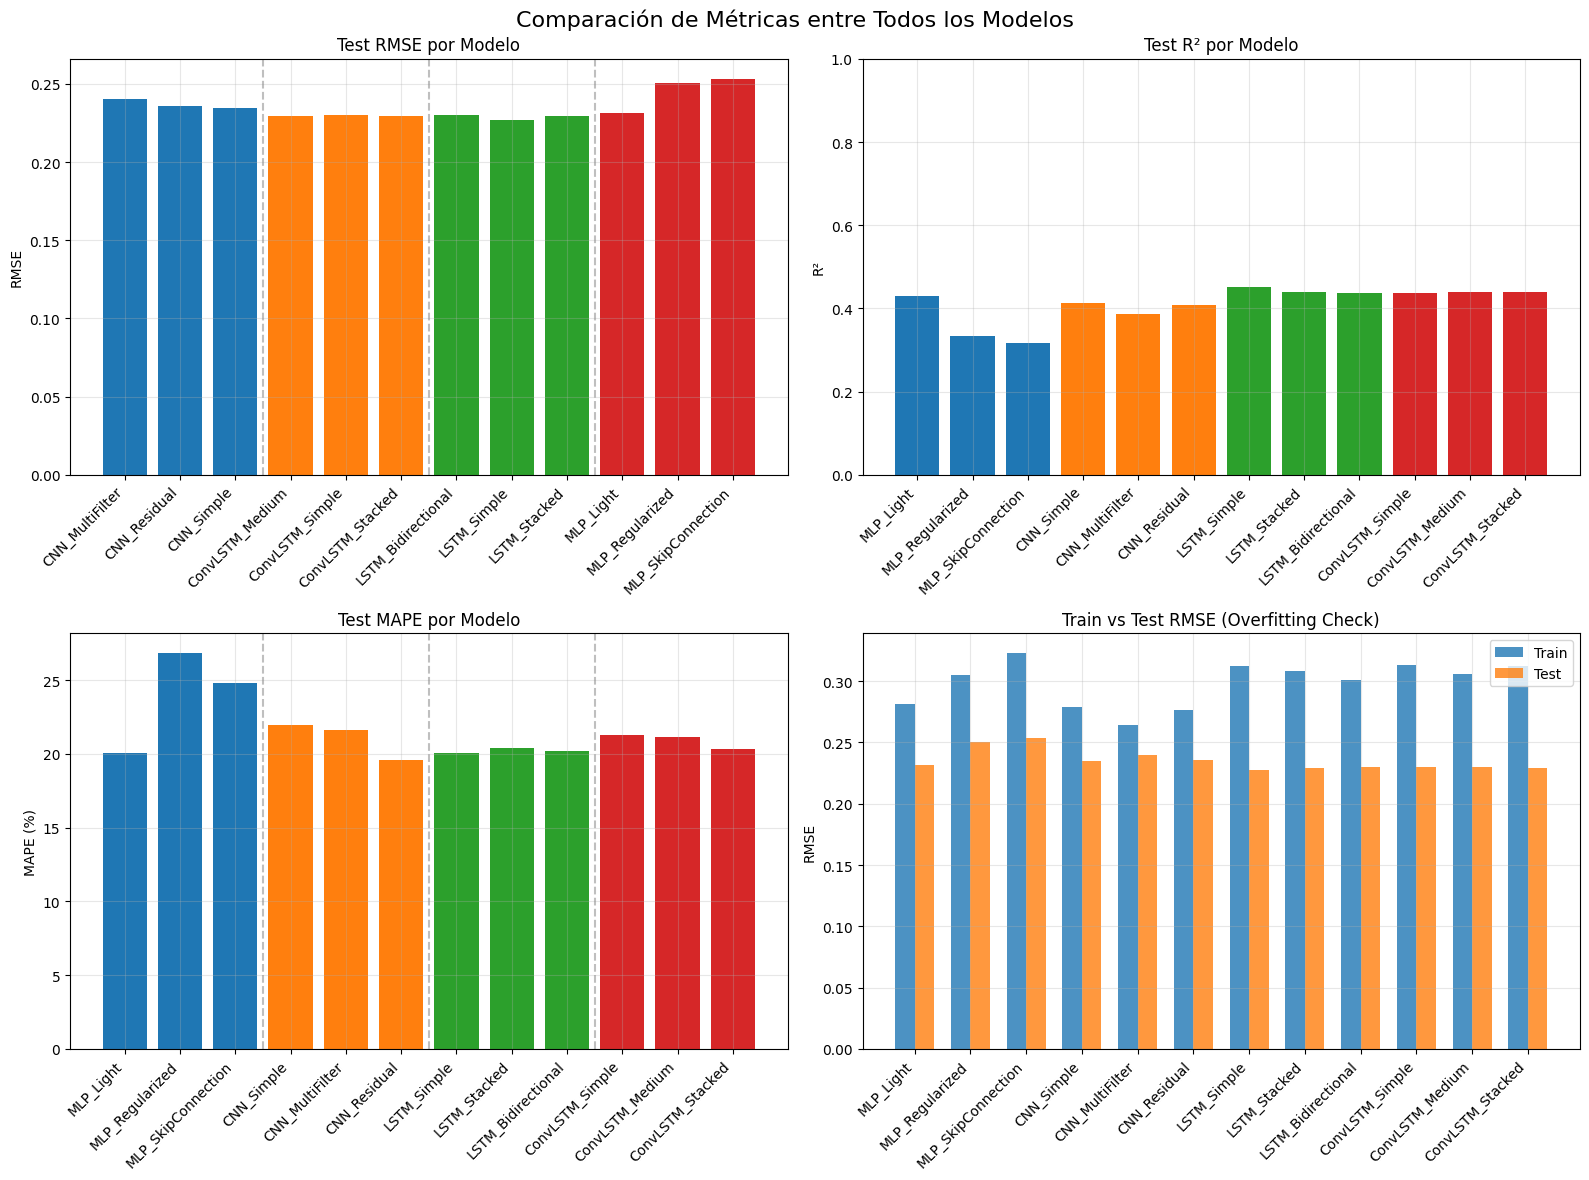


=== TABLA COMPARATIVA DE MÉTRICAS EN TEST ===
Metric                 MAE     MAPE      R2    RMSE
Model_Name                                         
CNN_MultiFilter     0.1839  21.6471  0.3870  0.2400
CNN_Residual        0.1758  19.5900  0.4083  0.2358
CNN_Simple          0.1805  21.9336  0.4140  0.2347
ConvLSTM_Medium     0.1756  21.1496  0.4387  0.2297
ConvLSTM_Simple     0.1754  21.2723  0.4373  0.2300
ConvLSTM_Stacked    0.1727  20.3445  0.4398  0.2295
LSTM_Bidirectional  0.1748  20.1906  0.4366  0.2301
LSTM_Simple         0.1708  20.0828  0.4512  0.2271
LSTM_Stacked        0.1733  20.4303  0.4401  0.2294
MLP_Light           0.1733  20.0501  0.4300  0.2315
MLP_Regularized     0.2028  26.8541  0.3330  0.2504
MLP_SkipConnection  0.1973  24.7886  0.3173  0.2533

=== MEJORES MODELOS POR MÉTRICA ===
Métrica Mejor Modelo Tipo   Valor
   RMSE  LSTM_Simple LSTM  0.2271
    MAE  LSTM_Simple LSTM  0.1708
   MAPE CNN_Residual  CNN 19.5900
     R2  LSTM_Simple LSTM  0.4512

=== RANKING GENER

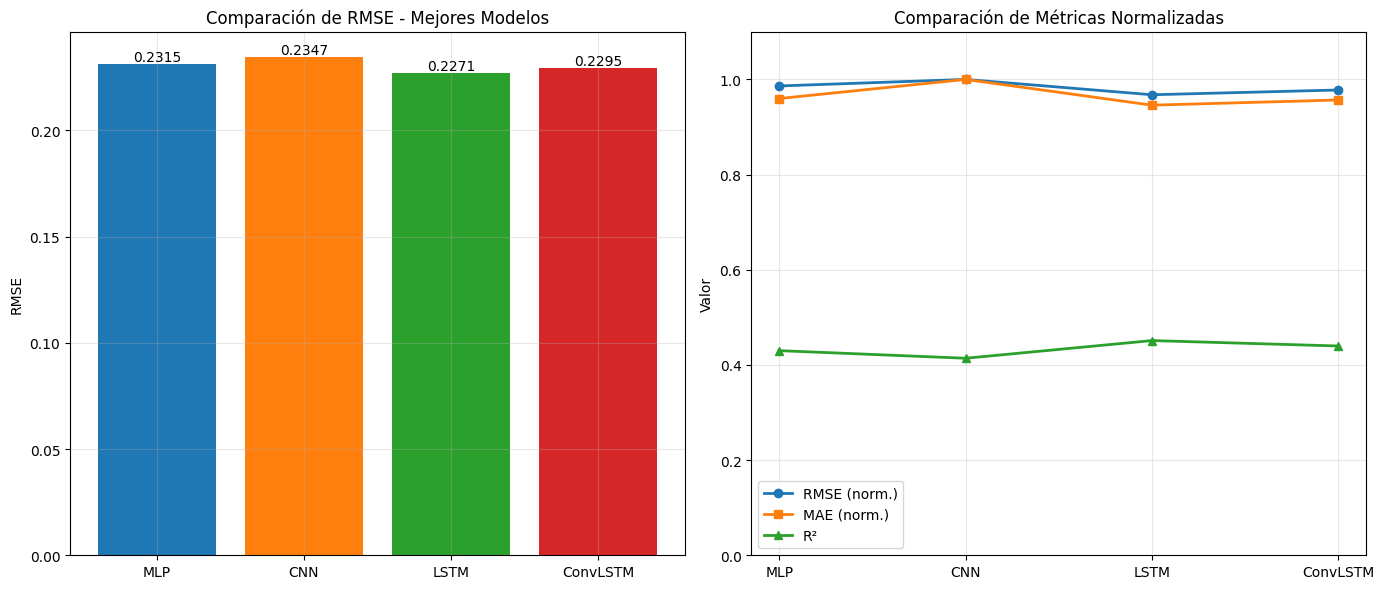


=== COMPARACIÓN DE MEJORES MODELOS ===
  Model Type        Model Name    RMSE     MAE     MAPE      R²
0        MLP         MLP_Light  0.2315  0.1733  20.0501  0.4300
1        CNN        CNN_Simple  0.2347  0.1805  21.9336  0.4140
2       LSTM       LSTM_Simple  0.2271  0.1708  20.0828  0.4512
3   ConvLSTM  ConvLSTM_Stacked  0.2295  0.1727  20.3445  0.4398

🏆 MEJOR MODELO GENERAL: LSTM_Simple (LSTM)
   RMSE: 0.2271
   R²: 0.4512


In [ ]:
import seaborn as sns

def compare_all_models(mlp_results, cnn_results, lstm_results, convlstm_results):
    """
    Compara las métricas de todos los modelos
    """
    # Crear lista para almacenar todas las métricas
    all_metrics = []

    # Función auxiliar para extraer métricas
    def extract_metrics(results, model_type):
        for model_name, model_data in results.items():
            metrics = model_data['metrics']
            for dataset in ['train', 'val', 'test']:
                for metric_name, metric_value in metrics[dataset].items():
                    all_metrics.append({
                        'Model_Type': model_type,
                        'Model_Name': model_name,
                        'Dataset': dataset,
                        'Metric': metric_name.upper(),
                        'Value': metric_value
                    })

    # Extraer métricas de cada tipo de modelo
    extract_metrics(mlp_results, 'MLP')
    extract_metrics(cnn_results, 'CNN')
    extract_metrics(lstm_results, 'LSTM')
    extract_metrics(convlstm_results, 'ConvLSTM')

    # Crear DataFrame
    df_metrics = pd.DataFrame(all_metrics)

    # Crear visualizaciones comparativas
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Comparación de Métricas entre Todos los Modelos', fontsize=16)

    # 1. RMSE por modelo y dataset
    rmse_data = df_metrics[df_metrics['Metric'] == 'RMSE']
    pivot_rmse = rmse_data.pivot_table(index='Model_Name', columns='Dataset', values='Value')

    axes[0, 0].bar(range(len(pivot_rmse)), pivot_rmse['test'],
                   color=['tab:blue']*3 + ['tab:orange']*3 + ['tab:green']*3 + ['tab:red']*3)
    axes[0, 0].set_xticks(range(len(pivot_rmse)))
    axes[0, 0].set_xticklabels(pivot_rmse.index, rotation=45, ha='right')
    axes[0, 0].set_title('Test RMSE por Modelo')
    axes[0, 0].set_ylabel('RMSE')
    axes[0, 0].grid(True, alpha=0.3)

    # Añadir líneas para separar tipos de modelos
    for i in [2.5, 5.5, 8.5]:
        axes[0, 0].axvline(x=i, color='gray', linestyle='--', alpha=0.5)

    # 2. Comparación de R² en test
    r2_test = df_metrics[(df_metrics['Metric'] == 'R2') & (df_metrics['Dataset'] == 'test')]

    axes[0, 1].bar(range(len(r2_test)), r2_test['Value'],
                   color=['tab:blue']*3 + ['tab:orange']*3 + ['tab:green']*3 + ['tab:red']*3)
    axes[0, 1].set_xticks(range(len(r2_test)))
    axes[0, 1].set_xticklabels(r2_test['Model_Name'], rotation=45, ha='right')
    axes[0, 1].set_title('Test R² por Modelo')
    axes[0, 1].set_ylabel('R²')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].set_ylim(0, 1)

    # 3. Comparación de MAPE en test (en lugar del heatmap)
    mape_test = df_metrics[(df_metrics['Metric'] == 'MAPE') & (df_metrics['Dataset'] == 'test')]

    axes[1, 0].bar(range(len(mape_test)), mape_test['Value'],
                   color=['tab:blue']*3 + ['tab:orange']*3 + ['tab:green']*3 + ['tab:red']*3)
    axes[1, 0].set_xticks(range(len(mape_test)))
    axes[1, 0].set_xticklabels(mape_test['Model_Name'], rotation=45, ha='right')
    axes[1, 0].set_title('Test MAPE por Modelo')
    axes[1, 0].set_ylabel('MAPE (%)')
    axes[1, 0].grid(True, alpha=0.3)

    # Añadir líneas separadoras
    for i in [2.5, 5.5, 8.5]:
        axes[1, 0].axvline(x=i, color='gray', linestyle='--', alpha=0.5)

    # 4. Comparación train vs test (overfitting check)
    rmse_comparison = df_metrics[df_metrics['Metric'] == 'RMSE']

    models = rmse_comparison['Model_Name'].unique()
    x = np.arange(len(models))
    width = 0.35

    train_rmse = rmse_comparison[rmse_comparison['Dataset'] == 'train'].set_index('Model_Name')['Value']
    test_rmse = rmse_comparison[rmse_comparison['Dataset'] == 'test'].set_index('Model_Name')['Value']

    axes[1, 1].bar(x - width/2, train_rmse, width, label='Train', alpha=0.8)
    axes[1, 1].bar(x + width/2, test_rmse, width, label='Test', alpha=0.8)
    axes[1, 1].set_xticks(x)
    axes[1, 1].set_xticklabels(models, rotation=45, ha='right')
    axes[1, 1].set_title('Train vs Test RMSE (Overfitting Check)')
    axes[1, 1].set_ylabel('RMSE')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Crear tabla resumen con mejores modelos
    best_models = []

    for metric in ['RMSE', 'MAE', 'MAPE', 'R2']:
        metric_data = df_metrics[(df_metrics['Metric'] == metric.upper()) &
                                (df_metrics['Dataset'] == 'test')]

        if metric == 'R2':
            best = metric_data.loc[metric_data['Value'].idxmax()]
        else:
            best = metric_data.loc[metric_data['Value'].idxmin()]

        best_models.append({
            'Métrica': metric,
            'Mejor Modelo': best['Model_Name'],
            'Tipo': best['Model_Type'],
            'Valor': f"{best['Value']:.4f}"
        })

    best_models_df = pd.DataFrame(best_models)

    # Tabla comparativa completa (datos de prueba para el heatmap que ya no se muestra)
    test_metrics = df_metrics[df_metrics['Dataset'] == 'test']
    pivot_test = test_metrics.pivot_table(index='Model_Name', columns='Metric', values='Value')

    print("\n=== TABLA COMPARATIVA DE MÉTRICAS EN TEST ===")
    print(pivot_test.round(4))

    print("\n=== MEJORES MODELOS POR MÉTRICA ===")
    print(best_models_df.to_string(index=False))

    # Ranking general basado en RMSE
    test_rmse = rmse_comparison[rmse_comparison['Dataset'] == 'test'].set_index('Model_Name')['Value']
    ranking = test_rmse.sort_values().reset_index()
    ranking.columns = ['Modelo', 'RMSE']
    ranking['Ranking'] = range(1, len(ranking) + 1)

    print("\n=== RANKING GENERAL (basado en Test RMSE) ===")
    print(ranking.to_string(index=False))

    return df_metrics, best_models_df, ranking

# Función simplificada para comparación rápida
def quick_comparison(mlp_uni, cnn_uni, lstm_uni, convlstm_uni):
    """
    Comparación rápida de los mejores modelos de cada tipo
    """
    # Encontrar el mejor modelo de cada tipo
    best_mlp = min(mlp_uni.items(), key=lambda x: x[1]['metrics']['test']['rmse'])
    best_cnn = min(cnn_uni.items(), key=lambda x: x[1]['metrics']['test']['rmse'])
    best_lstm = min(lstm_uni.items(), key=lambda x: x[1]['metrics']['test']['rmse'])
    best_convlstm = min(convlstm_uni.items(), key=lambda x: x[1]['metrics']['test']['rmse'])

    # Crear DataFrame comparativo
    comparison_data = []

    for name, model_data, model_type in [
        (best_mlp[0], best_mlp[1], 'MLP'),
        (best_cnn[0], best_cnn[1], 'CNN'),
        (best_lstm[0], best_lstm[1], 'LSTM'),
        (best_convlstm[0], best_convlstm[1], 'ConvLSTM')
    ]:
        metrics = model_data['metrics']['test']
        comparison_data.append({
            'Model Type': model_type,
            'Model Name': name,
            'RMSE': metrics['rmse'],
            'MAE': metrics['mae'],
            'MAPE': metrics['mape'],
            'R²': metrics['r2']
        })

    comparison_df = pd.DataFrame(comparison_data)

    # Visualización simple
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Gráfico de barras para RMSE
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
    bars = ax1.bar(comparison_df['Model Type'], comparison_df['RMSE'], color=colors)
    ax1.set_title('Comparación de RMSE - Mejores Modelos')
    ax1.set_ylabel('RMSE')
    ax1.grid(True, alpha=0.3)

    # Añadir valores en las barras
    for bar, value in zip(bars, comparison_df['RMSE']):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{value:.4f}',
                ha='center', va='bottom')

    # Gráfico de líneas para todas las métricas
    metrics_normalized = comparison_df[['RMSE', 'MAE', 'R²']].copy()

    # Normalizar para mejor visualización
    for col in ['RMSE', 'MAE']:
        metrics_normalized[col] = metrics_normalized[col] / metrics_normalized[col].max()

    x_pos = range(len(comparison_df))
    ax2.plot(x_pos, metrics_normalized['RMSE'], 'o-', label='RMSE (norm.)', linewidth=2)
    ax2.plot(x_pos, metrics_normalized['MAE'], 's-', label='MAE (norm.)', linewidth=2)
    ax2.plot(x_pos, metrics_normalized['R²'], '^-', label='R²', linewidth=2)

    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(comparison_df['Model Type'])
    ax2.set_title('Comparación de Métricas Normalizadas')
    ax2.set_ylabel('Valor')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 1.1)

    plt.tight_layout()
    plt.show()

    print("\n=== COMPARACIÓN DE MEJORES MODELOS ===")
    print(comparison_df.round(4))

    # Determinar el ganador
    winner = comparison_df.loc[comparison_df['RMSE'].idxmin()]
    print(f"\n🏆 MEJOR MODELO GENERAL: {winner['Model Name']} ({winner['Model Type']})")
    print(f"   RMSE: {winner['RMSE']:.4f}")
    print(f"   R²: {winner['R²']:.4f}")

    return comparison_df

# Ejemplo de uso
if __name__ == "__main__":

    # Comparación completa
    df_metrics, best_models, ranking = compare_all_models(
        mlp_uni, cnn_uni, lstm_uni, convlstm_uni
    )

    # Comparación rápida solo de los mejores
    quick_comparison(mlp_uni, cnn_uni, lstm_uni, convlstm_uni)

# OPTUNA :

In [95]:
pip install optuna-integration[tfkeras]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 2.9 MB/s eta 0:00:00


Initialized MLflow to track repo "PacoTinoco/Proyecto_modelado_TS"

Repository PacoTinoco/Proyecto_modelado_TS initialized!

[I 2025-05-14 16:28:22,433] A new study created in memory with name: no-name-256ca596-e7d8-4949-85d5-190b3e0d77d4


Iniciando optimización con 50 pruebas...


  0%|          | 0/50 [00:00<?, ?it/s]

Datos preparados:
  Train: X=(970, 27), y=(970, 1)
  Val:   X=(186, 27), y=(186, 1)
  Test:  X=(188, 27), y=(188, 1)
[I 2025-05-14 16:28:45,023] Trial 0 finished with value: 0.27063218038680387 and parameters: {'n_lag': 27, 'n_units': 100, 'n_dense': 40, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.0002051338263087451, 'batch_size': 64, 'activation': 'relu'}. Best is trial 0 with value: 0.27063218038680387.
Datos preparados:
  Train: X=(989, 8), y=(989, 1)
  Val:   X=(205, 8), y=(205, 1)
  Test:  X=(207, 8), y=(207, 1)
[I 2025-05-14 16:28:50,344] Trial 1 finished with value: 0.27376759541945195 and parameters: {'n_lag': 8, 'n_units': 100, 'n_dense': 45, 'dropout_rate': 0.2, 'learning_rate': 0.0002310201887845295, 'batch_size': 64, 'activation': 'tanh'}. Best is trial 0 with value: 0.27063218038680387.
Datos preparados:
  Train: X=(957, 40), y=(957, 1)
  Val:   X=(173, 40), y=(173, 1)
  Test:  X=(175, 40), y=(175, 1)


[I 2025-05-14 16:29:31,359] Trial 2 finished with value: 0.2731625265552164 and parameters: {'n_lag': 40, 'n_units': 30, 'n_dense': 20, 'dropout_rate': 0.2, 'learning_rate': 0.000816845589476017, 'batch_size': 16, 'activation': 'tanh'}. Best is trial 0 with value: 0.27063218038680387.
Datos preparados:
  Train: X=(958, 39), y=(958, 1)
  Val:   X=(174, 39), y=(174, 1)
  Test:  X=(176, 39), y=(176, 1)


[I 2025-05-14 16:30:04,725] Trial 3 finished with value: 0.264100277662857 and parameters: {'n_lag': 39, 'n_units': 30, 'n_dense': 10, 'dropout_rate': 0.5, 'learning_rate': 0.00853618986286683, 'batch_size': 16, 'activation': 'tanh'}. Best is trial 3 with value: 0.264100277662857.
Datos preparados:
  Train: X=(984, 13), y=(984, 1)
  Val:   X=(200, 13), y=(200, 1)
  Test:  X=(202, 13), y=(202, 1)
[I 2025-05-14 16:30:16,440] Trial 4 finished with value: 0.27304107351524143 and parameters: {'n_lag': 13, 'n_units': 60, 'n_dense': 10, 'dropout_rate': 0.5, 'learning_rate': 0.00032927591344236165, 'batch_size': 16, 'activation': 'tanh'}. Best is trial 3 with value: 0.264100277662857.
Datos preparados:
  Train: X=(938, 59), y=(938, 1)
  Val:   X=(154, 59), y=(154, 1)
  Test:  X=(156, 59), y=(156, 1)
[I 2025-05-14 16:31:03,093] Trial 5 finished with value: 0.2636288484177082 and parameters: {'n_lag': 59, 'n_units': 80, 'n_dense': 50, 'dropout_rate': 0.5, 'learning_rate': 0.0015696396388661157, 

2025/05/14 16:49:24 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/05/14 16:49:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


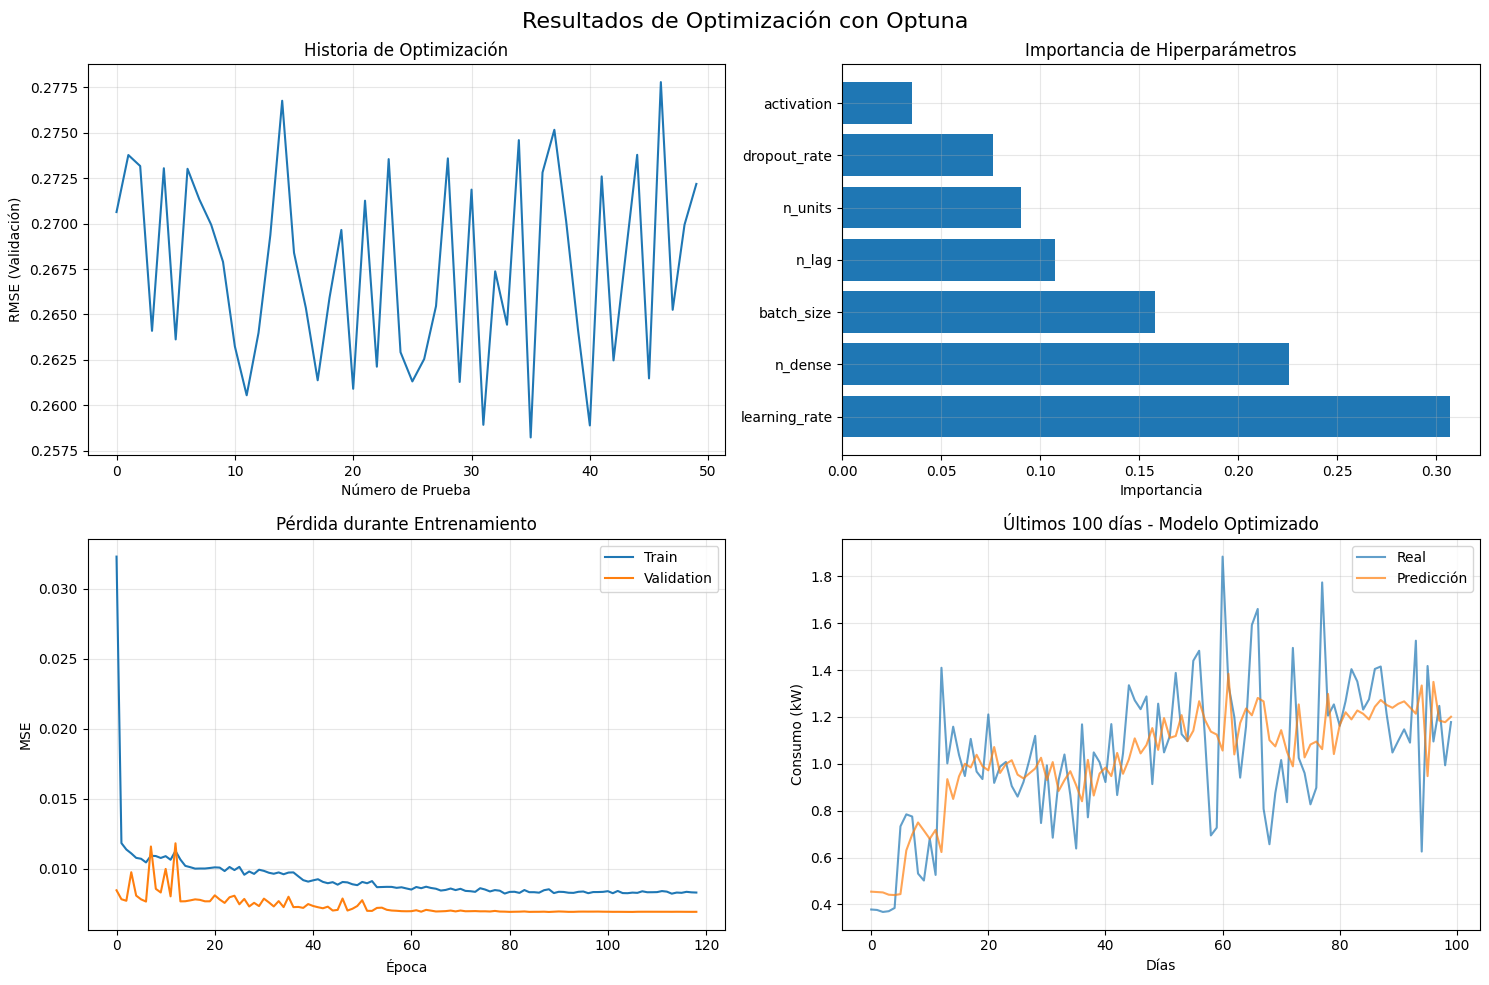

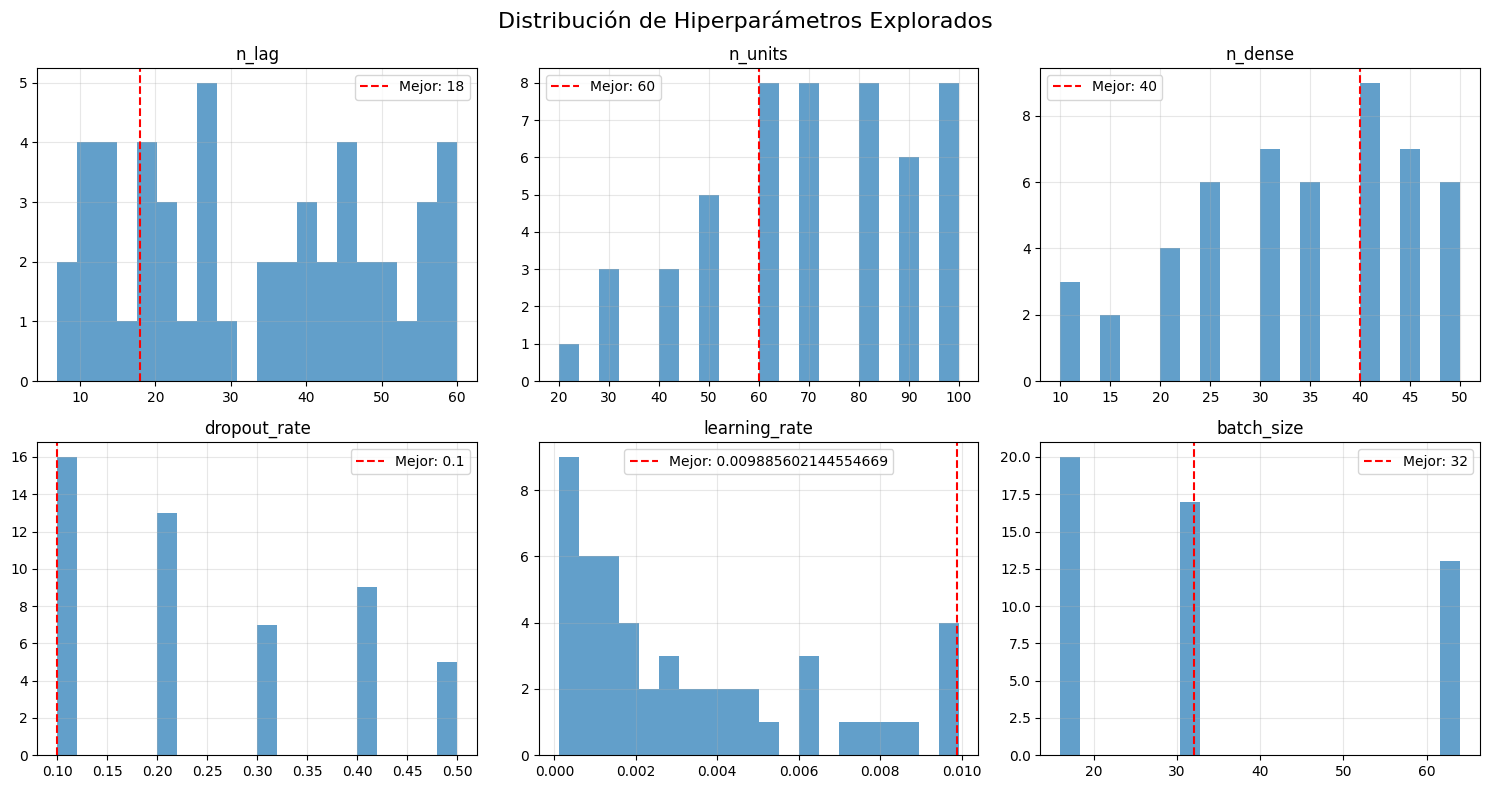

🏃 View run LSTM_Optimized_20250514_164914 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/18/runs/8658bbe441814aaea0a5b2e2e4f3758a
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/18

=== RESULTADOS DE OPTIMIZACIÓN ===
Mejor RMSE en validación: 0.2582
Mejores hiperparámetros:
  n_lag: 18
  n_units: 60
  n_dense: 40
  dropout_rate: 0.1
  learning_rate: 0.009885602144554669
  batch_size: 32
  activation: tanh

Métricas del modelo optimizado:

TRAIN:
  RMSE: 0.2837
  MAE: 0.2185
  MAPE: 24.0846
  R2: 0.5713

VAL:
  RMSE: 0.2609
  MAE: 0.1982
  MAPE: 16.9866
  R2: 0.2239

TEST:
  RMSE: 0.2208
  MAE: 0.1689
  MAPE: 19.2131
  R2: 0.4751

=== COMPARACIÓN CON MODELO ORIGINAL ===
LSTM_Simple original - Test RMSE: 0.2271
LSTM_Optimized - Test RMSE: 0.2208
Mejora: 2.78%


In [17]:
# Función objetivo para Optuna
def objective(trial, df_uni):
    """
    Función objetivo para optimizar hiperparámetros del LSTM
    """
    # Hiperparámetros a optimizar
    n_lag = trial.suggest_int('n_lag', 7, 60, step=1)
    n_units = trial.suggest_int('n_units', 20, 100, step=10)
    n_dense = trial.suggest_int('n_dense', 10, 50, step=5)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5, step=0.1)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])
    activation = trial.suggest_categorical('activation', ['tanh', 'relu'])

    # Preparar datos con n_lag optimizado
    data_dict = prepare_data(df_uni, n_lag=n_lag, n_ahead=1)

    # Crear modelo LSTM con hiperparámetros de prueba
    model = keras.Sequential([
        layers.LSTM(n_units, activation=activation, return_sequences=False,
                   input_shape=(n_lag, 1)),
        layers.Dropout(dropout_rate),
        layers.Dense(n_dense, activation='relu'),
        layers.Dense(1)
    ])

    # Compilar modelo
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )

    # Callbacks
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=20,
        restore_best_weights=True,
        verbose=0
    )

    # Entrenar modelo
    history = model.fit(
        data_dict['X_train'], data_dict['y_train'],
        validation_data=(data_dict['X_val'], data_dict['y_val']),
        epochs=100,
        batch_size=batch_size,
        callbacks=[early_stopping],
        verbose=0
    )

    # Evaluar en validación
    y_pred_val = model.predict(data_dict['X_val'], verbose=0)

    # Desescalar para calcular RMSE real
    scaler = data_dict['scaler']
    y_val_true = scaler.inverse_transform(data_dict['y_val'])
    y_val_pred = scaler.inverse_transform(y_pred_val)

    # Calcular RMSE
    rmse = np.sqrt(mean_squared_error(y_val_true, y_val_pred))

    # Optuna minimiza, así que retornamos RMSE
    return rmse

# Función para entrenar el mejor modelo
def train_best_model(study, df_uni):
    """
    Entrena el modelo final con los mejores hiperparámetros
    """
    # Obtener mejores parámetros
    best_params = study.best_params
    print("\nMejores hiperparámetros encontrados:")
    for key, value in best_params.items():
        print(f"  {key}: {value}")

    # Preparar datos con mejores parámetros
    data_dict = prepare_data(df_uni, n_lag=best_params['n_lag'], n_ahead=1)

    # Crear modelo con mejores parámetros
    model = keras.Sequential([
        layers.LSTM(best_params['n_units'],
                   activation=best_params['activation'],
                   return_sequences=False,
                   input_shape=(best_params['n_lag'], 1)),
        layers.Dropout(best_params['dropout_rate']),
        layers.Dense(best_params['n_dense'], activation='relu'),
        layers.Dense(1)
    ], name='LSTM_Optimized')

    # Compilar
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=best_params['learning_rate']),
        loss='mse',
        metrics=['mae']
    )

    # Callbacks
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=30,
        restore_best_weights=True
    )

    reduce_lr = keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=10,
        min_lr=1e-6
    )

    # Entrenar
    history = model.fit(
        data_dict['X_train'], data_dict['y_train'],
        validation_data=(data_dict['X_val'], data_dict['y_val']),
        epochs=150,
        batch_size=best_params['batch_size'],
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Evaluar en todos los conjuntos
    y_pred_train = model.predict(data_dict['X_train'])
    y_pred_val = model.predict(data_dict['X_val'])
    y_pred_test = model.predict(data_dict['X_test'])

    # Desescalar
    scaler = data_dict['scaler']
    y_train_true = scaler.inverse_transform(data_dict['y_train'])
    y_val_true = scaler.inverse_transform(data_dict['y_val'])
    y_test_true = scaler.inverse_transform(data_dict['y_test'])

    y_train_pred = scaler.inverse_transform(y_pred_train)
    y_val_pred = scaler.inverse_transform(y_pred_val)
    y_test_pred = scaler.inverse_transform(y_pred_test)

    # Calcular métricas
    def calculate_metrics(y_true, y_pred):
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mae = mean_absolute_error(y_true, y_pred)
        mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        from sklearn.metrics import r2_score
        r2 = r2_score(y_true, y_pred)
        return {'rmse': rmse, 'mae': mae, 'mape': mape, 'r2': r2}

    metrics = {
        'train': calculate_metrics(y_train_true, y_train_pred),
        'val': calculate_metrics(y_val_true, y_val_pred),
        'test': calculate_metrics(y_test_true, y_test_pred)
    }

    return model, history, metrics, data_dict, best_params

# Función principal de optimización
def optimize_lstm_with_optuna(df_uni, n_trials=50):
    """
    Optimiza hiperparámetros del LSTM usando Optuna
    """
    # Configurar MLflow
    dagshub.init(url="https://dagshub.com/PacoTinoco/Proyecto_modelado_TS", mlflow=True)
    mlflow.set_tracking_uri(mlflow.get_tracking_uri())
    mlflow.set_experiment("LSTM_Optuna_Optimization")

    # Crear estudio de Optuna
    study = optuna.create_study(
        direction='minimize',
        sampler=optuna.samplers.TPESampler(seed=42),
        pruner=optuna.pruners.MedianPruner()
    )

    # Optimizar
    print(f"Iniciando optimización con {n_trials} pruebas...")
    study.optimize(
        lambda trial: objective(trial, df_uni),
        n_trials=n_trials,
        show_progress_bar=True
    )

    # Entrenar mejor modelo
    print("\nEntrenando modelo con mejores hiperparámetros...")
    model, history, metrics, data_dict, best_params = train_best_model(study, df_uni)

    # Log en MLflow
    with mlflow.start_run(run_name=f"LSTM_Optimized_{datetime.now().strftime('%Y%m%d_%H%M%S')}"):
        # Log mejores parámetros
        for key, value in best_params.items():
            mlflow.log_param(f"best_{key}", value)

        # Log métricas
        for dataset in ['train', 'val', 'test']:
            for metric_name, metric_value in metrics[dataset].items():
                mlflow.log_metric(f"{dataset}_{metric_name}", metric_value)

        # Log modelo
        mlflow.keras.log_model(model, "model")

        # Crear visualizaciones
        create_optimization_plots(study, history, metrics,
                                data_dict['y_test'],
                                model.predict(data_dict['X_test']),
                                data_dict['scaler'])

    # Imprimir resultados finales
    print("\n=== RESULTADOS DE OPTIMIZACIÓN ===")
    print(f"Mejor RMSE en validación: {study.best_value:.4f}")
    print(f"Mejores hiperparámetros:")
    for key, value in best_params.items():
        print(f"  {key}: {value}")

    print("\nMétricas del modelo optimizado:")
    for dataset in ['train', 'val', 'test']:
        print(f"\n{dataset.upper()}:")
        for metric, value in metrics[dataset].items():
            print(f"  {metric.upper()}: {value:.4f}")

    return model, study, metrics

# Función para visualizaciones
def create_optimization_plots(study, history, metrics, y_test_true, y_test_pred_scaled, scaler):
    """
    Crea visualizaciones del proceso de optimización
    """
    # Desescalar predicciones
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)
    y_test_true = scaler.inverse_transform(y_test_true)

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Resultados de Optimización con Optuna', fontsize=16)

    # 1. Historia de optimización
    axes[0, 0].plot(study.trials_dataframe()['value'])
    axes[0, 0].set_title('Historia de Optimización')
    axes[0, 0].set_xlabel('Número de Prueba')
    axes[0, 0].set_ylabel('RMSE (Validación)')
    axes[0, 0].grid(True, alpha=0.3)

    # 2. Importancia de parámetros
    importances = optuna.importance.get_param_importances(study)
    params = list(importances.keys())
    values = list(importances.values())

    axes[0, 1].barh(params, values)
    axes[0, 1].set_title('Importancia de Hiperparámetros')
    axes[0, 1].set_xlabel('Importancia')
    axes[0, 1].grid(True, alpha=0.3)

    # 3. Pérdida durante entrenamiento
    axes[1, 0].plot(history.history['loss'], label='Train')
    axes[1, 0].plot(history.history['val_loss'], label='Validation')
    axes[1, 0].set_title('Pérdida durante Entrenamiento')
    axes[1, 0].set_xlabel('Época')
    axes[1, 0].set_ylabel('MSE')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # 4. Predicciones vs Reales
    n_points = 100
    axes[1, 1].plot(y_test_true[-n_points:], label='Real', alpha=0.7)
    axes[1, 1].plot(y_test_pred[-n_points:], label='Predicción', alpha=0.7)
    axes[1, 1].set_title(f'Últimos {n_points} días - Modelo Optimizado')
    axes[1, 1].set_xlabel('Días')
    axes[1, 1].set_ylabel('Consumo (kW)')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('lstm_optuna_optimization.png', dpi=300, bbox_inches='tight')
    mlflow.log_artifact('lstm_optuna_optimization.png')
    plt.show()

    # Gráfico adicional de distribución de hiperparámetros
    fig2, axes2 = plt.subplots(2, 3, figsize=(15, 8))
    fig2.suptitle('Distribución de Hiperparámetros Explorados', fontsize=16)

    params_to_plot = ['n_lag', 'n_units', 'n_dense', 'dropout_rate', 'learning_rate', 'batch_size']
    for i, param in enumerate(params_to_plot):
        ax = axes2[i // 3, i % 3]
        values = [trial.params[param] for trial in study.trials if param in trial.params]
        ax.hist(values, bins=20, alpha=0.7)
        ax.axvline(study.best_params[param], color='red', linestyle='--',
                  label=f'Mejor: {study.best_params[param]}')
        ax.set_title(param)
        ax.legend()
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('lstm_hyperparameter_distribution.png', dpi=300, bbox_inches='tight')
    mlflow.log_artifact('lstm_hyperparameter_distribution.png')
    plt.show()

# Ejecutar optimización
if __name__ == "__main__":
    # Ejecutar con 50 pruebas
    model_optimized, study, metrics = optimize_lstm_with_optuna(df_uni, n_trials=50)

    # Comparar con el modelo original
    print("\n=== COMPARACIÓN CON MODELO ORIGINAL ===")
    print("LSTM_Simple original - Test RMSE: 0.2271")
    print(f"LSTM_Optimized - Test RMSE: {metrics['test']['rmse']:.4f}")
    print(f"Mejora: {((0.2271 - metrics['test']['rmse']) / 0.2271 * 100):.2f}%")

### Preparar datos PARA OPTUNA una sola vez :

In [96]:
def prepare_base_data(df_uni):
    """
    Prepara datos base una sola vez antes de Optuna
    """
    data = df_uni['Global_active_power'].values

    # División temporal
    n = len(data)
    train_size = int(n * 0.7)
    val_size = int(n * 0.15)

    train_data = data[:train_size]
    val_data = data[train_size:train_size + val_size]
    test_data = data[train_size + val_size:]

    # Escalar una sola vez
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train_data.reshape(-1, 1)).flatten()
    val_scaled = scaler.transform(val_data.reshape(-1, 1)).flatten()
    test_scaled = scaler.transform(test_data.reshape(-1, 1)).flatten()

    return {
        'train_scaled': train_scaled,
        'val_scaled': val_scaled,
        'test_scaled': test_scaled,
        'scaler': scaler
    }

#  Función simplificada para crear secuencias
def prepare_sequences_for_optuna(base_data, n_lag, n_ahead=1):
    """
    Solo crea secuencias con n_lag variable para Optuna
    """
    def create_sequences(data, n_lag, n_ahead):
        X, y = [], []
        for i in range(len(data) - n_lag - n_ahead + 1):
            X.append(data[i:i + n_lag])
            y.append(data[i + n_lag:i + n_lag + n_ahead])
        return np.array(X), np.array(y)

    # Crear secuencias con el n_lag actual
    X_train, y_train = create_sequences(base_data['train_scaled'], n_lag, n_ahead)
    X_val, y_val = create_sequences(base_data['val_scaled'], n_lag, n_ahead)
    X_test, y_test = create_sequences(base_data['test_scaled'], n_lag, n_ahead)

    # Reshape para LSTM
    X_train = X_train.reshape(X_train.shape[0], n_lag, 1)
    X_val = X_val.reshape(X_val.shape[0], n_lag, 1)
    X_test = X_test.reshape(X_test.shape[0], n_lag, 1)

    if n_ahead == 1:
        y_train = y_train.reshape(-1, 1)
        y_val = y_val.reshape(-1, 1)
        y_test = y_test.reshape(-1, 1)

    return {
        'X_train': X_train, 'y_train': y_train,
        'X_val': X_val, 'y_val': y_val,
        'X_test': X_test, 'y_test': y_test
    }

In [97]:
# 3. Función objetivo mejorada para Optuna
def objective_improved(trial, base_data):
    """
    Función objetivo mejorada con espacio de búsqueda más amplio
    """
    # Expandir rangos de hiperparámetros
    n_lag = trial.suggest_int('n_lag', 15, 90, step=5)
    n_units_1 = trial.suggest_int('n_units_1', 30, 150, step=10)
    n_units_2 = trial.suggest_int('n_units_2', 20, 100, step=10)
    n_dense = trial.suggest_int('n_dense', 15, 75, step=5)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.4, step=0.05)
    learning_rate = trial.suggest_float('learning_rate', 5e-5, 5e-3, log=True)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64, 128])
    activation = trial.suggest_categorical('activation', ['tanh', 'relu', 'sigmoid'])
    optimizer_name = trial.suggest_categorical('optimizer', ['adam', 'rmsprop', 'adamw'])
    use_batch_norm = trial.suggest_categorical('use_batch_norm', [True, False])
    n_lstm_layers = trial.suggest_int('n_lstm_layers', 1, 3)

    # Preparar datos
    data_dict = prepare_sequences_for_optuna(base_data, n_lag)

    # Crear modelo con arquitectura variable
    model = keras.Sequential()

    # Primera capa LSTM
    if n_lstm_layers == 1:
        model.add(layers.LSTM(n_units_1, activation=activation,
                            return_sequences=False,
                            input_shape=(n_lag, 1)))
    else:
        model.add(layers.LSTM(n_units_1, activation=activation,
                            return_sequences=True,
                            input_shape=(n_lag, 1)))

        # Capas LSTM adicionales
        for i in range(1, n_lstm_layers):
            return_seq = (i < n_lstm_layers - 1)
            units = n_units_2 if i == 1 else max(n_units_2 // (i + 1), 20)
            model.add(layers.LSTM(units, activation=activation,
                                return_sequences=return_seq))
            if i < n_lstm_layers - 1:
                model.add(layers.Dropout(dropout_rate * 0.5))

    model.add(layers.Dropout(dropout_rate))

    if use_batch_norm:
        model.add(layers.BatchNormalization())

    model.add(layers.Dense(n_dense, activation='relu'))
    model.add(layers.Dense(1))

    # Seleccionar optimizador
    if optimizer_name == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_name == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:  # adamw
        optimizer = keras.optimizers.AdamW(learning_rate=learning_rate)

    # Compilar modelo
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    # Callbacks mejorados
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=25,
        restore_best_weights=True,
        verbose=0
    )

    reduce_lr = keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.7,
        patience=10,
        min_lr=1e-6,
        verbose=0
    )

    # Entrenar
    history = model.fit(
        data_dict['X_train'], data_dict['y_train'],
        validation_data=(data_dict['X_val'], data_dict['y_val']),
        epochs=150,
        batch_size=batch_size,
        callbacks=[early_stopping, reduce_lr],
        verbose=0
    )

    # Evaluar
    y_pred_val = model.predict(data_dict['X_val'], verbose=0)

    # Desescalar
    scaler = base_data['scaler']
    y_val_true = scaler.inverse_transform(data_dict['y_val'])
    y_val_pred = scaler.inverse_transform(y_pred_val)

    # RMSE
    rmse = np.sqrt(mean_squared_error(y_val_true, y_val_pred))

    return rmse

# 4. Crear modelo optimizado
def create_optimized_model(params, input_shape):
    """
    Crea modelo con los parámetros optimizados
    """
    model = keras.Sequential()

    # Primera capa LSTM
    if params['n_lstm_layers'] == 1:
        model.add(layers.LSTM(params['n_units_1'],
                            activation=params['activation'],
                            return_sequences=False,
                            input_shape=input_shape))
    else:
        model.add(layers.LSTM(params['n_units_1'],
                            activation=params['activation'],
                            return_sequences=True,
                            input_shape=input_shape))

        # Capas adicionales
        for i in range(1, params['n_lstm_layers']):
            return_seq = (i < params['n_lstm_layers'] - 1)
            units = params['n_units_2'] if i == 1 else max(params['n_units_2'] // (i + 1), 20)
            model.add(layers.LSTM(units,
                                activation=params['activation'],
                                return_sequences=return_seq))
            if i < params['n_lstm_layers'] - 1:
                model.add(layers.Dropout(params['dropout_rate'] * 0.5))

    model.add(layers.Dropout(params['dropout_rate']))

    if params['use_batch_norm']:
        model.add(layers.BatchNormalization())

    model.add(layers.Dense(params['n_dense'], activation='relu'))
    model.add(layers.Dense(1))

    return model

# 5. Entrenar modelo final
def train_final_model(best_params, base_data, df_uni):
    """
    Entrena el modelo final con los mejores parámetros
    """
    print("\n=== Entrenando modelo final con mejores parámetros ===")

    # Preparar datos
    data_dict = prepare_sequences_for_optuna(base_data, best_params['n_lag'])

    # Crear modelo
    model = create_optimized_model(best_params, (best_params['n_lag'], 1))

    # Seleccionar optimizador
    if best_params['optimizer'] == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=best_params['learning_rate'])
    elif best_params['optimizer'] == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=best_params['learning_rate'])
    else:
        optimizer = keras.optimizers.AdamW(learning_rate=best_params['learning_rate'])

    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    # Callbacks
    callbacks = [
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=40,
            restore_best_weights=True
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.7,
            patience=15,
            min_lr=1e-7
        ),
        keras.callbacks.ModelCheckpoint(
            'best_lstm_optuna.h5',
            monitor='val_loss',
            save_best_only=True
        )
    ]

    # Entrenar
    history = model.fit(
        data_dict['X_train'], data_dict['y_train'],
        validation_data=(data_dict['X_val'], data_dict['y_val']),
        epochs=300,
        batch_size=best_params['batch_size'],
        callbacks=callbacks,
        verbose=1
    )

    # Cargar mejor modelo
    model = keras.models.load_model('best_lstm_optuna.h5')

    # Evaluar en todos los conjuntos
    y_pred_train = model.predict(data_dict['X_train'])
    y_pred_val = model.predict(data_dict['X_val'])
    y_pred_test = model.predict(data_dict['X_test'])

    # Desescalar
    scaler = base_data['scaler']

    y_train_true = scaler.inverse_transform(data_dict['y_train'])
    y_val_true = scaler.inverse_transform(data_dict['y_val'])
    y_test_true = scaler.inverse_transform(data_dict['y_test'])

    y_train_pred = scaler.inverse_transform(y_pred_train)
    y_val_pred = scaler.inverse_transform(y_pred_val)
    y_test_pred = scaler.inverse_transform(y_pred_test)

    # Calcular métricas
    def calculate_metrics(y_true, y_pred):
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mae = mean_absolute_error(y_true, y_pred)
        mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        r2 = r2_score(y_true, y_pred)
        return {'rmse': rmse, 'mae': mae, 'mape': mape, 'r2': r2}

    metrics = {
        'train': calculate_metrics(y_train_true, y_train_pred),
        'val': calculate_metrics(y_val_true, y_val_pred),
        'test': calculate_metrics(y_test_true, y_test_pred)
    }

    return model, history, metrics, {
        'y_test_true': y_test_true,
        'y_test_pred': y_test_pred
    }

# 6. Función de visualización
def create_optimization_visualizations(study, model, history, metrics, predictions):
    """
    Crea visualizaciones del proceso de optimización
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Resultados de Optimización LSTM con Optuna', fontsize=16)

    # 1. Historia de optimización
    axes[0, 0].plot(study.trials_dataframe()['value'])
    axes[0, 0].set_title('Historia de Optimización')
    axes[0, 0].set_xlabel('Número de Trial')
    axes[0, 0].set_ylabel('RMSE (Validación)')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].axhline(y=study.best_value, color='red', linestyle='--',
                      label=f'Mejor: {study.best_value:.4f}')
    axes[0, 0].legend()

    # 2. Importancia de parámetros
    if len(study.trials) > 20:  # Solo si hay suficientes trials
        importances = optuna.importance.get_param_importances(study)
        params = list(importances.keys())[:8]  # Top 8 parámetros
        values = list(importances.values())[:8]

        axes[0, 1].barh(params, values)
        axes[0, 1].set_title('Importancia de Hiperparámetros')
        axes[0, 1].set_xlabel('Importancia')
        axes[0, 1].grid(True, alpha=0.3)

    # 3. Pérdida durante entrenamiento
    axes[1, 0].plot(history.history['loss'], label='Train', alpha=0.7)
    axes[1, 0].plot(history.history['val_loss'], label='Validation', alpha=0.7)
    axes[1, 0].set_title('Pérdida durante Entrenamiento')
    axes[1, 0].set_xlabel('Época')
    axes[1, 0].set_ylabel('MSE')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].set_yscale('log')

    # 4. Predicciones vs Reales
    n_points = 100
    axes[1, 1].plot(predictions['y_test_true'][-n_points:],
                   label='Real', alpha=0.8, linewidth=2)
    axes[1, 1].plot(predictions['y_test_pred'][-n_points:],
                   label='Predicción', alpha=0.8, linewidth=2, linestyle='--')
    axes[1, 1].set_title(f'Últimos {n_points} días - Modelo Optimizado')
    axes[1, 1].set_xlabel('Días')
    axes[1, 1].set_ylabel('Consumo (kW)')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('lstm_optuna_results.png', dpi=300, bbox_inches='tight')
    plt.show()

# 7. Función principal de optimización
def optimize_lstm_with_optuna(df_uni, n_trials=100):
    """
    Optimización completa del LSTM con Optuna
    """
    # Configurar MLflow
    dagshub.init(url="https://dagshub.com/PacoTinoco/Proyecto_modelado_TS", mlflow=True)
    mlflow.set_tracking_uri(mlflow.get_tracking_uri())
    mlflow.set_experiment("LSTM_Optuna_Advanced")

    # Preparar datos base
    print("Preparando datos base...")
    base_data = prepare_base_data(df_uni)

    # Crear estudio con configuración mejorada
    study = optuna.create_study(
        direction='minimize',
        sampler=optuna.samplers.TPESampler(
            seed=42,
            n_startup_trials=20,
            n_ei_candidates=50
        ),
        pruner=optuna.pruners.MedianPruner(
            n_startup_trials=10,
            n_warmup_steps=20
        )
    )

    # Callback para monitorear progreso
    def callback(study, trial):
        if study.best_trial == trial:
            print(f"\n¡Nuevo mejor valor! Trial {trial.number}: {trial.value:.6f}")

    # Optimizar
    print(f"\nIniciando optimización con {n_trials} trials...")
    study.optimize(
        lambda trial: objective_improved(trial, base_data),
        n_trials=n_trials,
        callbacks=[callback],
        show_progress_bar=True
    )

    # Obtener mejores parámetros
    best_params = study.best_params
    print("\n=== Mejores hiperparámetros encontrados ===")
    for key, value in best_params.items():
        print(f"{key}: {value}")

    # Entrenar modelo final
    model, history, metrics, predictions = train_final_model(best_params, base_data, df_uni)

    # Log en MLflow
    with mlflow.start_run(run_name=f"LSTM_Optuna_Final_{datetime.now().strftime('%Y%m%d_%H%M%S')}"):
        # Log parámetros
        for key, value in best_params.items():
            mlflow.log_param(f"best_{key}", value)

        # Log métricas
        for dataset in ['train', 'val', 'test']:
            for metric_name, metric_value in metrics[dataset].items():
                mlflow.log_metric(f"{dataset}_{metric_name}", metric_value)

        # Log modelo
        mlflow.keras.log_model(model, "model")

        # Guardar visualizaciones
        create_optimization_visualizations(study, model, history, metrics, predictions)
        mlflow.log_artifact('lstm_optuna_results.png')

    # Imprimir resultados finales
    print("\n=== RESULTADOS FINALES ===")
    print(f"Mejor RMSE en validación (Optuna): {study.best_value:.4f}")
    print("\nMétricas del modelo final:")
    for dataset in ['train', 'val', 'test']:
        print(f"\n{dataset.upper()}:")
        for metric, value in metrics[dataset].items():
            print(f"  {metric.upper()}: {value:.4f}")

    # Comparación con modelo original
    print("\n=== COMPARACIÓN CON MODELO ORIGINAL ===")
    print("LSTM_Simple original - Test RMSE: 0.2271")
    print(f"LSTM_Optimized - Test RMSE: {metrics['test']['rmse']:.4f}")
    print(f"Mejora: {((0.2271 - metrics['test']['rmse']) / 0.2271 * 100):.2f}%")

    return model, study, metrics

In [44]:
model_optimized, study, metrics = optimize_lstm_with_optuna(df_uni, n_trials=100)

Initialized MLflow to track repo "PacoTinoco/Proyecto_modelado_TS"

Repository PacoTinoco/Proyecto_modelado_TS initialized!

2025/05/14 17:37:46 INFO mlflow.tracking.fluent: Experiment with name 'LSTM_Optuna_Advanced' does not exist. Creating a new experiment.
[I 2025-05-14 17:37:46,260] A new study created in memory with name: no-name-1b22c372-5ee5-4b3b-9cef-e8c5749a1bf8


Preparando datos base...

Iniciando optimización con 100 trials...


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-05-14 17:38:27,971] Trial 0 finished with value: 0.2821173160932455 and parameters: {'n_lag': 40, 'n_units_1': 150, 'n_units_2': 80, 'n_dense': 50, 'dropout_rate': 0.15000000000000002, 'learning_rate': 0.00010255552094216992, 'batch_size': 32, 'activation': 'relu', 'optimizer': 'adam', 'use_batch_norm': False, 'n_lstm_layers': 2}. Best is trial 0 with value: 0.2821173160932455.

¡Nuevo mejor valor! Trial 0: 0.282117
[I 2025-05-14 17:39:07,241] Trial 1 finished with value: 0.26859702213547904 and parameters: {'n_lag': 35, 'n_units_1': 100, 'n_units_2': 30, 'n_dense': 30, 'dropout_rate': 0.2, 'learning_rate': 0.00040842279473800845, 'batch_size': 16, 'activation': 'relu', 'optimizer': 'adamw', 'use_batch_norm': True, 'n_lstm_layers': 1}. Best is trial 1 with value: 0.26859702213547904.

¡Nuevo mejor valor! Trial 1: 0.268597
[I 2025-05-14 17:39:46,440] Trial 2 finished with value: 0.2712821721762846 and parameters: {'n_lag': 65, 'n_units_1': 80, 'n_units_2': 30, 'n_dense': 45, 'dr

58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - loss: 0.0375 - mae: 0.1514 - val_loss: 0.0081 - val_mae: 0.0674 - learning_rate: 8.1922e-04
Epoch 2/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0113 - mae: 0.0812 - val_loss: 0.0082 - val_mae: 0.0690 - learning_rate: 8.1922e-04
Epoch 3/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0116 - mae: 0.0812 - val_loss: 0.0083 - val_mae: 0.0681 - learning_rate: 8.1922e-04
Epoch 4/300
55/58 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0111 - mae: 0.0782

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0111 - mae: 0.0783 - val_loss: 0.0078 - val_mae: 0.0656 - learning_rate: 8.1922e-04
Epoch 5/300
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0089 - mae: 0.0711

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0089 - mae: 0.0713 - val_loss: 0.0077 - val_mae: 0.0657 - learning_rate: 8.1922e-04
Epoch 6/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0111 - mae: 0.0787 - val_loss: 0.0077 - val_mae: 0.0653 - learning_rate: 8.1922e-04
Epoch 7/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0111 - mae: 0.0797 - val_loss: 0.0085 - val_mae: 0.0694 - learning_rate: 8.1922e-04
Epoch 8/300
55/58 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0097 - mae: 0.0735

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0098 - mae: 0.0737 - val_loss: 0.0075 - val_mae: 0.0647 - learning_rate: 8.1922e-04
Epoch 9/300
56/58 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0101 - mae: 0.0751

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0101 - mae: 0.0751 - val_loss: 0.0074 - val_mae: 0.0640 - learning_rate: 8.1922e-04
Epoch 10/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0106 - mae: 0.0785 - val_loss: 0.0088 - val_mae: 0.0714 - learning_rate: 8.1922e-04
Epoch 11/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0101 - mae: 0.0744 - val_loss: 0.0074 - val_mae: 0.0643 - learning_rate: 8.1922e-04
Epoch 12/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0094 - mae: 0.0741 - val_loss: 0.0076 - val_mae: 0.0649 - learning_rate: 8.1922e-04
Epoch 13/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0097 - mae: 0.0743 - val_loss: 0.0109 - val_mae: 0.0838 - learning_rate: 8.1922e-04
Epoch 14/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0090 - mae: 0.0734 - val_loss: 0.0084 - val_mae: 0.0696 - learning_rate: 8.1922e-04
Epoch 15/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0098 - mae: 0.0734

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0098 - mae: 0.0734 - val_loss: 0.0074 - val_mae: 0.0638 - learning_rate: 8.1922e-04
Epoch 16/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0093 - mae: 0.0711

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0093 - mae: 0.0712 - val_loss: 0.0072 - val_mae: 0.0632 - learning_rate: 8.1922e-04
Epoch 17/300
56/58 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0086 - mae: 0.0695

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0086 - mae: 0.0697 - val_loss: 0.0072 - val_mae: 0.0630 - learning_rate: 8.1922e-04
Epoch 18/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0092 - mae: 0.0746 - val_loss: 0.0076 - val_mae: 0.0649 - learning_rate: 8.1922e-04
Epoch 19/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0084 - mae: 0.0703 - val_loss: 0.0079 - val_mae: 0.0667 - learning_rate: 8.1922e-04
Epoch 20/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0096 - mae: 0.0752 - val_loss: 0.0073 - val_mae: 0.0639 - learning_rate: 8.1922e-04
Epoch 21/300
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0090 - mae: 0.0725

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0090 - mae: 0.0725 - val_loss: 0.0071 - val_mae: 0.0631 - learning_rate: 8.1922e-04
Epoch 22/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0091 - mae: 0.0719 - val_loss: 0.0082 - val_mae: 0.0690 - learning_rate: 8.1922e-04
Epoch 23/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0089 - mae: 0.0707 - val_loss: 0.0081 - val_mae: 0.0698 - learning_rate: 8.1922e-04
Epoch 24/300
56/58 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0104 - mae: 0.0783

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0103 - mae: 0.0780 - val_loss: 0.0070 - val_mae: 0.0630 - learning_rate: 8.1922e-04
Epoch 25/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0096 - mae: 0.0731 - val_loss: 0.0071 - val_mae: 0.0633 - learning_rate: 8.1922e-04
Epoch 26/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0086 - mae: 0.0719 - val_loss: 0.0080 - val_mae: 0.0671 - learning_rate: 8.1922e-04
Epoch 27/300
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0091 - mae: 0.0715

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0090 - mae: 0.0715 - val_loss: 0.0069 - val_mae: 0.0625 - learning_rate: 8.1922e-04
Epoch 28/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0087 - mae: 0.0705 - val_loss: 0.0074 - val_mae: 0.0638 - learning_rate: 8.1922e-04
Epoch 29/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0084 - mae: 0.0707 - val_loss: 0.0073 - val_mae: 0.0637 - learning_rate: 8.1922e-04
Epoch 30/300
55/58 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0090 - mae: 0.0711

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0090 - mae: 0.0711 - val_loss: 0.0069 - val_mae: 0.0626 - learning_rate: 8.1922e-04
Epoch 31/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0090 - mae: 0.0733 - val_loss: 0.0070 - val_mae: 0.0626 - learning_rate: 8.1922e-04
Epoch 32/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0083 - mae: 0.0689 - val_loss: 0.0071 - val_mae: 0.0646 - learning_rate: 8.1922e-04
Epoch 33/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0093 - mae: 0.0734 - val_loss: 0.0070 - val_mae: 0.0626 - learning_rate: 8.1922e-04
Epoch 34/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0091 - mae: 0.0719 - val_loss: 0.0087 - val_mae: 0.0715 - learning_rate: 8.1922e-04
Epoch 35/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0100 - mae: 0.0745 - val_loss: 0.0073 - val_mae: 0.0644 - learning_rate: 8.1922e-04
Epoch 36/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0076 - mae: 0.0666 - val_loss: 0.0072 - val_mae: 0.0639 - learning_r

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0091 - mae: 0.0721 - val_loss: 0.0068 - val_mae: 0.0623 - learning_rate: 8.1922e-04
Epoch 38/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0082 - mae: 0.0690 - val_loss: 0.0074 - val_mae: 0.0663 - learning_rate: 8.1922e-04
Epoch 39/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0096 - mae: 0.0736 - val_loss: 0.0072 - val_mae: 0.0653 - learning_rate: 8.1922e-04
Epoch 40/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0085 - mae: 0.0695 - val_loss: 0.0123 - val_mae: 0.0906 - learning_rate: 8.1922e-04
Epoch 41/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0086 - mae: 0.0695 - val_loss: 0.0083 - val_mae: 0.0719 - learning_rate: 8.1922e-04
Epoch 42/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0081 - mae: 0.0693 - val_loss: 0.0070 - val_mae: 0.0636 - learning_rate: 8.1922e-04
Epoch 43/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0102 - mae: 0.0754

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0101 - mae: 0.0754 - val_loss: 0.0068 - val_mae: 0.0625 - learning_rate: 8.1922e-04
Epoch 44/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0084 - mae: 0.0691 - val_loss: 0.0069 - val_mae: 0.0623 - learning_rate: 8.1922e-04
Epoch 45/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0084 - mae: 0.0720 - val_loss: 0.0069 - val_mae: 0.0631 - learning_rate: 8.1922e-04
Epoch 46/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0083 - mae: 0.0699 - val_loss: 0.0069 - val_mae: 0.0632 - learning_rate: 8.1922e-04
Epoch 47/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0079 - mae: 0.0672 - val_loss: 0.0068 - val_mae: 0.0628 - learning_rate: 8.1922e-04
Epoch 48/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0091 - mae: 0.0708 - val_loss: 0.0069 - val_mae: 0.0628 - learning_rate: 8.1922e-04
Epoch 49/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0093 - mae: 0.0723 - val_loss: 0.0070 - val_mae: 0.0631 - learning_r

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0082 - mae: 0.0701 - val_loss: 0.0068 - val_mae: 0.0621 - learning_rate: 5.7345e-04
Epoch 55/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0081 - mae: 0.0679 - val_loss: 0.0069 - val_mae: 0.0632 - learning_rate: 5.7345e-04
Epoch 56/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0084 - mae: 0.0699 - val_loss: 0.0068 - val_mae: 0.0624 - learning_rate: 5.7345e-04
Epoch 57/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0083 - mae: 0.0685 - val_loss: 0.0074 - val_mae: 0.0663 - learning_rate: 5.7345e-04
Epoch 58/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0093 - mae: 0.0742 - val_loss: 0.0072 - val_mae: 0.0633 - learning_rate: 5.7345e-04
Epoch 59/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0089 - mae: 0.0713 - val_loss: 0.0069 - val_mae: 0.0637 - learning_rate: 5.7345e-04
Epoch 60/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0087 - mae: 0.0713 - val_loss: 0.0071 - val_mae: 0.0642 - learning_r

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0092 - mae: 0.0748 - val_loss: 0.0068 - val_mae: 0.0620 - learning_rate: 5.7345e-04
Epoch 66/300
55/58 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0087 - mae: 0.0703

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0086 - mae: 0.0702 - val_loss: 0.0067 - val_mae: 0.0618 - learning_rate: 5.7345e-04
Epoch 67/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0083 - mae: 0.0686 - val_loss: 0.0068 - val_mae: 0.0623 - learning_rate: 5.7345e-04
Epoch 68/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0073 - mae: 0.0656 - val_loss: 0.0069 - val_mae: 0.0633 - learning_rate: 5.7345e-04
Epoch 69/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0088 - mae: 0.0705 - val_loss: 0.0069 - val_mae: 0.0630 - learning_rate: 5.7345e-04
Epoch 70/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0086 - mae: 0.0704 - val_loss: 0.0071 - val_mae: 0.0654 - learning_rate: 5.7345e-04
Epoch 71/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0087 - mae: 0.0712 - val_loss: 0.0074 - val_mae: 0.0644 - learning_rate: 5.7345e-04
Epoch 72/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0087 - mae: 0.0702 - val_loss: 0.0068 - val_mae: 0.0630 - learning_r

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0080 - mae: 0.0682 - val_loss: 0.0067 - val_mae: 0.0619 - learning_rate: 4.0142e-04
Epoch 83/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0080 - mae: 0.0672 - val_loss: 0.0072 - val_mae: 0.0644 - learning_rate: 4.0142e-04
Epoch 84/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0079 - mae: 0.0682 - val_loss: 0.0069 - val_mae: 0.0624 - learning_rate: 4.0142e-04
Epoch 85/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0075 - mae: 0.0666 - val_loss: 0.0068 - val_mae: 0.0621 - learning_rate: 4.0142e-04
Epoch 86/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0077 - mae: 0.0675 - val_loss: 0.0076 - val_mae: 0.0678 - learning_rate: 4.0142e-04
Epoch 87/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0084 - mae: 0.0686 - val_loss: 0.0070 - val_mae: 0.0637 - learning_rate: 4.0142e-04
Epoch 88/300
56/58 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0072 - mae: 0.0662

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0072 - mae: 0.0663 - val_loss: 0.0066 - val_mae: 0.0615 - learning_rate: 4.0142e-04
Epoch 89/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0078 - mae: 0.0687 - val_loss: 0.0067 - val_mae: 0.0617 - learning_rate: 4.0142e-04
Epoch 90/300
56/58 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0071 - mae: 0.0654

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0072 - mae: 0.0656 - val_loss: 0.0066 - val_mae: 0.0614 - learning_rate: 4.0142e-04
Epoch 91/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0085 - mae: 0.0694 - val_loss: 0.0068 - val_mae: 0.0623 - learning_rate: 4.0142e-04
Epoch 92/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0078 - mae: 0.0682 - val_loss: 0.0067 - val_mae: 0.0617 - learning_rate: 4.0142e-04
Epoch 93/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0078 - mae: 0.0677 - val_loss: 0.0069 - val_mae: 0.0628 - learning_rate: 4.0142e-04
Epoch 94/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0072 - mae: 0.0655

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0072 - mae: 0.0656 - val_loss: 0.0066 - val_mae: 0.0613 - learning_rate: 4.0142e-04
Epoch 95/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0070 - mae: 0.0646 - val_loss: 0.0069 - val_mae: 0.0626 - learning_rate: 4.0142e-04
Epoch 96/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0079 - mae: 0.0685 - val_loss: 0.0069 - val_mae: 0.0626 - learning_rate: 4.0142e-04
Epoch 97/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0077 - mae: 0.0675 - val_loss: 0.0067 - val_mae: 0.0618 - learning_rate: 4.0142e-04
Epoch 98/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0071 - mae: 0.0653 - val_loss: 0.0070 - val_mae: 0.0636 - learning_rate: 4.0142e-04
Epoch 99/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0074 - mae: 0.0652 - val_loss: 0.0067 - val_mae: 0.0616 - learning_rate: 4.0142e-04
Epoch 100/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0074 - mae: 0.0670 - val_loss: 0.0068 - val_mae: 0.0620 - learning_

TypeError: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}

# Multivariado :

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [16]:
test_days = 60
train_df = df[:-test_days]
test_df = df[-test_days:]

print(f"Train size: {len(train_df)}")
print(f"Test size: {len(test_df)}")

Train size: 1365
Test size: 60


In [17]:
# Separate features and target
target_column = 'Global_active_power'
feature_columns = [col for col in df.columns if col != target_column]

X_train = train_df[feature_columns].values
y_train = train_df[target_column].values
X_test = test_df[feature_columns].values
y_test = test_df[target_column].values

### Scaling :

In [18]:
# Scale the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale the target (important for neural networks)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

In [19]:
## Create sequences for LSTM and CNN
def create_sequences(X, y, sequence_length):
    """Create sequences for time series models"""
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        X_seq.append(X[i:i + sequence_length])
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

# Define sequence length (number of past time steps to use)
sequence_length = 30

# Create sequences for training data
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, sequence_length)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, sequence_length)

print(f"\nSequence shapes:")
print(f"X_train_seq: {X_train_seq.shape}")  # (samples, sequence_length, features)
print(f"y_train_seq: {y_train_seq.shape}")  # (samples,)
print(f"X_test_seq: {X_test_seq.shape}")
print(f"y_test_seq: {y_test_seq.shape}")


Sequence shapes:
X_train_seq: (1335, 30, 6)
y_train_seq: (1335,)
X_test_seq: (30, 30, 6)
y_test_seq: (30,)


In [20]:
## Flattened data for MLP
X_train_mlp = X_train_scaled
y_train_mlp = y_train_scaled
X_test_mlp = X_test_scaled
y_test_mlp = y_test_scaled

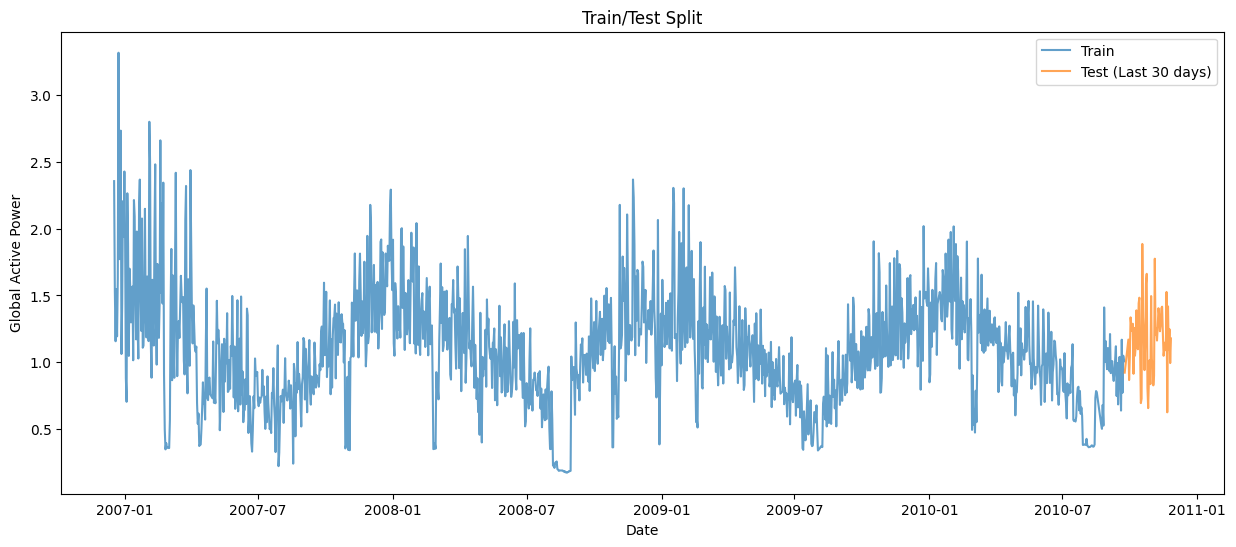

In [21]:
# Visualize the target variable
plt.figure(figsize=(15, 6))
plt.plot(train_df.index, train_df[target_column], label='Train', alpha=0.7)
plt.plot(test_df.index, test_df[target_column], label='Test (Last 30 days)', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.title('Train/Test Split')
plt.legend()
plt.show()

In [24]:
print("\nNormality tests (Shapiro-Wilk):")
for col in df.columns:
    stat, p = stats.shapiro(df[col].dropna())
    print(f"{col}: p-value = {p:.4f} {'(Normal)' if p > 0.05 else '(Not Normal)'}")


Normality tests (Shapiro-Wilk):
Global_active_power: p-value = 0.0000 (Not Normal)
Global_reactive_power: p-value = 0.0000 (Not Normal)
Voltage: p-value = 0.0000 (Not Normal)
Global_intensity: p-value = 0.0000 (Not Normal)
Sub_metering_1: p-value = 0.0000 (Not Normal)
Sub_metering_2: p-value = 0.0000 (Not Normal)
Sub_metering_3: p-value = 0.0001 (Not Normal)


In [25]:
# Innitializing Dagshub
dagshub.init(repo_owner="PacoTinoco", repo_name="Proyecto_modelado_TS", mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=76fae7c5-dea9-47d2-94e1-0f4405afd405&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=875417c9ea40f4ca51d5130032b369dd65f13cf96885c10a69eacd820dc48cd4




Accessing as PacoTinoco

Initialized MLflow to track repo "PacoTinoco/Proyecto_modelado_TS"

Repository PacoTinoco/Proyecto_modelado_TS initialized!

In [26]:
# Test the connection
with mlflow.start_run(run_name="test_connection_juanplv04"):
    mlflow.log_param("test", "connection_test")
    mlflow.log_metric("dummy_metric", 1.0)
    print("Test run completed successfully!")

Test run completed successfully!
🏃 View run test_connection_juanplv04 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/0/runs/44525d2e43ca42899717472cea07e6e1
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/0


## Mlp :

In [27]:
# Set MLflow experiment
mlflow.set_experiment("MLP_Energy_Forecasting")

# Function to create MLP Model 1 (Simple)
def create_mlp_model_1(input_shape, learning_rate=0.001):
    """Simple MLP with 2 hidden layers"""
    model = keras.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1)
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )
    return model

In [28]:
# Training and evaluation function with MLflow
def train_and_evaluate_mlp(X_train_mlp, y_train_mlp, X_test_mlp, y_test_mlp,
                          model_config, scaler_y):
    """Train and evaluate MLP model with MLflow logging"""

    # Log dataset information
    dataset_info = {
        "train_samples": len(X_train_mlp),
        "test_samples": len(X_test_mlp),
        "n_features": X_train_mlp.shape[1],
        "student": "juanplv04"
    }

    with mlflow.start_run(run_name=f"{model_config['name']}_juanplv04"):
        # Log parameters
        mlflow.log_params({
            **dataset_info,
            "model_name": model_config['name'],
            "learning_rate": model_config['learning_rate'],
            "batch_size": model_config['batch_size'],
            "epochs": model_config['epochs']
        })

        # Create model
        print(f"\nCreating {model_config['name']}...")
        model = model_config['create_func'](
            X_train_mlp.shape[1],
            model_config['learning_rate']
        )

        # Log model architecture
        stringlist = []
        model.summary(print_fn=lambda x: stringlist.append(x))
        model_summary = "\n".join(stringlist)
        mlflow.log_text(model_summary, "model_summary.txt")
        mlflow.log_param("total_params", model.count_params())

        # Callbacks
        early_stopping = keras.callbacks.EarlyStopping(
            monitor='loss',  # Monitor training loss since no validation set
            patience=15,
            restore_best_weights=True
        )

        reduce_lr = keras.callbacks.ReduceLROnPlateau(
            monitor='loss',
            factor=0.5,
            patience=7,
            min_lr=0.00001
        )

        # Custom callback to log metrics to MLflow
        class MLflowCallback(keras.callbacks.Callback):
            def on_epoch_end(self, epoch, logs=None):
                mlflow.log_metrics({
                    "train_loss": logs['loss'],
                    "train_mae": logs['mae']
                }, step=epoch)

        mlflow_callback = MLflowCallback()

        # Train the model
        print(f"Training {model_config['name']}...")
        start_time = time.time()

        history = model.fit(
            X_train_mlp, y_train_mlp,
            epochs=model_config['epochs'],
            batch_size=model_config['batch_size'],
            callbacks=[early_stopping, reduce_lr, mlflow_callback],
            verbose=1
        )

        training_time = time.time() - start_time
        mlflow.log_metric("training_time_seconds", training_time)

        # Plot training history
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.title(f'{model_config["name"]} - Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['mae'], label='Training MAE')
        plt.title(f'{model_config["name"]} - MAE')
        plt.xlabel('Epoch')
        plt.ylabel('MAE')
        plt.legend()

        plt.tight_layout()
        mlflow.log_figure(plt.gcf(), "training_history.png")
        plt.show()

        # Evaluate on test set
        print("Evaluating on test set...")
        y_pred_scaled = model.predict(X_test_mlp)

        # Inverse transform predictions and true values
        y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
        y_true = scaler_y.inverse_transform(y_test_mlp.reshape(-1, 1))

        # Calculate metrics
        test_mse = mean_squared_error(y_true, y_pred)
        test_mae = mean_absolute_error(y_true, y_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_true, y_pred)

        # Log test metrics
        mlflow.log_metrics({
            "test_mse": test_mse,
            "test_mae": test_mae,
            "test_rmse": test_rmse,
            "test_r2": test_r2
        })

        # Plot predictions vs actual
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.scatter(y_true, y_pred, alpha=0.5)
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title(f'{model_config["name"]} - Predictions vs Actual')

        plt.subplot(1, 2, 2)
        residuals = y_true.flatten() - y_pred.flatten()
        plt.hist(residuals, bins=30, edgecolor='black')
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.title(f'{model_config["name"]} - Residual Distribution')

        plt.tight_layout()
        mlflow.log_figure(plt.gcf(), "test_predictions.png")
        plt.show()

        # Log the model
        mlflow.tensorflow.log_model(
            model,
            artifact_path=f"models/{model_config['name']}",
            registered_model_name=f"MLP_{model_config['name']}_juanplv04"
        )

        # Save test predictions
        predictions_df = pd.DataFrame({
            'actual': y_true.flatten(),
            'predicted': y_pred.flatten(),
            'residual': residuals
        })
        predictions_df.to_csv('test_predictions.csv', index=False)
        mlflow.log_artifact('test_predictions.csv')

        print(f"\n{model_config['name']} Results:")
        print(f"Test RMSE: {test_rmse:.4f}")
        print(f"Test MAE: {test_mae:.4f}")
        print(f"Test R2: {test_r2:.4f}")
        print(f"Training Time: {training_time:.2f} seconds")

        # Return results for comparison
        return {
            'model_name': model_config['name'],
            'test_rmse': test_rmse,
            'test_mae': test_mae,
            'test_r2': test_r2,
            'training_time': training_time,
            'model': model,
            'history': history
        }


Creating MLP_Simple_2Layer...


Training MLP_Simple_2Layer...
Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 1.0208 - mae: 0.7012 - learning_rate: 0.0010
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2429 - mae: 0.3426 - learning_rate: 0.0010
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1602 - mae: 0.2834 - learning_rate: 0.0010
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1107 - mae: 0.2445 - learning_rate: 0.0010
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0875 - mae: 0.2150 - learning_rate: 0.0010
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0839 - mae: 0.2103 - learning_rate: 0.0010
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0907 - mae: 0.2121 - learning_rate: 0.0010
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0685 - mae: 0.1907 - learning_rate: 0.0010
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0642 - mae: 0.1801 - learning_rate: 0.0010
Epoch 10/100
43/43 ━━━━━━━━━━━━━━

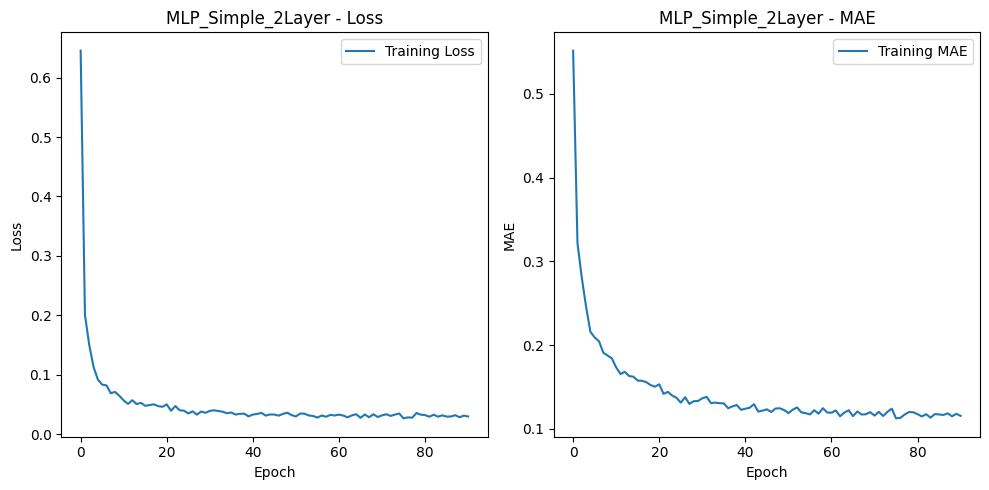

Evaluating on test set...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


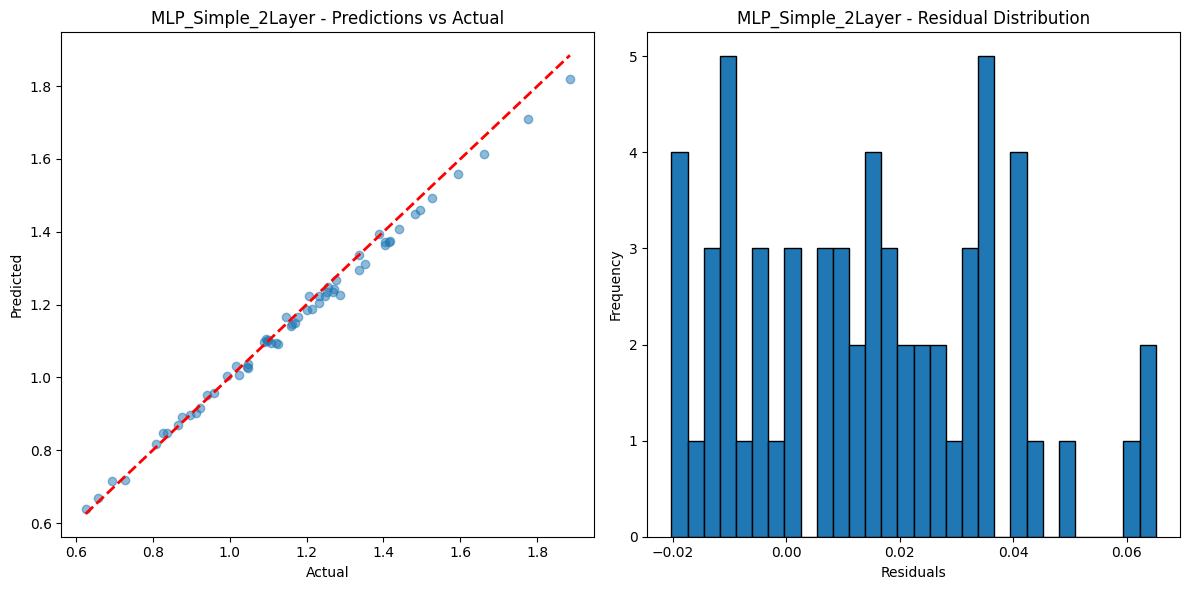

2025/05/15 02:07:00 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/05/15 02:07:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'MLP_MLP_Simple_2Layer_juanplv04' already exists. Creating a new version of this model...
2025/05/15 02:07:18 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: MLP_MLP_Simple_2Layer_juanplv04, version 2
Created version '2' of model 'MLP_MLP_Simple_2Layer_juanplv04'.



MLP_Simple_2Layer Results:
Test RMSE: 0.0265
Test MAE: 0.0216
Test R2: 0.9898
Training Time: 84.65 seconds
🏃 View run MLP_Simple_2Layer_juanplv04 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/22/runs/00e4f26b9dbc434ebeee68132b97a5f5
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/22

Model training completed and logged to MLflow!
Check results at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow


In [29]:
# Define model configuration
model_config_1 = {
    'name': 'MLP_Simple_2Layer',
    'create_func': create_mlp_model_1,
    'learning_rate': 0.001,
    'batch_size': 32,
    'epochs': 100
}

# Train and evaluate the first model
results_1 = train_and_evaluate_mlp(
    X_train_mlp, y_train_mlp,
    X_test_mlp, y_test_mlp,
    model_config_1, scaler_y
)

print("\nModel training completed and logged to MLflow!")
print(f"Check results at: {mlflow.get_tracking_uri()}")


Creating MLP_Deep_4Layer_BN...


Training MLP_Deep_4Layer_BN...
Epoch 1/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - loss: 1.6347 - mae: 1.0228 - learning_rate: 0.0010
Epoch 2/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7118 - mae: 0.6404 - learning_rate: 0.0010
Epoch 3/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5613 - mae: 0.5613 - learning_rate: 0.0010
Epoch 4/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4867 - mae: 0.5312 - learning_rate: 0.0010
Epoch 5/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3681 - mae: 0.4726 - learning_rate: 0.0010
Epoch 6/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3550 - mae: 0.4417 - learning_rate: 0.0010
Epoch 7/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2828 - mae: 0.4035 - learning_rate: 0.0010
Epoch 8/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2758 - mae: 0.3933 - learning_rate: 0.0010
Epoch 9/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2658 - mae: 0.3930 - learning_rate: 0.0010
Epoch 10/150
22/22 ━━━━━━━━━━━━

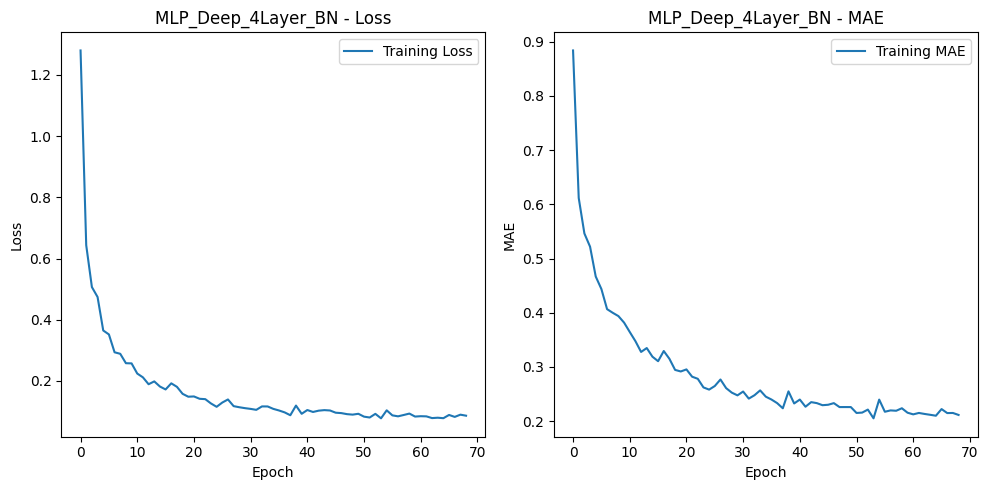

Evaluating on test set...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 430ms/step


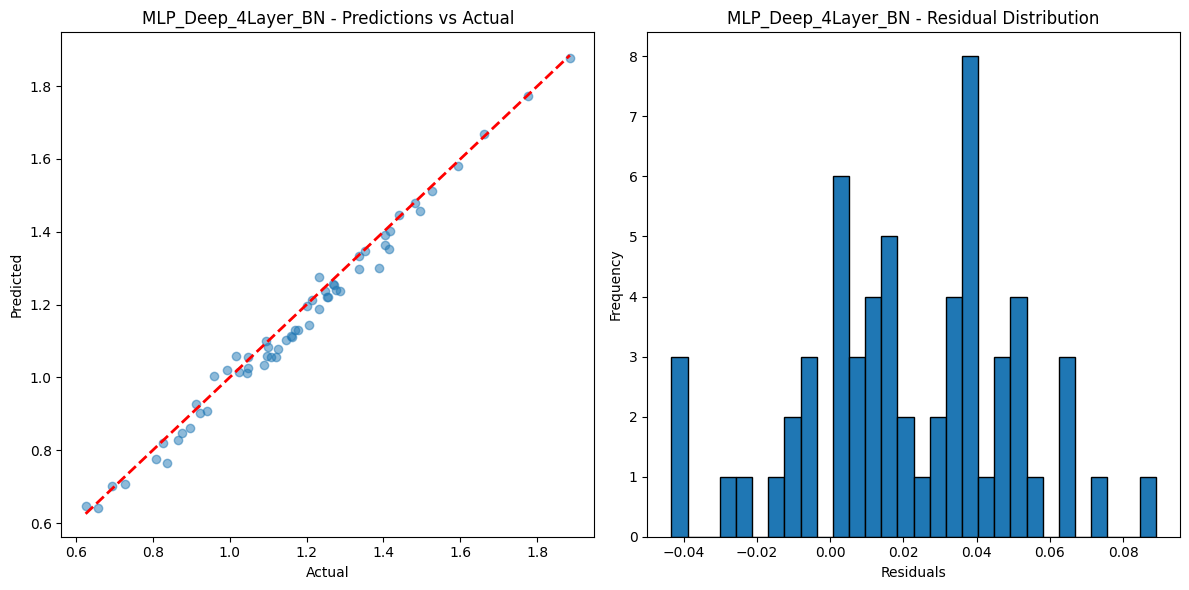

2025/05/15 02:09:11 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/05/15 02:09:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'MLP_MLP_Deep_4Layer_BN_juanplv04' already exists. Creating a new version of this model...
2025/05/15 02:09:25 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: MLP_MLP_Deep_4Layer_BN_juanplv04, version 2
Created version '2' of model 'MLP_MLP_Deep_4Layer_BN_juanplv04'.



MLP_Deep_4Layer_BN Results:
Test RMSE: 0.0354
Test MAE: 0.0290
Test R2: 0.9817
Training Time: 66.77 seconds
🏃 View run MLP_Deep_4Layer_BN_juanplv04 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/22/runs/cef1aa3723794f3190686fedbeaadb88
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/22

Model 2 training completed and logged to MLflow!
Check results at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow


In [30]:
# Function to create MLP Model 2 (Deeper with BatchNorm)
def create_mlp_model_2(input_shape, learning_rate=0.001):
    """Deeper MLP with 4 hidden layers and batch normalization"""
    model = keras.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )
    return model

# Define model configuration for Model 2
model_config_2 = {
    'name': 'MLP_Deep_4Layer_BN',
    'create_func': create_mlp_model_2,
    'learning_rate': 0.001,
    'batch_size': 64,
    'epochs': 150
}

# Train and evaluate the second model
results_2 = train_and_evaluate_mlp(
    X_train_mlp, y_train_mlp,
    X_test_mlp, y_test_mlp,
    model_config_2, scaler_y
)

print("\nModel 2 training completed and logged to MLflow!")
print(f"Check results at: {mlflow.get_tracking_uri()}")


Creating MLP_Wide_Skip...


Training MLP_Wide_Skip...
Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 0.6617 - mae: 0.5861 - learning_rate: 5.0000e-04
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1834 - mae: 0.2993 - learning_rate: 5.0000e-04
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1102 - mae: 0.2351 - learning_rate: 5.0000e-04
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0845 - mae: 0.2146 - learning_rate: 5.0000e-04
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0956 - mae: 0.2204 - learning_rate: 5.0000e-04
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0708 - mae: 0.1890 - learning_rate: 5.0000e-04
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0706 - mae: 0.1903 - learning_rate: 5.0000e-04
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0587 - mae: 0.1746 - learning_rate: 5.0000e-04
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0553 - mae: 0.1687 - learning_rate: 5.0000e-04
E

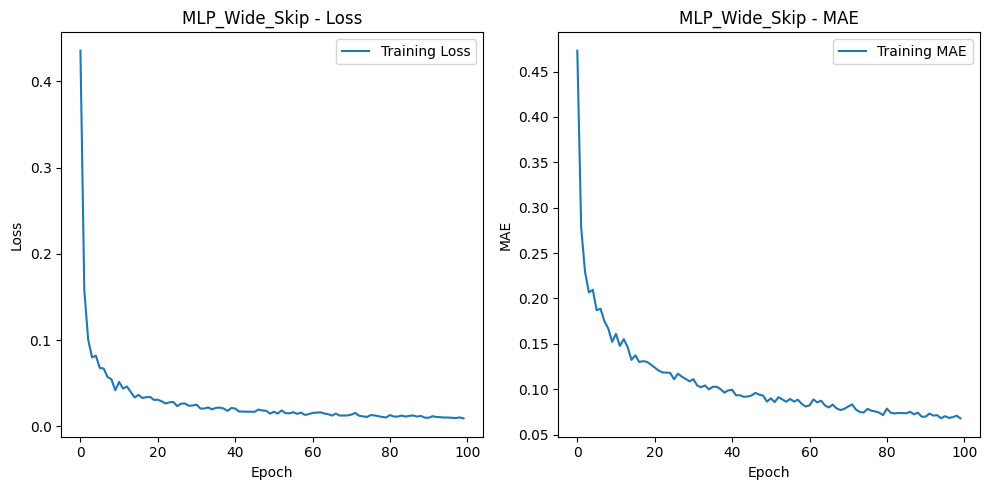

Evaluating on test set...


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 310ms/step


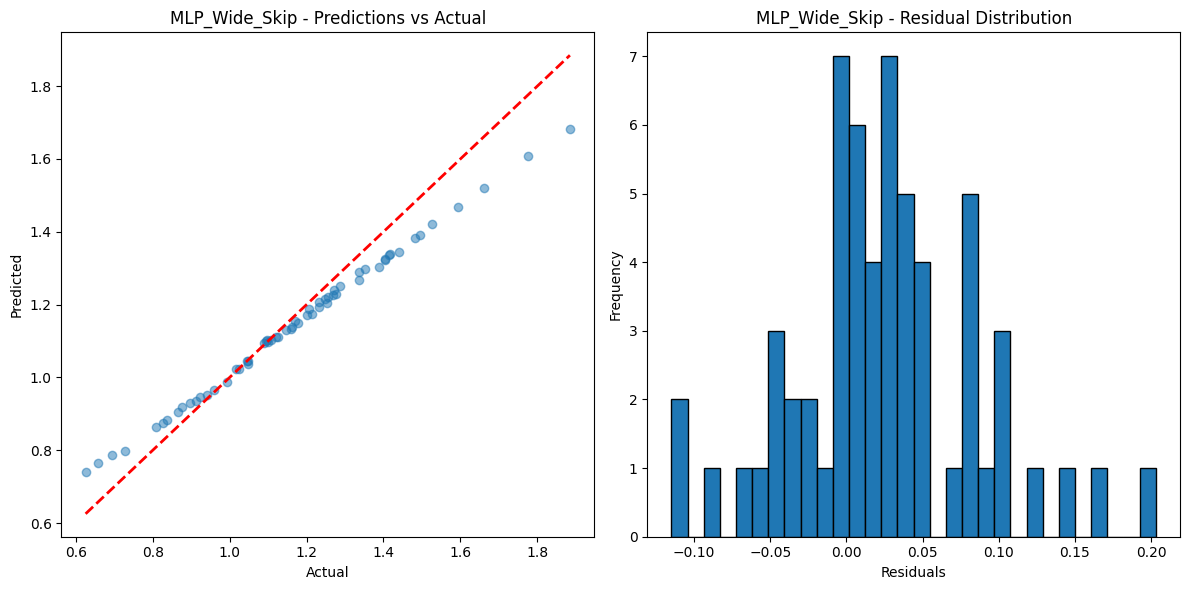

2025/05/15 02:12:07 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/05/15 02:12:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'MLP_MLP_Wide_Skip_juanplv04' already exists. Creating a new version of this model...
2025/05/15 02:12:21 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: MLP_MLP_Wide_Skip_juanplv04, version 2
Created version '2' of model 'MLP_MLP_Wide_Skip_juanplv04'.



MLP_Wide_Skip Results:
Test RMSE: 0.0655
Test MAE: 0.0489
Test R2: 0.9374
Training Time: 95.66 seconds
🏃 View run MLP_Wide_Skip_juanplv04 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/22/runs/ede368465ca64f769b2549ec31e624f9
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/22

Model 3 training completed and logged to MLflow!
Check results at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow


In [31]:
# Function to create MLP Model 3 (Wide with Skip connections)
def create_mlp_model_3(input_shape, learning_rate=0.001):
    """Wide MLP with skip connections using functional API"""
    inputs = layers.Input(shape=(input_shape,))

    # First branch
    x1 = layers.Dense(256, activation='relu')(inputs)
    x1 = layers.Dropout(0.3)(x1)
    x1 = layers.Dense(128, activation='relu')(x1)

    # Second branch (skip connection)
    x2 = layers.Dense(128, activation='relu')(inputs)

    # Combine branches
    combined = layers.Add()([x1, x2])
    combined = layers.Dropout(0.3)(combined)

    # Final layers
    x = layers.Dense(64, activation='relu')(combined)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(32, activation='relu')(x)
    outputs = layers.Dense(1)(x)

    model = keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )
    return model

# Define model configuration for Model 3
model_config_3 = {
    'name': 'MLP_Wide_Skip',
    'create_func': create_mlp_model_3,
    'learning_rate': 0.0005,
    'batch_size': 32,
    'epochs': 100
}

# Train and evaluate the third model
results_3 = train_and_evaluate_mlp(
    X_train_mlp, y_train_mlp,
    X_test_mlp, y_test_mlp,
    model_config_3, scaler_y
)

print("\nModel 3 training completed and logged to MLflow!")
print(f"Check results at: {mlflow.get_tracking_uri()}")

In [32]:
# Create comparison dataframe
comparison_results = [results_1, results_2, results_3]
results_df = pd.DataFrame([
    {
        'Model': r['model_name'],
        'Test RMSE': r['test_rmse'],
        'Test MAE': r['test_mae'],
        'Test R2': r['test_r2'],
        'Training Time (s)': r['training_time']
    }
    for r in comparison_results
])

# Display comparison table
print("MLP Models Comparison")
print("="*50)
print(results_df.to_string())

# Find best model
best_model_idx = results_df['Test R2'].idxmax()
best_model_name = results_df.iloc[best_model_idx]['Model']
print(f"\nBest model based on R2 score: {best_model_name}")

MLP Models Comparison
                Model  Test RMSE  Test MAE   Test R2  Training Time (s)
0   MLP_Simple_2Layer   0.026503  0.021566  0.989755          84.650492
1  MLP_Deep_4Layer_BN   0.035376  0.029049  0.981746          66.765003
2       MLP_Wide_Skip   0.065516  0.048917  0.937394          95.661225

Best model based on R2 score: MLP_Simple_2Layer


### Modelos CNN :

In [33]:
# Set MLflow experiment for CNN
mlflow.set_experiment("CNN_Energy_Forecasting")

<Experiment: artifact_location='mlflow-artifacts:/dec0829d8d5d413b83d3683557c2bbe6', creation_time=1747254589664, experiment_id='23', last_update_time=1747254589664, lifecycle_stage='active', name='CNN_Energy_Forecasting', tags={}>

In [34]:
def train_and_evaluate_cnn(X_train_seq, y_train_seq, X_test_seq, y_test_seq,
                          model_config, scaler_y):
    """Train and evaluate CNN model with MLflow logging"""

    # Log dataset information
    dataset_info = {
        "train_samples": len(X_train_seq),
        "test_samples": len(X_test_seq),
        "sequence_length": X_train_seq.shape[1],
        "n_features": X_train_seq.shape[2],
        "student": "juanplv04"
    }

    with mlflow.start_run(run_name=f"{model_config['name']}_juanplv04"):
        # Log parameters
        mlflow.log_params({
            **dataset_info,
            "model_name": model_config['name'],
            "learning_rate": model_config['learning_rate'],
            "batch_size": model_config['batch_size'],
            "epochs": model_config['epochs']
        })

        # Create model
        print(f"\nCreating {model_config['name']}...")
        model = model_config['create_func'](
            X_train_seq.shape[1:],  # (sequence_length, n_features)
            model_config['learning_rate']
        )

        # Log model architecture
        stringlist = []
        model.summary(print_fn=lambda x: stringlist.append(x))
        model_summary = "\n".join(stringlist)
        mlflow.log_text(model_summary, "model_summary.txt")
        mlflow.log_param("total_params", model.count_params())

        # Callbacks
        early_stopping = keras.callbacks.EarlyStopping(
            monitor='loss',
            patience=15,
            restore_best_weights=True
        )

        reduce_lr = keras.callbacks.ReduceLROnPlateau(
            monitor='loss',
            factor=0.5,
            patience=7,
            min_lr=0.00001
        )

        # Custom callback to log metrics to MLflow
        class MLflowCallback(keras.callbacks.Callback):
            def on_epoch_end(self, epoch, logs=None):
                mlflow.log_metrics({
                    "train_loss": logs['loss'],
                    "train_mae": logs['mae']
                }, step=epoch)

        mlflow_callback = MLflowCallback()

        # Train the model
        print(f"Training {model_config['name']}...")
        start_time = time.time()

        history = model.fit(
            X_train_seq, y_train_seq,
            epochs=model_config['epochs'],
            batch_size=model_config['batch_size'],
            callbacks=[early_stopping, reduce_lr, mlflow_callback],
            verbose=1
        )

        training_time = time.time() - start_time
        mlflow.log_metric("training_time_seconds", training_time)

        # Plot training history
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.title(f'{model_config["name"]} - Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['mae'], label='Training MAE')
        plt.title(f'{model_config["name"]} - MAE')
        plt.xlabel('Epoch')
        plt.ylabel('MAE')
        plt.legend()

        plt.tight_layout()
        mlflow.log_figure(plt.gcf(), "training_history.png")
        plt.show()

        # Evaluate on test set
        print("Evaluating on test set...")
        y_pred_scaled = model.predict(X_test_seq)

        # Inverse transform predictions and true values
        y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
        y_true = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1))

        # Calculate metrics
        test_mse = mean_squared_error(y_true, y_pred)
        test_mae = mean_absolute_error(y_true, y_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_true, y_pred)

        # Log test metrics
        mlflow.log_metrics({
            "test_mse": test_mse,
            "test_mae": test_mae,
            "test_rmse": test_rmse,
            "test_r2": test_r2
        })

        # Plot predictions vs actual
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.scatter(y_true, y_pred, alpha=0.5)
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title(f'{model_config["name"]} - Predictions vs Actual')

        plt.subplot(1, 2, 2)
        residuals = y_true.flatten() - y_pred.flatten()
        plt.hist(residuals, bins=30, edgecolor='black')
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.title(f'{model_config["name"]} - Residual Distribution')

        plt.tight_layout()
        mlflow.log_figure(plt.gcf(), "test_predictions.png")
        plt.show()

        # Log the model
        mlflow.tensorflow.log_model(
            model,
            artifact_path=f"models/{model_config['name']}",
            registered_model_name=f"CNN_{model_config['name']}_juanplv04"
        )

        # Save test predictions
        predictions_df = pd.DataFrame({
            'actual': y_true.flatten(),
            'predicted': y_pred.flatten(),
            'residual': residuals
        })
        predictions_df.to_csv('test_predictions.csv', index=False)
        mlflow.log_artifact('test_predictions.csv')

        print(f"\n{model_config['name']} Results:")
        print(f"Test RMSE: {test_rmse:.4f}")
        print(f"Test MAE: {test_mae:.4f}")
        print(f"Test R2: {test_r2:.4f}")
        print(f"Training Time: {training_time:.2f} seconds")

        # Return results for comparison
        return {
            'model_name': model_config['name'],
            'test_rmse': test_rmse,
            'test_mae': test_mae,
            'test_r2': test_r2,
            'training_time': training_time,
            'model': model,
            'history': history
        }


Creating CNN_Simple_2Conv...


Training CNN_Simple_2Conv...
Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.8047 - mae: 0.6712 - learning_rate: 0.0010
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6294 - mae: 0.6013 - learning_rate: 0.0010
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5781 - mae: 0.5687 - learning_rate: 0.0010
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5642 - mae: 0.5610 - learning_rate: 0.0010
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5269 - mae: 0.5392 - learning_rate: 0.0010
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5119 - mae: 0.5385 - learning_rate: 0.0010
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5442 - mae: 0.5396 - learning_rate: 0.0010
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4819 - mae: 0.5235 - learning_rate: 0.0010
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4885 - mae: 0.5342 - learning_rate: 0.0010
Epoch 10/100
42/42 ━━━━━━━━━━━━━━

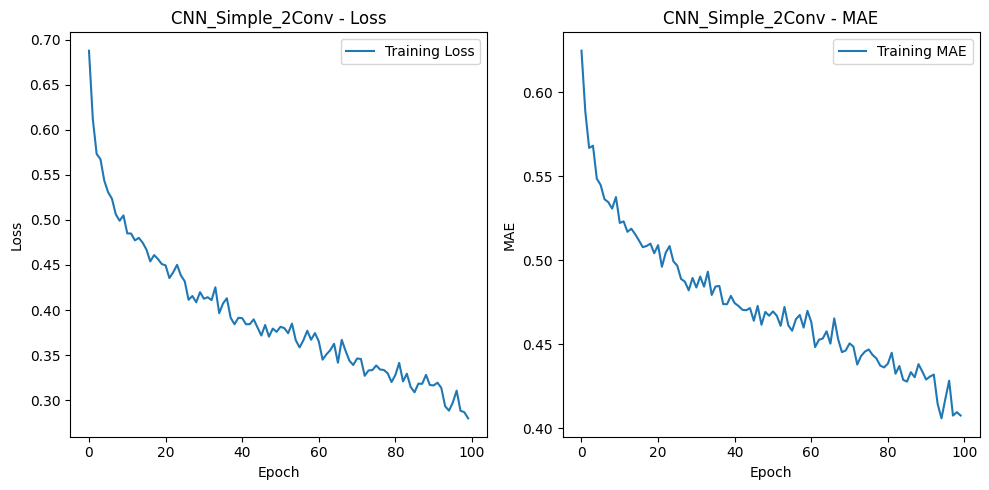

Evaluating on test set...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


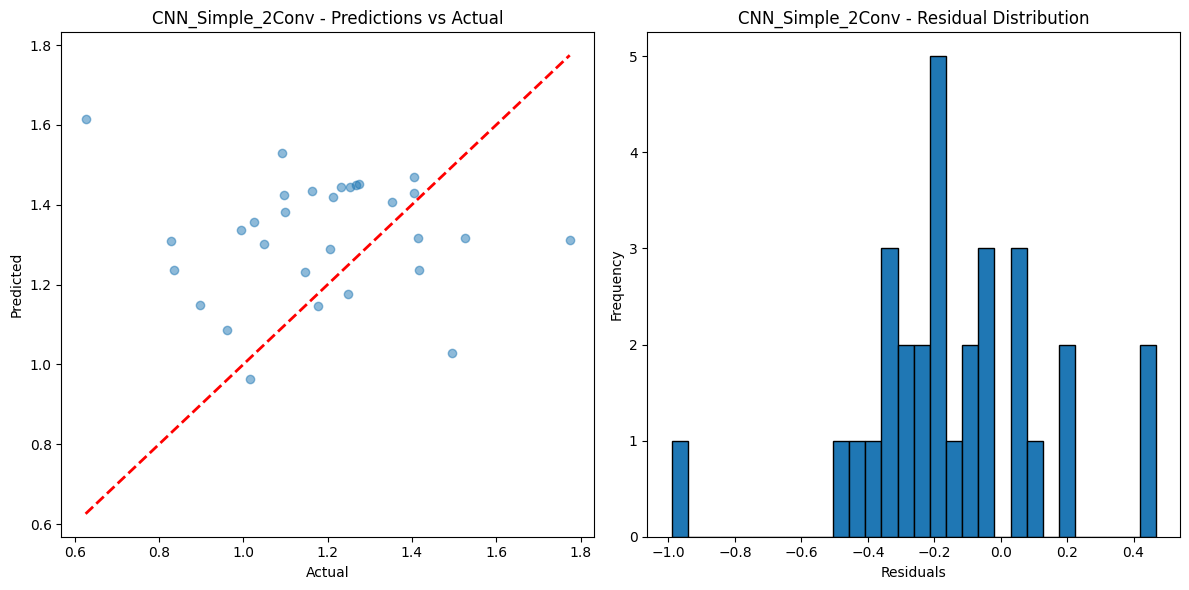

2025/05/15 02:16:17 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/05/15 02:16:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'CNN_CNN_Simple_2Conv_juanplv04' already exists. Creating a new version of this model...
2025/05/15 02:16:30 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: CNN_CNN_Simple_2Conv_juanplv04, version 2
Created version '2' of model 'CNN_CNN_Simple_2Conv_juanplv04'.



CNN_Simple_2Conv Results:
Test RMSE: 0.3128
Test MAE: 0.2451
Test R2: -0.7807
Training Time: 94.79 seconds
🏃 View run CNN_Simple_2Conv_juanplv04 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/23/runs/443382cf93e740fb83e0cf809ab99dab
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/23

CNN Model 1 training completed and logged to MLflow!


In [35]:
# Function to create CNN Model 1 (Simple 1D CNN)
def create_cnn_model_1(input_shape, learning_rate=0.001):
    """Simple 1D CNN with 2 convolutional layers"""
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
        layers.GlobalAveragePooling1D(),
        layers.Dense(50, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1)
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )
    return model

# Define model configuration for CNN Model 1
model_config_1 = {
    'name': 'CNN_Simple_2Conv',
    'create_func': create_cnn_model_1,
    'learning_rate': 0.001,
    'batch_size': 32,
    'epochs': 100
}

# Train and evaluate the first CNN model
results_cnn_1 = train_and_evaluate_cnn(
    X_train_seq, y_train_seq,
    X_test_seq, y_test_seq,
    model_config_1, scaler_y
)

print("\nCNN Model 1 training completed and logged to MLflow!")


Creating CNN_Deep_3Conv_BN...


Training CNN_Deep_3Conv_BN...
Epoch 1/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - loss: 0.9885 - mae: 0.7525 - learning_rate: 5.0000e-04
Epoch 2/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6584 - mae: 0.6125 - learning_rate: 5.0000e-04
Epoch 3/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5971 - mae: 0.5804 - learning_rate: 5.0000e-04
Epoch 4/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5434 - mae: 0.5592 - learning_rate: 5.0000e-04
Epoch 5/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4877 - mae: 0.5247 - learning_rate: 5.0000e-04
Epoch 6/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4538 - mae: 0.5138 - learning_rate: 5.0000e-04
Epoch 7/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4667 - mae: 0.5179 - learning_rate: 5.0000e-04
Epoch 8/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4157 - mae: 0.4883 - learning_rate: 5.0000e-04
Epoch 9/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4179 - mae: 0.4957 - learning_rate: 5.0000e

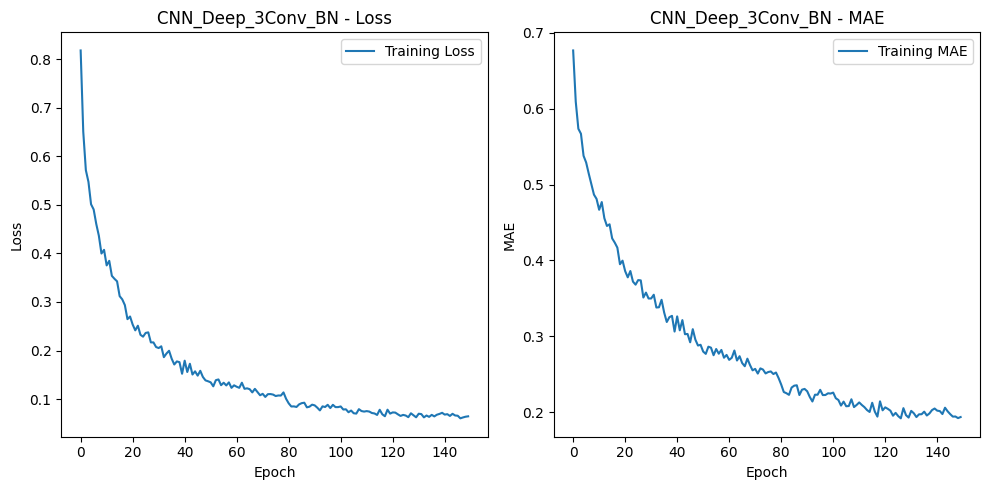

Evaluating on test set...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step


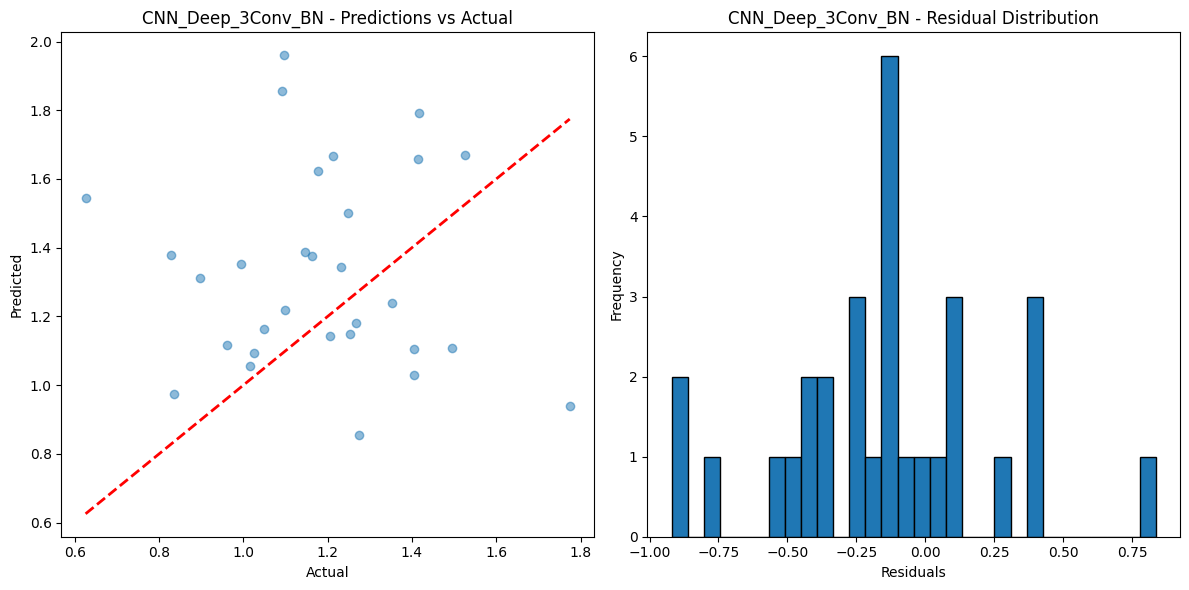

2025/05/15 02:20:48 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/05/15 02:20:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'CNN_CNN_Deep_3Conv_BN_juanplv04' already exists. Creating a new version of this model...
2025/05/15 02:21:01 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: CNN_CNN_Deep_3Conv_BN_juanplv04, version 2
Created version '2' of model 'CNN_CNN_Deep_3Conv_BN_juanplv04'.



CNN_Deep_3Conv_BN Results:
Test RMSE: 0.4063
Test MAE: 0.3223
Test R2: -2.0039
Training Time: 148.49 seconds
🏃 View run CNN_Deep_3Conv_BN_juanplv04 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/23/runs/bbb34be828094e27abf6bfa7eaec752a
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/23

CNN Model 2 training completed and logged to MLflow!


In [36]:
# Function to create CNN Model 2 (Deeper CNN with BatchNorm)
def create_cnn_model_2(input_shape, learning_rate=0.001):
    """Deeper 1D CNN with 3 convolutional layers and batch normalization"""
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
        layers.BatchNormalization(),
        layers.GlobalAveragePooling1D(),
        layers.Dense(100, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(50, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1)
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )
    return model

# Define model configuration for CNN Model 2
model_config_2 = {
    'name': 'CNN_Deep_3Conv_BN',
    'create_func': create_cnn_model_2,
    'learning_rate': 0.0005,
    'batch_size': 64,
    'epochs': 150
}

# Train and evaluate the second CNN model
results_cnn_2 = train_and_evaluate_cnn(
    X_train_seq, y_train_seq,
    X_test_seq, y_test_seq,
    model_config_2, scaler_y
)

print("\nCNN Model 2 training completed and logged to MLflow!")


Creating CNN_MultiBranch...


Training CNN_MultiBranch...
Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - loss: 0.9450 - mae: 0.7459 - learning_rate: 0.0010
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5485 - mae: 0.5508 - learning_rate: 0.0010
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4777 - mae: 0.5220 - learning_rate: 0.0010
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4834 - mae: 0.5332 - learning_rate: 0.0010
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4427 - mae: 0.5091 - learning_rate: 0.0010
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4023 - mae: 0.4671 - learning_rate: 0.0010
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3547 - mae: 0.4546 - learning_rate: 0.0010
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3391 - mae: 0.4501 - learning_rate: 0.0010
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3264 - mae: 0.4405 - learning_rate: 0.0010
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━

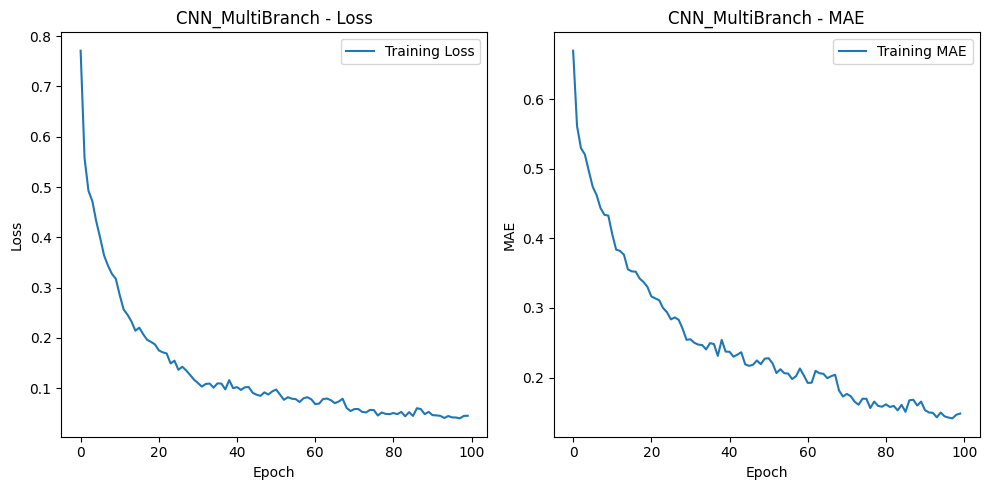

Evaluating on test set...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


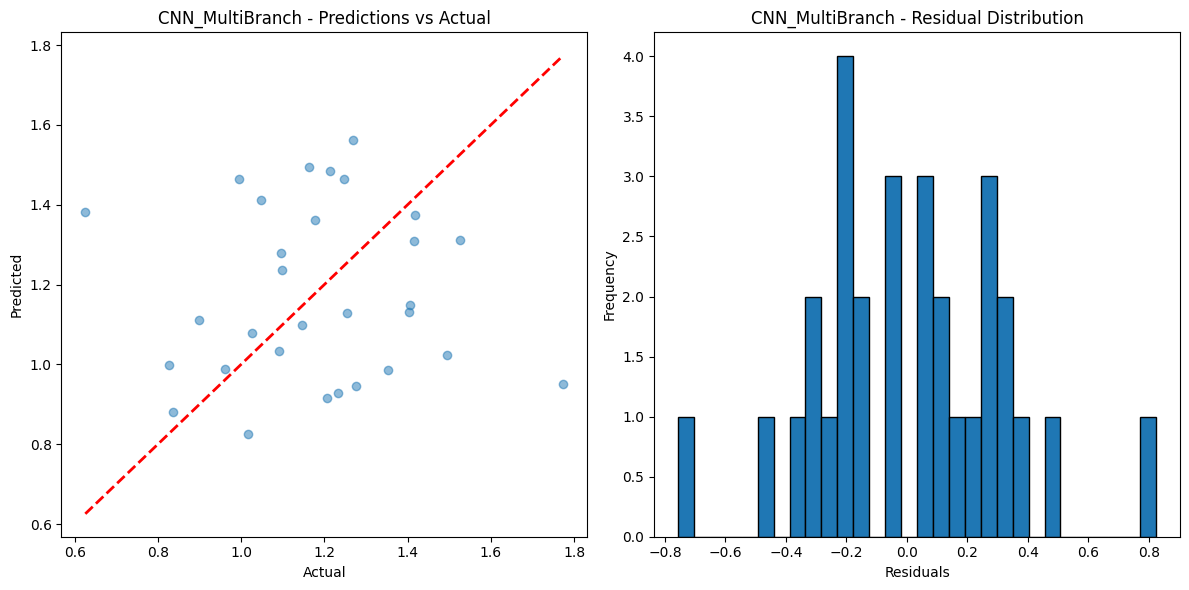

2025/05/15 02:22:52 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/05/15 02:23:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'CNN_CNN_MultiBranch_juanplv04' already exists. Creating a new version of this model...
2025/05/15 02:23:05 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: CNN_CNN_MultiBranch_juanplv04, version 2
Created version '2' of model 'CNN_CNN_MultiBranch_juanplv04'.



CNN_MultiBranch Results:
Test RMSE: 0.3156
Test MAE: 0.2541
Test R2: -0.8125
Training Time: 95.86 seconds
🏃 View run CNN_MultiBranch_juanplv04 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/23/runs/0bbac69b38974209b37e0ccc6054bd76
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/23

CNN Model 3 training completed and logged to MLflow!


In [37]:
# Function to create CNN Model 3 (Multi-branch CNN)
def create_cnn_model_3(input_shape, learning_rate=0.001):
    """Multi-branch CNN with different kernel sizes"""
    inputs = layers.Input(shape=input_shape)

    # Branch 1: Small kernel
    branch1 = layers.Conv1D(filters=32, kernel_size=2, activation='relu')(inputs)
    branch1 = layers.MaxPooling1D(pool_size=2)(branch1)
    branch1 = layers.Flatten()(branch1)

    # Branch 2: Medium kernel
    branch2 = layers.Conv1D(filters=32, kernel_size=3, activation='relu')(inputs)
    branch2 = layers.MaxPooling1D(pool_size=2)(branch2)
    branch2 = layers.Flatten()(branch2)

    # Branch 3: Large kernel
    branch3 = layers.Conv1D(filters=32, kernel_size=5, activation='relu')(inputs)
    branch3 = layers.MaxPooling1D(pool_size=2)(branch3)
    branch3 = layers.Flatten()(branch3)

    # Concatenate branches
    concatenated = layers.Concatenate()([branch1, branch2, branch3])

    # Dense layers
    x = layers.Dense(128, activation='relu')(concatenated)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(1)(x)

    model = keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )
    return model

# Define model configuration for CNN Model 3
model_config_3 = {
    'name': 'CNN_MultiBranch',
    'create_func': create_cnn_model_3,
    'learning_rate': 0.001,
    'batch_size': 32,
    'epochs': 100
}

# Train and evaluate the third CNN model
results_cnn_3 = train_and_evaluate_cnn(
    X_train_seq, y_train_seq,
    X_test_seq, y_test_seq,
    model_config_3, scaler_y
)

print("\nCNN Model 3 training completed and logged to MLflow!")

In [38]:
# Create comparison dataframe for CNN models
comparison_results_cnn = [results_cnn_1, results_cnn_2, results_cnn_3]
results_df_cnn = pd.DataFrame([
    {
        'Model': r['model_name'],
        'Test RMSE': r['test_rmse'],
        'Test MAE': r['test_mae'],
        'Test R2': r['test_r2'],
        'Training Time (s)': r['training_time']
    }
    for r in comparison_results_cnn
])

# Display comparison table
print("CNN Models Comparison")
print("="*50)
print(results_df_cnn.to_string())

# Find best model
best_model_idx = results_df_cnn['Test R2'].idxmax()
best_model_name = results_df_cnn.iloc[best_model_idx]['Model']
print(f"\nBest CNN model based on R2 score: {best_model_name}")

CNN Models Comparison
               Model  Test RMSE  Test MAE   Test R2  Training Time (s)
0   CNN_Simple_2Conv   0.312834  0.245072 -0.780687          94.791165
1  CNN_Deep_3Conv_BN   0.406316  0.322345 -2.003918         148.491529
2    CNN_MultiBranch   0.315613  0.254065 -0.812465          95.857596

Best CNN model based on R2 score: CNN_Simple_2Conv


### Modelos multi LSTM :

In [39]:
# Set MLflow experiment for LSTM
mlflow.set_experiment("LSTM_Energy_Forecasting")

<Experiment: artifact_location='mlflow-artifacts:/37831af0d7a84a89a35776c71e7a7038', creation_time=1747256975083, experiment_id='24', last_update_time=1747256975083, lifecycle_stage='active', name='LSTM_Energy_Forecasting', tags={}>

In [40]:
def train_and_evaluate_lstm(X_train_seq, y_train_seq, X_test_seq, y_test_seq,
                           model_config, scaler_y):
    """Train and evaluate LSTM model with MLflow logging"""

    # Log dataset information
    dataset_info = {
        "train_samples": len(X_train_seq),
        "test_samples": len(X_test_seq),
        "sequence_length": X_train_seq.shape[1],
        "n_features": X_train_seq.shape[2],
        "student": "juanplv04"
    }

    with mlflow.start_run(run_name=f"{model_config['name']}_juanplv04"):
        # Log parameters
        mlflow.log_params({
            **dataset_info,
            "model_name": model_config['name'],
            "learning_rate": model_config['learning_rate'],
            "batch_size": model_config['batch_size'],
            "epochs": model_config['epochs']
        })

        # Create model
        print(f"\nCreating {model_config['name']}...")
        model = model_config['create_func'](
            X_train_seq.shape[1:],  # (sequence_length, n_features)
            model_config['learning_rate']
        )

        # Log model architecture
        stringlist = []
        model.summary(print_fn=lambda x: stringlist.append(x))
        model_summary = "\n".join(stringlist)
        mlflow.log_text(model_summary, "model_summary.txt")
        mlflow.log_param("total_params", model.count_params())

        # Callbacks
        early_stopping = keras.callbacks.EarlyStopping(
            monitor='loss',
            patience=15,
            restore_best_weights=True
        )

        reduce_lr = keras.callbacks.ReduceLROnPlateau(
            monitor='loss',
            factor=0.5,
            patience=7,
            min_lr=0.00001
        )

        # Custom callback to log metrics to MLflow
        class MLflowCallback(keras.callbacks.Callback):
            def on_epoch_end(self, epoch, logs=None):
                mlflow.log_metrics({
                    "train_loss": logs['loss'],
                    "train_mae": logs['mae']
                }, step=epoch)

        mlflow_callback = MLflowCallback()

        # Train the model
        print(f"Training {model_config['name']}...")
        start_time = time.time()

        history = model.fit(
            X_train_seq, y_train_seq,
            epochs=model_config['epochs'],
            batch_size=model_config['batch_size'],
            callbacks=[early_stopping, reduce_lr, mlflow_callback],
            verbose=1
        )

        training_time = time.time() - start_time
        mlflow.log_metric("training_time_seconds", training_time)

        # Plot training history
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.title(f'{model_config["name"]} - Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['mae'], label='Training MAE')
        plt.title(f'{model_config["name"]} - MAE')
        plt.xlabel('Epoch')
        plt.ylabel('MAE')
        plt.legend()

        plt.tight_layout()
        mlflow.log_figure(plt.gcf(), "training_history.png")
        plt.show()

        # Evaluate on test set
        print("Evaluating on test set...")
        y_pred_scaled = model.predict(X_test_seq)

        # Inverse transform predictions and true values
        y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
        y_true = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1))

        # Calculate metrics
        test_mse = mean_squared_error(y_true, y_pred)
        test_mae = mean_absolute_error(y_true, y_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_true, y_pred)

        # Log test metrics
        mlflow.log_metrics({
            "test_mse": test_mse,
            "test_mae": test_mae,
            "test_rmse": test_rmse,
            "test_r2": test_r2
        })

        # Plot predictions vs actual
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.scatter(y_true, y_pred, alpha=0.5)
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title(f'{model_config["name"]} - Predictions vs Actual')

        plt.subplot(1, 2, 2)
        residuals = y_true.flatten() - y_pred.flatten()
        plt.hist(residuals, bins=30, edgecolor='black')
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.title(f'{model_config["name"]} - Residual Distribution')

        plt.tight_layout()
        mlflow.log_figure(plt.gcf(), "test_predictions.png")
        plt.show()

        # Log the model
        mlflow.tensorflow.log_model(
            model,
            artifact_path=f"models/{model_config['name']}",
            registered_model_name=f"LSTM_{model_config['name']}_juanplv04"
        )

        # Save test predictions
        predictions_df = pd.DataFrame({
            'actual': y_true.flatten(),
            'predicted': y_pred.flatten(),
            'residual': residuals
        })
        predictions_df.to_csv('test_predictions.csv', index=False)
        mlflow.log_artifact('test_predictions.csv')

        print(f"\n{model_config['name']} Results:")
        print(f"Test RMSE: {test_rmse:.4f}")
        print(f"Test MAE: {test_mae:.4f}")
        print(f"Test R2: {test_r2:.4f}")
        print(f"Training Time: {training_time:.2f} seconds")

        # Return results for comparison
        return {
            'model_name': model_config['name'],
            'test_rmse': test_rmse,
            'test_mae': test_mae,
            'test_r2': test_r2,
            'training_time': training_time,
            'model': model,
            'history': history
        }


Creating LSTM_Simple_Single...


Training LSTM_Simple_Single...
Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.9834 - mae: 0.7212 - learning_rate: 0.0010
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5506 - mae: 0.5575 - learning_rate: 0.0010
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5121 - mae: 0.5358 - learning_rate: 0.0010
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4806 - mae: 0.5183 - learning_rate: 0.0010
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4787 - mae: 0.5170 - learning_rate: 0.0010
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5061 - mae: 0.5487 - learning_rate: 0.0010
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4986 - mae: 0.5290 - learning_rate: 0.0010
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4736 - mae: 0.5148 - learning_rate: 0.0010
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4589 - mae: 0.5173 - learning_rate: 0.0010
Epoch 10/100
42/42 ━━━━━━━━━━━━━

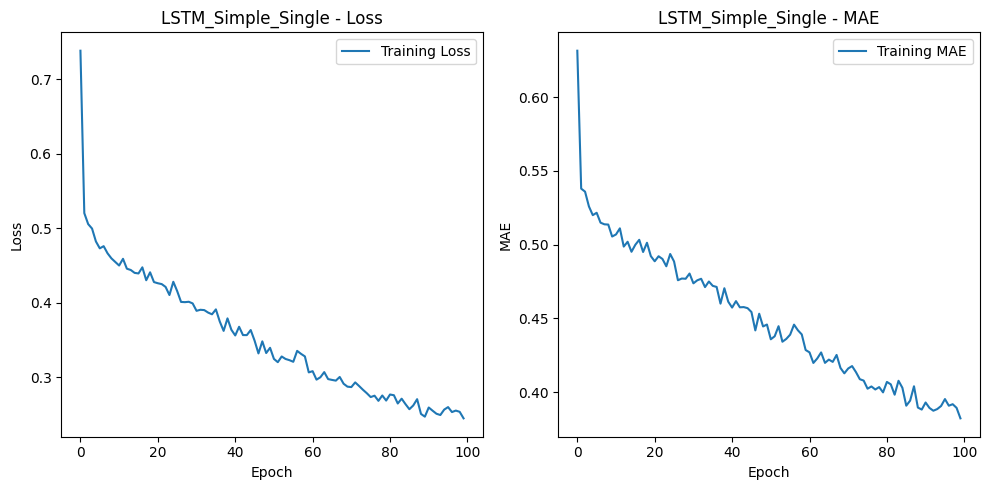

Evaluating on test set...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


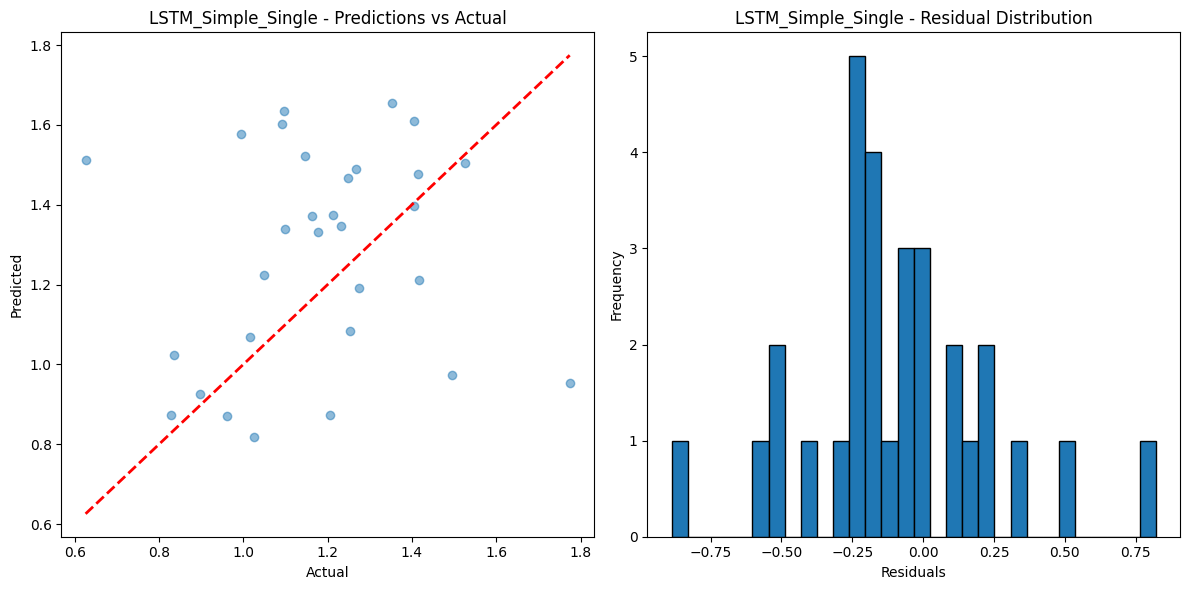

2025/05/15 02:25:07 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/05/15 02:25:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'LSTM_LSTM_Simple_Single_juanplv04' already exists. Creating a new version of this model...
2025/05/15 02:25:20 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LSTM_LSTM_Simple_Single_juanplv04, version 2
Created version '2' of model 'LSTM_LSTM_Simple_Single_juanplv04'.



LSTM_Simple_Single Results:
Test RMSE: 0.3404
Test MAE: 0.2578
Test R2: -1.1078
Training Time: 93.88 seconds
🏃 View run LSTM_Simple_Single_juanplv04 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/24/runs/0b3e55cf81f44c569a6fbc1bdac1f558
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/24

LSTM Model 1 training completed and logged to MLflow!


In [41]:
# Function to create LSTM Model 1 (Simple LSTM)
def create_lstm_model_1(input_shape, learning_rate=0.001):
    """Simple LSTM with one LSTM layer"""
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.LSTM(50, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1)
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )
    return model

# Define model configuration for LSTM Model 1
model_config_1 = {
    'name': 'LSTM_Simple_Single',
    'create_func': create_lstm_model_1,
    'learning_rate': 0.001,
    'batch_size': 32,
    'epochs': 100
}

# Train and evaluate the first LSTM model
results_lstm_1 = train_and_evaluate_lstm(
    X_train_seq, y_train_seq,
    X_test_seq, y_test_seq,
    model_config_1, scaler_y
)

print("\nLSTM Model 1 training completed and logged to MLflow!")


Creating LSTM_Stacked_2Layer...


Training LSTM_Stacked_2Layer...
Epoch 1/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - loss: 0.7535 - mae: 0.6634 - learning_rate: 5.0000e-04
Epoch 2/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5482 - mae: 0.5681 - learning_rate: 5.0000e-04
Epoch 3/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5424 - mae: 0.5483 - learning_rate: 5.0000e-04
Epoch 4/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5472 - mae: 0.5471 - learning_rate: 5.0000e-04
Epoch 5/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5214 - mae: 0.5363 - learning_rate: 5.0000e-04
Epoch 6/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5106 - mae: 0.5329 - learning_rate: 5.0000e-04
Epoch 7/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4977 - mae: 0.5202 - learning_rate: 5.0000e-04
Epoch 8/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5245 - mae: 0.5429 - learning_rate: 5.0000e-04
Epoch 9/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4721 - mae: 0.5086 - learning_ra

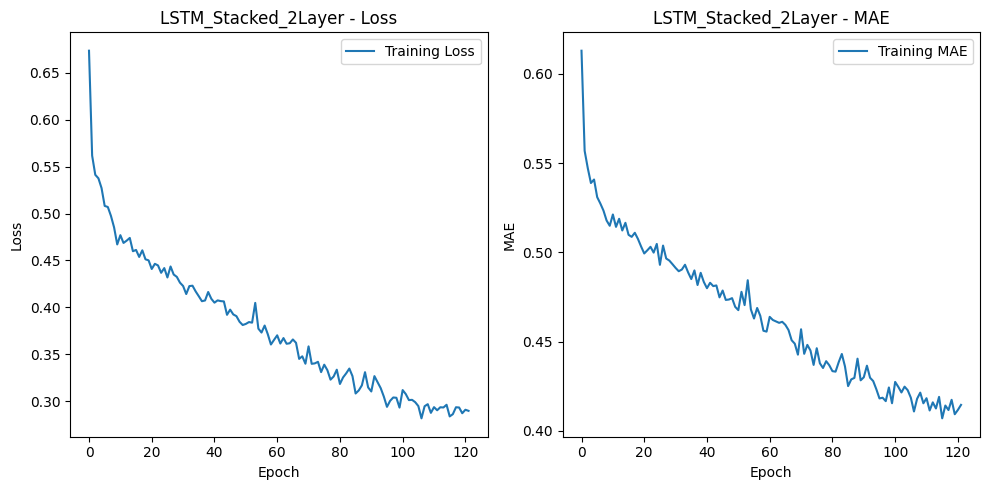

Evaluating on test set...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 839ms/step


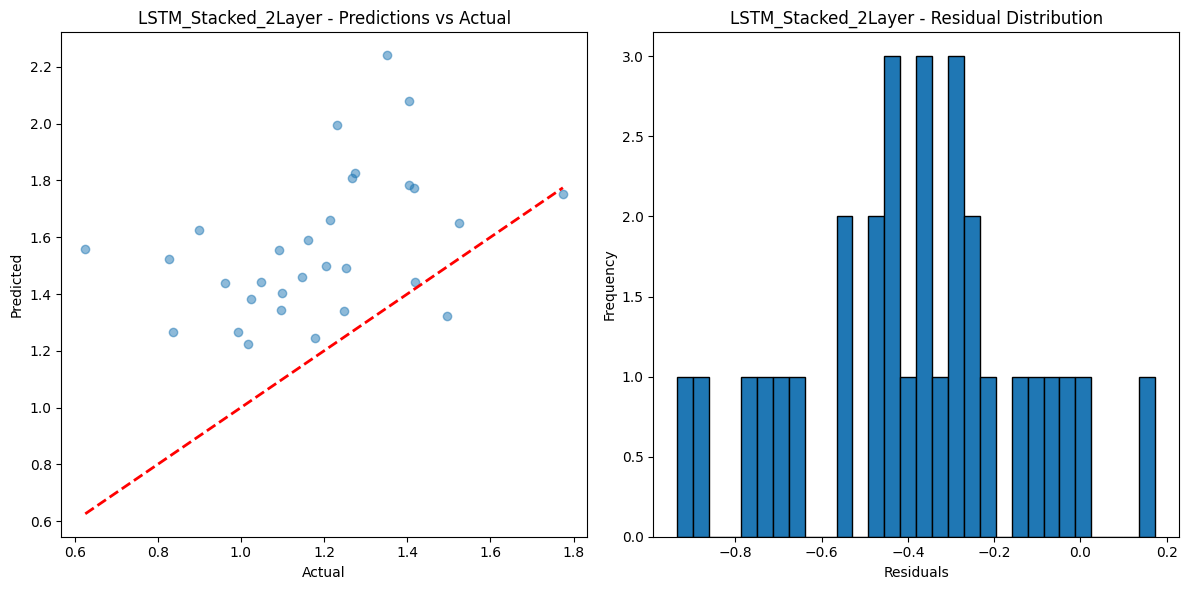

2025/05/15 02:27:32 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/05/15 02:27:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'LSTM_LSTM_Stacked_2Layer_juanplv04' already exists. Creating a new version of this model...
2025/05/15 02:27:45 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LSTM_LSTM_Stacked_2Layer_juanplv04, version 2
Created version '2' of model 'LSTM_LSTM_Stacked_2Layer_juanplv04'.



LSTM_Stacked_2Layer Results:
Test RMSE: 0.4637
Test MAE: 0.3965
Test R2: -2.9118
Training Time: 121.12 seconds
🏃 View run LSTM_Stacked_2Layer_juanplv04 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/24/runs/3706d81e25cf4bb9afaaaa24f78c5fcb
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/24

LSTM Model 2 training completed and logged to MLflow!


In [42]:
# Function to create LSTM Model 2 (Stacked LSTM)
def create_lstm_model_2(input_shape, learning_rate=0.001):
    """Stacked LSTM with two LSTM layers"""
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.LSTM(100, activation='relu', return_sequences=True),
        layers.Dropout(0.2),
        layers.LSTM(50, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(50),
        layers.Dense(1)
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )
    return model

# Define model configuration for LSTM Model 2
model_config_2 = {
    'name': 'LSTM_Stacked_2Layer',
    'create_func': create_lstm_model_2,
    'learning_rate': 0.0005,
    'batch_size': 64,
    'epochs': 150
}

# Train and evaluate the second LSTM model
results_lstm_2 = train_and_evaluate_lstm(
    X_train_seq, y_train_seq,
    X_test_seq, y_test_seq,
    model_config_2, scaler_y
)

print("\nLSTM Model 2 training completed and logged to MLflow!")


Creating LSTM_Bidirectional...


Training LSTM_Bidirectional...
Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - loss: 0.7784 - mae: 0.6648 - learning_rate: 0.0010
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.5603 - mae: 0.5584 - learning_rate: 0.0010
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.5184 - mae: 0.5408 - learning_rate: 0.0010
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.4926 - mae: 0.5342 - learning_rate: 0.0010
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.4461 - mae: 0.5001 - learning_rate: 0.0010
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.4636 - mae: 0.5223 - learning_rate: 0.0010
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.5089 - mae: 0.5395 - learning_rate: 0.0010
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.4616 - mae: 0.5155 - learning_rate: 0.0010
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.4209 - mae: 0.4937 - learning_rate: 0.0010
Epoch 10/100
42/42 ━━━

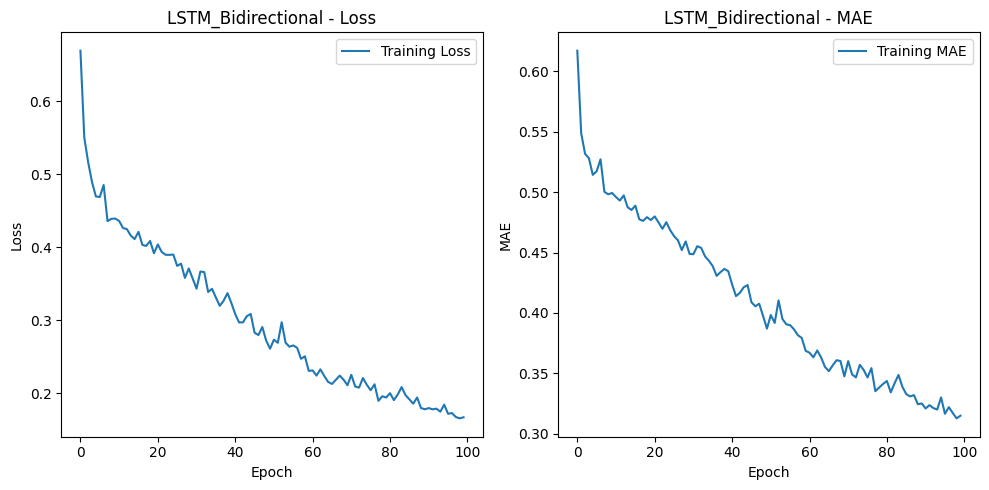

Evaluating on test set...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


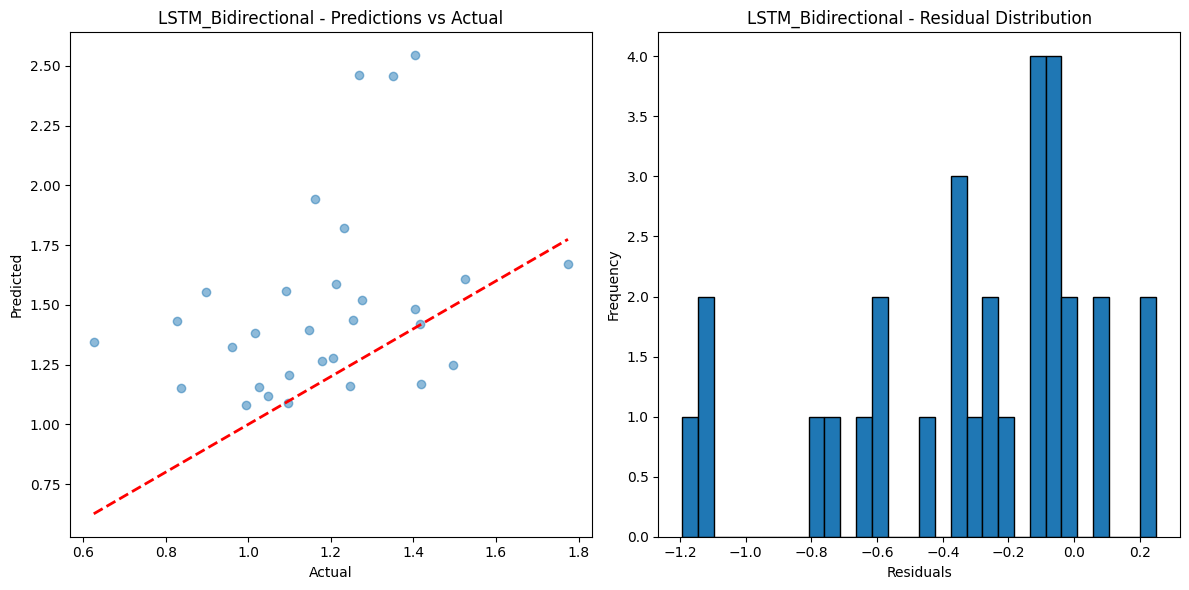

2025/05/15 02:29:38 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/05/15 02:29:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'LSTM_LSTM_Bidirectional_juanplv04' already exists. Creating a new version of this model...
2025/05/15 02:29:52 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LSTM_LSTM_Bidirectional_juanplv04, version 2
Created version '2' of model 'LSTM_LSTM_Bidirectional_juanplv04'.



LSTM_Bidirectional Results:
Test RMSE: 0.4938
Test MAE: 0.3592
Test R2: -3.4370
Training Time: 103.60 seconds
🏃 View run LSTM_Bidirectional_juanplv04 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/24/runs/fb15d0e5bad64df8b984480e16c453cd
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/24

LSTM Model 3 training completed and logged to MLflow!


In [43]:
# Function to create LSTM Model 3 (Bidirectional LSTM)
def create_lstm_model_3(input_shape, learning_rate=0.001):
    """Bidirectional LSTM with attention-like mechanism"""
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Bidirectional(layers.LSTM(64, activation='relu', return_sequences=True)),
        layers.Dropout(0.3),
        layers.Bidirectional(layers.LSTM(32, activation='relu')),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )
    return model

# Define model configuration for LSTM Model 3
model_config_3 = {
    'name': 'LSTM_Bidirectional',
    'create_func': create_lstm_model_3,
    'learning_rate': 0.001,
    'batch_size': 32,
    'epochs': 100
}

# Train and evaluate the third LSTM model
results_lstm_3 = train_and_evaluate_lstm(
    X_train_seq, y_train_seq,
    X_test_seq, y_test_seq,
    model_config_3, scaler_y
)

print("\nLSTM Model 3 training completed and logged to MLflow!")

In [44]:
# Create comparison dataframe for LSTM models
comparison_results_lstm = [results_lstm_1, results_lstm_2, results_lstm_3]
results_df_lstm = pd.DataFrame([
    {
        'Model': r['model_name'],
        'Test RMSE': r['test_rmse'],
        'Test MAE': r['test_mae'],
        'Test R2': r['test_r2'],
        'Training Time (s)': r['training_time']
    }
    for r in comparison_results_lstm
])

# Display comparison table
print("LSTM Models Comparison")
print("="*50)
print(results_df_lstm.to_string())

# Find best model
best_model_idx = results_df_lstm['Test R2'].idxmax()
best_model_name = results_df_lstm.iloc[best_model_idx]['Model']
print(f"\nBest LSTM model based on R2 score: {best_model_name}")

LSTM Models Comparison
                 Model  Test RMSE  Test MAE   Test R2  Training Time (s)
0   LSTM_Simple_Single   0.340354  0.257799 -1.107770          93.878096
1  LSTM_Stacked_2Layer   0.463666  0.396483 -2.911750         121.118312
2   LSTM_Bidirectional   0.493814  0.359237 -3.436972         103.604038

Best LSTM model based on R2 score: LSTM_Simple_Single


### Modelos multi Conv-Lstm :

In [45]:
# Set MLflow experiment for Conv-LSTM
mlflow.set_experiment("ConvLSTM_Energy_Forecasting")

<Experiment: artifact_location='mlflow-artifacts:/38038efd42cc4eaea53bb56a95d85efa', creation_time=1747257624270, experiment_id='25', last_update_time=1747257624270, lifecycle_stage='active', name='ConvLSTM_Energy_Forecasting', tags={}>

In [46]:
def train_and_evaluate_convlstm(X_train_seq, y_train_seq, X_test_seq, y_test_seq,
                               model_config, scaler_y):
    """Train and evaluate Conv-LSTM model with MLflow logging"""

    # Reshape data for Conv1D: (samples, timesteps, features)
    # No change needed as Conv1D works with this shape

    # Log dataset information
    dataset_info = {
        "train_samples": len(X_train_seq),
        "test_samples": len(X_test_seq),
        "sequence_length": X_train_seq.shape[1],
        "n_features": X_train_seq.shape[2],
        "student": "juanplv04"
    }

    with mlflow.start_run(run_name=f"{model_config['name']}_juanplv04"):
        # Log parameters
        mlflow.log_params({
            **dataset_info,
            "model_name": model_config['name'],
            "learning_rate": model_config['learning_rate'],
            "batch_size": model_config['batch_size'],
            "epochs": model_config['epochs']
        })

        # Create model
        print(f"\nCreating {model_config['name']}...")
        model = model_config['create_func'](
            X_train_seq.shape[1:],  # (sequence_length, n_features)
            model_config['learning_rate']
        )

        # Log model architecture
        stringlist = []
        model.summary(print_fn=lambda x: stringlist.append(x))
        model_summary = "\n".join(stringlist)
        mlflow.log_text(model_summary, "model_summary.txt")
        mlflow.log_param("total_params", model.count_params())

        # Callbacks
        early_stopping = keras.callbacks.EarlyStopping(
            monitor='loss',
            patience=15,
            restore_best_weights=True
        )

        reduce_lr = keras.callbacks.ReduceLROnPlateau(
            monitor='loss',
            factor=0.5,
            patience=7,
            min_lr=0.00001
        )

        # Custom callback to log metrics to MLflow
        class MLflowCallback(keras.callbacks.Callback):
            def on_epoch_end(self, epoch, logs=None):
                mlflow.log_metrics({
                    "train_loss": logs['loss'],
                    "train_mae": logs['mae']
                }, step=epoch)

        mlflow_callback = MLflowCallback()

        # Train the model
        print(f"Training {model_config['name']}...")
        start_time = time.time()

        history = model.fit(
            X_train_seq, y_train_seq,
            epochs=model_config['epochs'],
            batch_size=model_config['batch_size'],
            callbacks=[early_stopping, reduce_lr, mlflow_callback],
            verbose=1
        )

        training_time = time.time() - start_time
        mlflow.log_metric("training_time_seconds", training_time)

        # Plot training history
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.title(f'{model_config["name"]} - Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['mae'], label='Training MAE')
        plt.title(f'{model_config["name"]} - MAE')
        plt.xlabel('Epoch')
        plt.ylabel('MAE')
        plt.legend()

        plt.tight_layout()
        mlflow.log_figure(plt.gcf(), "training_history.png")
        plt.show()

        # Evaluate on test set
        print("Evaluating on test set...")
        y_pred_scaled = model.predict(X_test_seq)

        # Inverse transform predictions and true values
        y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
        y_true = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1))

        # Calculate metrics
        test_mse = mean_squared_error(y_true, y_pred)
        test_mae = mean_absolute_error(y_true, y_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_true, y_pred)

        # Log test metrics
        mlflow.log_metrics({
            "test_mse": test_mse,
            "test_mae": test_mae,
            "test_rmse": test_rmse,
            "test_r2": test_r2
        })

        # Plot predictions vs actual
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.scatter(y_true, y_pred, alpha=0.5)
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title(f'{model_config["name"]} - Predictions vs Actual')

        plt.subplot(1, 2, 2)
        residuals = y_true.flatten() - y_pred.flatten()
        plt.hist(residuals, bins=30, edgecolor='black')
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.title(f'{model_config["name"]} - Residual Distribution')

        plt.tight_layout()
        mlflow.log_figure(plt.gcf(), "test_predictions.png")
        plt.show()

        # Log the model
        mlflow.tensorflow.log_model(
            model,
            artifact_path=f"models/{model_config['name']}",
            registered_model_name=f"ConvLSTM_{model_config['name']}_juanplv04"
        )

        # Save test predictions
        predictions_df = pd.DataFrame({
            'actual': y_true.flatten(),
            'predicted': y_pred.flatten(),
            'residual': residuals
        })
        predictions_df.to_csv('test_predictions.csv', index=False)
        mlflow.log_artifact('test_predictions.csv')

        print(f"\n{model_config['name']} Results:")
        print(f"Test RMSE: {test_rmse:.4f}")
        print(f"Test MAE: {test_mae:.4f}")
        print(f"Test R2: {test_r2:.4f}")
        print(f"Training Time: {training_time:.2f} seconds")

        # Return results for comparison
        return {
            'model_name': model_config['name'],
            'test_rmse': test_rmse,
            'test_mae': test_mae,
            'test_r2': test_r2,
            'training_time': training_time,
            'model': model,
            'history': history
        }


Creating ConvLSTM_Simple...


Training ConvLSTM_Simple...
Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.8610 - mae: 0.6973 - learning_rate: 0.0010
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5168 - mae: 0.5352 - learning_rate: 0.0010
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4693 - mae: 0.5074 - learning_rate: 0.0010
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5045 - mae: 0.5389 - learning_rate: 0.0010
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4960 - mae: 0.5237 - learning_rate: 0.0010
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4445 - mae: 0.5015 - learning_rate: 0.0010
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4240 - mae: 0.4945 - learning_rate: 0.0010
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4109 - mae: 0.4810 - learning_rate: 0.0010
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4250 - mae: 0.4941 - learning_rate: 0.0010
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━

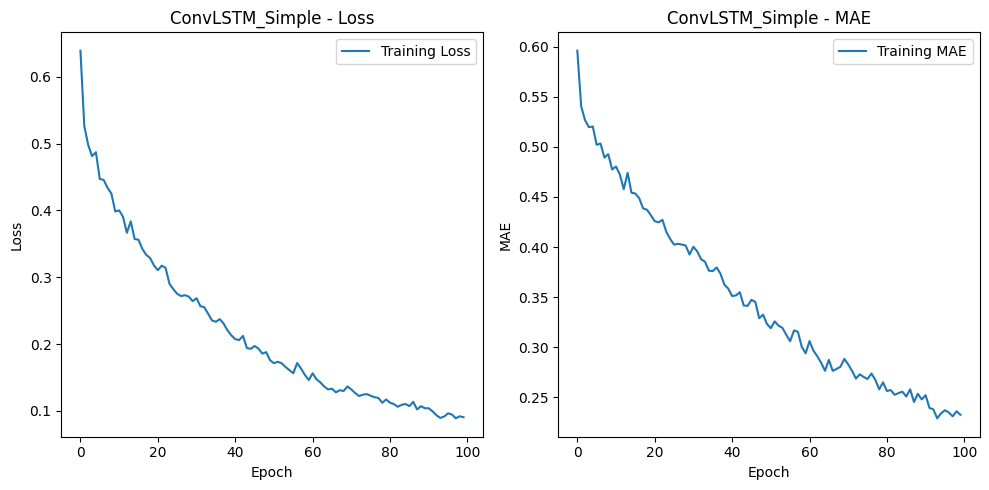

Evaluating on test set...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


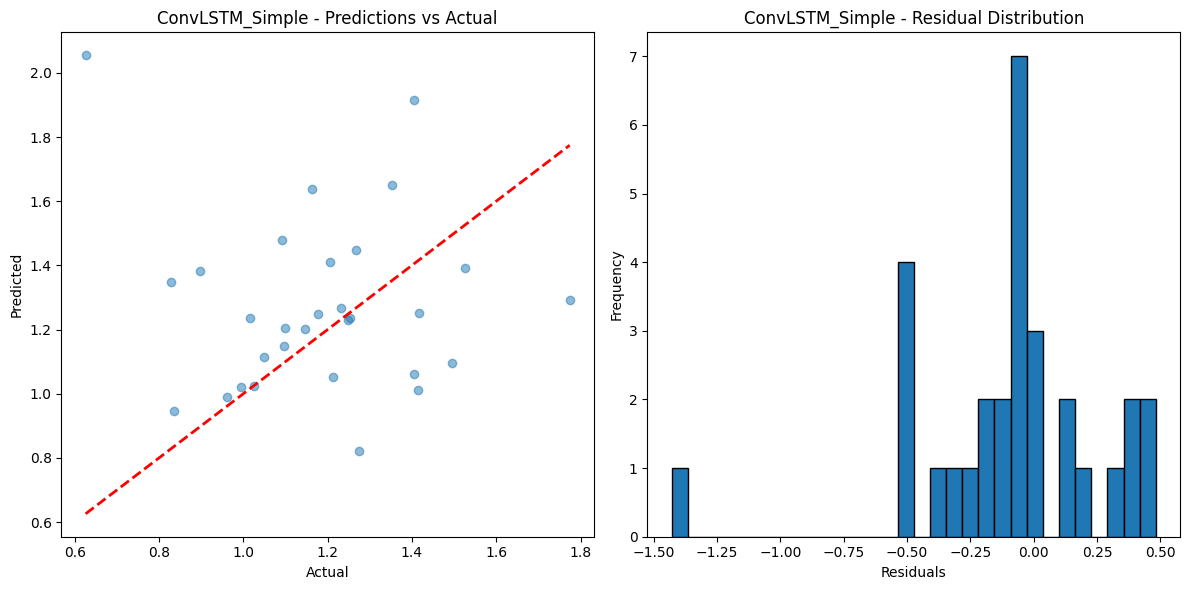

2025/05/15 02:32:01 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/05/15 02:32:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'ConvLSTM_ConvLSTM_Simple_juanplv04' already exists. Creating a new version of this model...
2025/05/15 02:32:14 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: ConvLSTM_ConvLSTM_Simple_juanplv04, version 2
Created version '2' of model 'ConvLSTM_ConvLSTM_Simple_juanplv04'.



ConvLSTM_Simple Results:
Test RMSE: 0.3826
Test MAE: 0.2616
Test R2: -1.6630
Training Time: 95.47 seconds
🏃 View run ConvLSTM_Simple_juanplv04 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/25/runs/9bd5d46977884fc7bc6abcaa60ba2084
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/25

Conv-LSTM Model 1 training completed and logged to MLflow!


In [47]:
# Function to create Conv-LSTM Model 1 (Simple Conv-LSTM)
def create_convlstm_model_1(input_shape, learning_rate=0.001):
    """Simple Conv-LSTM: Conv1D + LSTM"""
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        # Convolutional layers
        layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        # LSTM layer
        layers.LSTM(50, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1)
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )
    return model

# Define model configuration for Conv-LSTM Model 1
model_config_1 = {
    'name': 'ConvLSTM_Simple',
    'create_func': create_convlstm_model_1,
    'learning_rate': 0.001,
    'batch_size': 32,
    'epochs': 100
}

# Train and evaluate the first Conv-LSTM model
results_convlstm_1 = train_and_evaluate_convlstm(
    X_train_seq, y_train_seq,
    X_test_seq, y_test_seq,
    model_config_1, scaler_y
)

print("\nConv-LSTM Model 1 training completed and logged to MLflow!")


Creating ConvLSTM_Stacked...


Training ConvLSTM_Stacked...
Epoch 1/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 214ms/step - loss: 0.7084 - mae: 0.6316 - learning_rate: 5.0000e-04
Epoch 2/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5515 - mae: 0.5546 - learning_rate: 5.0000e-04
Epoch 3/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5434 - mae: 0.5520 - learning_rate: 5.0000e-04
Epoch 4/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4915 - mae: 0.5304 - learning_rate: 5.0000e-04
Epoch 5/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4942 - mae: 0.5404 - learning_rate: 5.0000e-04
Epoch 6/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4543 - mae: 0.5175 - learning_rate: 5.0000e-04
Epoch 7/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4321 - mae: 0.5061 - learning_rate: 5.0000e-04
Epoch 8/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4370 - mae: 0.5036 - learning_rate: 5.0000e-04
Epoch 9/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3734 - mae: 0.4676 - learning_rate:

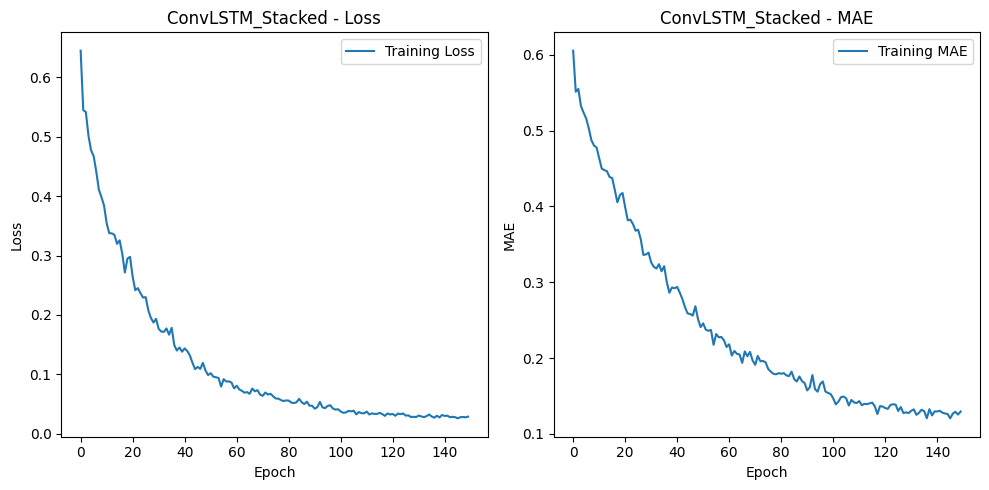

Evaluating on test set...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 933ms/step


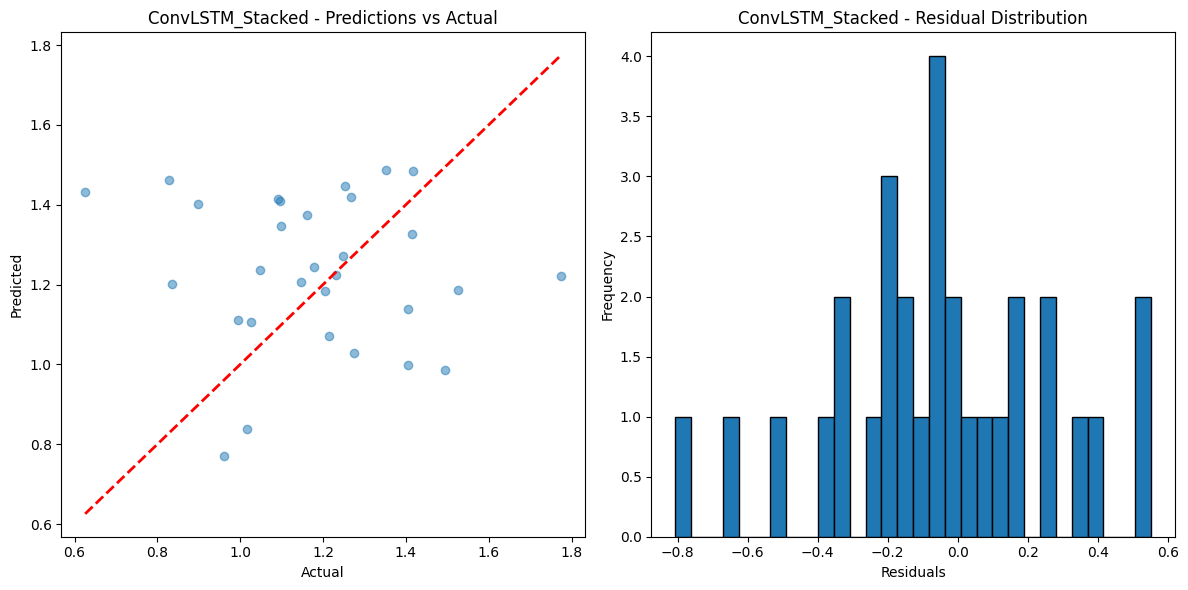

2025/05/15 02:34:57 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/05/15 02:35:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'ConvLSTM_ConvLSTM_Stacked_juanplv04' already exists. Creating a new version of this model...
2025/05/15 02:35:12 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: ConvLSTM_ConvLSTM_Stacked_juanplv04, version 2
Created version '2' of model 'ConvLSTM_ConvLSTM_Stacked_juanplv04'.



ConvLSTM_Stacked Results:
Test RMSE: 0.3146
Test MAE: 0.2478
Test R2: -0.8009
Training Time: 152.24 seconds
🏃 View run ConvLSTM_Stacked_juanplv04 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/25/runs/808f7bce897c4253ac736a29b551dfe8
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/25

Conv-LSTM Model 2 training completed and logged to MLflow!


In [48]:
# Function to create Conv-LSTM Model 2 (Stacked Conv-LSTM)
def create_convlstm_model_2(input_shape, learning_rate=0.001):
    """Stacked Conv-LSTM: Multiple Conv1D + Stacked LSTM"""
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        # Convolutional layers
        layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
        layers.BatchNormalization(),
        # LSTM layers
        layers.LSTM(100, activation='relu', return_sequences=True),
        layers.Dropout(0.3),
        layers.LSTM(50, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(50),
        layers.Dense(1)
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )
    return model

# Define model configuration for Conv-LSTM Model 2
model_config_2 = {
    'name': 'ConvLSTM_Stacked',
    'create_func': create_convlstm_model_2,
    'learning_rate': 0.0005,
    'batch_size': 64,
    'epochs': 150
}

# Train and evaluate the second Conv-LSTM model
results_convlstm_2 = train_and_evaluate_convlstm(
    X_train_seq, y_train_seq,
    X_test_seq, y_test_seq,
    model_config_2, scaler_y
)

print("\nConv-LSTM Model 2 training completed and logged to MLflow!")


Creating ConvLSTM_MultiScale_BiLSTM...


Training ConvLSTM_MultiScale_BiLSTM...
Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 17s 137ms/step - loss: 0.7609 - mae: 0.6615 - learning_rate: 0.0010
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.5901 - mae: 0.5797 - learning_rate: 0.0010
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5495 - mae: 0.5384 - learning_rate: 0.0010
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.5630 - mae: 0.5678 - learning_rate: 0.0010
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5524 - mae: 0.5610 - learning_rate: 0.0010
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4880 - mae: 0.5329 - learning_rate: 0.0010
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4683 - mae: 0.5175 - learning_rate: 0.0010
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4480 - mae: 0.5028 - learning_rate: 0.0010
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4023 - mae: 0.4862 - learning_rate: 0.0010
Epoch 10/100
4

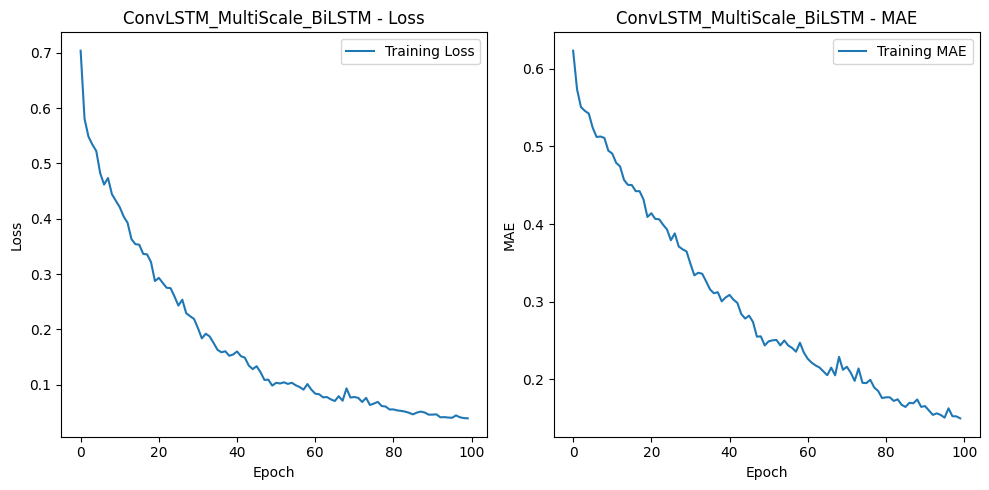

Evaluating on test set...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


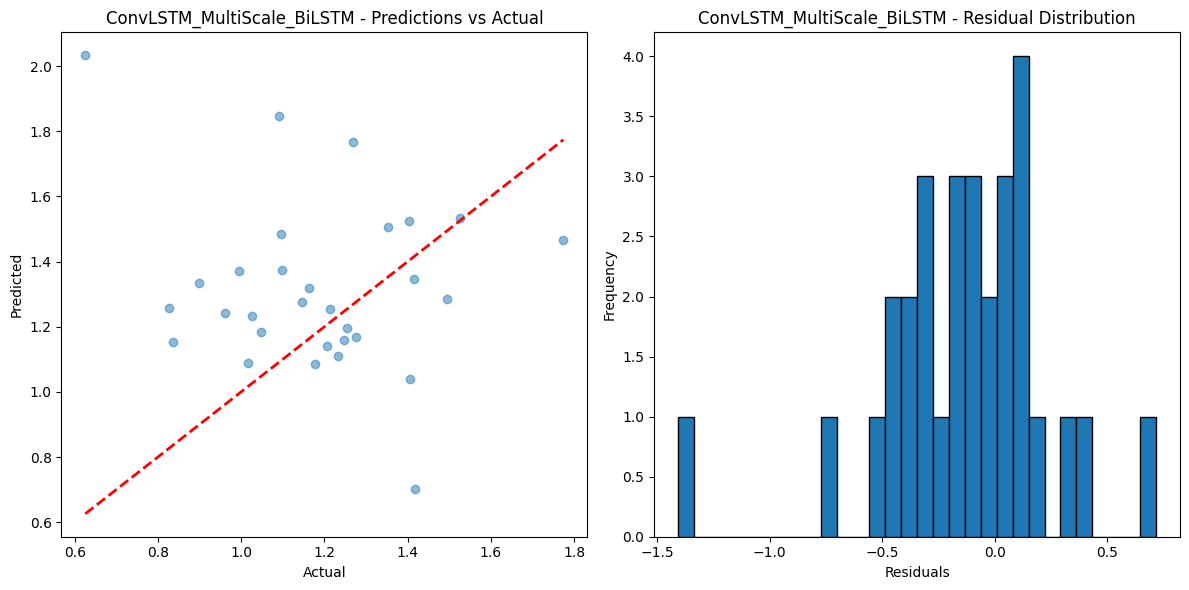

2025/05/15 02:38:08 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/05/15 02:38:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'ConvLSTM_ConvLSTM_MultiScale_BiLSTM_juanplv04' already exists. Creating a new version of this model...
2025/05/15 02:38:21 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: ConvLSTM_ConvLSTM_MultiScale_BiLSTM_juanplv04, version 2
Created version '2' of model 'ConvLSTM_ConvLSTM_MultiScale_BiLSTM_juanplv04'.



ConvLSTM_MultiScale_BiLSTM Results:
Test RMSE: 0.3965
Test MAE: 0.2798
Test R2: -1.8606
Training Time: 106.02 seconds
🏃 View run ConvLSTM_MultiScale_BiLSTM_juanplv04 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/25/runs/5a415c5c141f4589b3efb9ef6298bf7c
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/25

Conv-LSTM Model 3 training completed and logged to MLflow!


In [49]:
# Function to create Conv-LSTM Model 3 (Multi-scale Conv-LSTM)
def create_convlstm_model_3(input_shape, learning_rate=0.001):
    """Multi-scale Conv-LSTM: Parallel conv layers + Bidirectional LSTM"""
    inputs = layers.Input(shape=input_shape)

    # Multi-scale convolutional feature extraction
    # Small kernel
    conv1 = layers.Conv1D(filters=32, kernel_size=2, activation='relu', padding='same')(inputs)
    pool1 = layers.MaxPooling1D(pool_size=2)(conv1)

    # Medium kernel
    conv2 = layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(inputs)
    pool2 = layers.MaxPooling1D(pool_size=2)(conv2)

    # Large kernel
    conv3 = layers.Conv1D(filters=32, kernel_size=5, activation='relu', padding='same')(inputs)
    pool3 = layers.MaxPooling1D(pool_size=2)(conv3)

    # Concatenate multi-scale features
    concatenated = layers.Concatenate()([pool1, pool2, pool3])

    # Bidirectional LSTM
    lstm1 = layers.Bidirectional(layers.LSTM(64, activation='relu', return_sequences=True))(concatenated)
    lstm1 = layers.Dropout(0.3)(lstm1)
    lstm2 = layers.Bidirectional(layers.LSTM(32, activation='relu'))(lstm1)
    lstm2 = layers.Dropout(0.2)(lstm2)

    # Dense layers
    dense1 = layers.Dense(64, activation='relu')(lstm2)
    dense2 = layers.Dense(32, activation='relu')(dense1)
    outputs = layers.Dense(1)(dense2)

    model = keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )
    return model

# Define model configuration for Conv-LSTM Model 3
model_config_3 = {
    'name': 'ConvLSTM_MultiScale_BiLSTM',
    'create_func': create_convlstm_model_3,
    'learning_rate': 0.001,
    'batch_size': 32,
    'epochs': 100
}

# Train and evaluate the third Conv-LSTM model
results_convlstm_3 = train_and_evaluate_convlstm(
    X_train_seq, y_train_seq,
    X_test_seq, y_test_seq,
    model_config_3, scaler_y
)

print("\nConv-LSTM Model 3 training completed and logged to MLflow!")

In [50]:
# Create comparison dataframe for convlstm models
comparison_results_convlstm = [results_convlstm_1, results_convlstm_2, results_convlstm_3]
results_df_convlstm = pd.DataFrame([
    {
        'Model': r['model_name'],
        'Test RMSE': r['test_rmse'],
        'Test MAE': r['test_mae'],
        'Test R2': r['test_r2'],
        'Training Time (s)': r['training_time']
    }
    for r in comparison_results_convlstm
])

# Display comparison table
print("convlstm Models Comparison")
print("="*50)
print(results_df_convlstm.to_string())

# Find best model
best_model_idx = results_df_convlstm['Test R2'].idxmax()
best_model_name = results_df_convlstm.iloc[best_model_idx]['Model']
print(f"\nBest convlstm model based on R2 score: {best_model_name}")

convlstm Models Comparison
                        Model  Test RMSE  Test MAE   Test R2  Training Time (s)
0             ConvLSTM_Simple   0.382563  0.261560 -1.662969          95.473105
1            ConvLSTM_Stacked   0.314604  0.247822 -0.800900         152.241215
2  ConvLSTM_MultiScale_BiLSTM   0.396506  0.279794 -1.860622         106.016826

Best convlstm model based on R2 score: ConvLSTM_Stacked


In [51]:
# Create comparison dataframe for all models
comparison_results_convlstm = [results_convlstm_1, results_convlstm_2, results_convlstm_3, results_lstm_1, results_lstm_2,
                      results_lstm_3, results_cnn_1, results_cnn_2, results_cnn_3, results_1, results_2, results_3]
results_df_convlstm = pd.DataFrame([
    {
        'Model': r['model_name'],
        'Test RMSE': r['test_rmse'],
        'Test MAE': r['test_mae'],
        'Test R2': r['test_r2'],
        'Training Time (s)': r['training_time']
    }
    for r in comparison_results_convlstm
])

# Display comparison table
print("convlstm Models Comparison")
print("="*50)
print(results_df_convlstm.to_string())

# Find best model
best_model_idx = results_df_convlstm['Test R2'].idxmax()
best_model_name = results_df_convlstm.iloc[best_model_idx]['Model']
print(f"\nBest Multivariate model based on R2 score: {best_model_name}")

convlstm Models Comparison
                         Model  Test RMSE  Test MAE   Test R2  Training Time (s)
0              ConvLSTM_Simple   0.382563  0.261560 -1.662969          95.473105
1             ConvLSTM_Stacked   0.314604  0.247822 -0.800900         152.241215
2   ConvLSTM_MultiScale_BiLSTM   0.396506  0.279794 -1.860622         106.016826
3           LSTM_Simple_Single   0.340354  0.257799 -1.107770          93.878096
4          LSTM_Stacked_2Layer   0.463666  0.396483 -2.911750         121.118312
5           LSTM_Bidirectional   0.493814  0.359237 -3.436972         103.604038
6             CNN_Simple_2Conv   0.312834  0.245072 -0.780687          94.791165
7            CNN_Deep_3Conv_BN   0.406316  0.322345 -2.003918         148.491529
8              CNN_MultiBranch   0.315613  0.254065 -0.812465          95.857596
9            MLP_Simple_2Layer   0.026503  0.021566  0.989755          84.650492
10          MLP_Deep_4Layer_BN   0.035376  0.029049  0.981746          66.765003
1

### Optuna para el multivariado :

In [52]:
# Create a new experiment for optimization
mlflow.set_experiment("MLP_Optimization")

<Experiment: artifact_location='mlflow-artifacts:/1869e84a8ed14bdfa6126fccd7b71189', creation_time=1747259100802, experiment_id='26', last_update_time=1747259100802, lifecycle_stage='active', name='MLP_Optimization', tags={}>

In [53]:
def create_optimized_mlp_model(input_shape, trial):
    """Create MLP model with Optuna hyperparameter tuning"""
    # Hyperparameters to optimize
    n_layers = trial.suggest_int('n_layers', 1, 4)

    model = keras.Sequential()
    model.add(layers.Input(shape=(input_shape,)))

    # Add hidden layers
    for i in range(n_layers):
        n_units = trial.suggest_int(f'n_units_l{i}', 16, 256, step=16)
        activation = trial.suggest_categorical(f'activation_l{i}', ['relu', 'tanh', 'sigmoid'])
        model.add(layers.Dense(n_units, activation=activation))

        # Dropout rate for each layer
        dropout_rate = trial.suggest_float(f'dropout_l{i}', 0.0, 0.5, step=0.1)
        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate))

    # Output layer
    model.add(layers.Dense(1))

    # Optimizer parameters
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
    optimizer_name = trial.suggest_categorical('optimizer', ['adam', 'sgd', 'rmsprop'])

    if optimizer_name == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_name == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['mae']
    )

    return model

In [54]:
def objective(trial):
    """Optuna objective function for hyperparameter optimization"""
    # Start MLflow run for this trial
    with mlflow.start_run(run_name=f"trial_{trial.number}"):
        # Log trial parameters
        mlflow.log_params(trial.params)
        mlflow.log_param("trial_number", trial.number)
        mlflow.log_param("student", "juanplv04")

        # Create model with trial parameters
        model = create_optimized_mlp_model(X_train_mlp.shape[1], trial)

        # Hyperparameters for training
        batch_size = trial.suggest_int('batch_size', 16, 128, step=16)
        epochs = trial.suggest_int('epochs', 50, 200, step=25)

        # Log additional parameters
        mlflow.log_param("batch_size", batch_size)
        mlflow.log_param("epochs", epochs)

        # Split train data for validation (80/20)
        val_split = 0.2
        val_size = int(len(X_train_mlp) * val_split)

        X_train = X_train_mlp[:-val_size]
        y_train = y_train_mlp[:-val_size]
        X_val = X_train_mlp[-val_size:]
        y_val = y_train_mlp[-val_size:]

        # Callbacks with adjusted early stopping
        early_stopping = keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=20,  # More patient to allow proper training
            restore_best_weights=True,
            min_delta=0.0001  # Minimum improvement threshold
        )

        reduce_lr = keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=10,
            min_lr=1e-6
        )

        # Train model
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=0  # Suppress output for cleaner optimization
        )

        # Log training metrics
        mlflow.log_metric("final_train_loss", history.history['loss'][-1])
        mlflow.log_metric("final_val_loss", history.history['val_loss'][-1])
        mlflow.log_metric("epochs_trained", len(history.history['loss']))

        # Evaluate on validation set
        y_pred_val = model.predict(X_val)
        val_r2 = r2_score(y_val, y_pred_val)

        # Evaluate on test set
        y_pred_test_scaled = model.predict(X_test_mlp)
        y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled.reshape(-1, 1))
        y_true_test = scaler_y.inverse_transform(y_test_mlp.reshape(-1, 1))

        test_r2 = r2_score(y_true_test, y_pred_test)
        test_rmse = np.sqrt(mean_squared_error(y_true_test, y_pred_test))
        test_mae = mean_absolute_error(y_true_test, y_pred_test)

        # Log test metrics
        mlflow.log_metric("val_r2", val_r2)
        mlflow.log_metric("test_r2", test_r2)
        mlflow.log_metric("test_rmse", test_rmse)
        mlflow.log_metric("test_mae", test_mae)

        # Save model architecture
        stringlist = []
        model.summary(print_fn=lambda x: stringlist.append(x))
        model_summary = "\n".join(stringlist)
        mlflow.log_text(model_summary, "model_summary.txt")

        # Optuna will minimize the objective, so we return negative R2
        return -val_r2  # We want to maximize R2, so minimize negative R2

In [55]:
# Run Optuna optimization
study = optuna.create_study(
    direction='minimize',  # Minimizing negative R2 = maximizing R2
    study_name='mlp_optimization',
    storage=None  # Use in-memory storage for simplicity
)

# Optimize
print("Starting Optuna optimization...")
study.optimize(objective, n_trials=50)  # You can increase n_trials for more extensive search

# Get best parameters
best_params = study.best_params
best_value = -study.best_value  # Convert back to positive R2

print(f"\nBest trial:")
print(f"R2 Score: {best_value:.4f}")
print(f"Best parameters: {best_params}")

[I 2025-05-15 02:39:44,503] A new study created in memory with name: mlp_optimization


Starting Optuna optimization...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


[I 2025-05-15 02:40:05,752] Trial 0 finished with value: -0.055061315153530965 and parameters: {'n_layers': 3, 'n_units_l0': 96, 'activation_l0': 'relu', 'dropout_l0': 0.1, 'n_units_l1': 112, 'activation_l1': 'sigmoid', 'dropout_l1': 0.5, 'n_units_l2': 208, 'activation_l2': 'tanh', 'dropout_l2': 0.5, 'learning_rate': 5.625026484977289e-05, 'optimizer': 'sgd', 'batch_size': 64, 'epochs': 100}. Best is trial 0 with value: -0.055061315153530965.


🏃 View run trial_0 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/d0fce1dac01e44c4bc6a6d1ba0793472
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


[I 2025-05-15 02:40:30,690] Trial 1 finished with value: -0.8825536783631357 and parameters: {'n_layers': 3, 'n_units_l0': 16, 'activation_l0': 'tanh', 'dropout_l0': 0.2, 'n_units_l1': 240, 'activation_l1': 'sigmoid', 'dropout_l1': 0.0, 'n_units_l2': 144, 'activation_l2': 'sigmoid', 'dropout_l2': 0.1, 'learning_rate': 2.7004943553577377e-05, 'optimizer': 'rmsprop', 'batch_size': 96, 'epochs': 125}. Best is trial 1 with value: -0.8825536783631357.


🏃 View run trial_1 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/c08b4a364acf455a85a27d94727ea8a3
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


[I 2025-05-15 02:40:45,979] Trial 2 finished with value: -0.9991630307216445 and parameters: {'n_layers': 1, 'n_units_l0': 208, 'activation_l0': 'relu', 'dropout_l0': 0.2, 'learning_rate': 0.0029641330936847165, 'optimizer': 'adam', 'batch_size': 96, 'epochs': 125}. Best is trial 2 with value: -0.9991630307216445.


🏃 View run trial_2 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/9ddba73b4a9746a6aefbeab7b6e7d383
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


[I 2025-05-15 02:41:06,933] Trial 3 finished with value: -0.9520207473091995 and parameters: {'n_layers': 3, 'n_units_l0': 224, 'activation_l0': 'sigmoid', 'dropout_l0': 0.4, 'n_units_l1': 80, 'activation_l1': 'tanh', 'dropout_l1': 0.2, 'n_units_l2': 208, 'activation_l2': 'sigmoid', 'dropout_l2': 0.1, 'learning_rate': 0.006949353611070846, 'optimizer': 'sgd', 'batch_size': 80, 'epochs': 175}. Best is trial 2 with value: -0.9991630307216445.


🏃 View run trial_3 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/fbdefafac4054113a27e14f72671b2a2
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


[I 2025-05-15 02:41:23,371] Trial 4 finished with value: -0.9975943006097664 and parameters: {'n_layers': 2, 'n_units_l0': 32, 'activation_l0': 'relu', 'dropout_l0': 0.2, 'n_units_l1': 64, 'activation_l1': 'sigmoid', 'dropout_l1': 0.0, 'learning_rate': 0.004184089437834533, 'optimizer': 'rmsprop', 'batch_size': 64, 'epochs': 100}. Best is trial 2 with value: -0.9991630307216445.


🏃 View run trial_4 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/46a88b646afb484faa9a004436ba7c89
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


[I 2025-05-15 02:41:43,806] Trial 5 finished with value: -0.9990236275386246 and parameters: {'n_layers': 2, 'n_units_l0': 128, 'activation_l0': 'tanh', 'dropout_l0': 0.5, 'n_units_l1': 208, 'activation_l1': 'tanh', 'dropout_l1': 0.5, 'learning_rate': 0.0036396918419913157, 'optimizer': 'rmsprop', 'batch_size': 80, 'epochs': 150}. Best is trial 2 with value: -0.9991630307216445.


🏃 View run trial_5 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/d72a3b5a217a47368cab47471cc2996a
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


🏃 View run trial_6 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/9f31c20d2c904c6bb7ba28b74709bfe2
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26


[I 2025-05-15 02:41:58,003] Trial 6 finished with value: -0.3308929309401043 and parameters: {'n_layers': 1, 'n_units_l0': 208, 'activation_l0': 'sigmoid', 'dropout_l0': 0.0, 'learning_rate': 2.175038523419653e-05, 'optimizer': 'rmsprop', 'batch_size': 96, 'epochs': 50}. Best is trial 2 with value: -0.9991630307216445.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


[I 2025-05-15 02:42:18,227] Trial 7 finished with value: -0.7920834391015363 and parameters: {'n_layers': 2, 'n_units_l0': 256, 'activation_l0': 'sigmoid', 'dropout_l0': 0.2, 'n_units_l1': 224, 'activation_l1': 'tanh', 'dropout_l1': 0.5, 'learning_rate': 0.0004227855239980116, 'optimizer': 'sgd', 'batch_size': 64, 'epochs': 75}. Best is trial 2 with value: -0.9991630307216445.


🏃 View run trial_7 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/2217421d63524ec095d1e9ecdf3348dc
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


[I 2025-05-15 02:42:45,300] Trial 8 finished with value: -0.689038648786676 and parameters: {'n_layers': 1, 'n_units_l0': 192, 'activation_l0': 'relu', 'dropout_l0': 0.0, 'learning_rate': 3.6815779161067594e-05, 'optimizer': 'sgd', 'batch_size': 48, 'epochs': 150}. Best is trial 2 with value: -0.9991630307216445.


🏃 View run trial_8 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/62e4b0800caf4acc81db01ba59a4bc10
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


[I 2025-05-15 02:43:17,237] Trial 9 finished with value: -0.9892586906021069 and parameters: {'n_layers': 3, 'n_units_l0': 16, 'activation_l0': 'tanh', 'dropout_l0': 0.1, 'n_units_l1': 160, 'activation_l1': 'tanh', 'dropout_l1': 0.1, 'n_units_l2': 112, 'activation_l2': 'tanh', 'dropout_l2': 0.5, 'learning_rate': 8.753081189974395e-05, 'optimizer': 'adam', 'batch_size': 32, 'epochs': 200}. Best is trial 2 with value: -0.9991630307216445.


🏃 View run trial_9 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/3a3ef13a08144154a24644f9ff3401b5
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


[I 2025-05-15 02:43:33,047] Trial 10 finished with value: -0.9645444930234417 and parameters: {'n_layers': 4, 'n_units_l0': 176, 'activation_l0': 'relu', 'dropout_l0': 0.4, 'n_units_l1': 16, 'activation_l1': 'relu', 'dropout_l1': 0.30000000000000004, 'n_units_l2': 32, 'activation_l2': 'relu', 'dropout_l2': 0.0, 'n_units_l3': 240, 'activation_l3': 'relu', 'dropout_l3': 0.5, 'learning_rate': 0.0009366567527118855, 'optimizer': 'adam', 'batch_size': 128, 'epochs': 125}. Best is trial 2 with value: -0.9991630307216445.


🏃 View run trial_10 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/84830a532c35479ab0048402bf18eebc
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


[I 2025-05-15 02:43:47,634] Trial 11 finished with value: -0.9991444749106473 and parameters: {'n_layers': 1, 'n_units_l0': 128, 'activation_l0': 'tanh', 'dropout_l0': 0.5, 'learning_rate': 0.0019561625731343408, 'optimizer': 'adam', 'batch_size': 128, 'epochs': 150}. Best is trial 2 with value: -0.9991630307216445.


🏃 View run trial_11 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/32234e3e57084c4db0411b29b218b90e
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


🏃 View run trial_12 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/a87c0cc001794c528b118acadf412b16
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26


[I 2025-05-15 02:44:03,530] Trial 12 finished with value: -0.9988294321791725 and parameters: {'n_layers': 1, 'n_units_l0': 128, 'activation_l0': 'tanh', 'dropout_l0': 0.4, 'learning_rate': 0.0014043296503582377, 'optimizer': 'adam', 'batch_size': 128, 'epochs': 150}. Best is trial 2 with value: -0.9991630307216445.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


[I 2025-05-15 02:44:23,158] Trial 13 finished with value: -0.9987387075036797 and parameters: {'n_layers': 1, 'n_units_l0': 80, 'activation_l0': 'tanh', 'dropout_l0': 0.30000000000000004, 'learning_rate': 0.0015919505058566567, 'optimizer': 'adam', 'batch_size': 112, 'epochs': 200}. Best is trial 2 with value: -0.9991630307216445.


🏃 View run trial_13 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/c673ede227574011aaa58f532558fd92
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


[I 2025-05-15 02:44:40,696] Trial 14 finished with value: -0.9858136598519448 and parameters: {'n_layers': 1, 'n_units_l0': 160, 'activation_l0': 'relu', 'dropout_l0': 0.5, 'learning_rate': 0.00018220303501246025, 'optimizer': 'adam', 'batch_size': 112, 'epochs': 100}. Best is trial 2 with value: -0.9991630307216445.


🏃 View run trial_14 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/e8d1f45e60ab4cb4afdf44301d33de24
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


[I 2025-05-15 02:44:54,983] Trial 15 finished with value: -0.997636087144534 and parameters: {'n_layers': 2, 'n_units_l0': 240, 'activation_l0': 'tanh', 'dropout_l0': 0.30000000000000004, 'n_units_l1': 176, 'activation_l1': 'relu', 'dropout_l1': 0.30000000000000004, 'learning_rate': 0.000506650520521279, 'optimizer': 'adam', 'batch_size': 112, 'epochs': 175}. Best is trial 2 with value: -0.9991630307216445.


🏃 View run trial_15 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/1ce2a7b1833649e6b85702b779dd7128
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


[I 2025-05-15 02:45:14,238] Trial 16 finished with value: -0.9849030785316326 and parameters: {'n_layers': 4, 'n_units_l0': 80, 'activation_l0': 'relu', 'dropout_l0': 0.1, 'n_units_l1': 16, 'activation_l1': 'relu', 'dropout_l1': 0.4, 'n_units_l2': 32, 'activation_l2': 'relu', 'dropout_l2': 0.30000000000000004, 'n_units_l3': 16, 'activation_l3': 'sigmoid', 'dropout_l3': 0.0, 'learning_rate': 0.009203613182190288, 'optimizer': 'adam', 'batch_size': 16, 'epochs': 175}. Best is trial 2 with value: -0.9991630307216445.


🏃 View run trial_16 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/c15b142f0aa24523be0a663a6c32d16a
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


[I 2025-05-15 02:45:31,140] Trial 17 finished with value: -0.9986996018273587 and parameters: {'n_layers': 1, 'n_units_l0': 160, 'activation_l0': 'relu', 'dropout_l0': 0.30000000000000004, 'learning_rate': 0.0023732478472486152, 'optimizer': 'adam', 'batch_size': 128, 'epochs': 125}. Best is trial 2 with value: -0.9991630307216445.


🏃 View run trial_17 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/108d8a44209243a68fff56519c9bcb25
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


[I 2025-05-15 02:45:47,963] Trial 18 finished with value: -0.9975286148663748 and parameters: {'n_layers': 2, 'n_units_l0': 112, 'activation_l0': 'tanh', 'dropout_l0': 0.5, 'n_units_l1': 256, 'activation_l1': 'sigmoid', 'dropout_l1': 0.2, 'learning_rate': 0.000742301069623548, 'optimizer': 'adam', 'batch_size': 96, 'epochs': 75}. Best is trial 2 with value: -0.9991630307216445.


🏃 View run trial_18 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/29c0ecfb047440c8b3ab48bcb23ca89b
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


[I 2025-05-15 02:46:03,336] Trial 19 finished with value: -0.8989002622324572 and parameters: {'n_layers': 1, 'n_units_l0': 160, 'activation_l0': 'sigmoid', 'dropout_l0': 0.4, 'learning_rate': 0.0002745195321185787, 'optimizer': 'adam', 'batch_size': 112, 'epochs': 150}. Best is trial 2 with value: -0.9991630307216445.


🏃 View run trial_19 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/165cd8b1d96e4f3ba8b81a0b65cb35a2
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


[I 2025-05-15 02:46:22,181] Trial 20 finished with value: -0.9991374851993794 and parameters: {'n_layers': 2, 'n_units_l0': 64, 'activation_l0': 'tanh', 'dropout_l0': 0.30000000000000004, 'n_units_l1': 128, 'activation_l1': 'relu', 'dropout_l1': 0.1, 'learning_rate': 0.004154442959648103, 'optimizer': 'adam', 'batch_size': 96, 'epochs': 125}. Best is trial 2 with value: -0.9991630307216445.


🏃 View run trial_20 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/0614518c25b24543a11cc1af62e85cdb
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


[I 2025-05-15 02:46:37,805] Trial 21 finished with value: -0.9988626499655985 and parameters: {'n_layers': 2, 'n_units_l0': 64, 'activation_l0': 'tanh', 'dropout_l0': 0.30000000000000004, 'n_units_l1': 128, 'activation_l1': 'relu', 'dropout_l1': 0.1, 'learning_rate': 0.004561578407225618, 'optimizer': 'adam', 'batch_size': 96, 'epochs': 125}. Best is trial 2 with value: -0.9991630307216445.


🏃 View run trial_21 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/ee632c9fd1a34c57beae09ce18fcf7bd
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


[I 2025-05-15 02:46:56,551] Trial 22 finished with value: -0.9982687567009253 and parameters: {'n_layers': 1, 'n_units_l0': 48, 'activation_l0': 'tanh', 'dropout_l0': 0.2, 'learning_rate': 0.0026897810703996137, 'optimizer': 'adam', 'batch_size': 80, 'epochs': 125}. Best is trial 2 with value: -0.9991630307216445.


🏃 View run trial_22 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/5860d048b2864adea688a6026e6dec7b
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


[I 2025-05-15 02:47:17,961] Trial 23 finished with value: -0.8643580349979088 and parameters: {'n_layers': 2, 'n_units_l0': 112, 'activation_l0': 'tanh', 'dropout_l0': 0.1, 'n_units_l1': 80, 'activation_l1': 'relu', 'dropout_l1': 0.1, 'learning_rate': 1.0793493472292656e-05, 'optimizer': 'adam', 'batch_size': 112, 'epochs': 100}. Best is trial 2 with value: -0.9991630307216445.


🏃 View run trial_23 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/c5495b29fde74207bf6fe430e18ef46e
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


[I 2025-05-15 02:47:32,654] Trial 24 finished with value: -0.9989486647384327 and parameters: {'n_layers': 1, 'n_units_l0': 144, 'activation_l0': 'tanh', 'dropout_l0': 0.4, 'learning_rate': 0.0015583518574741415, 'optimizer': 'adam', 'batch_size': 128, 'epochs': 150}. Best is trial 2 with value: -0.9991630307216445.


🏃 View run trial_24 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/1d0d40fcf3d04be69e345ebf44fe9f21
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


🏃 View run trial_25 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/313016f8cfc1422ab201b5836f84be50
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26


[I 2025-05-15 02:47:48,347] Trial 25 finished with value: -0.9959834052081079 and parameters: {'n_layers': 2, 'n_units_l0': 192, 'activation_l0': 'relu', 'dropout_l0': 0.5, 'n_units_l1': 176, 'activation_l1': 'relu', 'dropout_l1': 0.0, 'learning_rate': 0.006039859066865683, 'optimizer': 'adam', 'batch_size': 96, 'epochs': 175}. Best is trial 2 with value: -0.9991630307216445.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


[I 2025-05-15 02:48:06,205] Trial 26 finished with value: -0.9986231210138062 and parameters: {'n_layers': 1, 'n_units_l0': 48, 'activation_l0': 'tanh', 'dropout_l0': 0.30000000000000004, 'learning_rate': 0.002392333128054979, 'optimizer': 'adam', 'batch_size': 80, 'epochs': 75}. Best is trial 2 with value: -0.9991630307216445.


🏃 View run trial_26 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/702f90213df34ad7852c915bc054039b
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


🏃 View run trial_27 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/bbd238f1b97e47f3afd47839398294c7
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26


[I 2025-05-15 02:48:21,041] Trial 27 finished with value: -0.9989578666151641 and parameters: {'n_layers': 1, 'n_units_l0': 96, 'activation_l0': 'tanh', 'dropout_l0': 0.2, 'learning_rate': 0.009997720285160673, 'optimizer': 'adam', 'batch_size': 112, 'epochs': 125}. Best is trial 2 with value: -0.9991630307216445.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


[I 2025-05-15 02:48:48,751] Trial 28 finished with value: -0.9354356163221467 and parameters: {'n_layers': 2, 'n_units_l0': 224, 'activation_l0': 'sigmoid', 'dropout_l0': 0.30000000000000004, 'n_units_l1': 48, 'activation_l1': 'relu', 'dropout_l1': 0.2, 'learning_rate': 0.0008541308429814111, 'optimizer': 'sgd', 'batch_size': 48, 'epochs': 150}. Best is trial 2 with value: -0.9991630307216445.


🏃 View run trial_28 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/88f4a865133e4d3cbbac87c52a08d552
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


[I 2025-05-15 02:49:12,025] Trial 29 finished with value: -0.9924389387279108 and parameters: {'n_layers': 3, 'n_units_l0': 96, 'activation_l0': 'relu', 'dropout_l0': 0.1, 'n_units_l1': 112, 'activation_l1': 'relu', 'dropout_l1': 0.4, 'n_units_l2': 256, 'activation_l2': 'tanh', 'dropout_l2': 0.30000000000000004, 'learning_rate': 0.00010466770826511106, 'optimizer': 'rmsprop', 'batch_size': 64, 'epochs': 100}. Best is trial 2 with value: -0.9991630307216445.


🏃 View run trial_29 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/6b241248782e4701a7d0293de516cfb0
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


[I 2025-05-15 02:49:32,812] Trial 30 finished with value: -0.9040547057081445 and parameters: {'n_layers': 3, 'n_units_l0': 64, 'activation_l0': 'relu', 'dropout_l0': 0.0, 'n_units_l1': 160, 'activation_l1': 'tanh', 'dropout_l1': 0.1, 'n_units_l2': 96, 'activation_l2': 'sigmoid', 'dropout_l2': 0.4, 'learning_rate': 0.0013098281200465192, 'optimizer': 'sgd', 'batch_size': 96, 'epochs': 100}. Best is trial 2 with value: -0.9991630307216445.


🏃 View run trial_30 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/3a01793a82af4812a39d9040e86ddf62
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


[I 2025-05-15 02:49:54,767] Trial 31 finished with value: -0.9993247673979705 and parameters: {'n_layers': 2, 'n_units_l0': 128, 'activation_l0': 'tanh', 'dropout_l0': 0.5, 'n_units_l1': 208, 'activation_l1': 'tanh', 'dropout_l1': 0.4, 'learning_rate': 0.003878743619817397, 'optimizer': 'rmsprop', 'batch_size': 80, 'epochs': 150}. Best is trial 31 with value: -0.9993247673979705.


🏃 View run trial_31 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/4482d87b081646c6a19a098e95be58e2
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


[I 2025-05-15 02:50:10,852] Trial 32 finished with value: -0.9986619274797992 and parameters: {'n_layers': 2, 'n_units_l0': 144, 'activation_l0': 'tanh', 'dropout_l0': 0.5, 'n_units_l1': 208, 'activation_l1': 'tanh', 'dropout_l1': 0.4, 'learning_rate': 0.0031298047196220927, 'optimizer': 'rmsprop', 'batch_size': 80, 'epochs': 150}. Best is trial 31 with value: -0.9993247673979705.


🏃 View run trial_32 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/36b7dae2ed1d429d9ac7511f195598b6
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


[I 2025-05-15 02:50:27,878] Trial 33 finished with value: -0.9989208997332049 and parameters: {'n_layers': 2, 'n_units_l0': 112, 'activation_l0': 'tanh', 'dropout_l0': 0.4, 'n_units_l1': 192, 'activation_l1': 'tanh', 'dropout_l1': 0.30000000000000004, 'learning_rate': 0.004547615266428815, 'optimizer': 'rmsprop', 'batch_size': 96, 'epochs': 125}. Best is trial 31 with value: -0.9993247673979705.


🏃 View run trial_33 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/ed0d40349f394e17bd35f672112604ad
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


[I 2025-05-15 02:50:45,260] Trial 34 finished with value: -0.995608367417429 and parameters: {'n_layers': 3, 'n_units_l0': 176, 'activation_l0': 'tanh', 'dropout_l0': 0.5, 'n_units_l1': 144, 'activation_l1': 'tanh', 'dropout_l1': 0.4, 'n_units_l2': 176, 'activation_l2': 'relu', 'dropout_l2': 0.2, 'learning_rate': 0.005963108466890814, 'optimizer': 'rmsprop', 'batch_size': 64, 'epochs': 175}. Best is trial 31 with value: -0.9993247673979705.


🏃 View run trial_34 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/73763112adc044b39252a4030b256887
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


[I 2025-05-15 02:51:04,504] Trial 35 finished with value: -0.9994075337061912 and parameters: {'n_layers': 2, 'n_units_l0': 128, 'activation_l0': 'tanh', 'dropout_l0': 0.2, 'n_units_l1': 112, 'activation_l1': 'relu', 'dropout_l1': 0.2, 'learning_rate': 0.0023235409427724194, 'optimizer': 'rmsprop', 'batch_size': 48, 'epochs': 125}. Best is trial 35 with value: -0.9994075337061912.


🏃 View run trial_35 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/e4b0a40198d44398acb00310bd4d15d6
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


[I 2025-05-15 02:51:22,983] Trial 36 finished with value: -0.9993189298104314 and parameters: {'n_layers': 1, 'n_units_l0': 128, 'activation_l0': 'tanh', 'dropout_l0': 0.2, 'learning_rate': 0.002142402884771814, 'optimizer': 'rmsprop', 'batch_size': 48, 'epochs': 150}. Best is trial 35 with value: -0.9994075337061912.


🏃 View run trial_36 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/222825c05b114e89a7cbbbae039d51a7
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


[I 2025-05-15 02:51:46,730] Trial 37 finished with value: -0.9943479209767744 and parameters: {'n_layers': 2, 'n_units_l0': 144, 'activation_l0': 'sigmoid', 'dropout_l0': 0.2, 'n_units_l1': 96, 'activation_l1': 'sigmoid', 'dropout_l1': 0.30000000000000004, 'learning_rate': 0.0006085026955884795, 'optimizer': 'rmsprop', 'batch_size': 48, 'epochs': 100}. Best is trial 35 with value: -0.9994075337061912.


🏃 View run trial_37 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/b74b9a285e5d42aba98c66ac40db29b5
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


[I 2025-05-15 02:52:08,444] Trial 38 finished with value: -0.9983601874968238 and parameters: {'n_layers': 3, 'n_units_l0': 112, 'activation_l0': 'relu', 'dropout_l0': 0.2, 'n_units_l1': 256, 'activation_l1': 'tanh', 'dropout_l1': 0.2, 'n_units_l2': 80, 'activation_l2': 'relu', 'dropout_l2': 0.0, 'learning_rate': 0.0010651478003906244, 'optimizer': 'rmsprop', 'batch_size': 32, 'epochs': 175}. Best is trial 35 with value: -0.9994075337061912.


🏃 View run trial_38 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/e254582331bf430e8fe3c3ebf80d04fd
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


[I 2025-05-15 02:52:25,391] Trial 39 finished with value: -0.9989472464453504 and parameters: {'n_layers': 1, 'n_units_l0': 208, 'activation_l0': 'tanh', 'dropout_l0': 0.2, 'learning_rate': 0.0003325140950785773, 'optimizer': 'rmsprop', 'batch_size': 32, 'epochs': 125}. Best is trial 35 with value: -0.9994075337061912.


🏃 View run trial_39 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/a10db0374248433aafa69fef89f20074
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


[I 2025-05-15 02:52:54,285] Trial 40 finished with value: -0.9982820556830833 and parameters: {'n_layers': 4, 'n_units_l0': 176, 'activation_l0': 'sigmoid', 'dropout_l0': 0.2, 'n_units_l1': 48, 'activation_l1': 'tanh', 'dropout_l1': 0.4, 'n_units_l2': 256, 'activation_l2': 'sigmoid', 'dropout_l2': 0.4, 'n_units_l3': 80, 'activation_l3': 'tanh', 'dropout_l3': 0.2, 'learning_rate': 0.006951953194057843, 'optimizer': 'rmsprop', 'batch_size': 48, 'epochs': 150}. Best is trial 35 with value: -0.9994075337061912.


🏃 View run trial_40 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/0def4de3ead34f8c8652fa7d51d6173e
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


[I 2025-05-15 02:53:09,975] Trial 41 finished with value: -0.9991320036988134 and parameters: {'n_layers': 1, 'n_units_l0': 128, 'activation_l0': 'tanh', 'dropout_l0': 0.2, 'learning_rate': 0.001993739312571174, 'optimizer': 'rmsprop', 'batch_size': 64, 'epochs': 150}. Best is trial 35 with value: -0.9994075337061912.


🏃 View run trial_41 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/b9f2e58d2abd492fb2a722d8c2f7f49c
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


🏃 View run trial_42 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/f54d94d9102546b58a61268b4ab13754
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26


[I 2025-05-15 02:53:24,572] Trial 42 finished with value: -0.9991097166988766 and parameters: {'n_layers': 1, 'n_units_l0': 128, 'activation_l0': 'tanh', 'dropout_l0': 0.1, 'learning_rate': 0.0034466171330155963, 'optimizer': 'rmsprop', 'batch_size': 48, 'epochs': 150}. Best is trial 35 with value: -0.9994075337061912.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


[I 2025-05-15 02:53:44,245] Trial 43 finished with value: -0.9992602425493418 and parameters: {'n_layers': 1, 'n_units_l0': 144, 'activation_l0': 'tanh', 'dropout_l0': 0.2, 'learning_rate': 0.001766042740099779, 'optimizer': 'rmsprop', 'batch_size': 16, 'epochs': 150}. Best is trial 35 with value: -0.9994075337061912.


🏃 View run trial_43 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/ee7a759687fd48dc85102cfb327ac7fc
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


[I 2025-05-15 02:54:05,941] Trial 44 finished with value: -0.9992738952601279 and parameters: {'n_layers': 1, 'n_units_l0': 256, 'activation_l0': 'tanh', 'dropout_l0': 0.2, 'learning_rate': 0.0011235722967282773, 'optimizer': 'rmsprop', 'batch_size': 16, 'epochs': 175}. Best is trial 35 with value: -0.9994075337061912.


🏃 View run trial_44 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/ad664646b6d14ef0ae8adedccefb2680
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


[I 2025-05-15 02:54:29,379] Trial 45 finished with value: -0.9993077408000082 and parameters: {'n_layers': 1, 'n_units_l0': 240, 'activation_l0': 'tanh', 'dropout_l0': 0.1, 'learning_rate': 0.0011275978620336892, 'optimizer': 'rmsprop', 'batch_size': 16, 'epochs': 200}. Best is trial 35 with value: -0.9994075337061912.


🏃 View run trial_45 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/142acc5b82c8405290ca3bbba8023d21
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


[I 2025-05-15 02:54:47,023] Trial 46 finished with value: -0.9993359214156088 and parameters: {'n_layers': 1, 'n_units_l0': 256, 'activation_l0': 'tanh', 'dropout_l0': 0.1, 'learning_rate': 0.0011022048258519611, 'optimizer': 'rmsprop', 'batch_size': 16, 'epochs': 200}. Best is trial 35 with value: -0.9994075337061912.


🏃 View run trial_46 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/2648d641afc14e1e87b8a36df225ab7a
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


[I 2025-05-15 02:55:10,664] Trial 47 finished with value: -0.9992622946409907 and parameters: {'n_layers': 2, 'n_units_l0': 240, 'activation_l0': 'tanh', 'dropout_l0': 0.0, 'n_units_l1': 144, 'activation_l1': 'relu', 'dropout_l1': 0.30000000000000004, 'learning_rate': 0.0007089210927264328, 'optimizer': 'rmsprop', 'batch_size': 32, 'epochs': 200}. Best is trial 35 with value: -0.9994075337061912.


🏃 View run trial_47 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/dcec44a488fd40f5913814aa8a9d2af6
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


[I 2025-05-15 02:55:32,238] Trial 48 finished with value: -0.9992873393298125 and parameters: {'n_layers': 1, 'n_units_l0': 240, 'activation_l0': 'tanh', 'dropout_l0': 0.1, 'learning_rate': 0.00042088635411758035, 'optimizer': 'rmsprop', 'batch_size': 16, 'epochs': 200}. Best is trial 35 with value: -0.9994075337061912.


🏃 View run trial_48 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/05494ac04495426dbd836f778b064f5e
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


[I 2025-05-15 02:55:53,540] Trial 49 finished with value: -0.9990344495428627 and parameters: {'n_layers': 2, 'n_units_l0': 256, 'activation_l0': 'tanh', 'dropout_l0': 0.0, 'n_units_l1': 224, 'activation_l1': 'sigmoid', 'dropout_l1': 0.5, 'learning_rate': 0.0021843036131970577, 'optimizer': 'rmsprop', 'batch_size': 32, 'epochs': 200}. Best is trial 35 with value: -0.9994075337061912.


🏃 View run trial_49 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/7bad49a932eb4653a456cb8a3418e761
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26

Best trial:
R2 Score: 0.9994
Best parameters: {'n_layers': 2, 'n_units_l0': 128, 'activation_l0': 'tanh', 'dropout_l0': 0.2, 'n_units_l1': 112, 'activation_l1': 'relu', 'dropout_l1': 0.2, 'learning_rate': 0.0023235409427724194, 'optimizer': 'rmsprop', 'batch_size': 48, 'epochs': 125}



Training final model with best parameters...
Epoch 1/125
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.2463 - mae: 0.3077 - learning_rate: 0.0023
Epoch 2/125
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0715 - mae: 0.1900 - learning_rate: 0.0023
Epoch 3/125
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0529 - mae: 0.1618 - learning_rate: 0.0023
Epoch 4/125
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0513 - mae: 0.1586 - learning_rate: 0.0023
Epoch 5/125
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0303 - mae: 0.1272 - learning_rate: 0.0023
Epoch 6/125
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0342 - mae: 0.1298 - learning_rate: 0.0023
Epoch 7/125
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0247 - mae: 0.1144 - learning_rate: 0.0023
Epoch 8/125
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0380 - mae: 0.1306 - learning_rate: 0.0023
Epoch 9/125
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0267 - mae: 0.1151 - learning_rate: 0.0023
Epoch 10/125
29/2

2025/05/15 02:57:46 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/05/15 02:57:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'MLP_Optimized_Best_juanplv04' already exists. Creating a new version of this model...
2025/05/15 02:58:00 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: MLP_Optimized_Best_juanplv04, version 3
Created version '3' of model 'MLP_Optimized_Best_juanplv04'.



Optimized Model Results:
Test RMSE: 0.0078
Test MAE: 0.0065
Test R2: 0.9991


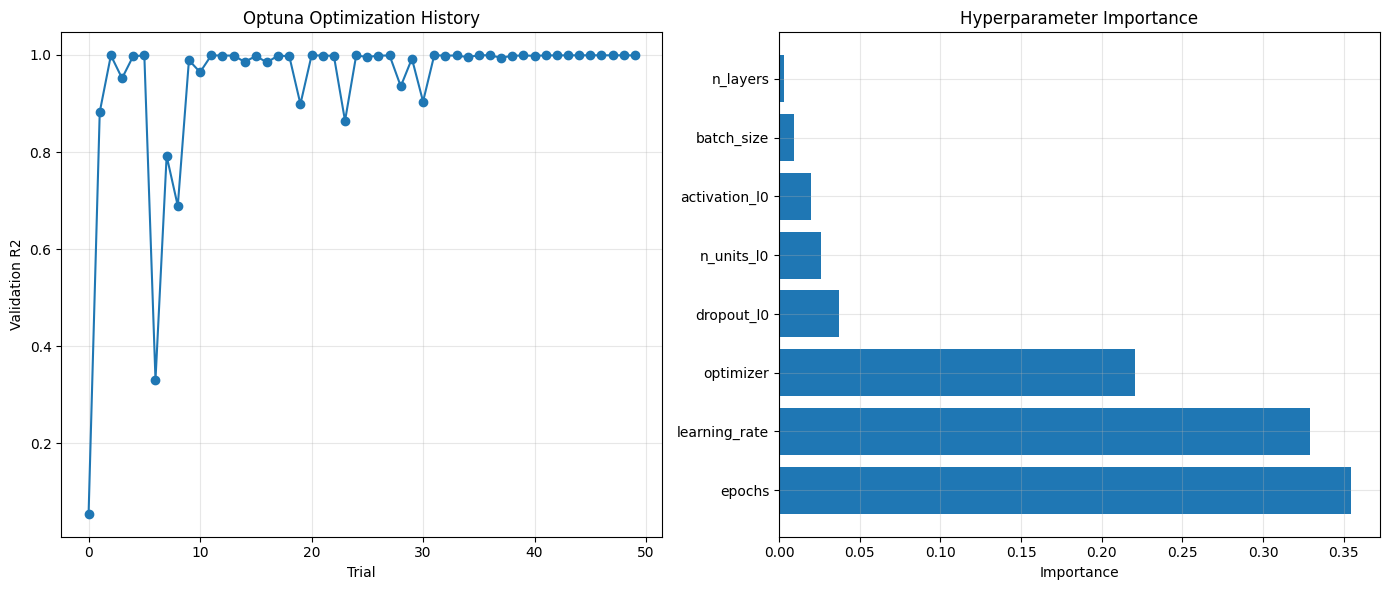

🏃 View run best_model_final at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26/runs/25c77ceb16c24f85b2c9736dba573ae0
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/26

Comparison with original MLP_Simple_2Layer:
Original R2: 0.9898
Optimized R2: 0.9991
Improvement: 0.95%


In [56]:
# Train final model with best parameters
print("\nTraining final model with best parameters...")
with mlflow.start_run(run_name="best_model_final"):
    # Log best parameters
    mlflow.log_params(best_params)
    mlflow.log_param("optimization_trials", 50)
    mlflow.log_param("best_val_r2", best_value)
    mlflow.log_param("student", "juanplv04")

    # Create and train the best model
    best_trial = study.best_trial
    best_model = create_optimized_mlp_model(X_train_mlp.shape[1], best_trial)

    # Train with full training data
    history = best_model.fit(
        X_train_mlp, y_train_mlp,
        epochs=best_params['epochs'],
        batch_size=best_params['batch_size'],
        callbacks=[
            keras.callbacks.EarlyStopping(
                monitor='loss',
                patience=20,
                restore_best_weights=True
            ),
            keras.callbacks.ReduceLROnPlateau(
                monitor='loss',
                factor=0.5,
                patience=10,
                min_lr=1e-6
            )
        ],
        verbose=1
    )

    # Final evaluation
    y_pred_test_scaled = best_model.predict(X_test_mlp)
    y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled.reshape(-1, 1))
    y_true_test = scaler_y.inverse_transform(y_test_mlp.reshape(-1, 1))

    test_mse = mean_squared_error(y_true_test, y_pred_test)
    test_mae = mean_absolute_error(y_true_test, y_pred_test)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_true_test, y_pred_test)

    # Log final metrics
    mlflow.log_metric("test_mse", test_mse)
    mlflow.log_metric("test_mae", test_mae)
    mlflow.log_metric("test_rmse", test_rmse)
    mlflow.log_metric("test_r2", test_r2)

    # Log the model
    mlflow.tensorflow.log_model(
        best_model,
        artifact_path="models/best_optimized_mlp",
        registered_model_name="MLP_Optimized_Best_juanplv04"
    )

    print(f"\nOptimized Model Results:")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Test MAE: {test_mae:.4f}")
    print(f"Test R2: {test_r2:.4f}")

    # Visualize optimization history
    import matplotlib.pyplot as plt

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Plot optimization history - CORRECTED
    trials = study.get_trials()
    trial_values = [-trial.value for trial in trials if trial.value is not None]  # Convert to positive R2
    ax1.plot(trial_values, marker='o')
    ax1.set_xlabel('Trial')
    ax1.set_ylabel('Validation R2')
    ax1.set_title('Optuna Optimization History')
    ax1.grid(True, alpha=0.3)

    # Plot parameter importance
    try:
        importances = optuna.importance.get_param_importances(study)
        params = list(importances.keys())
        values = list(importances.values())

        ax2.barh(params, values)
        ax2.set_xlabel('Importance')
        ax2.set_title('Hyperparameter Importance')
        ax2.grid(True, alpha=0.3)
    except Exception as e:
        ax2.text(0.5, 0.5, f'Parameter importance not available\n{str(e)}',
                ha='center', va='center', transform=ax2.transAxes)

    plt.tight_layout()
    mlflow.log_figure(fig, "optimization_results.png")
    plt.show()

# Create comparison with original model
print("\nComparison with original MLP_Simple_2Layer:")
print(f"Original R2: {results_1['test_r2']:.4f}")
print(f"Optimized R2: {test_r2:.4f}")
improvement = ((test_r2 - results_1['test_r2']) / results_1['test_r2'] * 100)
print(f"Improvement: {improvement:.2f}%")

In [57]:
# Create comparison with original model
print("\nComparison with original MLP_Simple_2Layer:")
print(f"Original R2: {results_1['test_r2']:.4f}")
print(f"Optimized R2: {test_r2:.4f}")
print(f"Improvement: {((test_r2 - results_1['test_r2']) / results_1['test_r2'] * 100):.2f}%")


Comparison with original MLP_Simple_2Layer:
Original R2: 0.9898
Optimized R2: 0.9991
Improvement: 0.95%


# Clasificación de series de tiempo

+ Elegir una de las siguientes opciones:
Transformar el problema de regresión abordado previamente en un problema de clasificación (por ejemplo, clasificar tendencias como "sube", "baja" o "estable").

Seleccionar una nueva base de datos específicamente orientada a clasificación de series de tiempo.

Implementar las siguientes estructuras de modelos que permitan resolver el problema de clasificación:

+ MLP para clasificación
+ CNN para clasificación
+ LSTM para clasificación
+ CNN-LSTM para clasificación
+ Algoritmos clásicos de Machine Learning (SVM, Random Forest, etc.)

In [98]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import mlflow
import dagshub
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from datetime import datetime
from xgboost import XGBClassifier  # para clasificación
import optuna

### Crear clases basadas en percentiles de consumo


=== Distribución de Clases ===
Bajo: 570 (40.0%)
Medio: 499 (35.0%)
Alto: 356 (25.0%)


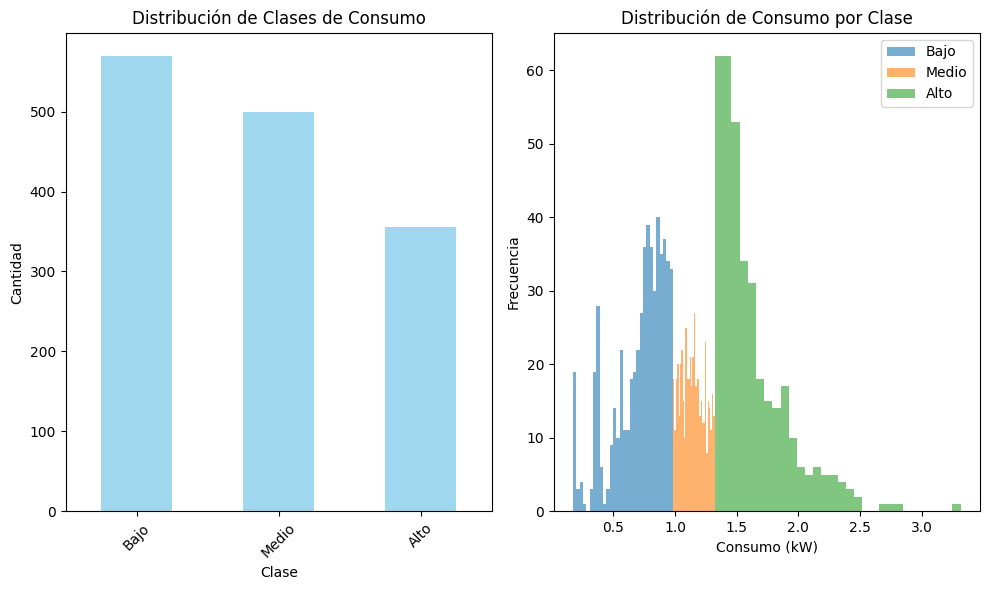

In [100]:
def create_consumption_classes(df, column='Global_active_power', n_classes=3):
    """
    Crea clases de consumo basadas en percentiles no uniformes para un escenario más realista
    """
    # Usar percentiles no uniformes para crear clases desbalanceadas más realistas
    if n_classes == 3:
        # Bajo: 0-40%, Medio: 40-75%, Alto: 75-100%
        percentiles = [0, 40, 75, 100]
        labels = ['Bajo', 'Medio', 'Alto']
    elif n_classes == 4:
        # Muy Bajo: 0-25%, Bajo: 25-50%, Medio: 50-80%, Alto: 80-100%
        percentiles = [0, 25, 50, 80, 100]
        labels = ['Muy_Bajo', 'Bajo', 'Medio', 'Alto']

    # Calcular puntos de corte basados en percentiles
    consumption_values = df[column].values
    cut_points = np.percentile(consumption_values, percentiles)

    # Crear las clases
    df['consumption_class'] = pd.cut(df[column],
                                    bins=cut_points,
                                    labels=labels[:-1] if n_classes > 3 else labels,
                                    include_lowest=True)

    # Convertir a valores numéricos
    df['consumption_class_numeric'] = LabelEncoder().fit_transform(df['consumption_class'])

    # Mostrar distribución de clases
    print("\n=== Distribución de Clases ===")
    class_dist = df['consumption_class'].value_counts()
    for class_name, count in class_dist.items():
        percentage = (count / len(df)) * 100
        print(f"{class_name}: {count} ({percentage:.1f}%)")

    # Visualización
    plt.figure(figsize=(10, 6))

    plt.subplot(1, 2, 1)
    df['consumption_class'].value_counts().plot(kind='bar', color='skyblue', alpha=0.8)
    plt.title('Distribución de Clases de Consumo')
    plt.xlabel('Clase')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    for i, label in enumerate(labels):
        data = df[df['consumption_class'] == label][column]
        plt.hist(data, bins=30, alpha=0.6, label=label)
    plt.title('Distribución de Consumo por Clase')
    plt.xlabel('Consumo (kW)')
    plt.ylabel('Frecuencia')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return df

df_class = create_consumption_classes(df.copy(), n_classes=3)

### Preparar datos para clasificación

In [37]:
def prepare_classification_data(df, n_lag=30, features_to_use=None):
    """
    Prepara datos para clasificación con características temporales
    """
    # Si no se especifican features, usar todas las numéricas excepto la clase
    if features_to_use is None:
        features_to_use = ['Global_active_power', 'Global_reactive_power',
                          'Voltage', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

    # Crear características temporales
    df['day_of_week'] = pd.to_datetime(df['Date']).dt.dayofweek
    df['month'] = pd.to_datetime(df['Date']).dt.month
    df['quarter'] = pd.to_datetime(df['Date']).dt.quarter

    # Añadir estadísticas móviles
    for feature in features_to_use:
        df[f'{feature}_ma7'] = df[feature].rolling(window=7, min_periods=1).mean()
        df[f'{feature}_std7'] = df[feature].rolling(window=7, min_periods=1).std()

    # Eliminar NaNs
    df = df.dropna()

    # Seleccionar todas las características
    feature_columns = (features_to_use +
                      [f'{f}_ma7' for f in features_to_use] +
                      [f'{f}_std7' for f in features_to_use] +
                      ['day_of_week', 'month', 'quarter'])

    X = df[feature_columns].values
    y = df['consumption_class_numeric'].values

    # División temporal (importante para series temporales)
    train_size = int(len(X) * 0.7)
    val_size = int(len(X) * 0.15)

    X_train = X[:train_size]
    y_train = y[:train_size]
    X_val = X[train_size:train_size + val_size]
    y_val = y[train_size:train_size + val_size]
    X_test = X[train_size + val_size:]
    y_test = y[train_size + val_size:]

    # Escalar características
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    print(f"\nDatos preparados:")
    print(f"Train: {X_train_scaled.shape}, Clases: {np.bincount(y_train)}")
    print(f"Val:   {X_val_scaled.shape}, Clases: {np.bincount(y_val)}")
    print(f"Test:  {X_test_scaled.shape}, Clases: {np.bincount(y_test)}")

    return {
        'X_train': X_train_scaled, 'y_train': y_train,
        'X_val': X_val_scaled, 'y_val': y_val,
        'X_test': X_test_scaled, 'y_test': y_test,
        'scaler': scaler,
        'feature_names': feature_columns,
        'n_classes': len(np.unique(y))
    }

# Preparar datos
data_dict = prepare_classification_data(df_class)


Datos preparados:
Train: (996, 21), Clases: [250 424 322]
Val:   (213, 21), Clases: [80 36 97]
Test:  (215, 21), Clases: [ 25 110  80]


Train: 70% de los datos (996 días)

Val: 15% de los datos (213 días)

Test: 15% de los datos (215 días)

Distribución de clases en cada conjunto:

+ Train: [250, 424, 322] = [Bajo: 25%  |  Medio: 43%  |  Alto: 32%]
+ Val:   [80,  36,  97]  = [Bajo: 38%  |  Medio: 17%  |  Alto: 45%]
+ Test:  [25,  110, 80]  = [Bajo: 12%  |  Medio: 51%  |  Alto: 37%]

### Función para crear secuencias para modelos temporales

In [38]:
def create_sequences_for_classification(data_dict, n_lag=30):
    """
    Crea secuencias para modelos que requieren entrada temporal (LSTM, CNN-LSTM)
    """
    X_train, y_train = data_dict['X_train'], data_dict['y_train']
    X_val, y_val = data_dict['X_val'], data_dict['y_val']
    X_test, y_test = data_dict['X_test'], data_dict['y_test']

    n_features = X_train.shape[1]

    # Crear secuencias
    def create_sequences(X, y, n_lag):
        X_seq, y_seq = [], []
        for i in range(len(X) - n_lag + 1):
            X_seq.append(X[i:i + n_lag])
            y_seq.append(y[i + n_lag - 1])  # Clase del último día de la secuencia
        return np.array(X_seq), np.array(y_seq)

    X_train_seq, y_train_seq = create_sequences(X_train, y_train, n_lag)
    X_val_seq, y_val_seq = create_sequences(X_val, y_val, n_lag)
    X_test_seq, y_test_seq = create_sequences(X_test, y_test, n_lag)

    print(f"\nSecuencias creadas:")
    print(f"Train: {X_train_seq.shape}, Clases: {np.bincount(y_train_seq)}")
    print(f"Val:   {X_val_seq.shape}, Clases: {np.bincount(y_val_seq)}")
    print(f"Test:  {X_test_seq.shape}, Clases: {np.bincount(y_test_seq)}")

    return {
        'X_train': X_train_seq, 'y_train': y_train_seq,
        'X_val': X_val_seq, 'y_val': y_val_seq,
        'X_test': X_test_seq, 'y_test': y_test_seq,
        'n_features': n_features,
        'n_lag': n_lag,
        'n_classes': data_dict['n_classes']
    }

# Crear secuencias para modelos temporales
seq_data_dict = create_sequences_for_classification(data_dict, n_lag=30)


Secuencias creadas:
Train: (967, 30, 21), Clases: [229 422 316]
Val:   (184, 30, 21), Clases: [76 25 83]
Test:  (186, 30, 21), Clases: [ 22 101  63]


#### Secuencias para Modelos Temporales

Para CNN, LSTM y CNN-LSTM, se crearon secuencias con n_lag=30:

Se toman 30 días de historia para predecir la clase del día 30

Esto reduce el número de muestras disponibles

+ Train: 996 → 967 (se pierden 29 muestras)
+ Val:   213 → 184 (se pierden 29 muestras)
+Test:  215 → 186 (se pierden 29 muestras)

### Visualización de la distribución de clases

In [39]:
def visualize_class_distribution(df_class, data_dict):
    """
    Visualiza la distribución de clases y características importantes
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Análisis de Clases de Consumo Eléctrico', fontsize=16)

    # 1. Distribución de clases en train/val/test
    ax1 = axes[0, 0]
    labels = ['Train', 'Val', 'Test']
    class_counts = [np.bincount(data_dict['y_train']),
                   np.bincount(data_dict['y_val']),
                   np.bincount(data_dict['y_test'])]

    x = np.arange(len(class_counts[0]))
    width = 0.25

    for i, (label, counts) in enumerate(zip(labels, class_counts)):
        ax1.bar(x + i*width, counts, width, label=label, alpha=0.8)

    ax1.set_xlabel('Clase')
    ax1.set_ylabel('Cantidad')
    ax1.set_title('Distribución de Clases por Conjunto')
    ax1.set_xticks(x + width)
    ax1.set_xticklabels(['Bajo', 'Medio', 'Alto'])
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # 2. Boxplot de consumo por clase
    ax2 = axes[0, 1]
    df_class.boxplot(column='Global_active_power', by='consumption_class', ax=ax2)
    ax2.set_title('Consumo por Clase')
    ax2.set_xlabel('Clase')
    ax2.set_ylabel('Consumo (kW)')

    # 3. Correlación con otras variables
    ax3 = axes[1, 0]
    corr_data = df_class[['Global_active_power', 'Global_reactive_power',
                         'Voltage']].corr()
    sns.heatmap(corr_data, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, ax=ax3, square=True)
    ax3.set_title('Correlación entre Variables')

    # 4. Consumo promedio por día de la semana y clase
    ax4 = axes[1, 1]
    df_temp = df_class.copy()
    df_temp['day_of_week'] = pd.to_datetime(df_temp['Date']).dt.dayofweek

    for class_name in df_temp['consumption_class'].unique():
        data = df_temp[df_temp['consumption_class'] == class_name]
        daily_avg = data.groupby('day_of_week')['Global_active_power'].mean()
        ax4.plot(daily_avg.index, daily_avg.values, marker='o', label=class_name)

    ax4.set_xlabel('Día de la Semana')
    ax4.set_ylabel('Consumo Promedio (kW)')
    ax4.set_title('Consumo Promedio por Día de la Semana')
    ax4.set_xticks(range(7))
    ax4.set_xticklabels(['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom'])
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

### Funciones Genéricas para Todos los Modelos

In [40]:
# Configurar MLflow una sola vez
def setup_mlflow():
    """Configura MLflow para el proyecto"""
    dagshub.init(url="https://dagshub.com/PacoTinoco/Proyecto_modelado_TS", mlflow=True)
    mlflow.set_tracking_uri(mlflow.get_tracking_uri())
    mlflow.set_experiment("Classification_Models")

# Función genérica para evaluar modelos
def evaluate_classification_model(model, X_test, y_test, model_name):
    """
    Evalúa cualquier modelo de clasificación y retorna métricas
    """
    # Obtener predicciones
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)
        y_pred = model.predict(X_test)
    else:
        # Para modelos de deep learning
        y_pred_proba = model.predict(X_test)
        y_pred = np.argmax(y_pred_proba, axis=1)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    metrics = {
        'accuracy': accuracy,
        'f1_score': f1,
        'precision': precision,
        'recall': recall
    }

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Reporte de clasificación
    report = classification_report(y_test, y_pred,
                                 target_names=['Bajo', 'Medio', 'Alto'],
                                 output_dict=True)

    return metrics, cm, report, y_pred

# Función genérica para visualizar resultados
def plot_classification_results(cm, report, history=None, model_name=""):
    """
    Crea visualizaciones estándar para resultados de clasificación
    """
    n_plots = 3 if history is not None else 2
    fig, axes = plt.subplots(1, n_plots, figsize=(5*n_plots, 5))
    fig.suptitle(f'Resultados de Clasificación - {model_name}', fontsize=16)

    # 1. Matriz de confusión
    ax1 = axes[0] if n_plots > 1 else axes
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Bajo', 'Medio', 'Alto'],
                yticklabels=['Bajo', 'Medio', 'Alto'],
                ax=ax1)
    ax1.set_title('Matriz de Confusión')
    ax1.set_ylabel('Clase Real')
    ax1.set_xlabel('Clase Predicha')

    # 2. Métricas por clase
    ax2 = axes[1] if n_plots > 1 else axes
    metrics_df = pd.DataFrame(report).T[:-3]  # Excluir accuracy, macro avg, weighted avg
    metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar', ax=ax2)
    ax2.set_title('Métricas por Clase')
    ax2.set_xlabel('Clase')
    ax2.set_ylabel('Score')
    ax2.legend(['Precision', 'Recall', 'F1-Score'])
    ax2.set_xticklabels(['Bajo', 'Medio', 'Alto'], rotation=0)
    ax2.grid(True, alpha=0.3)

    # 3. Historia de entrenamiento (si está disponible)
    if history is not None and n_plots > 2:
        ax3 = axes[2]
        ax3.plot(history.history['loss'], label='Train Loss')
        ax3.plot(history.history['val_loss'], label='Val Loss')
        ax3.set_title('Pérdida durante Entrenamiento')
        ax3.set_xlabel('Época')
        ax3.set_ylabel('Loss')
        ax3.legend()
        ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    filename = f'{model_name}_results.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

    return filename

# Función para logging en MLflow
def log_to_mlflow(model_name, model, metrics, cm, report, params, artifacts=[]):
    """
    Registra resultados en MLflow
    """
    with mlflow.start_run(run_name=f"{model_name}_{datetime.now().strftime('%Y%m%d_%H%M%S')}"):
        # Log parámetros
        for key, value in params.items():
            mlflow.log_param(key, value)

        # Log métricas
        for key, value in metrics.items():
            mlflow.log_metric(key, value)

        # Log métricas por clase
        for class_name in ['Bajo', 'Medio', 'Alto']:
            for metric in ['precision', 'recall', 'f1-score']:
                value = report[class_name][metric]
                mlflow.log_metric(f"{class_name}_{metric}", value)

        # Log modelo
        if hasattr(model, 'save'):  # Keras model
            mlflow.keras.log_model(model, "model")
        else:  # Sklearn model
            mlflow.sklearn.log_model(model, "model")

        # Log artifacts
        for artifact in artifacts:
            mlflow.log_artifact(artifact)

# Implementación de Modelos
###  MLP para Clasificación

In [42]:
def create_mlp_classifier(input_shape, n_classes):
    """
    Crea arquitectura MLP para clasificación
    """
    model = keras.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dense(n_classes, activation='softmax')
    ], name='MLP_Classifier')

    return model

def train_mlp_classifier(data_dict):
    """
    Entrena MLP para clasificación
    """
    # Crear modelo
    model = create_mlp_classifier(data_dict['X_train'].shape[1], data_dict['n_classes'])

    # Compilar
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Callbacks
    callbacks = [
        keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(patience=10, factor=0.5)
    ]

    # Entrenar
    history = model.fit(
        data_dict['X_train'], data_dict['y_train'],
        validation_data=(data_dict['X_val'], data_dict['y_val']),
        epochs=100,
        batch_size=32,
        callbacks=callbacks,
        verbose=1
    )

    # Evaluar
    metrics, cm, report, y_pred = evaluate_classification_model(
        model, data_dict['X_test'], data_dict['y_test'], 'MLP_Classifier'
    )

    # Visualizar
    plot_file = plot_classification_results(cm, report, history, 'MLP_Classifier')

    # Log en MLflow
    params = {
        'architecture': 'MLP',
        'layers': '128-64-32',
        'dropout': 0.3,
        'batch_size': 32
    }
    log_to_mlflow('MLP_Classifier', model, metrics, cm, report, params, [plot_file])

    return model, metrics

## CNN para clasificación :

In [43]:
def create_cnn_classifier(input_shape, n_classes):
    """
    Crea CNN 1D para clasificación
    """
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(32, kernel_size=3, activation='relu', padding='same'),
        layers.GlobalAveragePooling1D(),
        layers.Dense(50, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(n_classes, activation='softmax')
    ], name='CNN_Classifier')

    return model

def train_cnn_classifier(seq_data_dict):
    """
    Entrena CNN para clasificación
    """
    # Reshape para CNN (samples, timesteps, features)
    X_train = seq_data_dict['X_train']
    X_val = seq_data_dict['X_val']
    X_test = seq_data_dict['X_test']

    # Crear modelo
    model = create_cnn_classifier((X_train.shape[1], X_train.shape[2]),
                                 seq_data_dict['n_classes'])

    # Compilar
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Entrenar
    history = model.fit(
        X_train, seq_data_dict['y_train'],
        validation_data=(X_val, seq_data_dict['y_val']),
        epochs=100,
        batch_size=32,
        callbacks=[
            keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True),
            keras.callbacks.ReduceLROnPlateau(patience=10, factor=0.5)
        ],
        verbose=1
    )

    # Evaluar
    metrics, cm, report, y_pred = evaluate_classification_model(
        model, X_test, seq_data_dict['y_test'], 'CNN_Classifier'
    )

    # Visualizar
    plot_file = plot_classification_results(cm, report, history, 'CNN_Classifier')

    # Log en MLflow
    params = {
        'architecture': 'CNN',
        'filters': '64-32',
        'kernel_size': 3,
        'n_lag': seq_data_dict['n_lag']
    }
    log_to_mlflow('CNN_Classifier', model, metrics, cm, report, params, [plot_file])

    return model, metrics

## LSTM para clasificación :

In [44]:
def create_lstm_classifier(input_shape, n_classes):
    """
    Crea LSTM para clasificación
    """
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.LSTM(64, return_sequences=True),
        layers.Dropout(0.3),
        layers.LSTM(32, return_sequences=False),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dense(n_classes, activation='softmax')
    ], name='LSTM_Classifier')

    return model

def train_lstm_classifier(seq_data_dict):
    """
    Entrena LSTM para clasificación
    """
    X_train = seq_data_dict['X_train']
    X_val = seq_data_dict['X_val']
    X_test = seq_data_dict['X_test']

    # Crear modelo
    model = create_lstm_classifier((X_train.shape[1], X_train.shape[2]),
                                  seq_data_dict['n_classes'])

    # Compilar
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Entrenar
    history = model.fit(
        X_train, seq_data_dict['y_train'],
        validation_data=(X_val, seq_data_dict['y_val']),
        epochs=100,
        batch_size=32,
        callbacks=[
            keras.callbacks.EarlyStopping(patience=25, restore_best_weights=True),
            keras.callbacks.ReduceLROnPlateau(patience=10, factor=0.5)
        ],
        verbose=1
    )

    # Evaluar
    metrics, cm, report, y_pred = evaluate_classification_model(
        model, X_test, seq_data_dict['y_test'], 'LSTM_Classifier'
    )

    # Visualizar
    plot_file = plot_classification_results(cm, report, history, 'LSTM_Classifier')

    # Log en MLflow
    params = {
        'architecture': 'LSTM',
        'units': '64-32',
        'dropout': 0.3,
        'n_lag': seq_data_dict['n_lag']
    }
    log_to_mlflow('LSTM_Classifier', model, metrics, cm, report, params, [plot_file])

    return model, metrics

## CNN-LSTM para clasificación :

In [45]:
def create_cnn_lstm_classifier(input_shape, n_classes):
    """
    Crea CNN-LSTM para clasificación
    """
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'),
        layers.MaxPooling1D(pool_size=2),
        layers.LSTM(32, return_sequences=True),
        layers.LSTM(16, return_sequences=False),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dense(n_classes, activation='softmax')
    ], name='CNN_LSTM_Classifier')

    return model

def train_cnn_lstm_classifier(seq_data_dict):
    """
    Entrena CNN-LSTM para clasificación
    """
    X_train = seq_data_dict['X_train']
    X_val = seq_data_dict['X_val']
    X_test = seq_data_dict['X_test']

    # Crear modelo
    model = create_cnn_lstm_classifier((X_train.shape[1], X_train.shape[2]),
                                      seq_data_dict['n_classes'])

    # Compilar
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Entrenar
    history = model.fit(
        X_train, seq_data_dict['y_train'],
        validation_data=(X_val, seq_data_dict['y_val']),
        epochs=100,
        batch_size=32,
        callbacks=[
            keras.callbacks.EarlyStopping(patience=25, restore_best_weights=True),
            keras.callbacks.ReduceLROnPlateau(patience=10, factor=0.5)
        ],
        verbose=1
    )

    # Evaluar
    metrics, cm, report, y_pred = evaluate_classification_model(
        model, X_test, seq_data_dict['y_test'], 'CNN_LSTM_Classifier'
    )

    # Visualizar
    plot_file = plot_classification_results(cm, report, None, 'CNN_LSTM_Classifier')

    # Log en MLflow
    params = {
        'architecture': 'CNN-LSTM',
        'conv_filters': 64,
        'lstm_units': '32-16',
        'n_lag': seq_data_dict['n_lag']
    }
    log_to_mlflow('CNN_LSTM_Classifier', model, metrics, cm, report, params, [plot_file])

    return model, metrics

### Algoritmos clásicos ML :

In [46]:
def train_classical_classifiers(data_dict):
    """
    Entrena y evalúa algoritmos clásicos de ML
    """
    results = {}

    # Escalar datos para SVM
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(data_dict['X_train'])
    X_val_scaled = scaler.transform(data_dict['X_val'])
    X_test_scaled = scaler.transform(data_dict['X_test'])

    # 1. SVM
    print("Entrenando SVM...")
    svm_model = SVC(kernel='rbf', probability=True, random_state=42)
    svm_model.fit(X_train_scaled, data_dict['y_train'])

    metrics, cm, report, y_pred = evaluate_classification_model(
        svm_model, X_test_scaled, data_dict['y_test'], 'SVM_Classifier'
    )

    plot_file = plot_classification_results(cm, report, None, 'SVM_Classifier')

    params = {'kernel': 'rbf', 'algorithm': 'SVM'}
    log_to_mlflow('SVM_Classifier', svm_model, metrics, cm, report, params, [plot_file])
    results['SVM'] = {'model': svm_model, 'metrics': metrics}

    # 2. Random Forest
    print("Entrenando Random Forest...")
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(data_dict['X_train'], data_dict['y_train'])

    metrics, cm, report, y_pred = evaluate_classification_model(
        rf_model, data_dict['X_test'], data_dict['y_test'], 'RandomForest_Classifier'
    )

    plot_file = plot_classification_results(cm, report, None, 'RandomForest_Classifier')

    params = {'n_estimators': 100, 'algorithm': 'RandomForest'}
    log_to_mlflow('RandomForest_Classifier', rf_model, metrics, cm, report, params, [plot_file])
    results['RandomForest'] = {'model': rf_model, 'metrics': metrics}

    # 3. XGBoost
    print("Entrenando XGBoost...")
    xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
    xgb_model.fit(data_dict['X_train'], data_dict['y_train'])

    metrics, cm, report, y_pred = evaluate_classification_model(
        xgb_model, data_dict['X_test'], data_dict['y_test'], 'XGBoost_Classifier'
    )

    plot_file = plot_classification_results(cm, report, None, 'XGBoost_Classifier')

    params = {'n_estimators': 100, 'learning_rate': 0.1, 'algorithm': 'XGBoost'}
    log_to_mlflow('XGBoost_Classifier', xgb_model, metrics, cm, report, params, [plot_file])
    results['XGBoost'] = {'model': xgb_model, 'metrics': metrics}

    return results

### Función Principal para Ejecutar Todos los Modelos

### Variables de Entrada (X):
24 características en total:
7 Variables Originales:

+ Global_active_power
+ Global_reactive_power
+ Voltage
+ Global_intensity
+ Sub_metering_1
+ Sub_metering_2
+Sub_metering_3

7 Medias Móviles (ventana de 7 días):

+ Global_active_power_ma7
+ Global_reactive_power_ma7
+ Voltage_ma7
+ Global_intensity_ma7
+ Sub_metering_1_ma7
+ Sub_metering_2_ma7
+ Sub_metering_3_ma7

7 Desviaciones Estándar Móviles (ventana de 7 días):

+ Global_active_power_std7
+ Global_reactive_power_std7
+ Voltage_std7
+ Global_intensity_std7
+ Sub_metering_1_std7
+ Sub_metering_2_std7
+ Sub_metering_3_std7

3 Características Temporales:

+ day_of_week (0-6)
+ month (1-12)
+ quarter (1-4)

Diferencias por Tipo de Modelo:

+ MLP: Usa las 24 características directamente (forma: (samples, 24))
+CNN, LSTM, CNN-LSTM: Usa secuencias de 30 días con las 24 características (forma: (samples, 30, 24))

Initialized MLflow to track repo "PacoTinoco/Proyecto_modelado_TS"

Repository PacoTinoco/Proyecto_modelado_TS initialized!

=== Creando clases de consumo ===

=== Distribución de Clases ===
Bajo: 570 (40.0%)
Medio: 499 (35.0%)
Alto: 356 (25.0%)


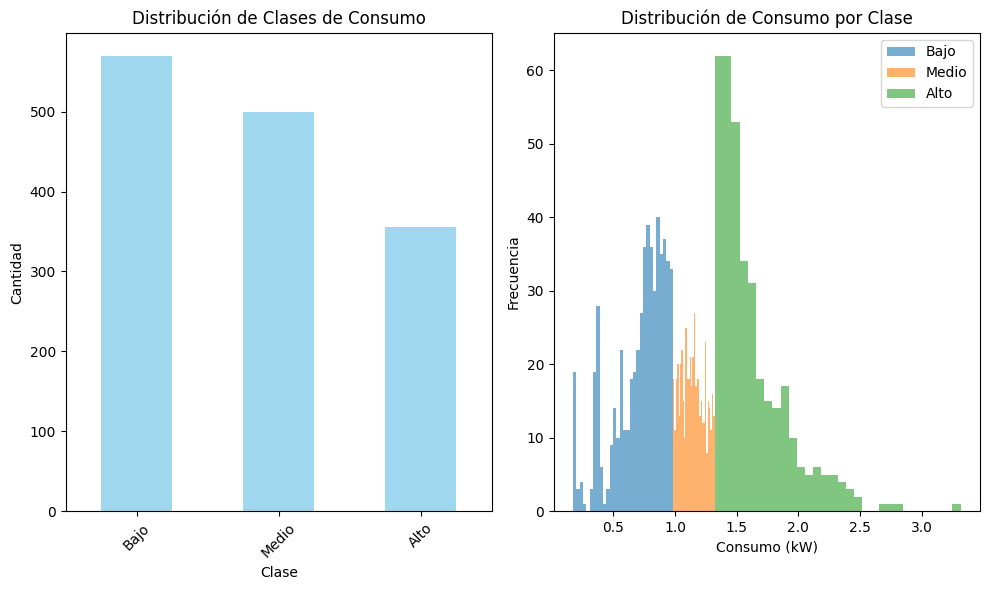


=== Preparando datos ===

Datos preparados:
Train: (996, 21), Clases: [250 424 322]
Val:   (213, 21), Clases: [80 36 97]
Test:  (215, 21), Clases: [ 25 110  80]

Secuencias creadas:
Train: (967, 30, 21), Clases: [229 422 316]
Val:   (184, 30, 21), Clases: [76 25 83]
Test:  (186, 30, 21), Clases: [ 22 101  63]

=== Visualizando distribución de clases ===


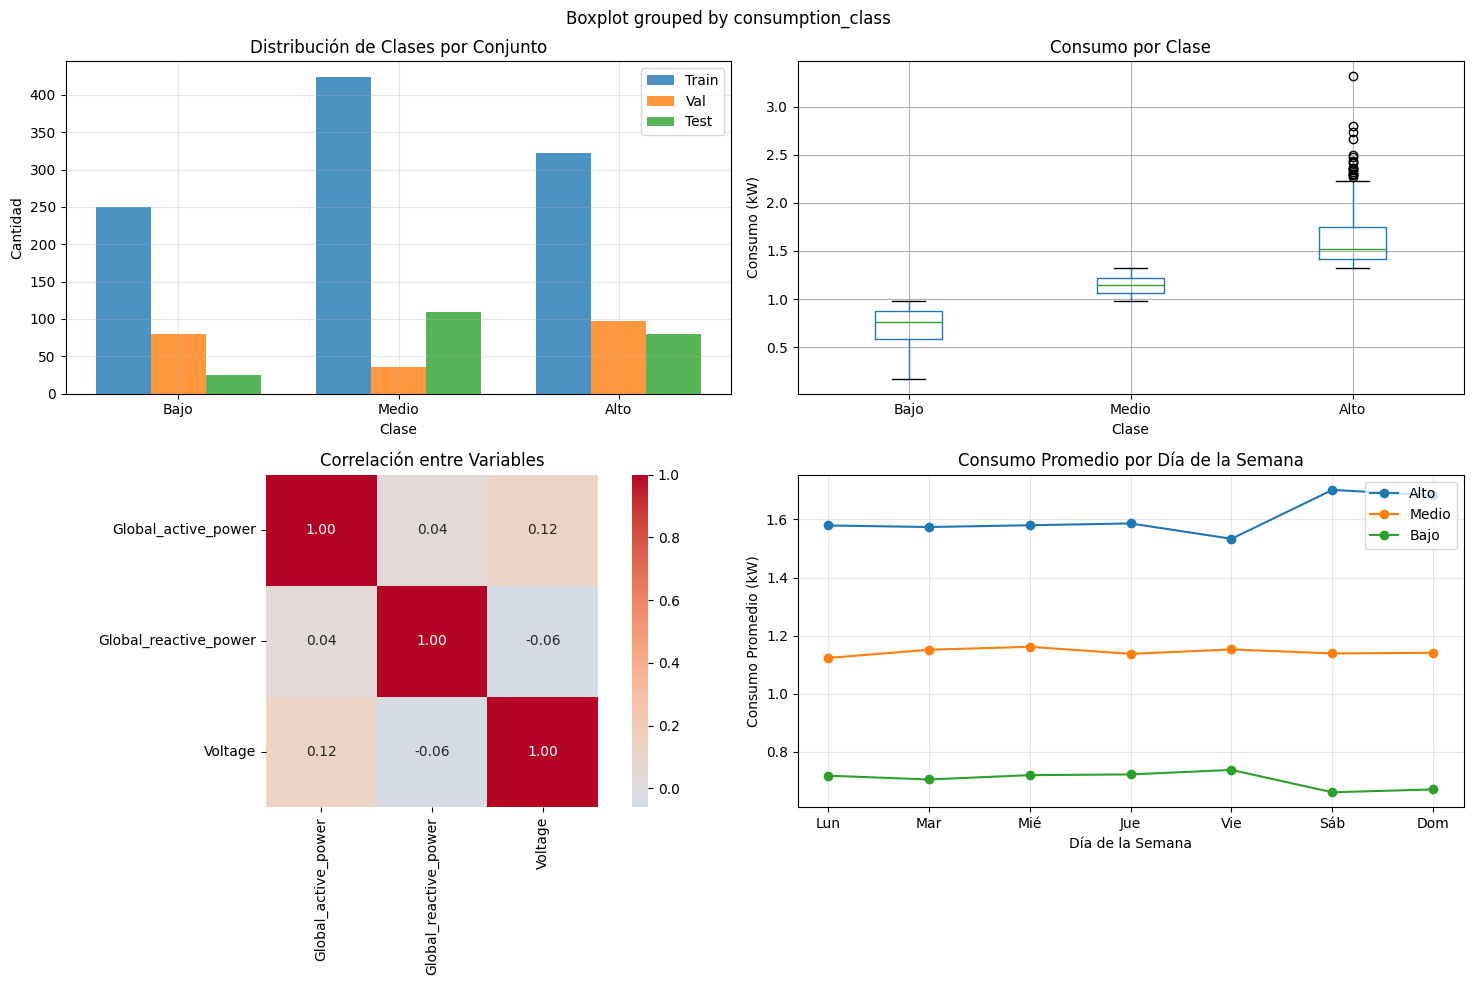


=== Entrenando MLP ===
Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.4061 - loss: 1.3540 - val_accuracy: 0.5211 - val_loss: 1.0658 - learning_rate: 0.0010
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6324 - loss: 0.8179 - val_accuracy: 0.6009 - val_loss: 1.0240 - learning_rate: 0.0010
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7243 - loss: 0.6398 - val_accuracy: 0.6620 - val_loss: 0.9649 - learning_rate: 0.0010
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7693 - loss: 0.5433 - val_accuracy: 0.6338 - val_loss: 0.9041 - learning_rate: 0.0010
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7727 - loss: 0.5024 - val_accuracy: 0.6103 - val_loss: 0.8171 - learning_rate: 0.0010
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7817 - loss: 0.4748 - val_accuracy: 0.6620 - val_loss: 0.7254 - learning_rate: 0.0010
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8123

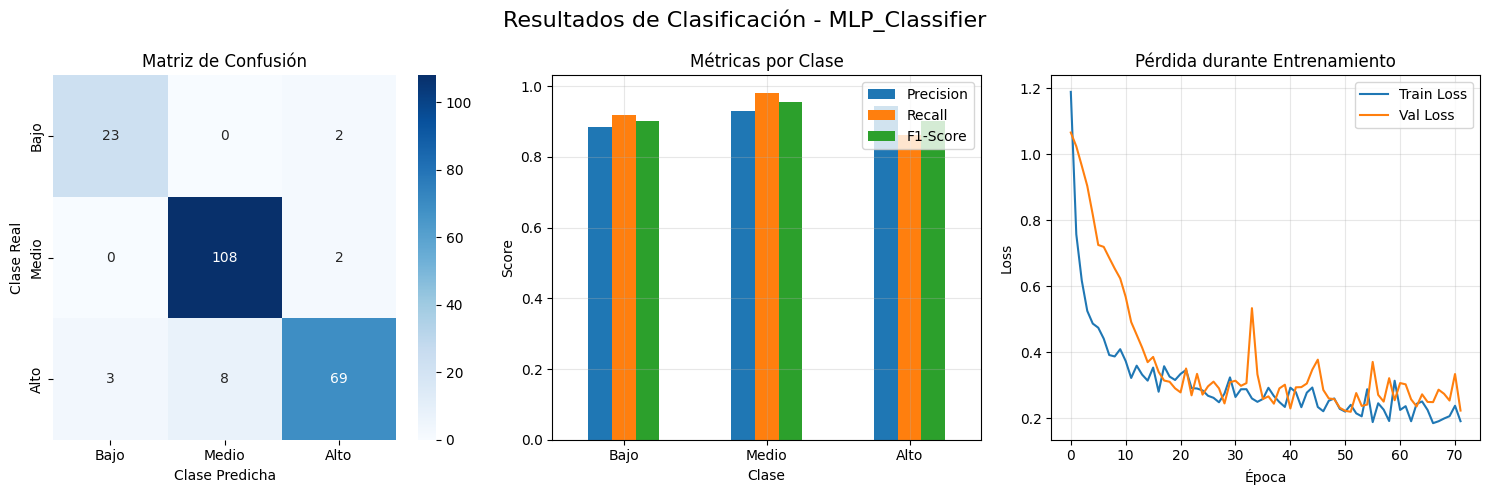

2025/05/14 23:31:41 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/05/14 23:31:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run MLP_Classifier_20250514_233134 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/28/runs/9c09c033411a4a31b9c04d4a3fb6b91a
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/28

=== Entrenando CNN ===
Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.4385 - loss: 1.0640 - val_accuracy: 0.1359 - val_loss: 1.3022 - learning_rate: 0.0010
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4953 - loss: 0.9743 - val_accuracy: 0.2011 - val_loss: 1.3113 - learning_rate: 0.0010
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5228 - loss: 0.9147 - val_accuracy: 0.3750 - val_loss: 1.1609 - learning_rate: 0.0010
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5443 - loss: 0.8810 - val_accuracy: 0.4022 - val_loss: 1.0862 - learning_rate: 0.0010
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5807 - loss: 0.8638 - val_accuracy: 0.3207 - val

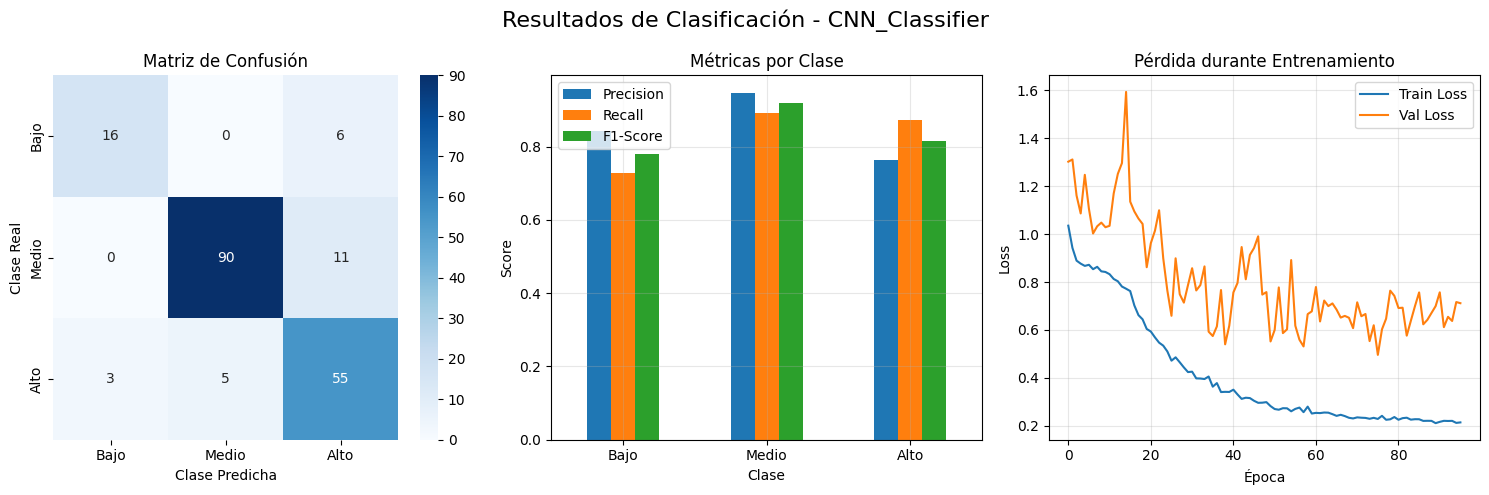

2025/05/14 23:32:26 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/05/14 23:32:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run CNN_Classifier_20250514_233219 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/28/runs/7d353bb1e8eb44e7822535367635ae2b
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/28

=== Entrenando LSTM ===
Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.3731 - loss: 1.0823 - val_accuracy: 0.1902 - val_loss: 1.2537 - learning_rate: 0.0010
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5502 - loss: 0.9025 - val_accuracy: 0.4565 - val_loss: 0.9974 - learning_rate: 0.0010
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5282 - loss: 0.8995 - val_accuracy: 0.3913 - val_loss: 1.0652 - learning_rate: 0.0010
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5812 - loss: 0.8456 - val_accuracy: 0.4946 - val_loss: 0.9847 - learning_rate: 0.0010
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5938 - loss: 0.8565 - val_accuracy: 0.3587 

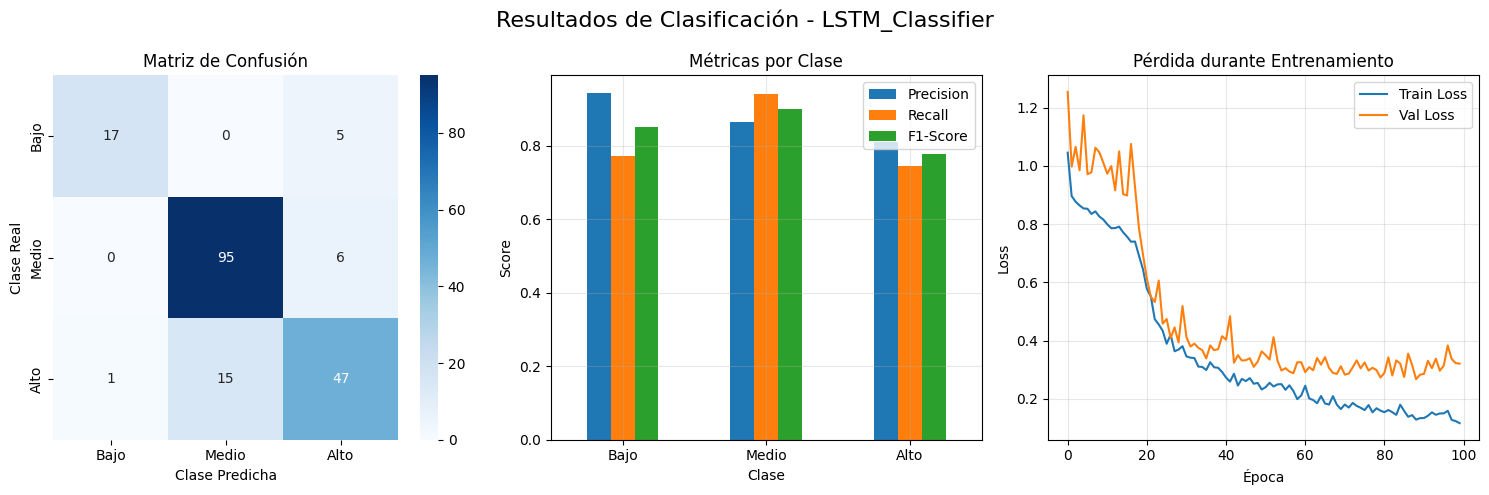

2025/05/14 23:33:28 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/05/14 23:33:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LSTM_Classifier_20250514_233321 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/28/runs/8d9e8a517cc240e2a04debebfbc0c773
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/28

=== Entrenando CNN-LSTM ===
Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4193 - loss: 1.0789 - val_accuracy: 0.1141 - val_loss: 1.1685 - learning_rate: 0.0010
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4781 - loss: 0.9487 - val_accuracy: 0.4293 - val_loss: 1.0564 - learning_rate: 0.0010
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5512 - loss: 0.9148 - val_accuracy: 0.3804 - val_loss: 1.1282 - learning_rate: 0.0010
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5374 - loss: 0.8708 - val_accuracy: 0.4022 - val_loss: 1.0315 - learning_rate: 0.0010
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5939 - loss: 0.8323 - val_accuracy: 0.

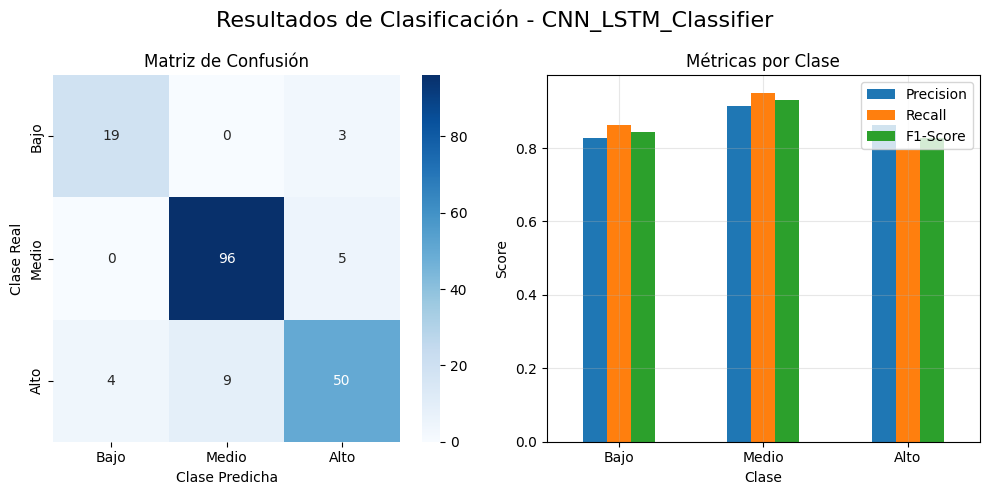

2025/05/14 23:34:15 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/05/14 23:34:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run CNN_LSTM_Classifier_20250514_233408 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/28/runs/0730db1168ec432b8c3720534389025f
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/28

=== Entrenando Modelos Clásicos ===
Entrenando SVM...


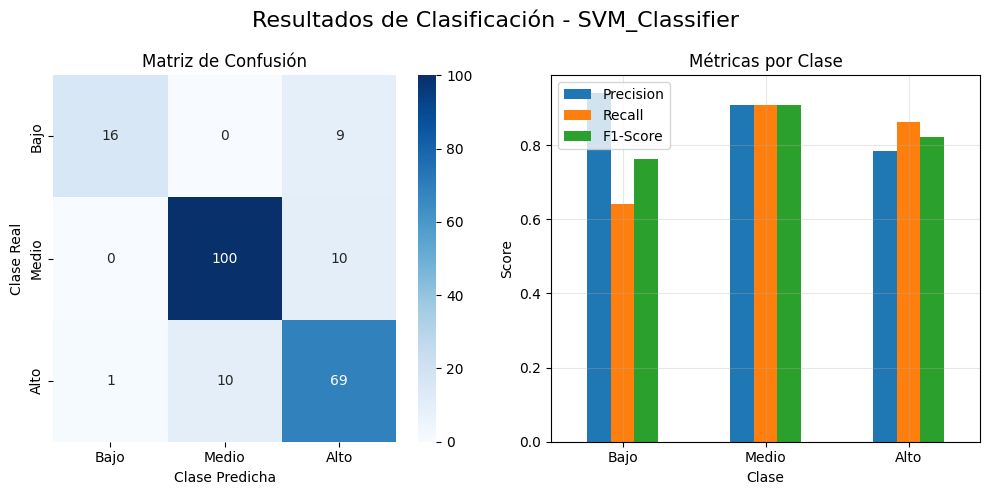

2025/05/14 23:34:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run SVM_Classifier_20250514_233430 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/28/runs/90066618d86b453dadf78baeebb06a56
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/28
Entrenando Random Forest...


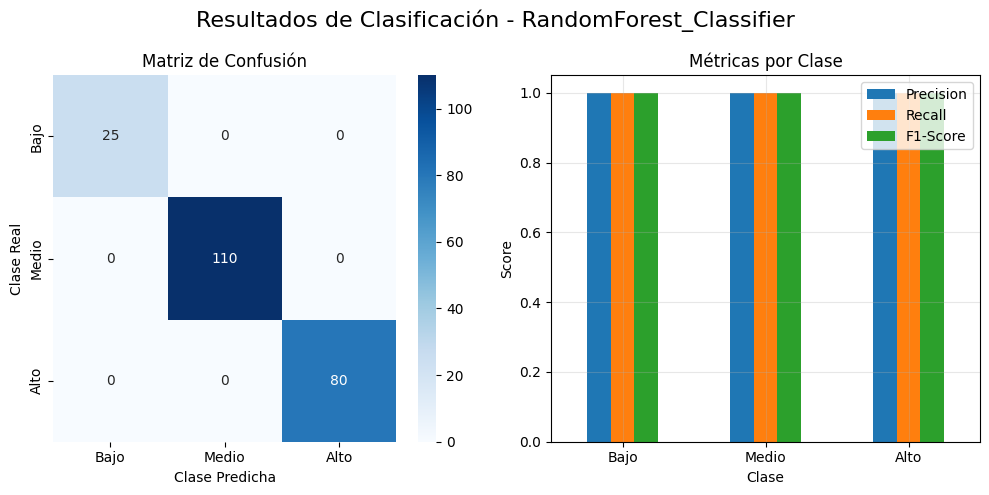

2025/05/14 23:35:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForest_Classifier_20250514_233453 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/28/runs/fe7a33ccf6b84466a53c49489c67e993
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/28
Entrenando XGBoost...


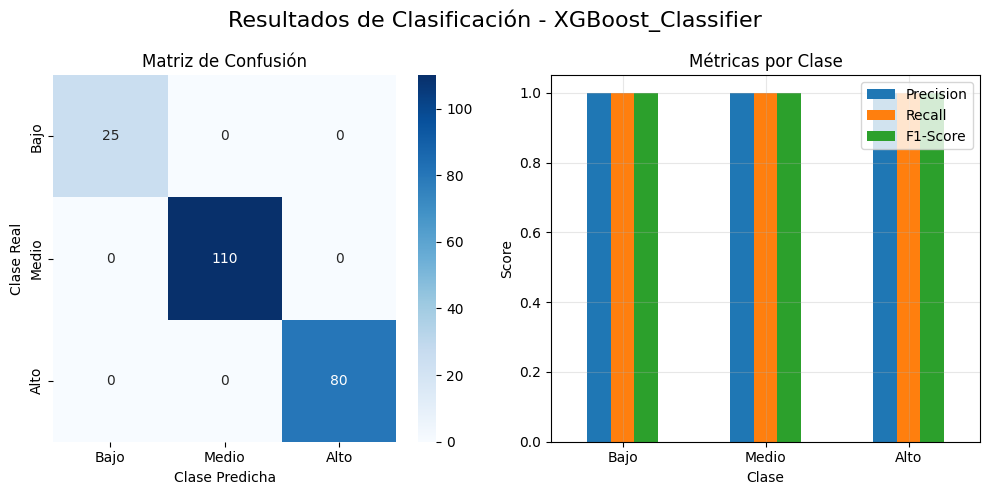

2025/05/14 23:35:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGBoost_Classifier_20250514_233519 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/28/runs/cc516c0fdec240cb84811868b99437b9
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/28

=== RESUMEN DE RESULTADOS ===
              accuracy  f1_score  precision  recall
MLP             0.9302    0.9295     0.9309  0.9302
CNN             0.8656    0.8670     0.8728  0.8656
LSTM            0.8548    0.8526     0.8551  0.8548
CNN-LSTM        0.8871    0.8859     0.8862  0.8871
SVM             0.8605    0.8594     0.8663  0.8605
RandomForest    1.0000    1.0000     1.0000  1.0000
XGBoost         1.0000    1.0000     1.0000  1.0000


<Figure size 1200x600 with 0 Axes>

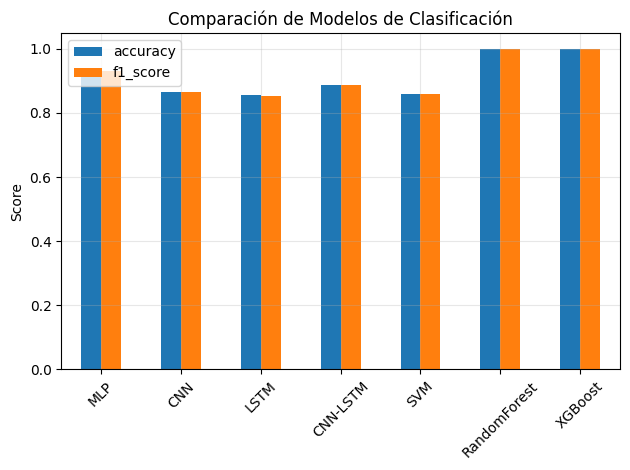

In [47]:
def run_all_classification_models(df_class):
    """
    Ejecuta todos los modelos de clasificación
    """
    # Configurar MLflow
    setup_mlflow()

    # 1. Crear clases
    print("=== Creando clases de consumo ===")
    df_class = create_consumption_classes(df.copy(), n_classes=3)

    # 2. Preparar datos
    print("\n=== Preparando datos ===")
    data_dict = prepare_classification_data(df_class)
    seq_data_dict = create_sequences_for_classification(data_dict, n_lag=30)

    # 3. Visualizar distribución
    print("\n=== Visualizando distribución de clases ===")
    visualize_class_distribution(df_class, data_dict)

    # 4. Entrenar modelos
    results = {}

    print("\n=== Entrenando MLP ===")
    mlp_model, mlp_metrics = train_mlp_classifier(data_dict)
    results['MLP'] = {'model': mlp_model, 'metrics': mlp_metrics}

    print("\n=== Entrenando CNN ===")
    cnn_model, cnn_metrics = train_cnn_classifier(seq_data_dict)
    results['CNN'] = {'model': cnn_model, 'metrics': cnn_metrics}

    print("\n=== Entrenando LSTM ===")
    lstm_model, lstm_metrics = train_lstm_classifier(seq_data_dict)
    results['LSTM'] = {'model': lstm_model, 'metrics': lstm_metrics}

    print("\n=== Entrenando CNN-LSTM ===")
    cnn_lstm_model, cnn_lstm_metrics = train_cnn_lstm_classifier(seq_data_dict)
    results['CNN-LSTM'] = {'model': cnn_lstm_model, 'metrics': cnn_lstm_metrics}

    print("\n=== Entrenando Modelos Clásicos ===")
    classical_results = train_classical_classifiers(data_dict)
    results.update(classical_results)

    # 5. Comparar resultados
    print("\n=== RESUMEN DE RESULTADOS ===")
    comparison_df = pd.DataFrame({
        model_name: model_data['metrics']
        for model_name, model_data in results.items()
    }).T

    print(comparison_df.round(4))

    # Visualizar comparación
    plt.figure(figsize=(12, 6))
    comparison_df[['accuracy', 'f1_score']].plot(kind='bar', rot=45)
    plt.title('Comparación de Modelos de Clasificación')
    plt.ylabel('Score')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('classification_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

    return results, comparison_df

# Ejecutar todo
if __name__ == "__main__":
    results, comparison = run_all_classification_models(df_class)

### Optuna para el mejor modelo neuronal :

Initialized MLflow to track repo "PacoTinoco/Proyecto_modelado_TS"

Repository PacoTinoco/Proyecto_modelado_TS initialized!

2025/05/14 23:44:35 INFO mlflow.tracking.fluent: Experiment with name 'MLP_Classification_Optuna' does not exist. Creating a new experiment.
[I 2025-05-14 23:44:35,494] A new study created in memory with name: no-name-9509448a-85a9-455c-b3f6-2ba1bbddbc2a


Preparando datos base...
Características: 15
Clases: 3

Iniciando optimización con 50 trials...


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-05-14 23:44:48,932] Trial 0 finished with value: 0.9295774698257446 and parameters: {'n_layers': 3, 'n_units_first': 256, 'dropout_rate': 0.39279757672456206, 'learning_rate': 0.0015751320499779737, 'batch_size': 128, 'activation': 'tanh', 'optimizer': 'adam', 'use_batch_norm': False}. Best is trial 0 with value: 0.9295774698257446.
Nuevo mejor accuracy: 0.9296
[I 2025-05-14 23:45:18,162] Trial 1 finished with value: 0.9107981324195862 and parameters: {'n_layers': 3, 'n_units_first': 160, 'dropout_rate': 0.2727780074568463, 'learning_rate': 0.0003823475224675188, 'batch_size': 16, 'activation': 'tanh', 'optimizer': 'adamw', 'use_batch_norm': True}. Best is trial 0 with value: 0.9295774698257446.
[I 2025-05-14 23:45:31,383] Trial 2 finished with value: 0.9483568072319031 and parameters: {'n_layers': 2, 'n_units_first': 256, 'dropout_rate': 0.4862528132298237, 'learning_rate': 0.004138040112561018, 'batch_size': 64, 'activation': 'tanh', 'optimizer': 'adam', 'use_batch_norm': Fal

2025/05/15 00:01:44 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.



=== Reporte de Clasificación ===
              precision    recall  f1-score   support

        Bajo       1.00      0.92      0.96        25
       Medio       0.91      0.99      0.95       110
        Alto       0.96      0.86      0.91        80

    accuracy                           0.93       215
   macro avg       0.96      0.92      0.94       215
weighted avg       0.94      0.93      0.93       215



2025/05/15 00:01:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run MLP_Optimized_20250515_000122 at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/29/runs/278896a9f4084a5eb44e8c711d84d4f6
🧪 View experiment at: https://dagshub.com/PacoTinoco/Proyecto_modelado_TS.mlflow/#/experiments/29


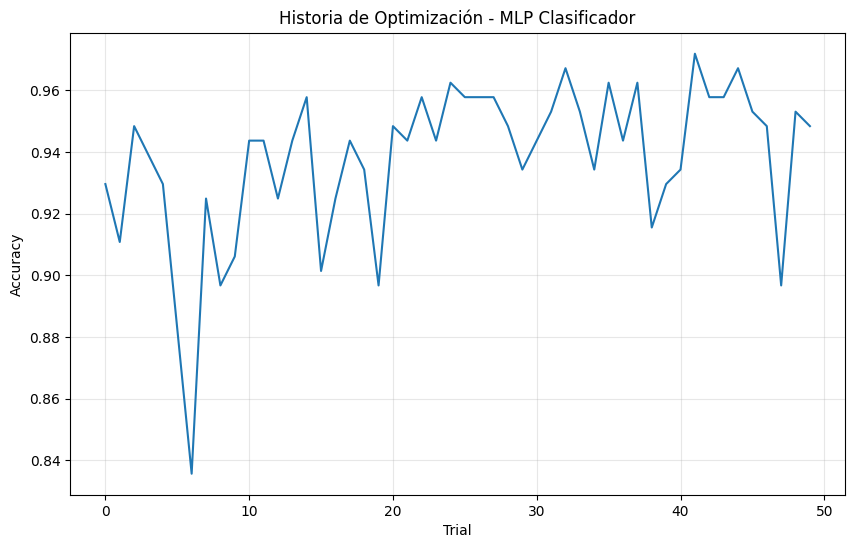


=== COMPARACIÓN ===
MLP Original - Accuracy: 0.9302
MLP Optimizado - Accuracy: 0.9349
Mejora: 0.50%


In [51]:
# Función para preparar datos base (sin recrear la división)
def prepare_base_classification_data(df_class):
    """
    Prepara datos base una sola vez antes de Optuna
    """
    # Features sin Global_intensity
    features_to_use = ['Global_active_power', 'Global_reactive_power',
                      'Voltage', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

    # Crear características temporales
    df_class['day_of_week'] = pd.to_datetime(df_class['Date']).dt.dayofweek
    df_class['month'] = pd.to_datetime(df_class['Date']).dt.month
    df_class['quarter'] = pd.to_datetime(df_class['Date']).dt.quarter

    # Añadir estadísticas móviles (solo las esenciales)
    for feature in features_to_use[:3]:  # Solo para las 3 primeras
        df_class[f'{feature}_ma7'] = df_class[feature].rolling(window=7, min_periods=1).mean()
        df_class[f'{feature}_std7'] = df_class[feature].rolling(window=7, min_periods=1).std()

    # Eliminar NaNs
    df_class = df_class.dropna()

    # Seleccionar características finales
    feature_columns = (features_to_use +
                      [f'{f}_ma7' for f in features_to_use[:3]] +
                      [f'{f}_std7' for f in features_to_use[:3]] +
                      ['day_of_week', 'month', 'quarter'])

    X = df_class[feature_columns].values
    y = df_class['consumption_class_numeric'].values

    # División temporal
    train_size = int(len(X) * 0.7)
    val_size = int(len(X) * 0.15)

    X_train = X[:train_size]
    y_train = y[:train_size]
    X_val = X[train_size:train_size + val_size]
    y_val = y[train_size:train_size + val_size]
    X_test = X[train_size + val_size:]
    y_test = y[train_size + val_size:]

    # Escalar
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    return {
        'X_train': X_train_scaled, 'y_train': y_train,
        'X_val': X_val_scaled, 'y_val': y_val,
        'X_test': X_test_scaled, 'y_test': y_test,
        'scaler': scaler,
        'n_features': X_train_scaled.shape[1],
        'n_classes': len(np.unique(y))
    }

# Función objetivo para Optuna
def objective_mlp_classification(trial, base_data):
    """
    Función objetivo para optimizar MLP clasificador
    """
    # Hiperparámetros a optimizar
    n_layers = trial.suggest_int('n_layers', 2, 5)
    n_units_first = trial.suggest_int('n_units_first', 64, 256, step=32)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64, 128])
    activation = trial.suggest_categorical('activation', ['relu', 'tanh', 'swish'])
    optimizer_name = trial.suggest_categorical('optimizer', ['adam', 'adamw', 'rmsprop'])
    use_batch_norm = trial.suggest_categorical('use_batch_norm', [True, False])

    # Crear modelo
    model = keras.Sequential()
    model.add(layers.Input(shape=(base_data['n_features'],)))

    # Primera capa
    model.add(layers.Dense(n_units_first, activation=activation))
    if use_batch_norm:
        model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))

    # Capas ocultas adicionales
    for i in range(1, n_layers):
        n_units = max(n_units_first // (2**i), 32)
        model.add(layers.Dense(n_units, activation=activation))
        if use_batch_norm:
            model.add(layers.BatchNormalization())
        model.add(layers.Dropout(dropout_rate * 0.8))  # Menos dropout en capas profundas

    # Capa de salida
    model.add(layers.Dense(base_data['n_classes'], activation='softmax'))

    # Optimizador
    if optimizer_name == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_name == 'adamw':
        optimizer = keras.optimizers.AdamW(learning_rate=learning_rate)
    else:
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)

    # Compilar
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Callbacks
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=20,
        restore_best_weights=True,
        mode='max'
    )

    reduce_lr = keras.callbacks.ReduceLROnPlateau(
        monitor='val_accuracy',
        factor=0.5,
        patience=10,
        mode='max'
    )

    # Entrenar
    history = model.fit(
        base_data['X_train'], base_data['y_train'],
        validation_data=(base_data['X_val'], base_data['y_val']),
        epochs=150,
        batch_size=batch_size,
        callbacks=[early_stopping, reduce_lr],
        verbose=0
    )

    # Evaluar en validación
    val_accuracy = model.evaluate(base_data['X_val'], base_data['y_val'], verbose=0)[1]

    return val_accuracy

# Función principal de optimización
def optimize_mlp_classifier(df_class, n_trials=50):
    """
    Optimiza el MLP clasificador con Optuna
    """
    # Configurar MLflow
    dagshub.init(url="https://dagshub.com/PacoTinoco/Proyecto_modelado_TS", mlflow=True)
    mlflow.set_tracking_uri(mlflow.get_tracking_uri())
    mlflow.set_experiment("MLP_Classification_Optuna")

    # Preparar datos base
    print("Preparando datos base...")
    base_data = prepare_base_classification_data(df_class)
    print(f"Características: {base_data['n_features']}")
    print(f"Clases: {base_data['n_classes']}")

    # Crear estudio
    study = optuna.create_study(
        direction='maximize',  # Maximizar accuracy
        sampler=optuna.samplers.TPESampler(seed=42),
        pruner=optuna.pruners.MedianPruner()
    )

    # Callback para monitorear progreso
    def callback(study, trial):
        if study.best_trial == trial:
            print(f"Nuevo mejor accuracy: {trial.value:.4f}")

    # Optimizar
    print(f"\nIniciando optimización con {n_trials} trials...")
    study.optimize(
        lambda trial: objective_mlp_classification(trial, base_data),
        n_trials=n_trials,
        callbacks=[callback],
        show_progress_bar=True
    )

    # Entrenar modelo final con mejores parámetros
    print("\n=== Entrenando modelo final con mejores parámetros ===")
    best_params = study.best_params

    print("\nMejores hiperparámetros:")
    for key, value in best_params.items():
        print(f"  {key}: {value}")

    # Crear modelo final
    final_model = create_optimized_mlp(best_params, base_data)

    # Entrenar modelo final
    with mlflow.start_run(run_name=f"MLP_Optimized_{datetime.now().strftime('%Y%m%d_%H%M%S')}"):
        # Log parámetros
        mlflow.log_params(best_params)

        # Entrenar
        history = final_model.fit(
            base_data['X_train'], base_data['y_train'],
            validation_data=(base_data['X_val'], base_data['y_val']),
            epochs=200,
            batch_size=best_params['batch_size'],
            callbacks=[
                keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True, mode='max', monitor='val_accuracy'),
                keras.callbacks.ReduceLROnPlateau(patience=15, mode='max', monitor='val_accuracy')
            ],
            verbose=1
        )

        # Evaluar
        from sklearn.metrics import classification_report, confusion_matrix

        y_pred = np.argmax(final_model.predict(base_data['X_test']), axis=1)
        test_accuracy = accuracy_score(base_data['y_test'], y_pred)

        # Log métricas
        mlflow.log_metric('test_accuracy', test_accuracy)
        mlflow.log_metric('best_val_accuracy', study.best_value)

        # Report
        report = classification_report(base_data['y_test'], y_pred,
                                     target_names=['Bajo', 'Medio', 'Alto'])
        print("\n=== Reporte de Clasificación ===")
        print(report)

        # Guardar modelo
        mlflow.keras.log_model(final_model, "model")

    # Visualizar proceso de optimización
    plt.figure(figsize=(10, 6))
    plt.plot(study.trials_dataframe()['value'])
    plt.title('Historia de Optimización - MLP Clasificador')
    plt.xlabel('Trial')
    plt.ylabel('Accuracy')
    plt.grid(True, alpha=0.3)
    plt.savefig('mlp_optimization_history.png')
    plt.show()

    # Comparación
    print(f"\n=== COMPARACIÓN ===")
    print(f"MLP Original - Accuracy: 0.9302")
    print(f"MLP Optimizado - Accuracy: {test_accuracy:.4f}")
    print(f"Mejora: {((test_accuracy - 0.9302) / 0.9302 * 100):.2f}%")

    return final_model, study

# Función auxiliar para crear modelo optimizado
def create_optimized_mlp(params, base_data):
    """
    Crea MLP con parámetros optimizados
    """
    model = keras.Sequential()
    model.add(layers.Input(shape=(base_data['n_features'],)))

    # Primera capa
    model.add(layers.Dense(params['n_units_first'], activation=params['activation']))
    if params['use_batch_norm']:
        model.add(layers.BatchNormalization())
    model.add(layers.Dropout(params['dropout_rate']))

    # Capas adicionales
    for i in range(1, params['n_layers']):
        n_units = max(params['n_units_first'] // (2**i), 32)
        model.add(layers.Dense(n_units, activation=params['activation']))
        if params['use_batch_norm']:
            model.add(layers.BatchNormalization())
        model.add(layers.Dropout(params['dropout_rate'] * 0.8))

    # Salida
    model.add(layers.Dense(base_data['n_classes'], activation='softmax'))

    # Optimizador
    if params['optimizer'] == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=params['learning_rate'])
    elif params['optimizer'] == 'adamw':
        optimizer = keras.optimizers.AdamW(learning_rate=params['learning_rate'])
    else:
        optimizer = keras.optimizers.RMSprop(learning_rate=params['learning_rate'])

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Ejecutar optimización
if __name__ == "__main__":
    # Asumiendo que df_class ya está preparado
    final_model, study = optimize_mlp_classifier(df_class, n_trials=50)